### Context

As an analyst at ABC Estate Wines, we are presented with historical data encompassing the sales of different types of wines throughout the 20th century. These datasets originate from the same company but represent sales figures for distinct wine varieties. Our objective is to delve into the data, analyze trends, patterns, and factors influencing wine sales over the course of the century. By leveraging data analytics and forecasting techniques, we aim to gain actionable insights that can inform strategic decision-making and optimize sales strategies for the future.

### Objective:

The primary objective of this project is to analyze and forecast wine sales trends for the 20th century based on historical data provided by ABC Estate Wines. We aim to equip ABC Estate Wines with the necessary insights and foresight to enhance sales performance, capitalize on emerging market opportunities, and maintain a competitive edge in the wine industry.

### Importing necessary libraries

In [1]:
# To help with reading and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# To display multiple dataframes from one cell
from IPython.display import display

# To perform decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# To build a logistic regression model
from sklearn.linear_model import LinearRegression

#To build exponential smoothening models
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# To visualize ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# To build ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# To build SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

#  To perform date arithmetic, allowing easy calculations and manipulations
from dateutil.relativedelta import relativedelta


# To evaluate the performance of the model
from sklearn.metrics import mean_squared_error

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [2]:
df = pd.read_csv('/Users/ishashukla/Downloads/Rose.csv')

In [3]:
df.head(5)

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [4]:
df.tail(5)

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

In [5]:
df.shape

(187, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB


In [7]:
df.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

In [8]:
df.isnull().sum()

YearMonth    0
Rose         2
dtype: int64

In [9]:
df['Rose'] = df['Rose'].fillna(df['Rose'].mean())

In [10]:
df.isnull().sum()

YearMonth    0
Rose         0
dtype: int64

In [11]:
df['YearMonth'] = pd.to_datetime(df['YearMonth'])
df.set_index('YearMonth',inplace=True)

In [12]:
df

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
...           ...
1995-03-01   45.0
1995-04-01   52.0
1995-05-01   28.0
1995-06-01   40.0
1995-07-01   62.0

[187 rows x 1 columns]

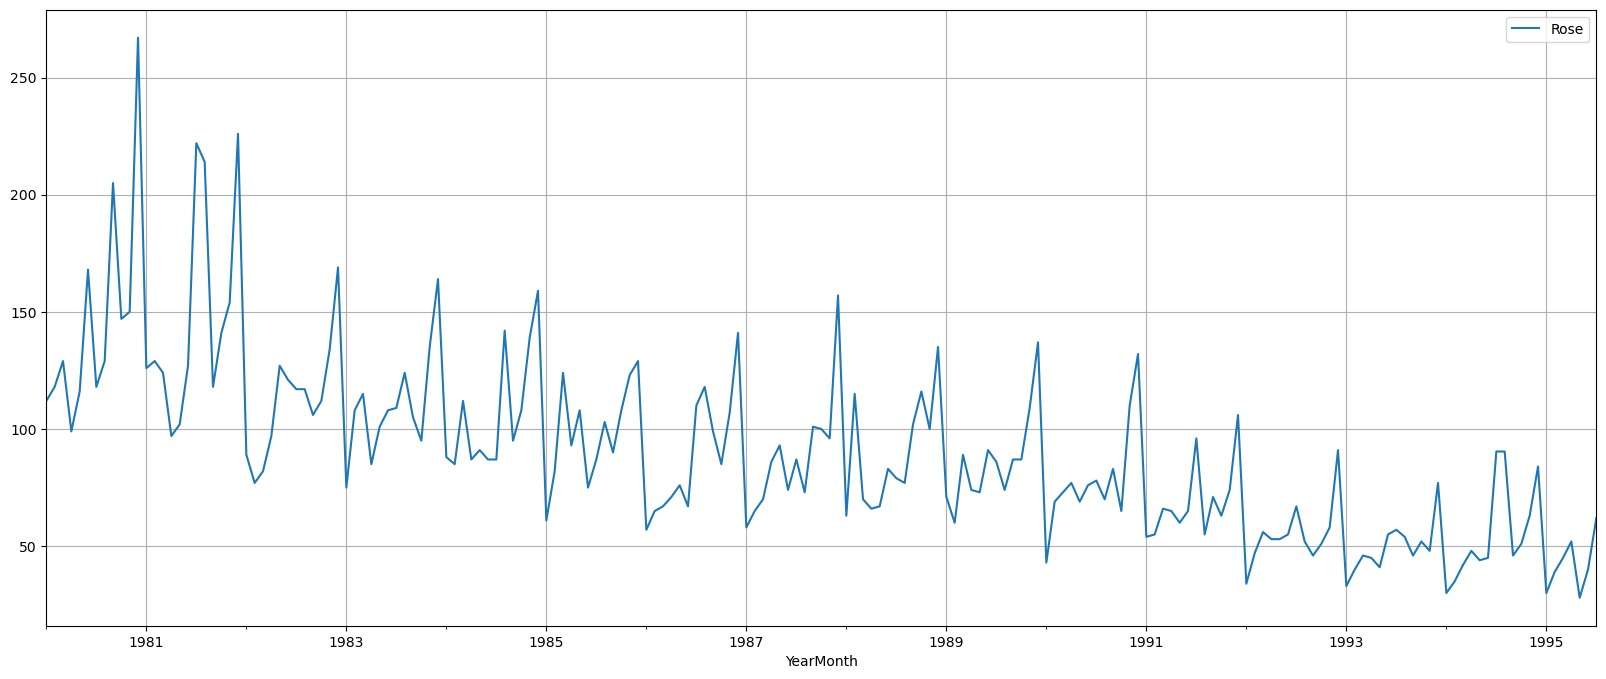

In [13]:
# plot 
df.plot(figsize=(20,8))
plt.grid();

In [14]:
df['Year']=df.index.year
df['Month']=df.index.month
df.head()

Rose  Year  Month
YearMonth                     
1980-01-01  112.0  1980      1
1980-02-01  118.0  1980      2
1980-03-01  129.0  1980      3
1980-04-01   99.0  1980      4
1980-05-01  116.0  1980      5

In [15]:
df.shape

(187, 3)

### Perform EDA

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    187 non-null    float64
 1   Year    187 non-null    int32  
 2   Month   187 non-null    int32  
dtypes: float64(1), int32(2)
memory usage: 4.4 KB


In [17]:
df[df.Month==7]

Rose  Year  Month
YearMonth                          
1980-07-01  118.000000  1980      7
1981-07-01  222.000000  1981      7
1982-07-01  117.000000  1982      7
1983-07-01  109.000000  1983      7
1984-07-01   87.000000  1984      7
1985-07-01   87.000000  1985      7
1986-07-01  110.000000  1986      7
1987-07-01   87.000000  1987      7
1988-07-01   79.000000  1988      7
1989-07-01   86.000000  1989      7
1990-07-01   78.000000  1990      7
1991-07-01   96.000000  1991      7
1992-07-01   67.000000  1992      7
1993-07-01   57.000000  1993      7
1994-07-01   90.394595  1994      7
1995-07-01   62.000000  1995      7

In [18]:
#We will resample the data to get values at a month-level from the day-level data by taking the average over the months.

df = df.resample('M').mean()
df.head()

Rose    Year  Month
YearMonth                       
1980-01-31  112.0  1980.0    1.0
1980-02-29  118.0  1980.0    2.0
1980-03-31  129.0  1980.0    3.0
1980-04-30   99.0  1980.0    4.0
1980-05-31  116.0  1980.0    5.0

In [19]:
df.shape#Find the shape of the data after resampling

(187, 3)

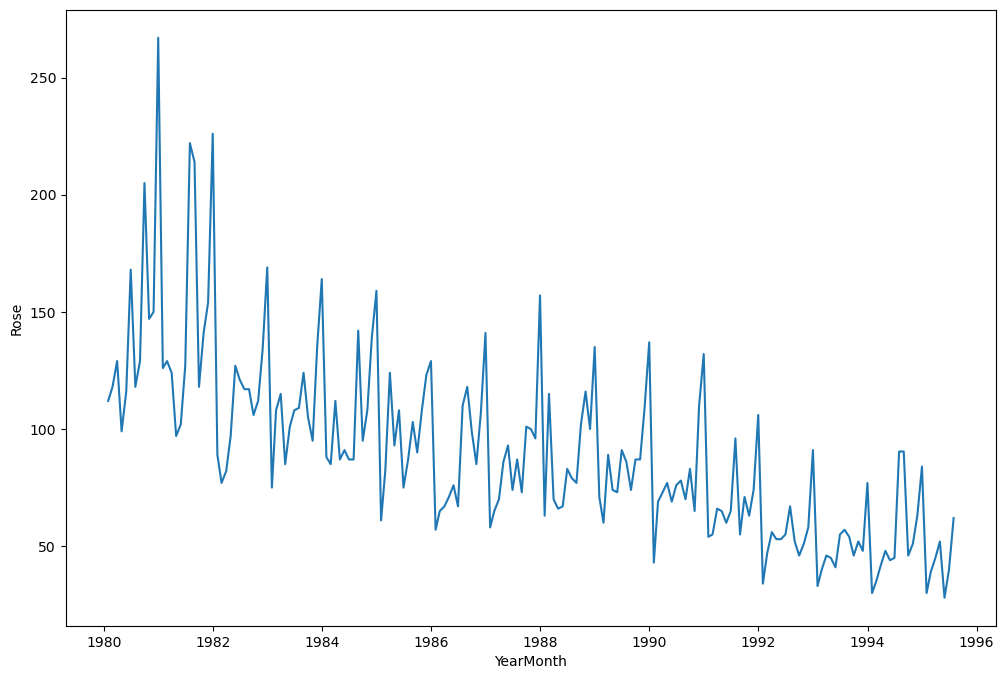

In [20]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x=df.index, y='Rose') #to find the trend of Rose at year-month level
plt.show()

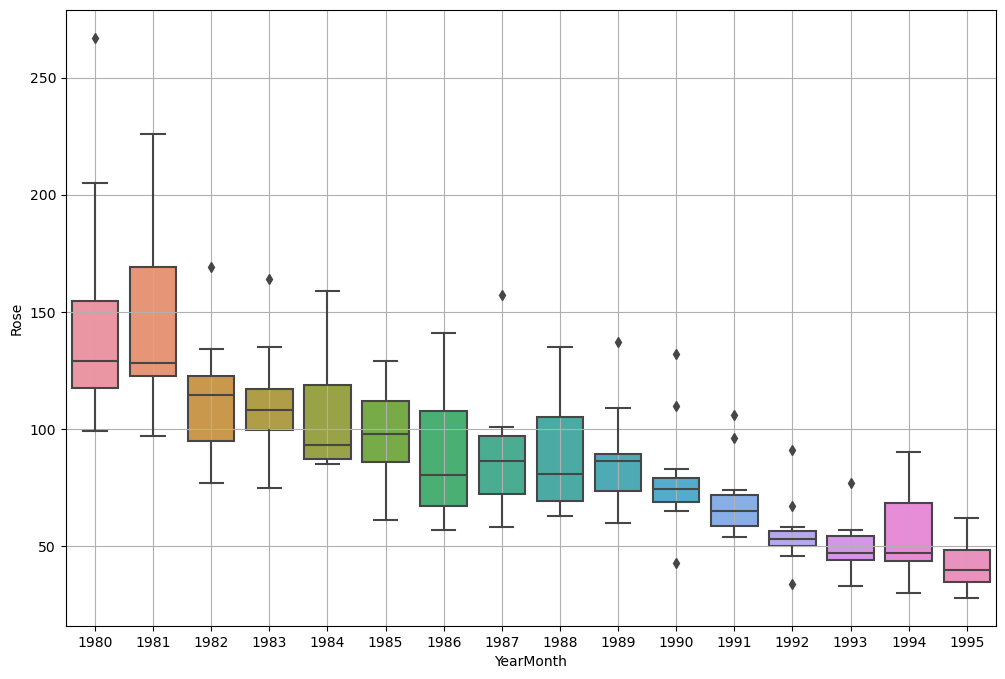

In [21]:
# Set the figure size
plt.figure(figsize=(12, 8))
sns.boxplot(x = df.index.year,y = 'Rose',data=df) # to plot a boxplot at year level
plt.grid();

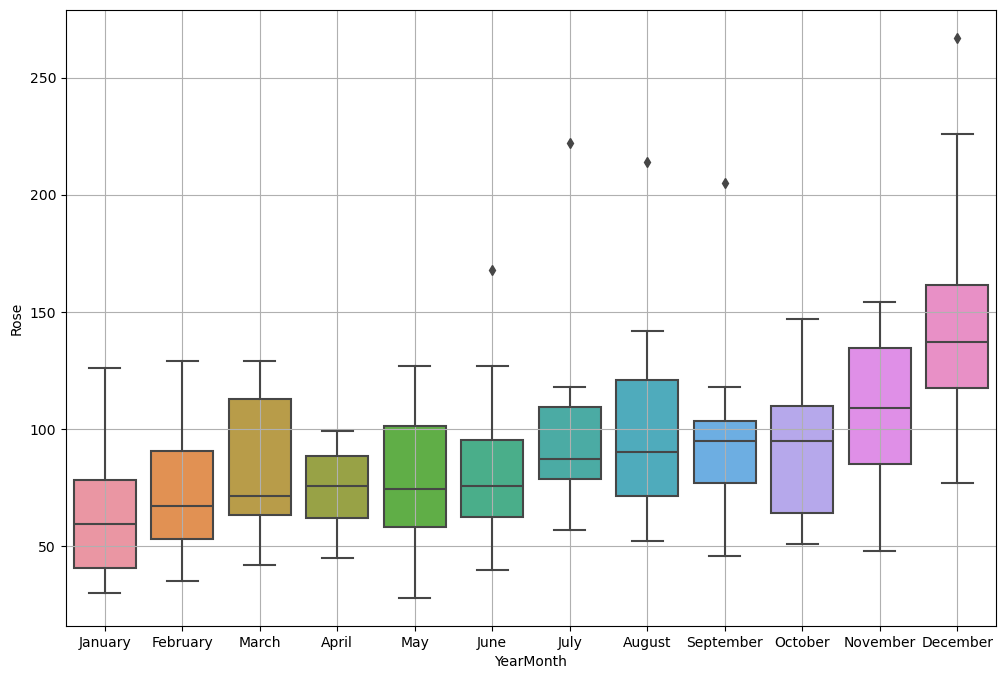

In [22]:
# Set the figure size
plt.figure(figsize=(12, 8))
sns.boxplot(x = df.index.month_name(),y = 'Rose',data=df) # Complete the code to plot a boxplot at month level
plt.grid();

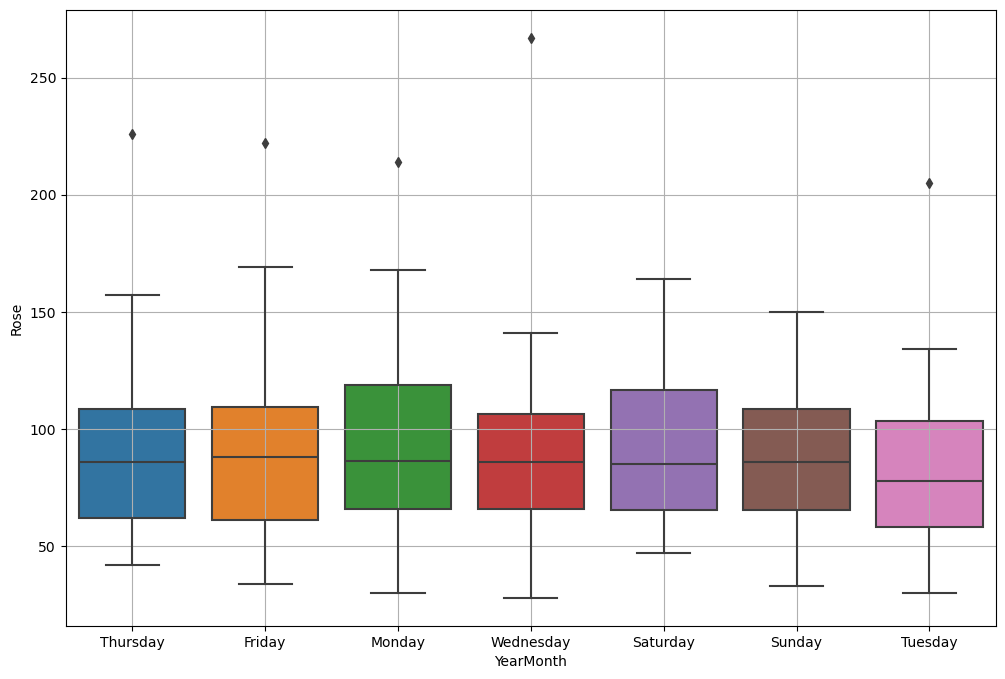

In [23]:
# Set the figure size
plt.figure(figsize=(12, 8))
sns.boxplot(x = df.index.day_name(),y = 'Rose',data=df) # Complete the code to plot a boxplot at week level
plt.grid();

In [24]:
#a pivot table to display monthly price across years
monthly_price_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month_name(), index = df.index.year)
monthly_price_across_years

YearMonth  April      August  December  February  January        July   June  \
YearMonth                                                                      
1980        99.0  129.000000     267.0     118.0    112.0  118.000000  168.0   
1981        97.0  214.000000     226.0     129.0    126.0  222.000000  127.0   
1982        97.0  117.000000     169.0      77.0     89.0  117.000000  121.0   
1983        85.0  124.000000     164.0     108.0     75.0  109.000000  108.0   
1984        87.0  142.000000     159.0      85.0     88.0   87.000000   87.0   
1985        93.0  103.000000     129.0      82.0     61.0   87.000000   75.0   
1986        71.0  118.000000     141.0      65.0     57.0  110.000000   67.0   
1987        86.0   73.000000     157.0      65.0     58.0   87.000000   74.0   
1988        66.0   77.000000     135.0     115.0     63.0   79.000000   83.0   
1989        74.0   74.000000     137.0      60.0     71.0   86.000000   91.0   
1990        77.0   70.000000     132.0      69.0     43.0   78.000000   76.0   
1991        65.0   55.000000     106.0      55.0     54.0   96.000000   65.0   
1992        53.0   52.000000      91.0      47.0     34.0   67.000000   55.0   
1993        45.0   54.000000      77.0      40.0     33.0   57.000000   55.0   
1994        48.0   90.394595      84.0      35.0     30.0   90.394595   45.0   
1995        52.0         NaN       NaN      39.0     30.0   62.000000   40.0   

YearMonth  March    May  November  October  September  
YearMonth                                              
1980       129.0  116.0     150.0    147.0      205.0  
1981       124.0  102.0     154.0    141.0      118.0  
1982        82.0  127.0     134.0    112.0      106.0  
1983       115.0  101.0     135.0     95.0      105.0  
1984       112.0   91.0     139.0    108.0       95.0  
1985       124.0  108.0     123.0    108.0       90.0  
1986        67.0   76.0     107.0     85.0       99.0  
1987        70.0   93.0      96.0    100.0      101.0  
1988        70.0   67.0     100.0    116.0      102.0  
1989        89.0   73.0     109.0     87.0       87.0  
1990        73.0   69.0     110.0     65.0       83.0  
1991        66.0   60.0      74.0     63.0       71.0  
1992        56.0   53.0      58.0     51.0       46.0  
1993        46.0   41.0      48.0     52.0       46.0  
1994        42.0   44.0      63.0     51.0       46.0  
1995        45.0   28.0       NaN      NaN        NaN

<Figure size 1500x800 with 0 Axes>

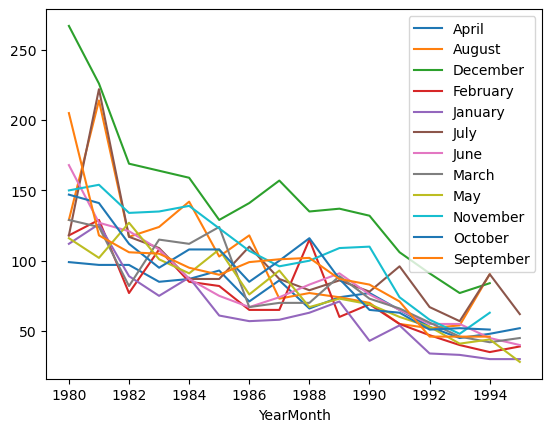

In [25]:
# Set the figure size
plt.figure(figsize=(15, 8))
monthly_price_across_years.plot()  #Complete the code to plot trend of months across years
plt.legend(loc='best')
plt.show()

### Correlation plot

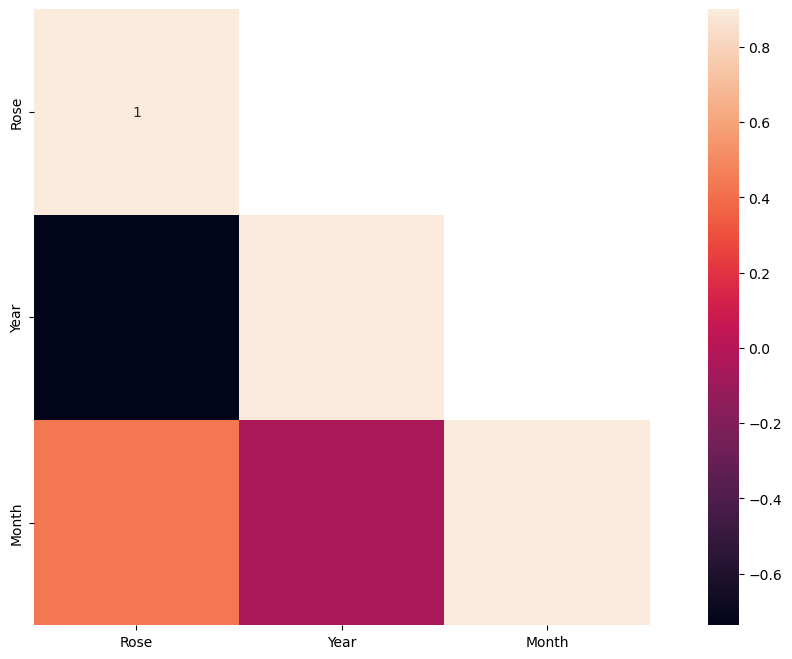

In [26]:
corr_all = df.corr()
mask = np.array(corr_all)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(corr_all, mask=mask,vmax=.9, square=True,annot=True);
plt.show()

### Plot ECDF: Empirical Cumulative Distribution Function

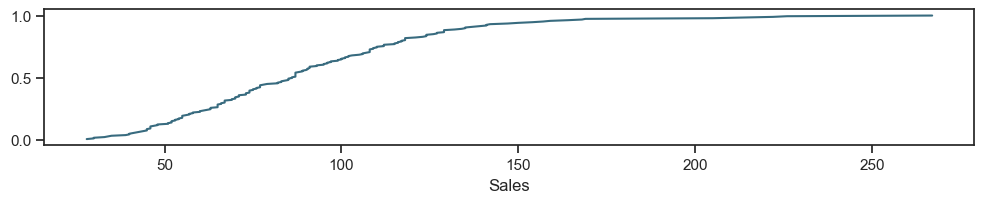

In [27]:
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

  
plt.subplot(312)
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Sales');

### Decomposition

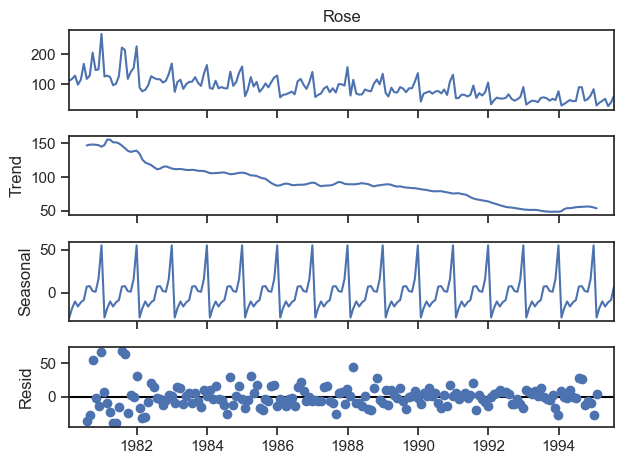

In [28]:
decomposition = seasonal_decompose(df['Rose'],model='additive')
decomposition.plot();

In [29]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Freq: M, Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31   -28.403723
1980-02-29   -17.833219
1980-03-31    -9.816537
1980-04-30   -15.629037
1980-05-31   -10.727251
1980-06-30    -8.209394
1980-07-31     7.405916
1980-08-31     7.986472
1980-09-30     2.279610
1980-10-31     1.376832
1980-11-30    16.351832
1980-12-31    55.218499
Freq: M, Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -36.489250
1980-08-31   -27.111472
1980-09-30    54.345390
1980-10-31    -2.460165
1980-11-30   -13.768499
1980

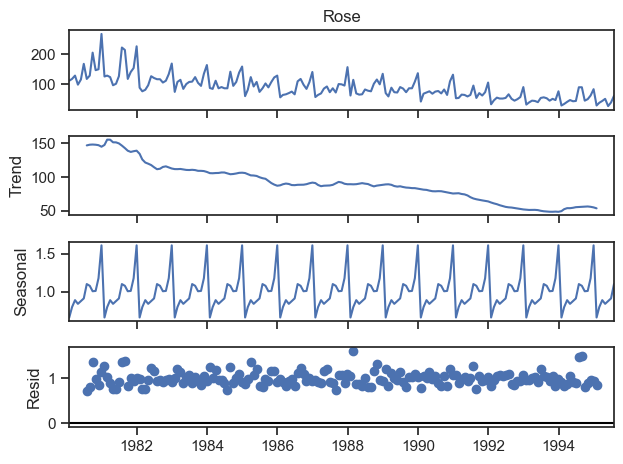

In [30]:
decomposition = seasonal_decompose(df['Rose'],model='multiplicative')
decomposition.plot();

In [31]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Freq: M, Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31    0.664388
1980-02-29    0.800694
1980-03-31    0.892495
1980-04-30    0.844044
1980-05-31    0.880516
1980-06-30    0.915220
1980-07-31    1.103899
1980-08-31    1.081169
1980-09-30    1.009574
1980-10-31    1.013692
1980-11-30    1.181135
1980-12-31    1.613174
Freq: M, Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.726757
1980-08-31    0.805504
1980-09-30    1.368532
1980-10-31    0.979276
1980-11-30    0.861480
1980-12-31    1.140480
Freq

### Data Pre-processing

#### Split the data into train and test and plot the training and test data. The test data should start in 1991.

In [32]:
# Split the data into training and testing sets
train = df[df.index < '1991-01-01']
test = df[df.index >= '1991-01-01']

In [33]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose    Year  Month
YearMonth                       
1980-01-31  112.0  1980.0    1.0
1980-02-29  118.0  1980.0    2.0
1980-03-31  129.0  1980.0    3.0
1980-04-30   99.0  1980.0    4.0
1980-05-31  116.0  1980.0    5.0

Last few rows of Training Data


Rose    Year  Month
YearMonth                       
1990-08-31   70.0  1990.0    8.0
1990-09-30   83.0  1990.0    9.0
1990-10-31   65.0  1990.0   10.0
1990-11-30  110.0  1990.0   11.0
1990-12-31  132.0  1990.0   12.0

First few rows of Test Data


Rose    Year  Month
YearMonth                      
1991-01-31  54.0  1991.0    1.0
1991-02-28  55.0  1991.0    2.0
1991-03-31  66.0  1991.0    3.0
1991-04-30  65.0  1991.0    4.0
1991-05-31  60.0  1991.0    5.0

Last few rows of Test Data


Rose    Year  Month
YearMonth                      
1995-03-31  45.0  1995.0    3.0
1995-04-30  52.0  1995.0    4.0
1995-05-31  28.0  1995.0    5.0
1995-06-30  40.0  1995.0    6.0
1995-07-31  62.0  1995.0    7.0

In [34]:
#Complete the code to check the shape of train and test sets
print("Train: ",train.shape)
print("Test: ",test.shape)

Train:  (132, 3)
Test:  (55, 3)


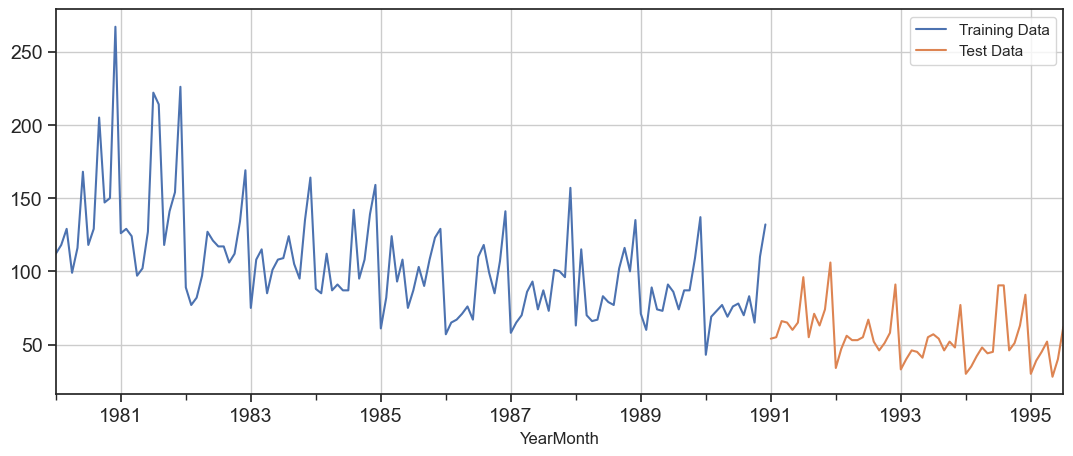

In [35]:
train['Rose'].plot(figsize=(13,5), fontsize=14) #Complete the code to find the trend of train data
plt.grid()
test['Rose'].plot(figsize=(13,5), fontsize=14)  #Complete the code to find the trend of test data
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Model Building - Original Data

### Linear Regression

In [36]:
#Complete the code to generate the numerical time instance order for both the training and test set.
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train) for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186]


In [37]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [38]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose    Year  Month  time
YearMonth                             
1980-01-31  112.0  1980.0    1.0     1
1980-02-29  118.0  1980.0    2.0     2
1980-03-31  129.0  1980.0    3.0     3
1980-04-30   99.0  1980.0    4.0     4
1980-05-31  116.0  1980.0    5.0     5 

Last few rows of Training Data 
              Rose    Year  Month  time
YearMonth                             
1990-08-31   70.0  1990.0    8.0   128
1990-09-30   83.0  1990.0    9.0   129
1990-10-31   65.0  1990.0   10.0   130
1990-11-30  110.0  1990.0   11.0   131
1990-12-31  132.0  1990.0   12.0   132 

First few rows of Test Data 
             Rose    Year  Month  time
YearMonth                            
1991-01-31  54.0  1991.0    1.0   132
1991-02-28  55.0  1991.0    2.0   133
1991-03-31  66.0  1991.0    3.0   134
1991-04-30  65.0  1991.0    4.0   135
1991-05-31  60.0  1991.0    5.0   136 

Last few rows of Test Data 
             Rose    Year  Month  time
YearMonth         

* Now that our training and test data has been modified, let us go ahead use  𝐿𝑖𝑛𝑒𝑎𝑟𝑅𝑒𝑔𝑟𝑒𝑠𝑠𝑖𝑜𝑛
  to build the model on the training data and test the model on the test data.

In [39]:
lr = LinearRegression() #Complete the code to define the linear regression model

In [40]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

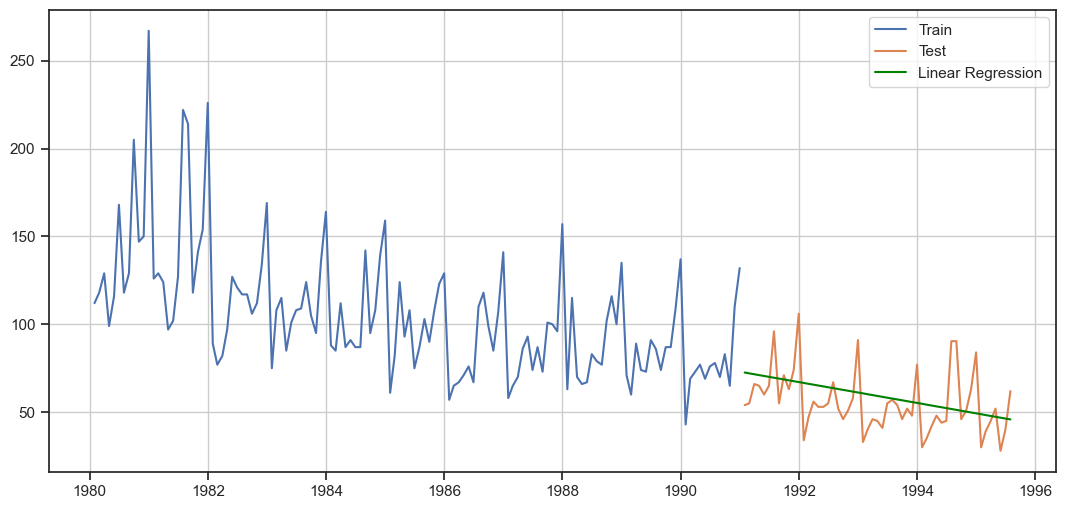

In [41]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])  #Complete the code to make predictions
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green') # Complete the code to plot the predictions made by the model
plt.legend(loc='best')
plt.grid();

In [42]:
## Test Data - RMSE

rmse_model1_test = mean_squared_error(test['Rose'],test_predictions_model1,squared=False) # Complete the code to find the RMSE on test data
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 17.08


In [43]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Linear Regression'])
resultsDf

Test RMSE
Linear Regression  17.080298

### Moving Average (MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here. For Moving Average, we are going to average over the entire data.

In [44]:
MovingAverage = df.copy()
MovingAverage.head()

Rose    Year  Month
YearMonth                       
1980-01-31  112.0  1980.0    1.0
1980-02-29  118.0  1980.0    2.0
1980-03-31  129.0  1980.0    3.0
1980-04-30   99.0  1980.0    4.0
1980-05-31  116.0  1980.0    5.0

In [45]:
#Trailing Moving Average

MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean() #to find 2 point trailing average
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean() #to find 4 point trailing average
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean() #to find 6 point trailing average
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean() #to find 9 point trailing average

MovingAverage.head()

Rose    Year  Month  Trailing_2  Trailing_4  Trailing_6  \
YearMonth                                                              
1980-01-31  112.0  1980.0    1.0         NaN         NaN         NaN   
1980-02-29  118.0  1980.0    2.0       115.0         NaN         NaN   
1980-03-31  129.0  1980.0    3.0       123.5         NaN         NaN   
1980-04-30   99.0  1980.0    4.0       114.0       114.5         NaN   
1980-05-31  116.0  1980.0    5.0       107.5       115.5         NaN   

            Trailing_9  
YearMonth               
1980-01-31         NaN  
1980-02-29         NaN  
1980-03-31         NaN  
1980-04-30         NaN  
1980-05-31         NaN

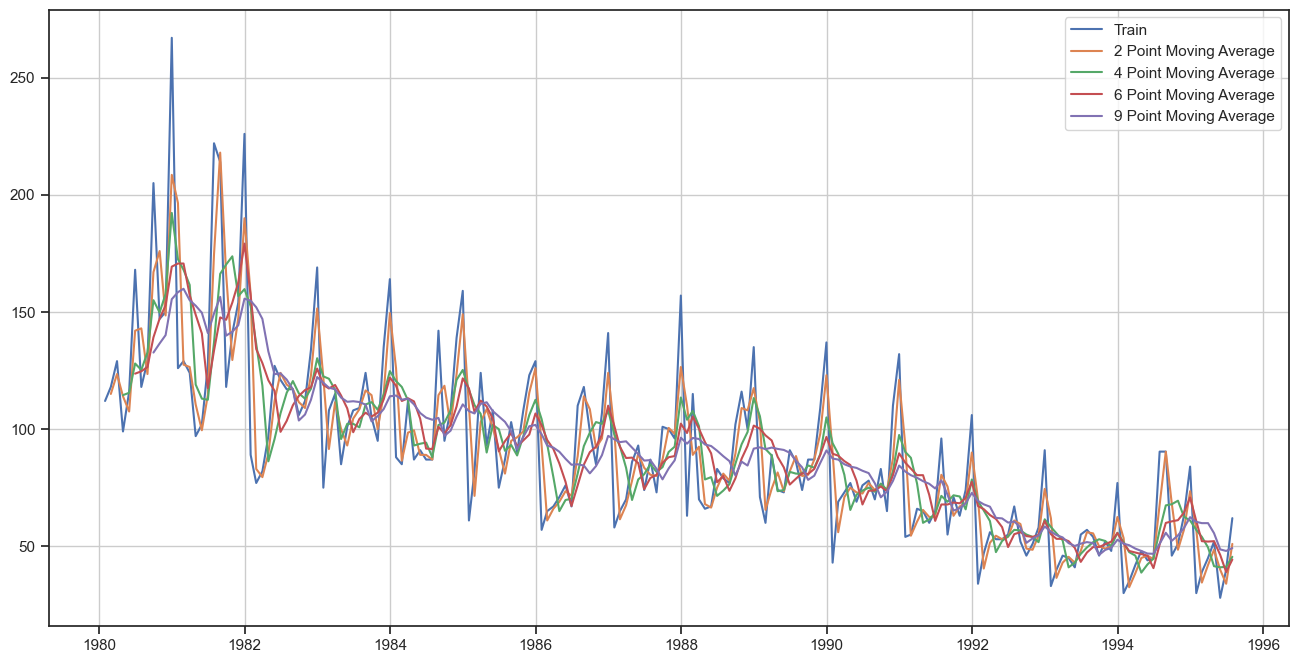

In [46]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average') #Complete the code to plot the 2 point moving average
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average') #Complete the code to plot the 4 point moving average
plt.plot(MovingAverage['Trailing_6'], label='6 Point Moving Average') #Complete the code to plot the 6 point moving average
plt.plot(MovingAverage['Trailing_9'], label='9 Point Moving Average') #Complete the code to plot the 9 point moving average

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [47]:
#Creating train and test set
trailing_MovingAverage_train= MovingAverage[MovingAverage.index < '1991-01-01']
trailing_MovingAverage_test= MovingAverage[MovingAverage.index >= '1991-01-01']


In [48]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False) #Complete the code to find the RMSE for 2 point moving average
print("For 2 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False) #Complete the code to find the RMSE for 4 point moving average
print("For 4 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)   #Complete the code to find the RMSE for 6 point moving average
print("For 6 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_6))


## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)  #Complete the code to find the RMSE for 9 point moving average
print("For 9 point Moving Average Model forecast on the Testing Data,  RMSE is %3.3f" %(rmse_model4_test_9))


For 2 point Moving Average Model forecast on the Testing Data,  RMSE is 12.298
For 4 point Moving Average Model forecast on the Testing Data,  RMSE is 15.846
For 6 point Moving Average Model forecast on the Testing Data,  RMSE is 15.986
For 9 point Moving Average Model forecast on the Testing Data,  RMSE is 16.501


In [49]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Test RMSE
Linear Regression            17.080298
2pointTrailingMovingAverage  12.298291
4pointTrailingMovingAverage  15.845558
6pointTrailingMovingAverage  15.986163
9pointTrailingMovingAverage  16.500823

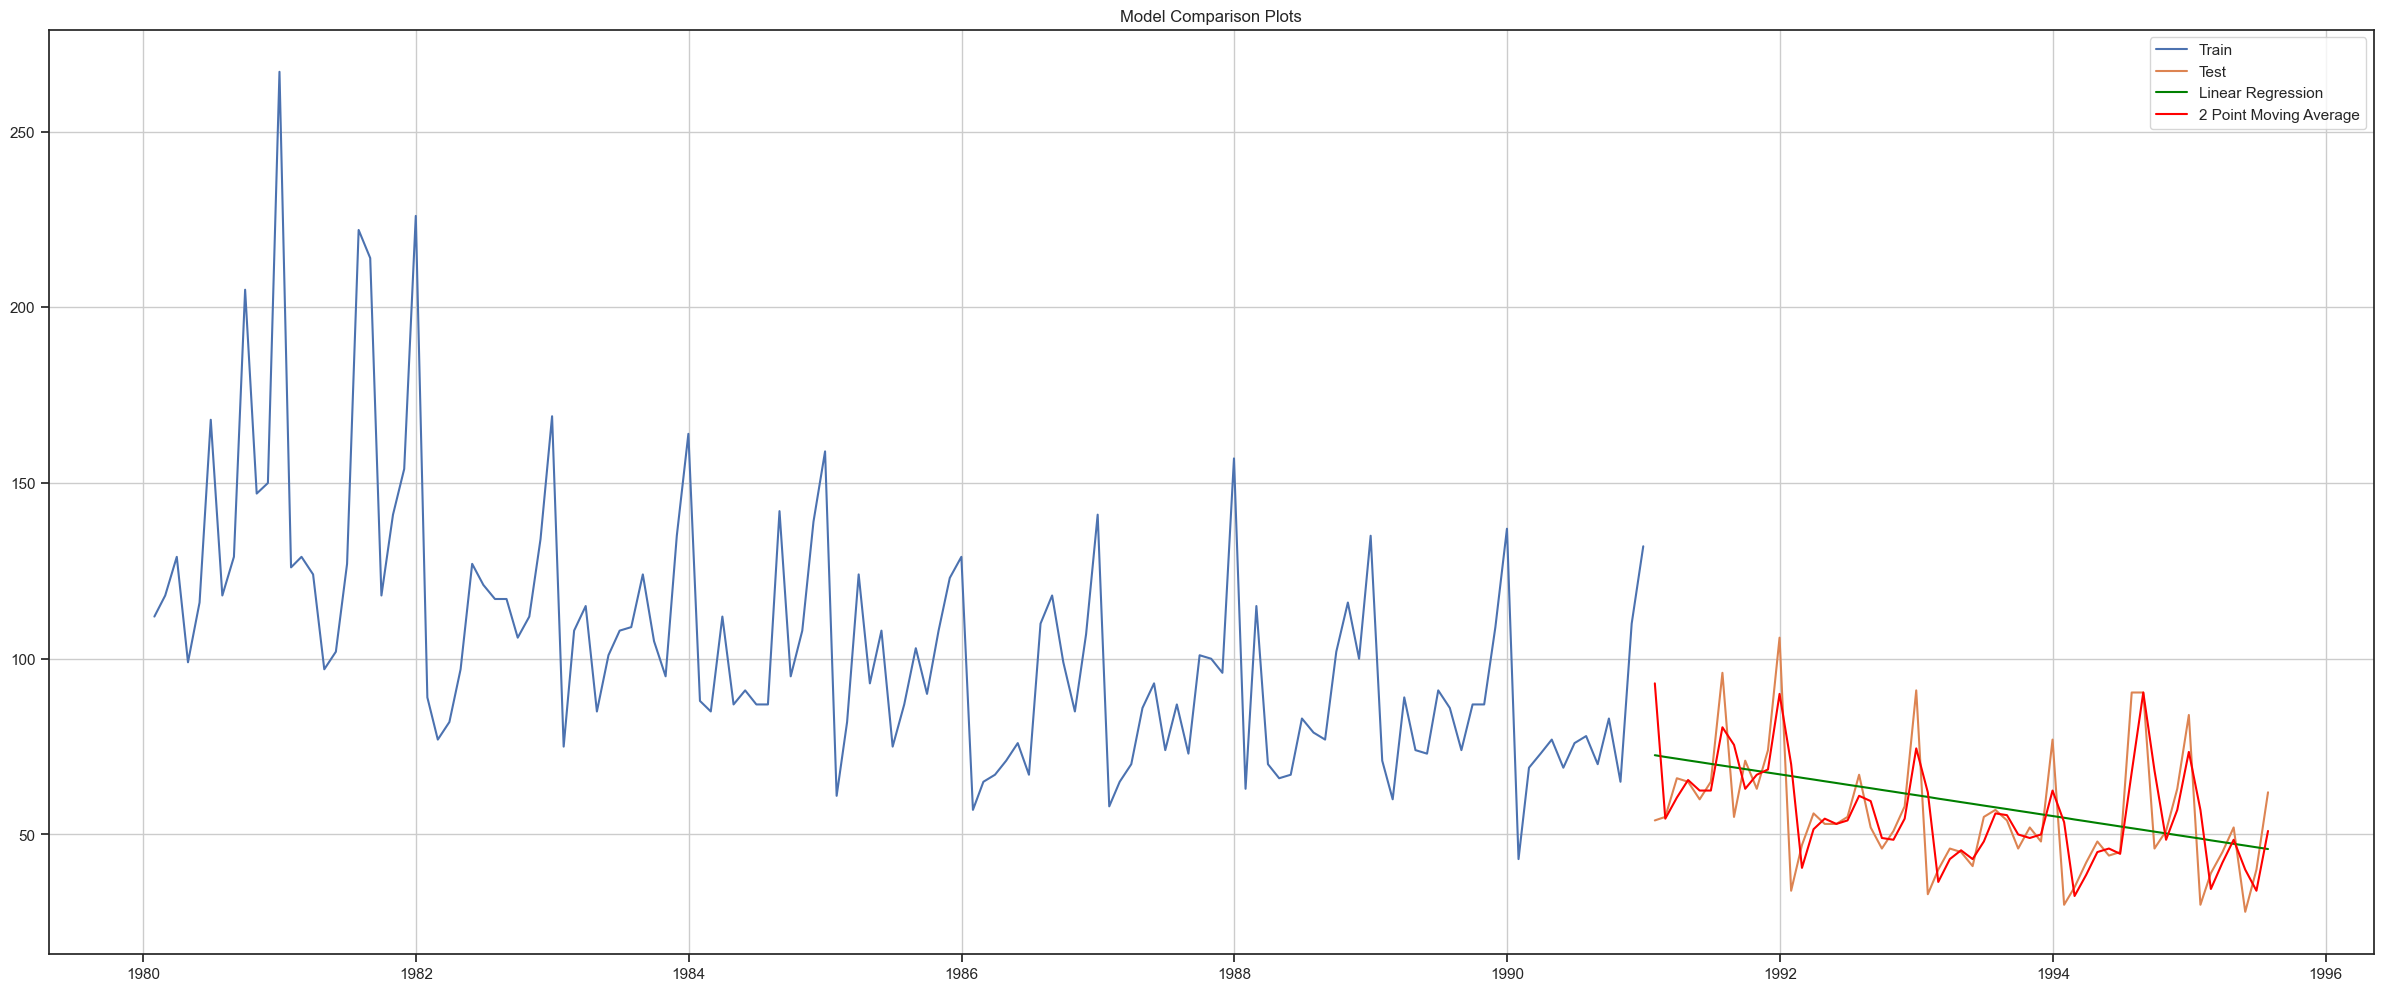

In [50]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

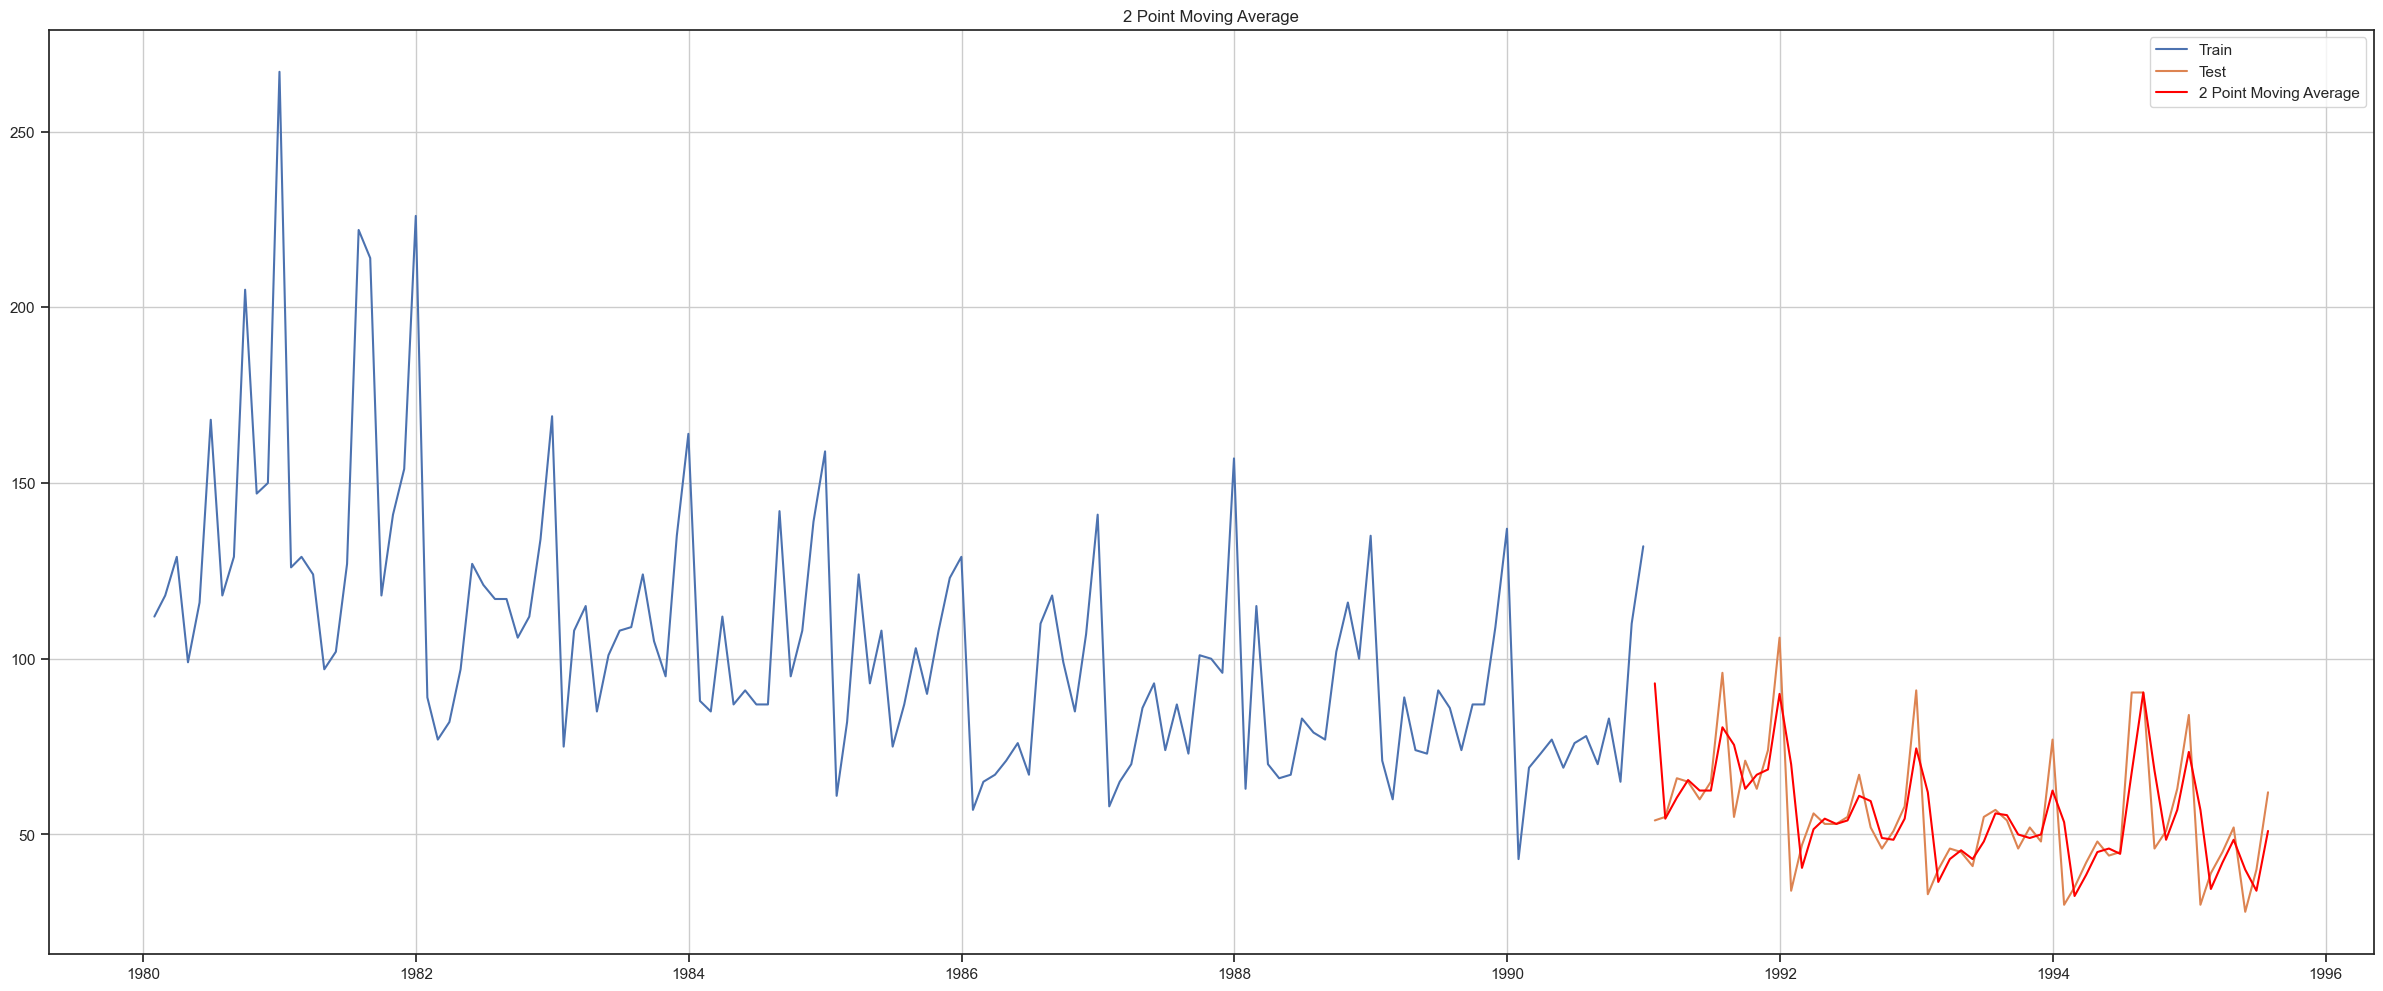

In [51]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')


plt.legend(loc='best')
plt.title("2 Point Moving Average")
plt.grid();

### Simple Exponential Smoothening Models

In [52]:
SES_train = train.copy()
SES_test = test.copy()

In [53]:
model_SES = SimpleExpSmoothing(SES_train['Rose']) #Define the simple exponential smoothening model

In [54]:
model_SES_autofit = model_SES.fit(optimized=True)   #Fit the simple exponential smoothening model

In [55]:
model_SES_autofit.params

{'smoothing_level': 0.12362013710356022,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [56]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))   #Forecast the model
SES_test.head()

Rose    Year  Month    predict
YearMonth                                 
1991-01-31  54.0  1991.0    1.0  87.983766
1991-02-28  55.0  1991.0    2.0  87.983766
1991-03-31  66.0  1991.0    3.0  87.983766
1991-04-30  65.0  1991.0    4.0  87.983766
1991-05-31  60.0  1991.0    5.0  87.983766

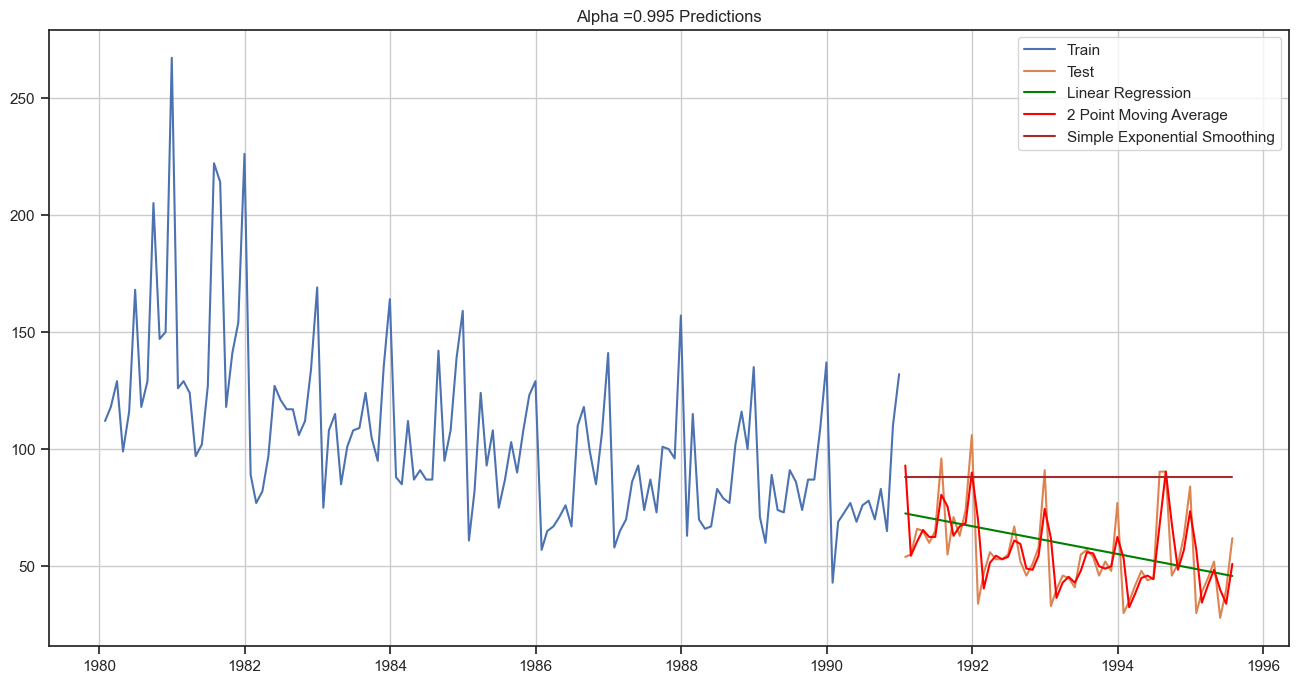

In [57]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing', color='brown')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

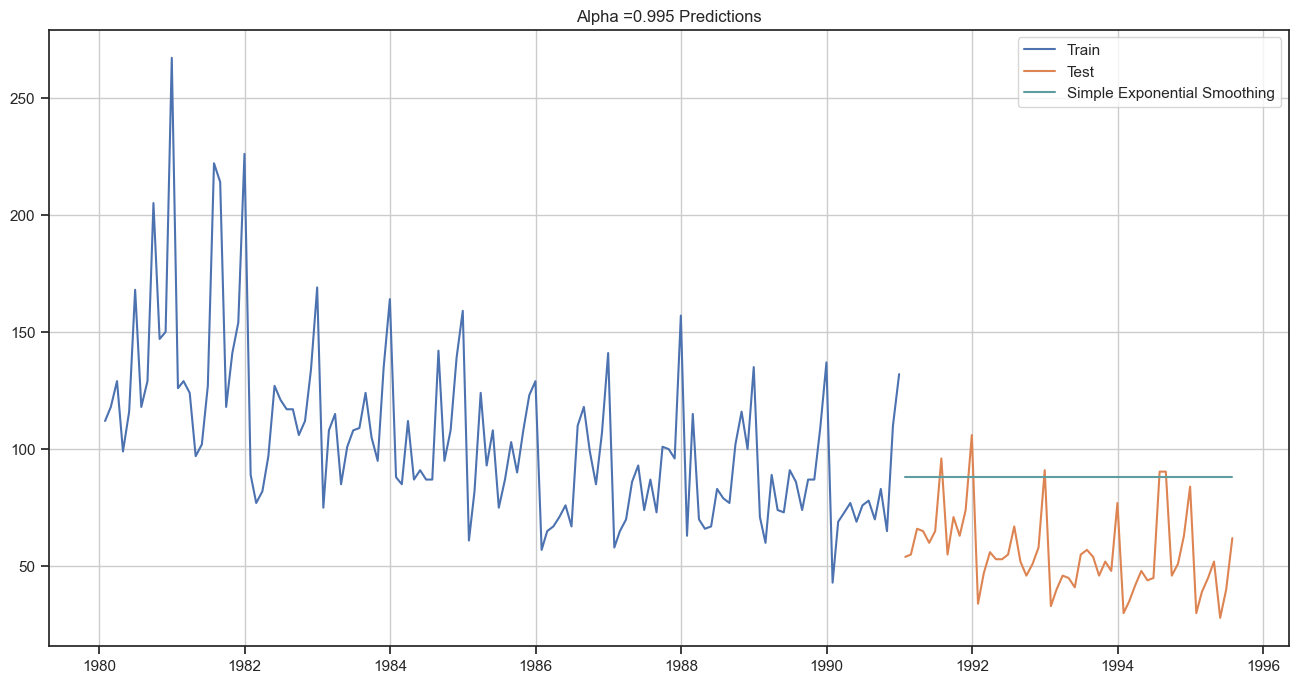

In [58]:
plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')
#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing', color='cadetblue')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

* Model Evaluation for 𝛼 = 0.995 : Simple Exponential Smoothing

In [59]:
## Test Data
#Complete the code to find the RMSE of simple exponential smoothening model
rmse_model5_test_1 = mean_squared_error(SES_test['Rose'], SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.712


In [60]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

Test RMSE
Linear Regression                       17.080298
2pointTrailingMovingAverage             12.298291
4pointTrailingMovingAverage             15.845558
6pointTrailingMovingAverage             15.986163
9pointTrailingMovingAverage             16.500823
Alpha=0.995,SimpleExponentialSmoothing  36.711757

### Double Exponential Smoothening (Holt's Model)
Two parameters 𝛼 and 𝛽 are estimated in this model. Level and Trend are accounted for in this model.

In [61]:
DES_train = train.copy()
DES_test = test.copy()

In [62]:
model_DES = Holt(DES_train['Rose'])

In [63]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Test RMSE]
Index: []

In [64]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
model_DES_autofit = model_DES.fit(optimized=True)

model_DES_autofit.params

{'smoothing_level': 0.16213300393079325,
 'smoothing_trend': 0.1315219030745284,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': 6.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [65]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(test))
DES_test.head()

Rose    Year  Month    predict
YearMonth                                 
1991-01-31  54.0  1991.0    1.0  87.249974
1991-02-28  55.0  1991.0    2.0  88.152705
1991-03-31  66.0  1991.0    3.0  89.055436
1991-04-30  65.0  1991.0    4.0  89.958166
1991-05-31  60.0  1991.0    5.0  90.860897

In [66]:

## First we will define an empty dataframe to store our values from the loop

resultsDf_temp = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_temp

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Test RMSE]
Index: []

In [67]:
## Test Data

rmse_model_temp = mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model_temp))

For Alpha =0.6477, Beta = 0.0 Double Exponential Smoothing Model forecast on the Test Data, RMSE is 36.712


In [68]:
resultsDf_6 = []
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        rmse_model6_train = mean_squared_error(DES_train['Rose'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = mean_squared_error(DES_test['Rose'],DES_test['predict',i,j],squared=False)
        
        # Append results as a dictionary
        resultsDf_6.append({'Alpha Values': i, 'Beta Values': j, 'Train RMSE': rmse_model6_train, 'Test RMSE': rmse_model6_test})
resultsDf_6
resultsDf_7 = pd.DataFrame(resultsDf_6)
resultsDf_7

Alpha Values  Beta Values  Train RMSE   Test RMSE
0            0.1          0.1   34.439111   35.999680
1            0.1          0.2   33.450729   47.365373
2            0.1          0.3   33.145789   76.462652
3            0.1          0.4   33.262191   97.767003
4            0.1          0.5   33.688415  122.366868
..           ...          ...         ...         ...
95           1.0          0.6   51.831610  799.538675
96           1.0          0.7   54.497039  839.747831
97           1.0          0.8   57.365879  851.819895
98           1.0          0.9   60.474309  832.566741
99           1.0          1.0   63.873454  777.939896

[100 rows x 4 columns]

In [69]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Train RMSE  Test RMSE
0            0.1          0.1   34.439111  35.999680
1            0.1          0.2   33.450729  47.365373
10           0.2          0.1   33.097427  64.212172
2            0.1          0.3   33.145789  76.462652
20           0.3          0.1   33.611269  96.915102

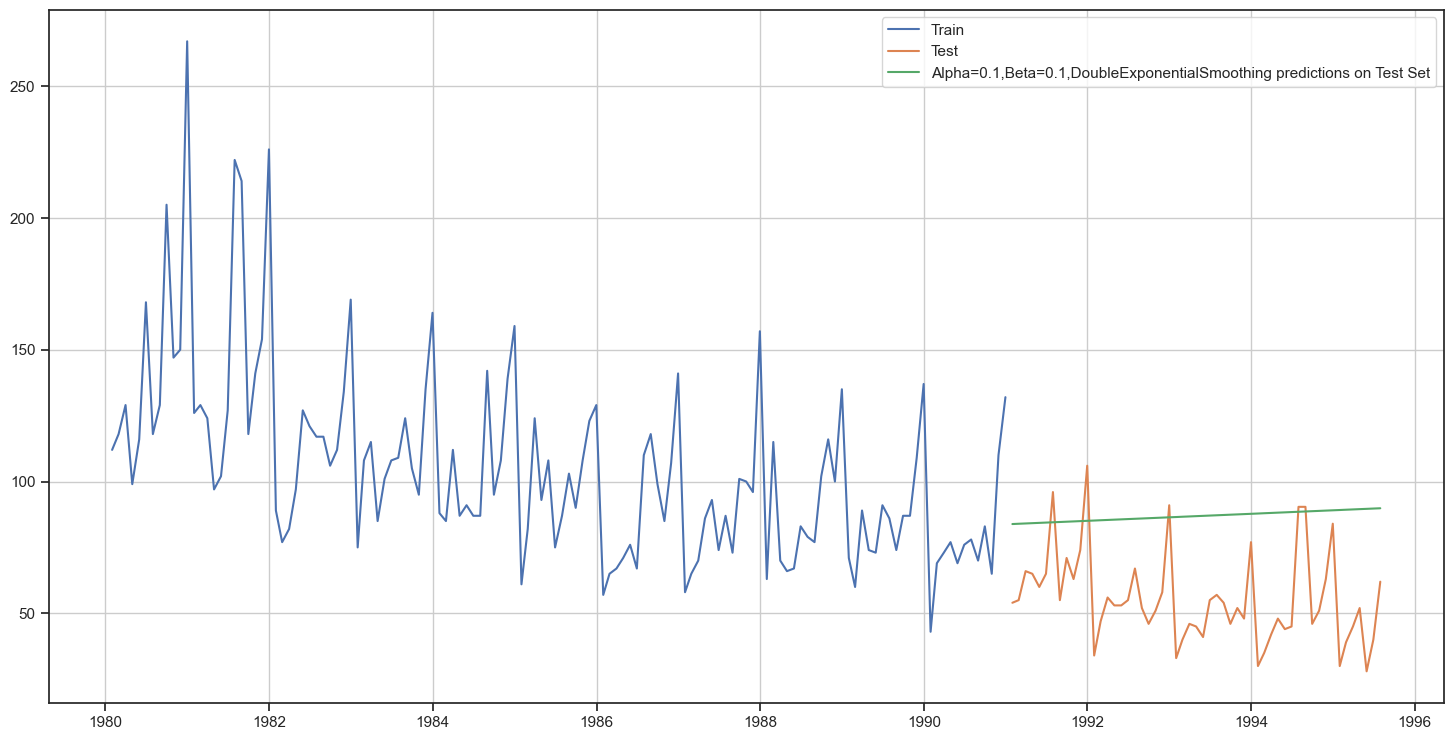

In [70]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

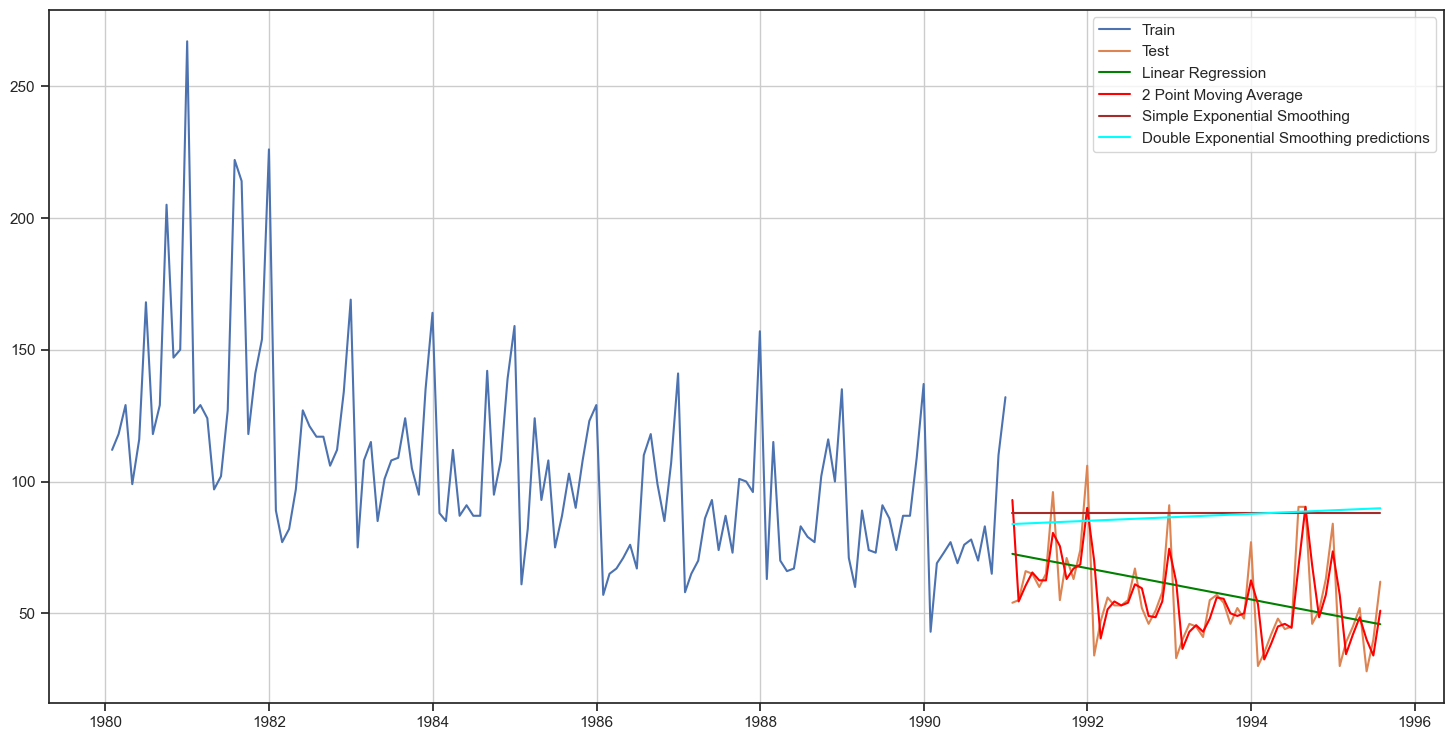

In [71]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing', color='brown')

#Complete the code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict', 0.1, 0.1], label='Double Exponential Smoothing predictions', color='cyan')


plt.legend(loc='best')
plt.grid();

### Naive Approach

In [72]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [73]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Freq: M, Name: naive, dtype: float64

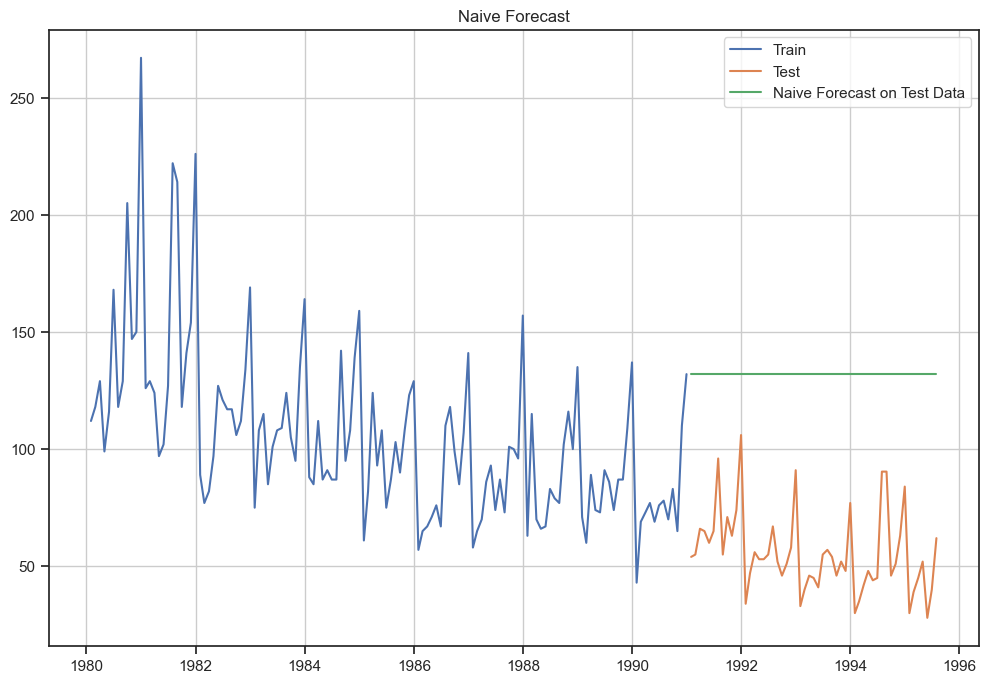

In [74]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [75]:
## Test Data
#Complete the code to find the RMSE of simple exponential smoothening model
rmse_model2_test_1 = mean_squared_error(NaiveModel_test['Rose'], NaiveModel_test['naive'],squared=False)
print("Naive Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model2_test_1))


Naive Model forecast on the Test Data, RMSE is 78.396


In [76]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test_1]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

Test RMSE
Linear Regression                       17.080298
2pointTrailingMovingAverage             12.298291
4pointTrailingMovingAverage             15.845558
6pointTrailingMovingAverage             15.986163
9pointTrailingMovingAverage             16.500823
Alpha=0.995,SimpleExponentialSmoothing  36.711757
Naive Model                             78.396083

In [77]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
2pointTrailingMovingAverage             12.298291
4pointTrailingMovingAverage             15.845558
6pointTrailingMovingAverage             15.986163
9pointTrailingMovingAverage             16.500823
Linear Regression                       17.080298
Alpha=0.995,SimpleExponentialSmoothing  36.711757
Naive Model                             78.396083

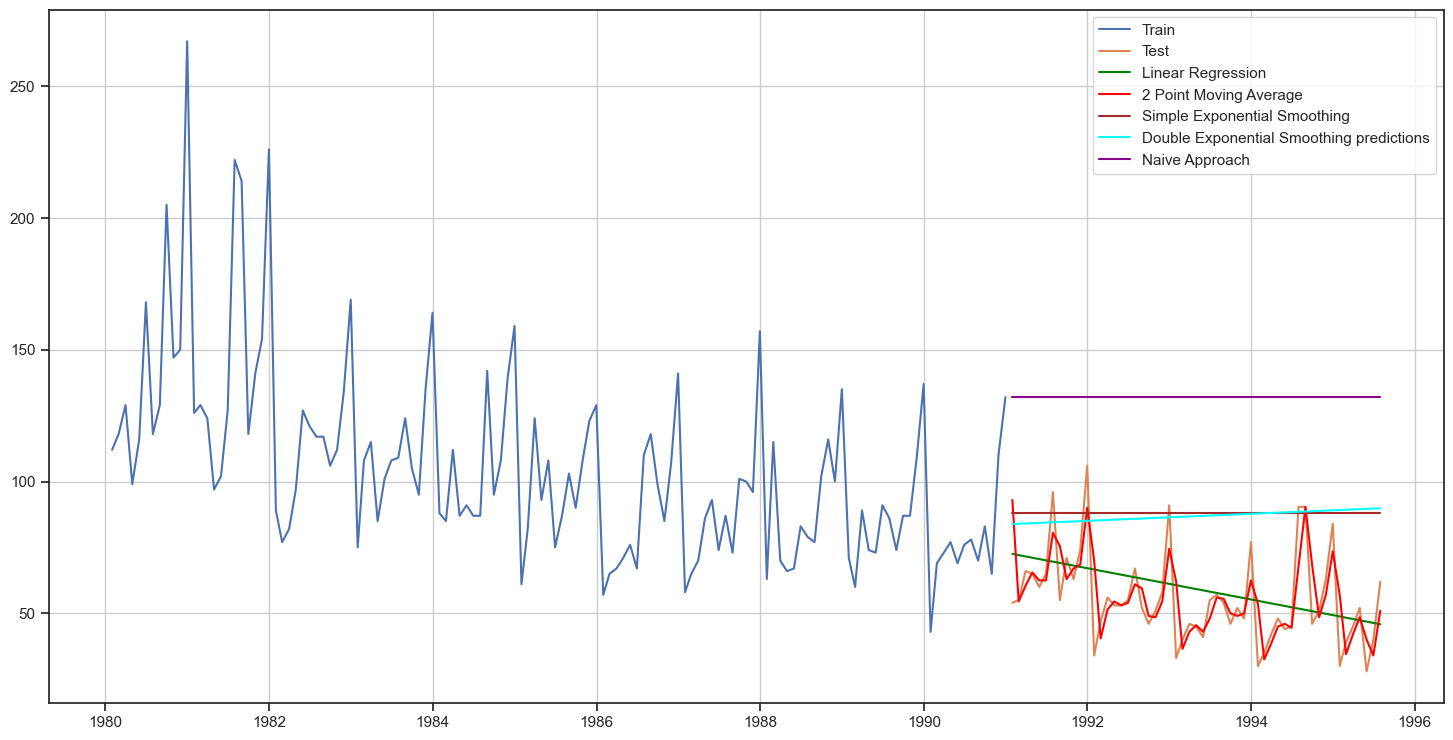

In [78]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing', color='brown')

#Complete the code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict', 0.1, 0.1], label='Double Exponential Smoothing predictions', color='cyan')

#Complete the code to plot the predictions based on the Naive Approach model
plt.plot(NaiveModel_test['naive'], label='Naive Approach', color='darkmagenta')


plt.legend(loc='best')
plt.grid();

### Simple Average

In [79]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [80]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

Rose    Year  Month  mean_forecast
YearMonth                                     
1991-01-31  54.0  1991.0    1.0     104.939394
1991-02-28  55.0  1991.0    2.0     104.939394
1991-03-31  66.0  1991.0    3.0     104.939394
1991-04-30  65.0  1991.0    4.0     104.939394
1991-05-31  60.0  1991.0    5.0     104.939394

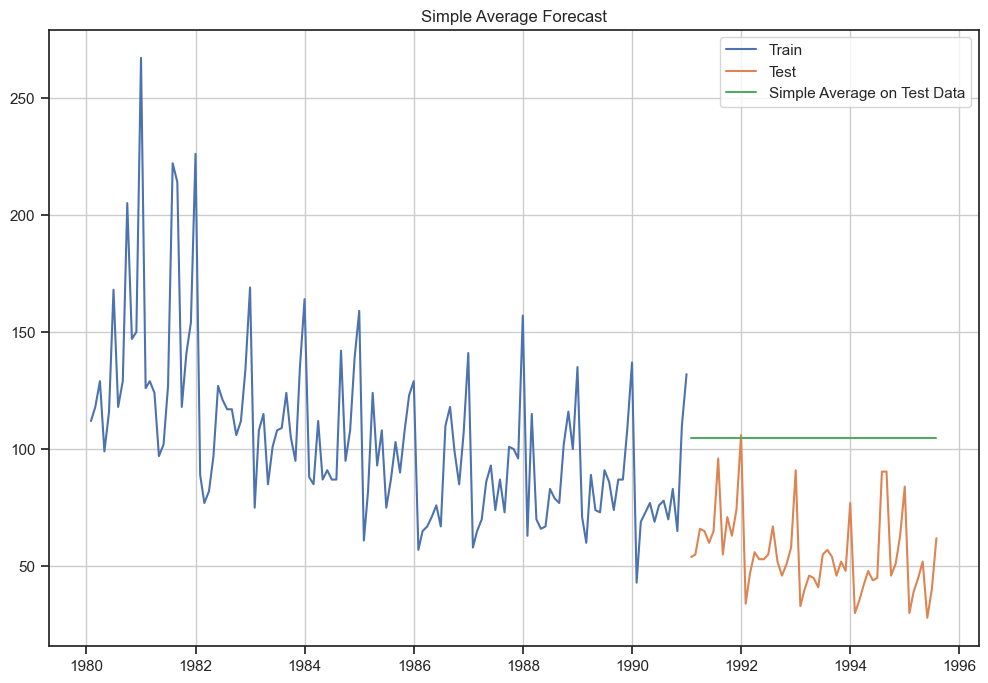

In [81]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [82]:
## Test Data
#Complete the code to find the RMSE of simple exponential smoothening model
rmse_model3_test_1 = mean_squared_error(SimpleAverage_test['Rose'], SimpleAverage_test['mean_forecast'],squared=False)
print("Simple Average forecast on the Test Data, RMSE is %3.3f" %(rmse_model3_test_1))


Simple Average forecast on the Test Data, RMSE is 52.319


In [83]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test_1]},index=['Simple Average'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Test RMSE
Linear Regression                       17.080298
2pointTrailingMovingAverage             12.298291
4pointTrailingMovingAverage             15.845558
6pointTrailingMovingAverage             15.986163
9pointTrailingMovingAverage             16.500823
Alpha=0.995,SimpleExponentialSmoothing  36.711757
Naive Model                             78.396083
Simple Average                          52.318735

In [84]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
2pointTrailingMovingAverage             12.298291
4pointTrailingMovingAverage             15.845558
6pointTrailingMovingAverage             15.986163
9pointTrailingMovingAverage             16.500823
Linear Regression                       17.080298
Alpha=0.995,SimpleExponentialSmoothing  36.711757
Simple Average                          52.318735
Naive Model                             78.396083

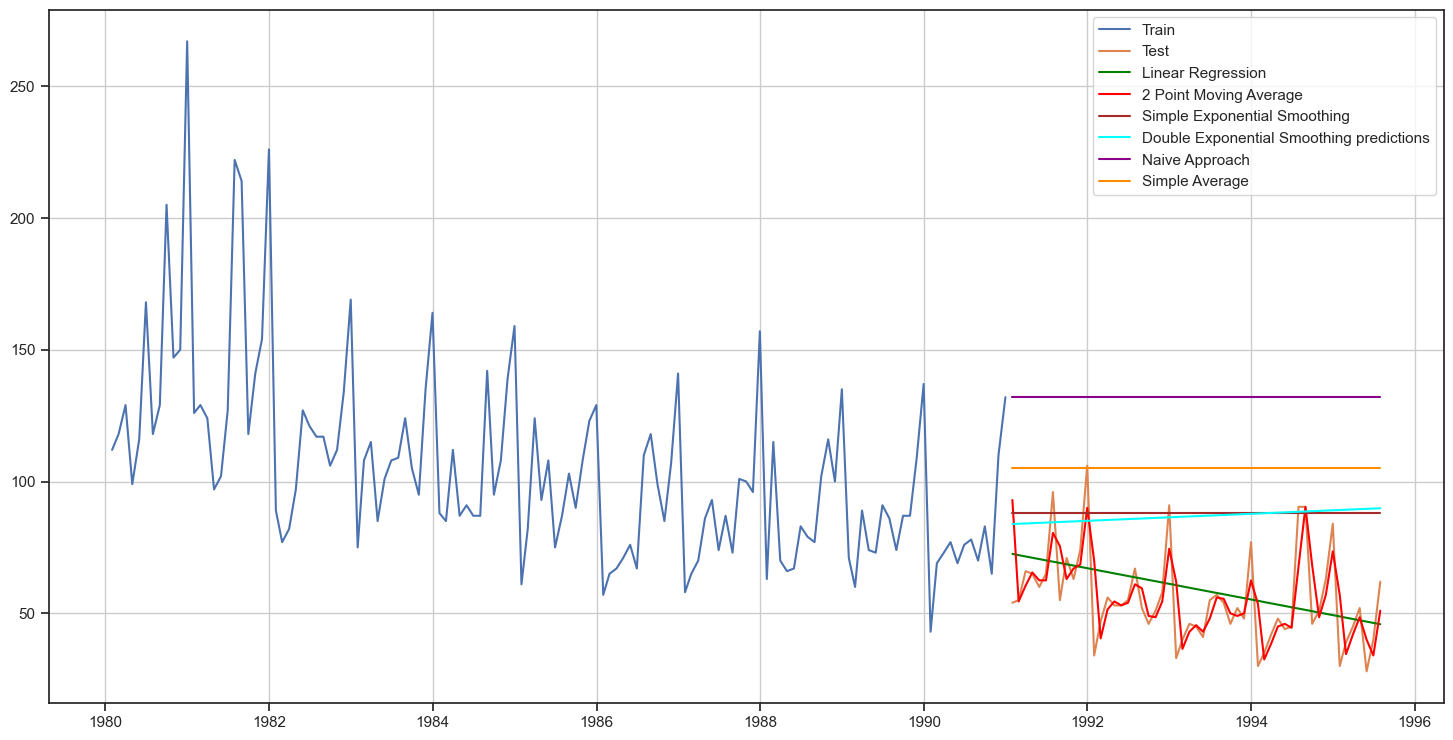

In [85]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing', color='brown')

#Complete the code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict', 0.1, 0.1], label='Double Exponential Smoothing predictions', color='cyan')

#Complete the code to plot the predictions based on the Naive Approach model
plt.plot(NaiveModel_test['naive'], label='Naive Approach', color='darkmagenta')

#Complete the code to plot the predictions based on the Simple Average model
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average', color='darkorange')


plt.legend(loc='best')
plt.grid();

### Triple Exponential Smoothing (Holt - Winter's Model)

In [86]:
TES_train = train.copy()
TES_test = test.copy()

In [87]:
model_TES_ta_sa = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='additive')
model_TES_ta_sm = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative')
model_TES_tm_sm = ExponentialSmoothing(TES_train['Rose'],trend='multiplicative',seasonal='multiplicative')
model_TES_tm_sa = ExponentialSmoothing(TES_train['Rose'],trend='multiplicative',seasonal='additive')


In [88]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [89]:
model_TES_autofit_ta_sa = model_TES_ta_sa.fit(optimized=True)
model_TES_autofit_ta_sm = model_TES_ta_sm.fit(optimized=True)
model_TES_autofit_tm_sm = model_TES_tm_sm.fit(optimized=True)
model_TES_autofit_tm_sa = model_TES_tm_sa.fit(optimized=True)

In [90]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE]
Index: []

In [91]:
model_TES_autofit_ta_sa.params

{'smoothing_level': 0.09304167382727196,
 'smoothing_trend': 0.00015627115580353864,
 'smoothing_seasonal': 0.005473570453090303,
 'damping_trend': nan,
 'initial_level': 146.39344462081579,
 'initial_trend': -0.5472706920209655,
 'initial_seasons': array([-31.17773169, -18.81779492, -10.84868889, -21.49794449,
        -12.7077246 ,  -7.26568284,   2.64361516,   8.79263023,
          4.80761729,   2.93453776,  21.04418606,  63.24808305]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [92]:
model_TES_autofit_ta_sm.params

{'smoothing_level': 0.06770841998629969,
 'smoothing_trend': 0.04961504739456024,
 'smoothing_seasonal': 4.4035547976314076e-07,
 'damping_trend': nan,
 'initial_level': 143.13030797917142,
 'initial_trend': -0.875271573211037,
 'initial_seasons': array([0.78706341, 0.89285808, 0.9757778 , 0.85282956, 0.95891159,
        1.04505492, 1.14893913, 1.22274755, 1.1586306 , 1.13400318,
        1.3220202 , 1.82299226]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [93]:
model_TES_autofit_tm_sm.params

{'smoothing_level': 0.05262902636771118,
 'smoothing_trend': 0.034845698337649285,
 'smoothing_seasonal': 0.0001392937440513444,
 'damping_trend': nan,
 'initial_level': 121.87273629237356,
 'initial_trend': 0.9923224667922096,
 'initial_seasons': array([0.93230145, 1.05840595, 1.15858302, 1.01133414, 1.13799951,
        1.23793537, 1.36016703, 1.44978564, 1.37499395, 1.34358014,
        1.56876698, 2.15969553]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [94]:
model_TES_autofit_tm_sa.params

{'smoothing_level': 0.02958780394803649,
 'smoothing_trend': 0.0007895626700482025,
 'smoothing_seasonal': 0.004365408538459985,
 'damping_trend': nan,
 'initial_level': 103.50167718911135,
 'initial_trend': 0.9911934201999066,
 'initial_seasons': array([ 14.46224999,  27.01070847,  34.55181098,  24.21021415,
         32.82747191,  38.2633233 ,  48.14549674,  54.16192736,
         50.46091106,  48.57444634,  66.37617548, 107.81605068]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [95]:
TES_test['predict_ta_sa'] = model_TES_autofit_ta_sa.forecast(steps=len(test))
TES_test.head()

Rose    Year  Month  predict_ta_sa
YearMonth                                     
1991-01-31  54.0  1991.0    1.0      42.713999
1991-02-28  55.0  1991.0    2.0      54.532038
1991-03-31  66.0  1991.0    3.0      61.951863
1991-04-30  65.0  1991.0    4.0      50.763302
1991-05-31  60.0  1991.0    5.0      58.998015

In [96]:
TES_test['predict_ta_sm'] = model_TES_autofit_ta_sm.forecast(steps=len(test))
TES_test.head()

Rose    Year  Month  predict_ta_sa  predict_ta_sm
YearMonth                                                    
1991-01-31  54.0  1991.0    1.0      42.713999      56.561137
1991-02-28  55.0  1991.0    2.0      54.532038      63.967738
1991-03-31  66.0  1991.0    3.0      61.951863      69.694008
1991-04-30  65.0  1991.0    4.0      50.763302      60.725161
1991-05-31  60.0  1991.0    5.0      58.998015      68.067944

In [97]:
TES_test['predict_tm_sm'] = model_TES_autofit_tm_sm.forecast(steps=len(test))
TES_test.head()

Rose    Year  Month  predict_ta_sa  predict_ta_sm  predict_tm_sm
YearMonth                                                                   
1991-01-31  54.0  1991.0    1.0      42.713999      56.561137      55.854355
1991-02-28  55.0  1991.0    2.0      54.532038      63.967738      63.230261
1991-03-31  66.0  1991.0    3.0      61.951863      69.694008      69.013482
1991-04-30  65.0  1991.0    4.0      50.763302      60.725161      60.070778
1991-05-31  60.0  1991.0    5.0      58.998015      68.067944      67.394609

In [98]:
TES_test['predict_tm_sa'] = model_TES_autofit_tm_sa.forecast(steps=len(test))
TES_test.head()

Rose    Year  Month  predict_ta_sa  predict_ta_sm  predict_tm_sm  \
YearMonth                                                                      
1991-01-31  54.0  1991.0    1.0      42.713999      56.561137      55.854355   
1991-02-28  55.0  1991.0    2.0      54.532038      63.967738      63.230261   
1991-03-31  66.0  1991.0    3.0      61.951863      69.694008      69.013482   
1991-04-30  65.0  1991.0    4.0      50.763302      60.725161      60.070778   
1991-05-31  60.0  1991.0    5.0      58.998015      68.067944      67.394609   

            predict_tm_sa  
YearMonth                  
1991-01-31      45.774906  
1991-02-28      58.043138  
1991-03-31      65.331359  
1991-04-30      54.709839  
1991-05-31      63.062721

In [99]:
## Test Data

rmse_model_temp_ta_sa = mean_squared_error(TES_test['Rose'],TES_test['predict_ta_sa'],squared=False)
print("For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sa))

## Test Data

rmse_model_temp_ta_sm = mean_squared_error(TES_test['Rose'],TES_test['predict_ta_sm'],squared=False)
print("For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_ta_sm))

## Test Data

rmse_model_temp_tm_sm = mean_squared_error(TES_test['Rose'],TES_test['predict_tm_sm'],squared=False)
print("For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sm))

## Test Data

rmse_model_temp_tm_sa = mean_squared_error(TES_test['Rose'],TES_test['predict_tm_sa'],squared=False)
print("For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is %3.3f" 
      %(rmse_model_temp_tm_sa))

For Alpha =0.08621, Beta = 1.3722, Gamma = 0.4763 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Additive) forecast on the Test Data, RMSE is 15.556
For Alpha =0.1542, Beta = 5.3100, Gamma = 0.3713 Tripple Exponential Smoothing Model (Trend = Additive, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 20.249
For Alpha =0.1531, Beta = 1.3401, Gamma = 0.3691 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Multiplicative) forecast on the Test Data, RMSE is 20.122
For Alpha =0.0831, Beta = 7.8624, Gamma = 0.4910 Tripple Exponential Smoothing Model (Trend = Multiplicative, Seasonality = Additive) forecast on the Test Data, RMSE is 20.114


In [100]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse_model_temp}
                           ,index=['Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleExponentialSmoothing_Auto_Fit'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Linear Regression                                   17.080298
2pointTrailingMovingAverage                         12.298291
4pointTrailingMovingAverage                         15.845558
6pointTrailingMovingAverage                         15.986163
9pointTrailingMovingAverage                         16.500823
Alpha=0.995,SimpleExponentialSmoothing              36.711757
Naive Model                                         78.396083
Simple Average                                      52.318735
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  36.711757

In [101]:
TES_train = train.copy()
TES_test = test.copy()
del resultsDf_7_2

## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': [],
                             'Method' : []})
resultsDf_7_2

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Test RMSE, Method]
Index: []

In [102]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = mean_squared_error(TES_train['Rose'],TES_train['predict_ta_sa',i,j,k],squared=False)
            
            rmse_model7_test = mean_squared_error(TES_test['Rose'],TES_test['predict_ta_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = pd.concat([resultsDf_7_2,pd.DataFrame({'Alpha Values': [i], 'Beta Values': [j], 'Gamma Values': [k],
            'Train RMSE': [rmse_model7_train], 'Test RMSE': [rmse_model7_test], 'Method': ['ta_sa']})], ignore_index=True)


In [103]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_ta_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_ta_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = mean_squared_error(TES_train['Rose'],TES_train['predict_ta_sm',i,j,k],squared=False)
            
            rmse_model7_test = mean_squared_error(TES_test['Rose'],TES_test['predict_ta_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = pd.concat([resultsDf_7_2,pd.DataFrame({'Alpha Values': [i], 'Beta Values': [j], 'Gamma Values': [k],
            'Train RMSE': [rmse_model7_train], 'Test RMSE': [rmse_model7_test], 'Method': ['ta_sm']})], ignore_index=True)


In [104]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sm.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sm',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = mean_squared_error(TES_train['Rose'],TES_train['predict_tm_sm',i,j,k],squared=False)
            
            rmse_model7_test = mean_squared_error(TES_test['Rose'],TES_test['predict_tm_sm',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = pd.concat([resultsDf_7_2,pd.DataFrame({'Alpha Values': [i], 'Beta Values': [j], 'Gamma Values': [k],
            'Train RMSE': [rmse_model7_train], 'Test RMSE': [rmse_model7_test], 'Method': ['tm_sm']})], ignore_index=True)



In [105]:
for i in np.arange(0.1,1.0,0.1):
    for j in np.arange(0.1,1.0,0.1):
        for k in np.arange(0.1,1.0,0.1):
            model_TES_alpha_i_j_k = model_TES_tm_sa.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_tm_sa',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
        
            rmse_model7_train = mean_squared_error(TES_train['Rose'],TES_train['predict_tm_sa',i,j,k],squared=False)
            
            rmse_model7_test = mean_squared_error(TES_test['Rose'],TES_test['predict_tm_sa',i,j,k].replace(np.inf,0).replace(np.nan,0).dropna(),squared=False)
            
            resultsDf_7_2 = pd.concat([resultsDf_7_2,pd.DataFrame({'Alpha Values': [i], 'Beta Values': [j], 'Gamma Values': [k],
            'Train RMSE': [rmse_model7_train], 'Test RMSE': [rmse_model7_test], 'Method': ['tm_sa']})], ignore_index=True)

In [106]:
TES_test.head()

Rose    Year  Month  (predict_ta_sa, 0.1, 0.1, 0.1)  \
YearMonth                                                         
1991-01-31  54.0  1991.0    1.0                       45.711834   
1991-02-28  55.0  1991.0    2.0                       56.369270   
1991-03-31  66.0  1991.0    3.0                       63.004762   
1991-04-30  65.0  1991.0    4.0                       51.663022   
1991-05-31  60.0  1991.0    5.0                       58.931424   

            (predict_ta_sa, 0.1, 0.1, 0.2)  \
YearMonth                                    
1991-01-31                       46.537302   
1991-02-28                       60.659980   
1991-03-31                       65.794341   
1991-04-30                       58.369250   
1991-05-31                       61.246579   

            (predict_ta_sa, 0.1, 0.1, 0.30000000000000004)  \
YearMonth                                                    
1991-01-31                                       46.559436   
1991-02-28                                       62.645947   
1991-03-31                                       66.979401   
1991-04-30                                       62.190538   
1991-05-31                                       62.077338   

            (predict_ta_sa, 0.1, 0.1, 0.4)  (predict_ta_sa, 0.1, 0.1, 0.5)  \
YearMonth                                                                    
1991-01-31                       46.071952                       45.225493   
1991-02-28                       63.356292                       63.447907   
1991-03-31                       67.649481                       68.330584   
1991-04-30                       64.397061                       65.989684   
1991-05-31                       62.127541                       62.025325   

            (predict_ta_sa, 0.1, 0.1, 0.6000000000000001)  \
YearMonth                                                   
1991-01-31                                      44.012323   
1991-02-28                                      63.255359   
1991-03-31                                      69.025477   
1991-04-30                                      67.481555   
1991-05-31                                      62.111373   

            (predict_ta_sa, 0.1, 0.1, 0.7000000000000001)  ...  \
YearMonth                                                  ...   
1991-01-31                                      42.371394  ...   
1991-02-28                                      62.959944  ...   
1991-03-31                                      69.443834  ...   
1991-04-30                                      68.978770  ...   
1991-05-31                                      62.439476  ...   

            (predict_tm_sa, 0.9, 0.8, 0.9)  (predict_tm_sa, 0.9, 0.9, 0.1)  \
YearMonth                                                                    
1991-01-31                    3.735952e+33                       49.121533   
1991-02-28                    7.148786e+32                       37.090349   
1991-03-31                    1.357303e+32                       15.196663   
1991-04-30                    2.576482e+31                       -2.515265   
1991-05-31                   -1.230813e+29                       -1.476818   

            (predict_tm_sa, 0.9, 0.9, 0.2)  \
YearMonth                                    
1991-01-31                       76.518424   
1991-02-28                       76.114781   
1991-03-31                       47.008485   
1991-04-30                        9.602428   
1991-05-31                       -5.631953   

            (predict_tm_sa, 0.9, 0.9, 0.30000000000000004)  \
YearMonth                                                    
1991-01-31                                      376.731488   
1991-02-28                                      509.316662   
1991-03-31                                      593.068850   
1991-04-30                                      669.057836   
1991-05-31                                      759.079023   

            (predict_tm_sa, 0.9, 0.9, 0.4

In [107]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha Values  Beta Values  Gamma Values  Train RMSE  Test RMSE Method
1010           0.1          0.2           0.1   19.770392  11.757610  ta_sm
1011           0.1          0.2           0.2   20.253487  12.158822  ta_sm
2136           0.2          0.7           0.2   24.042290  12.253129  tm_sm
2009           0.1          0.2           0.1   19.647823  12.476510  tm_sm
1012           0.1          0.2           0.3   20.871304  12.558595  ta_sm

In [108]:
resultsDf_7_3 = pd.DataFrame({'Test RMSE': [resultsDf_7_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_3])
resultsDf


Test RMSE
Linear Regression                                   17.080298
2pointTrailingMovingAverage                         12.298291
4pointTrailingMovingAverage                         15.845558
6pointTrailingMovingAverage                         15.986163
9pointTrailingMovingAverage                         16.500823
Alpha=0.995,SimpleExponentialSmoothing              36.711757
Naive Model                                         78.396083
Simple Average                                      52.318735
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  36.711757
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...  11.757610

In [109]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



Test RMSE
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...  11.757610
2pointTrailingMovingAverage                         12.298291
4pointTrailingMovingAverage                         15.845558
6pointTrailingMovingAverage                         15.986163
9pointTrailingMovingAverage                         16.500823
Linear Regression                                   17.080298
Alpha=0.995,SimpleExponentialSmoothing              36.711757
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  36.711757
Simple Average                                      52.318735
Naive Model                                         78.396083

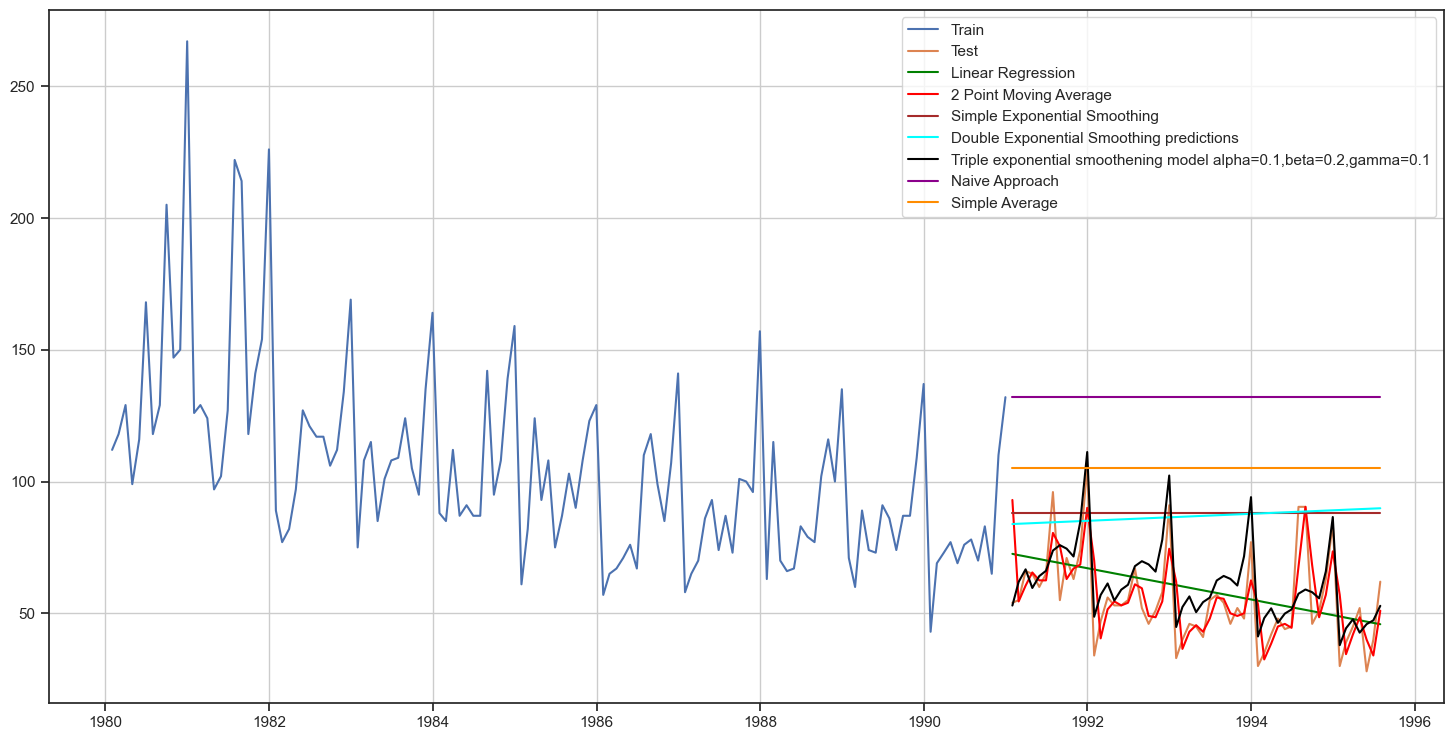

In [110]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing', color='brown')

#Complete the code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict', 0.1, 0.1], label='Double Exponential Smoothing predictions', color='cyan')

#Complete the code to plot the predictions based on the triple exponential smoothening model
plt.plot(TES_test['predict_tm_sm',0.1,0.2,0.1], label='Triple exponential smoothening model alpha=0.1,beta=0.2,gamma=0.1', color='black')

#Complete the code to plot the predictions based on the Naive Approach model
plt.plot(NaiveModel_test['naive'], label='Naive Approach', color='darkmagenta')

#Complete the code to plot the predictions based on the Simple Average model
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average', color='darkorange')


plt.legend(loc='best')
plt.grid();

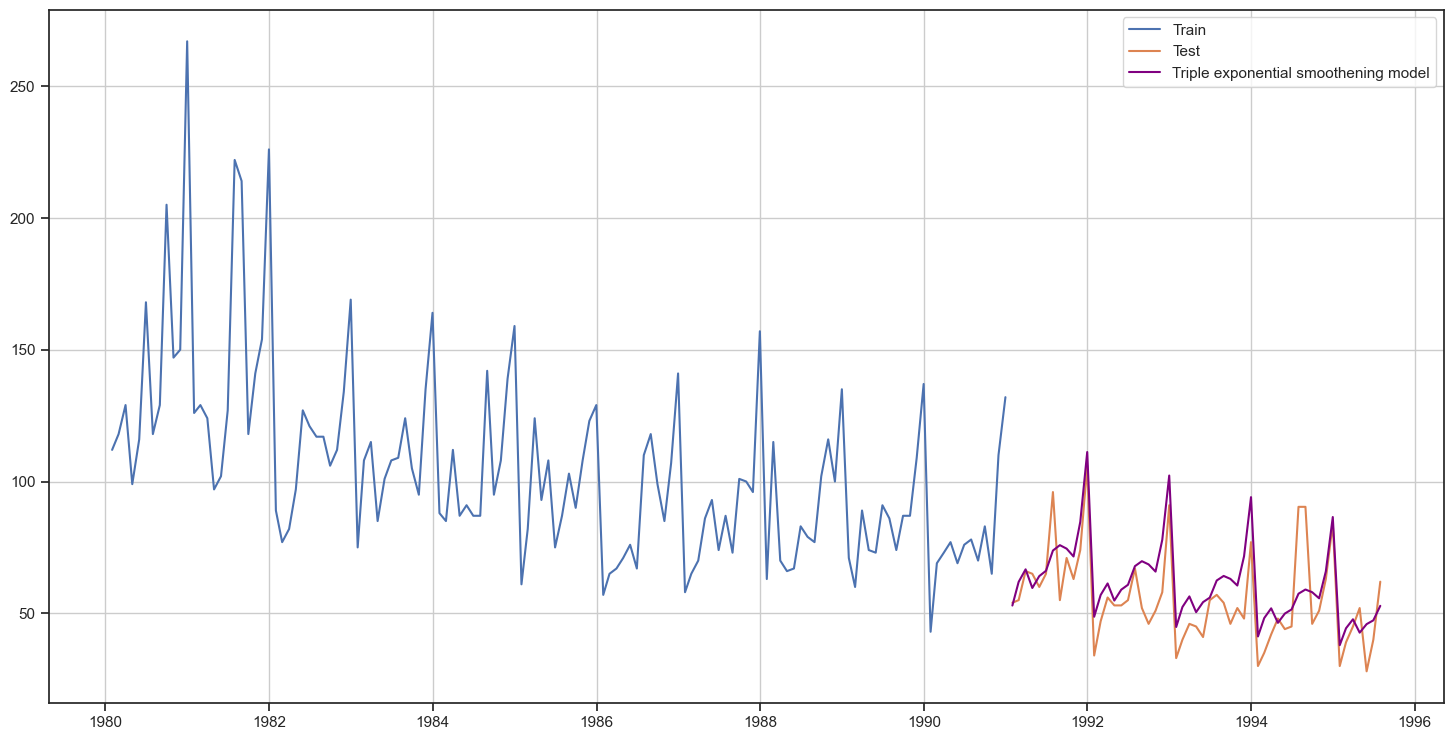

In [111]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

#Complete the code to plot the predictions based on the triple exponential smoothening model
plt.plot(TES_test['predict_tm_sm',0.1,0.2,0.1], label='Triple exponential smoothening model', color='purple')


plt.legend(loc='best')
plt.grid();

### Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:

H0 : The Time Series has a unit root and is thus non-stationary.
H1 : The Time Series does not have a unit root and is thus stationary.
We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the α value.

We see that at 5% significant level the Time Series is non-stationary.

In [112]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    plt.figure(figsize=(18,9))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

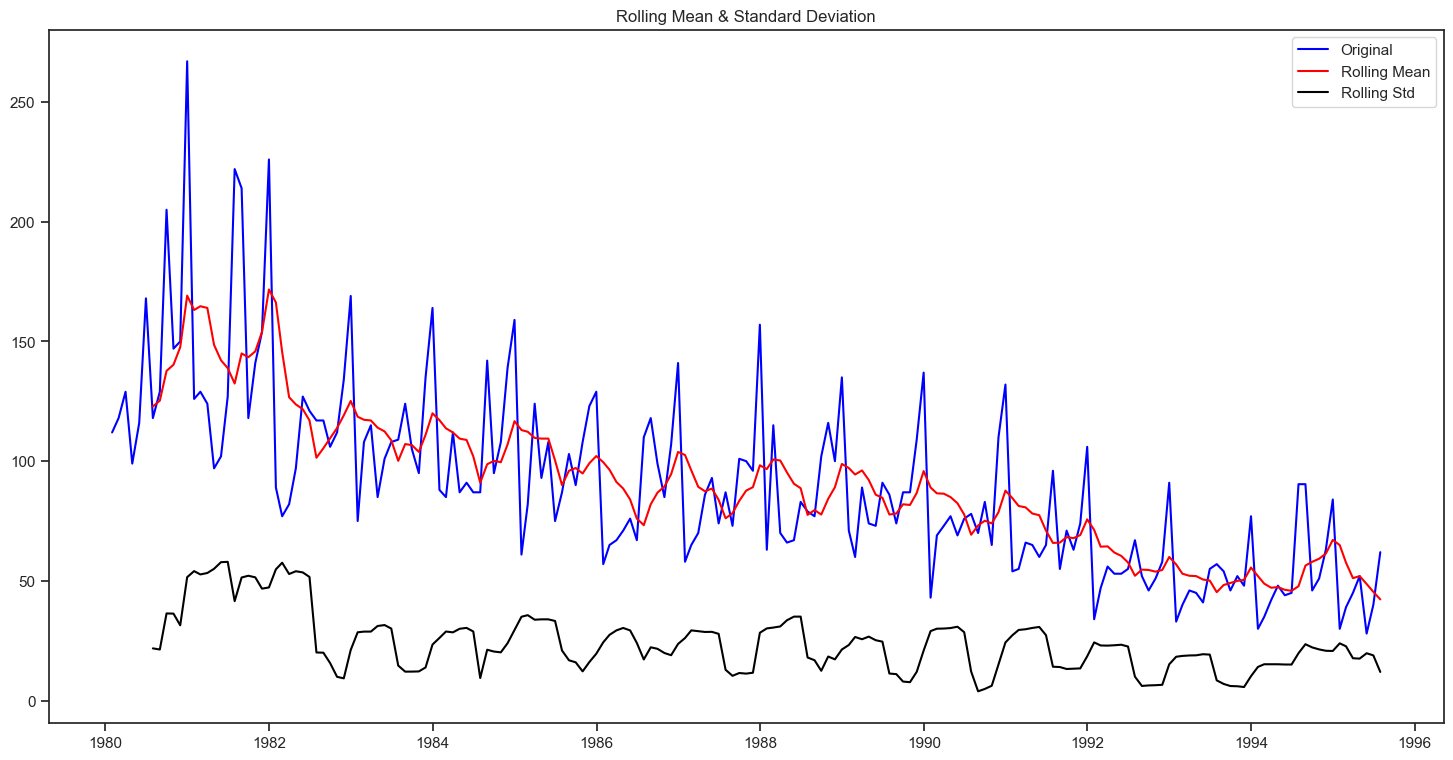

Results of Dickey-Fuller Test:
Test Statistic                  -1.933803
p-value                          0.316330
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [113]:
test_stationarity(df['Rose'])

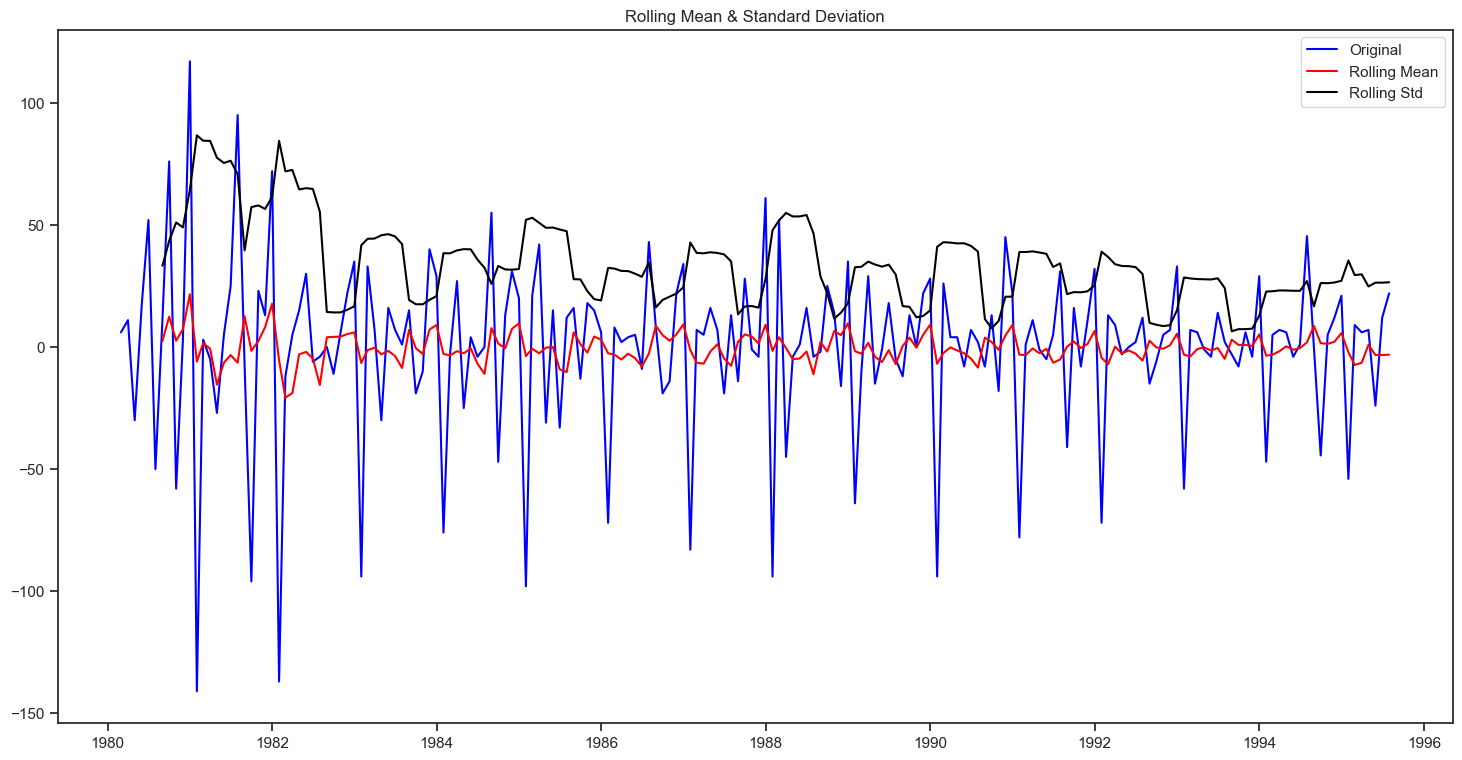

Results of Dickey-Fuller Test:
Test Statistic                -7.855944e+00
p-value                        5.442646e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [114]:
test_stationarity(df['Rose'].diff().dropna())

### Model Building - Stationary Data

#### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

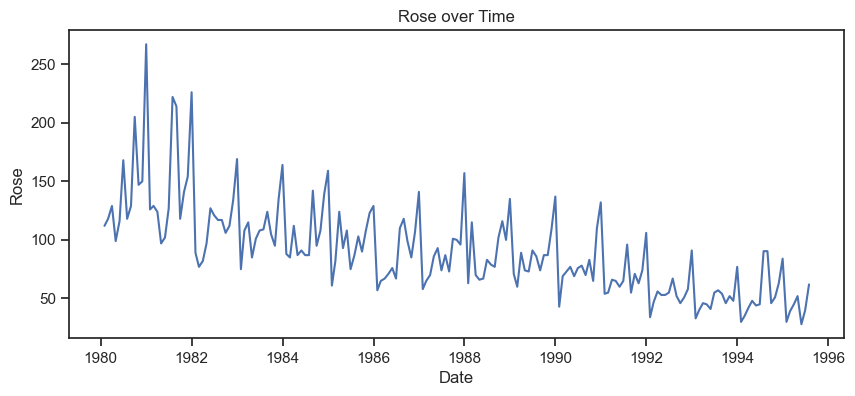

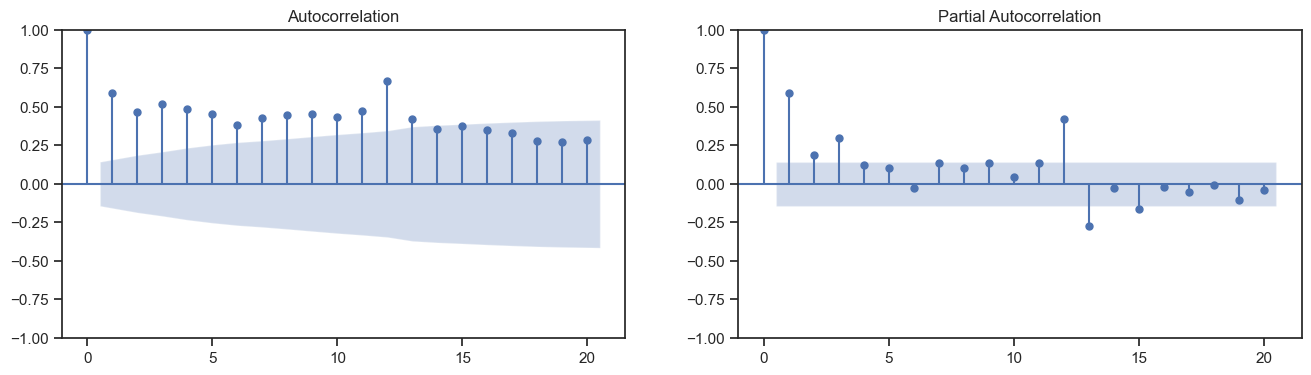

In [115]:
plt.figure(figsize=(10, 4))
plt.plot(df['Rose'])
plt.title('Rose over Time')
plt.xlabel('Date')
plt.ylabel('Rose')
plt.show()
# Plot the ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(df['Rose'], lags=20, ax=ax[0])
plot_pacf(df['Rose'], lags=20, ax=ax[1])
plt.show()

### Auto ARIMA Model

In [116]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 4
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= [1] #complete the code to ensure stationarity
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [117]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [118]:
for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()  #Fit the ARIMA model
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_AIC))   #Complete the code to find the AIC values
    ARIMA_AIC = pd.concat([ARIMA_AIC, pd.DataFrame({'param': [param], 'AIC': [ARIMA_model.aic]})], ignore_index=True)

ARIMA(0, 1, 0) - AIC:Empty DataFrame
Columns: [param, AIC]
Index: []
ARIMA(0, 1, 1) - AIC:       param          AIC
0  (0, 1, 0)  1333.154673
ARIMA(0, 1, 2) - AIC:       param          AIC
0  (0, 1, 0)  1333.154673
1  (0, 1, 1)  1282.309832
ARIMA(0, 1, 3) - AIC:       param          AIC
0  (0, 1, 0)  1333.154673
1  (0, 1, 1)  1282.309832
2  (0, 1, 2)  1279.671529
ARIMA(1, 1, 0) - AIC:       param          AIC
0  (0, 1, 0)  1333.154673
1  (0, 1, 1)  1282.309832
2  (0, 1, 2)  1279.671529
3  (0, 1, 3)  1280.545376
ARIMA(1, 1, 1) - AIC:       param          AIC
0  (0, 1, 0)  1333.154673
1  (0, 1, 1)  1282.309832
2  (0, 1, 2)  1279.671529
3  (0, 1, 3)  1280.545376
4  (1, 1, 0)  1317.350311
ARIMA(1, 1, 2) - AIC:       param          AIC
0  (0, 1, 0)  1333.154673
1  (0, 1, 1)  1282.309832
2  (0, 1, 2)  1279.671529
3  (0, 1, 3)  1280.545376
4  (1, 1, 0)  1317.350311
5  (1, 1, 1)  1280.574230
ARIMA(1, 1, 3) - AIC:       param          AIC
0  (0, 1, 0)  1333.154673
1  (0, 1, 1)  1282.309832
2  (

In [119]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
11  (2, 1, 3)  1274.694973
15  (3, 1, 3)  1278.668346
2   (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376
5   (1, 1, 1)  1280.574230
9   (2, 1, 1)  1281.507862
10  (2, 1, 2)  1281.870722
7   (1, 1, 3)  1281.870722
1   (0, 1, 1)  1282.309832
13  (3, 1, 1)  1282.419278
14  (3, 1, 2)  1283.720741
12  (3, 1, 0)  1297.481092
8   (2, 1, 0)  1298.611034
4   (1, 1, 0)  1317.350311
0   (0, 1, 0)  1333.154673

In [120]:
auto_ARIMA = ARIMA(train['Rose'], order=(2,1,3),freq='M')  #Build the ARIMA model based on the best AIC values

results_auto_ARIMA = auto_ARIMA.fit()  #Fit the auto ARIMA model

print(results_auto_ARIMA.summary())   #Print the summary result

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.347
Date:                Fri, 24 May 2024   AIC                           1274.695
Time:                        19:22:34   BIC                           1291.946
Sample:                    01-31-1980   HQIC                          1281.705
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6781      0.084    -20.038      0.000      -1.842      -1.514
ar.L2         -0.7289      0.084     -8.704      0.000      -0.893      -0.565
ma.L1          1.0449      0.673      1.554      0.1

In [121]:
results_auto_ARIMA

In [122]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))  #Forecast using the auto ARIMA
predicted_auto_ARIMA

1991-01-31    85.615048
1991-02-28    90.533523
1991-03-31    81.973917
1991-04-30    92.752339
1991-05-31    80.904628
1991-06-30    92.929380
1991-07-31    81.386943
1991-08-31    91.990985
1991-09-30    82.610062
1991-10-31    90.622518
1991-11-30    84.014898
1991-12-31    89.262597
1992-01-31    85.272940
1992-02-29    88.142776
1992-03-31    86.235079
1992-04-30    87.344487
1992-05-31    86.873352
1992-06-30    86.855300
1992-07-31    87.229000
1992-08-31    86.615069
1992-09-30    87.372889
1992-10-31    86.548718
1992-11-30    87.379350
1992-12-31    86.586240
1993-01-31    87.311678
1993-02-28    86.672448
1993-03-31    87.216341
1993-04-30    86.769591
1993-05-31    87.122821
1993-06-30    86.855716
1993-07-31    87.046464
1993-08-31    86.921070
1993-09-30    86.992453
1993-10-31    86.964068
1993-11-30    86.959669
1993-12-31    86.987740
1994-01-31    86.943842
1994-02-28    86.997045
1994-03-31    86.939764
1994-04-30    86.997105
1994-05-31    86.942636
1994-06-30    86

In [123]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA,squared=False)
print(rmse)

35.96414703874144


In [124]:
results = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['Auto_ARIMA'])

resultsDf = pd.concat([resultsDf, results])
resultsDf

Test RMSE
Linear Regression                                   17.080298
2pointTrailingMovingAverage                         12.298291
4pointTrailingMovingAverage                         15.845558
6pointTrailingMovingAverage                         15.986163
9pointTrailingMovingAverage                         16.500823
Alpha=0.995,SimpleExponentialSmoothing              36.711757
Naive Model                                         78.396083
Simple Average                                      52.318735
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  36.711757
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...  11.757610
Auto_ARIMA                                          35.964147

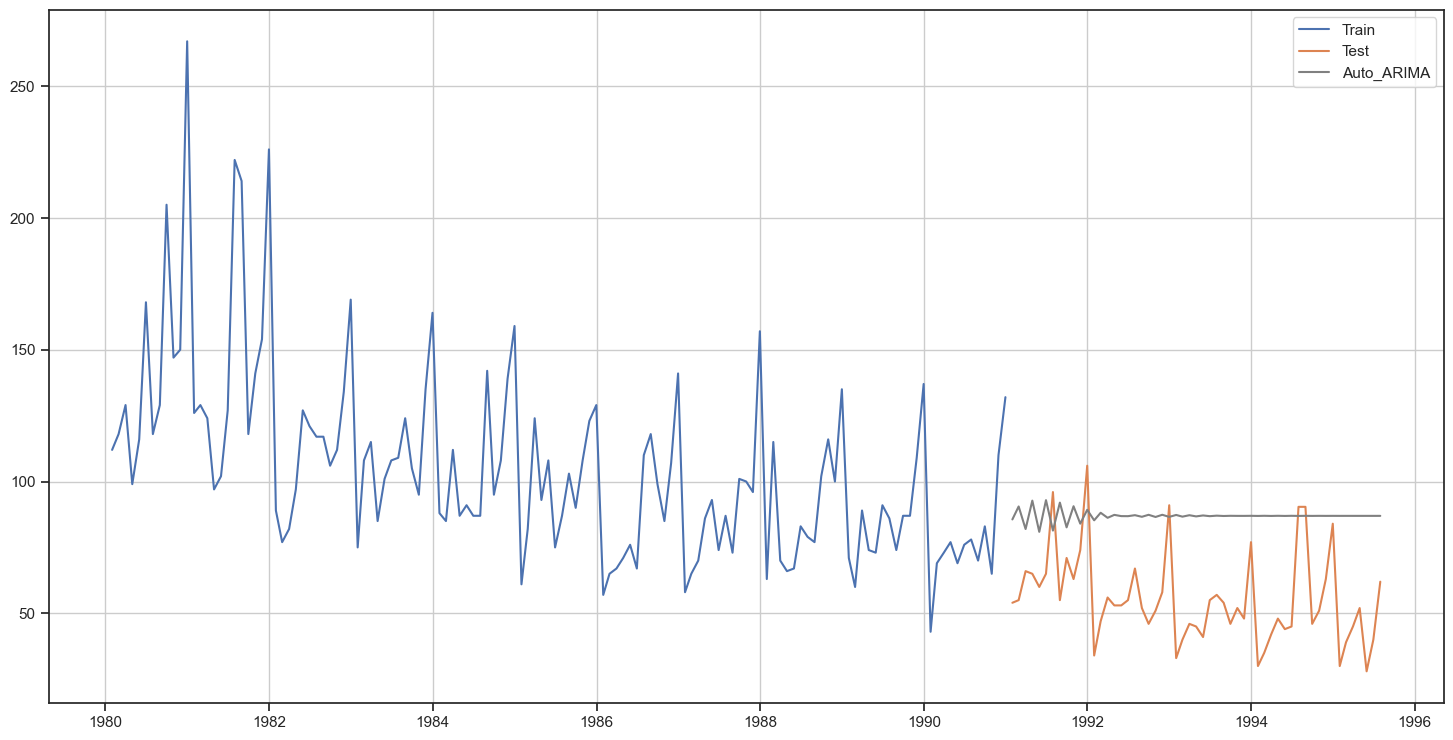

In [125]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

#Complete the code to plot the predictions based on the Auto ARIMA model
plt.plot(predicted_auto_ARIMA, label='Auto_ARIMA', color='gray')

plt.legend(loc='best')
plt.grid();


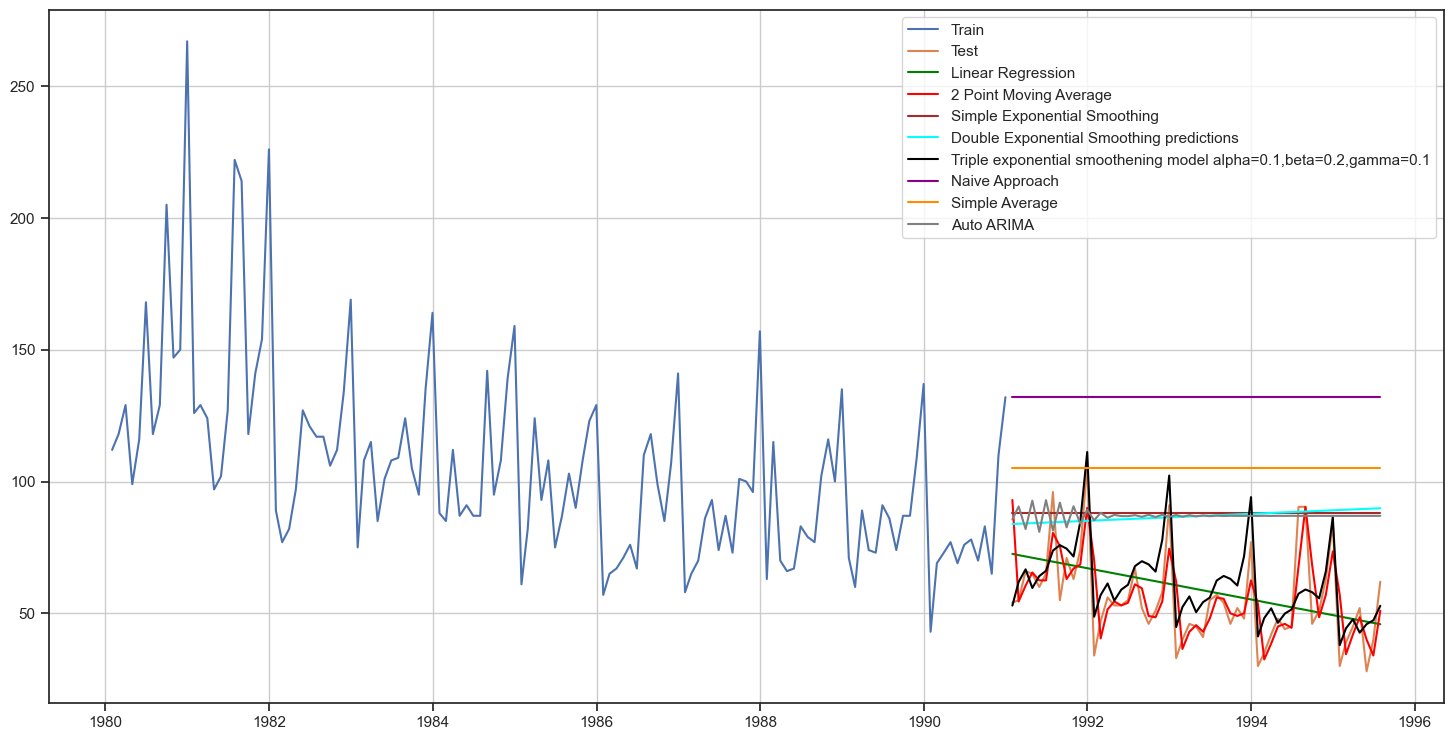

In [126]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

# Complete the code to plot the predictions made by the linear regression model
plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression', color = 'green')

#Complete the code to plot the predictions based on the best moving average model
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Moving Average', color='red')

#Complete the code to plot the predictions based on the simple exponential smoothening model
plt.plot(SES_test['predict'], label='Simple Exponential Smoothing', color='brown')

#Complete the code to plot the predictions based on the double exponential smoothening model
plt.plot(DES_test['predict', 0.1, 0.1], label='Double Exponential Smoothing predictions', color='cyan')

#Complete the code to plot the predictions based on the triple exponential smoothening model
plt.plot(TES_test['predict_tm_sm',0.1,0.2,0.1], label='Triple exponential smoothening model alpha=0.1,beta=0.2,gamma=0.1', color='black')

#Complete the code to plot the predictions based on the Naive Approach model
plt.plot(NaiveModel_test['naive'], label='Naive Approach', color='darkmagenta')

#Complete the code to plot the predictions based on the Simple Average model
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average', color='darkorange')

#Complete the code to plot the predictions based on the Auto ARIMA model
plt.plot(predicted_auto_ARIMA, label='Auto ARIMA', color='gray')


plt.legend(loc='best')
plt.grid();

### SARIMA

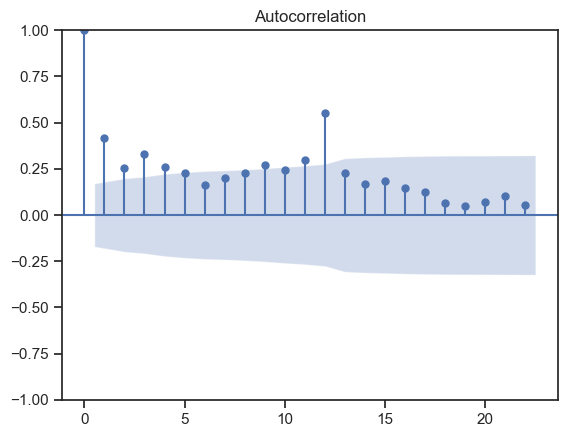

In [127]:
plot_acf(train['Rose'],alpha=0.05);

SARIMA Model building to estimate best parameters

In [128]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [129]:
import itertools
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming train['Rose'] is your time series data
# Replace with your actual DataFrame and column name

# Define the p, d, q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate combinations of p, d, q triplets
pdq = list(itertools.product(p, d, q))

# Generate combinations for seasonal p, d, q, and m
seasonal_pdq = list(itertools.product(p, d, q, [12]))

# Initialize an empty DataFrame to store the AIC values
SARIMA_AIC = pd.DataFrame(columns=['param', 'seasonal', 'AIC'])

# Iterate over all combinations of pdq and seasonal_pdq
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            # Define the SARIMA model
            SARIMA_model = SARIMAX(train['Rose'].values,
                                   order=param,
                                   seasonal_order=param_seasonal,
                                   enforce_stationarity=False,
                                   enforce_invertibility=False)
            # Fit the model
            results_SARIMA = SARIMA_model.fit(maxiter=1000)
            # Print the AIC value
            print(f'SARIMA{param}x{param_seasonal} - AIC:{results_SARIMA.aic}')
            # Append the results to the DataFrame using pd.concat
            SARIMA_AIC = pd.concat([SARIMA_AIC, pd.DataFrame({'param': [param],
                                                              'seasonal': [param_seasonal],
                                                              'AIC': [results_SARIMA.aic]})], ignore_index=True)
        except Exception as e:
            print(f'SARIMA{param}x{param_seasonal} - Exception: {e}')

# Display the DataFrame with AIC values
print(SARIMA_AIC)


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.08156D+00    |proj g|=  1.29452D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.295D-06   6.082D+00
  F =   6.0815558878332983     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:1607.5307543879908
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.08054D+00    |proj g|=  1.22747D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     14      1     0     0   3.790D-06   3.081D+00
  F =   3.0805426451332498     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC:819.263258315178
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.23157D+00    |proj g|=  4.41492D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of f

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.25908D+00    |proj g|=  2.28599D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     16      1     0     0   8.546D-07   3.259D+00
  F =   3.2590690212036346     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(0, 2, 1, 12) - AIC:864.3942215977595
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.90642D+00    |proj g|=  2.82286D-01


 This problem is unconstrained.



At iterate    5    f=  2.83453D+00    |proj g|=  1.04106D-02

At iterate   10    f=  2.78883D+00    |proj g|=  3.23531D-02

At iterate   15    f=  2.78667D+00    |proj g|=  9.57101D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     18      1     0     0   9.571D-07   2.787D+00
  F =   2.7866699249214348     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(0, 2, 2, 12) - AIC:741.6808601792588
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.65671D+00    |proj g|=  5.71305D+00

At iterate    5    f=  3.58381D+00    |proj g|=  1.67424D+00

At iterate   10    f=  3.56124D+00    |proj g|=  1.23980D-01

At iterate   15    f=  3.56025D+00    |proj g|=  7.40789D-03

At iterate   20    f=  3.56025D+00    |proj g|=  2.15875D-02

At iterate   25    f=  3.56002D+00    |proj g|=  2.41824D-01

At iterate   30    f=  3.55881D+00    |proj g|=  6.84300D-02

At iterate   35    f=  3.55878D+00    |proj g|=  1.21729D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   15    f=  3.65495D+00    |proj g|=  5.98280D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     24      1     0     0   7.783D-06   3.655D+00
  F =   3.6549524643366724     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:970.9074505848815
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.22187D+00    |proj g|=  5.37329D-01

At iterate    5    f=  3.08456D+00    |proj g|=  1.31920D-02

At iterate   10 

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


SARIMA(0, 0, 0)x(1, 2, 0, 12) - AIC:899.4677572486003
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.29488D+00    |proj g|=  7.45582D-02

At iterate    5    f=  3.25186D+00    |proj g|=  4.22033D-03

At iterate   10    f=  3.24708D+00    |proj g|=  5.73539D-03

At iterate   15    f=  3.24699D+00    |proj g|=  2.14329D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     25      1     0     0   2.143D-05   3.247D+00
  F =   3.2469897847526399     

CONVERGENCE: RE

 This problem is unconstrained.



At iterate    5    f=  2.82856D+00    |proj g|=  2.45641D-03

At iterate   10    f=  2.82824D+00    |proj g|=  1.26545D-02

At iterate   15    f=  2.82527D+00    |proj g|=  1.28040D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     22      1     0     0   1.398D-05   2.825D+00
  F =   2.8249719062076095     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 0)x(1, 2, 2, 12) - AIC:753.7925832388089
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMA(0, 0, 0)x(2, 0, 0, 12) - AIC:939.9681316162017
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.66464D+00    |proj g|=  2.70238D+00

At iterate    5    f=  3.60793D+00    |proj g|=  1.06759D+00

At iterate   10    f=  3.59716D+00    |proj g|=  3.48482D-01

At iterate   15    f=  3.57606D+00    |proj g|=  1.07920D+00

At iterate   20    f=  3.55621D+00    |proj g|=  1.26263D-01

At iterate   25    f=  3.53599D+00    |proj g|=  1.75423D-02

At iterate   30    f=  3.53592D+00    |proj g|=  5.05077D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

 

 This problem is unconstrained.



At iterate   15    f=  3.49644D+00    |proj g|=  2.04881D-02

At iterate   20    f=  3.49245D+00    |proj g|=  9.37232D-02

At iterate   25    f=  3.49073D+00    |proj g|=  4.20609D-03

At iterate   30    f=  3.49063D+00    |proj g|=  1.03646D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     44      1     0     0   7.951D-05   3.491D+00
  F =   3.4906320666841206     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 0)x(2, 0, 2, 12) - AIC:931.5268656046078
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     12      1     0     0   1.062D-05   3.116D+00
  F =   3.1155743252002979     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 0)x(2, 1, 0, 12) - AIC:828.5116218528786
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.11924D+00    |proj g|=  1.13408D+00

At iterate    5    f=  3.09162D+00    |proj g|=  4.60465D-02

At iterate   10    f=  3.08862D+00    |proj g|=  3.80250D-03

At iterate   15    f=  3.08667D+00    |proj g|=  6.52795D-03

At iter

 This problem is unconstrained.



At iterate   10    f=  3.07409D+00    |proj g|=  3.64052D-02

At iterate   15    f=  3.06531D+00    |proj g|=  9.22373D-01

At iterate   20    f=  3.05420D+00    |proj g|=  2.63152D-01

At iterate   25    f=  3.05013D+00    |proj g|=  3.10949D-03

At iterate   30    f=  3.05010D+00    |proj g|=  6.51024D-02

At iterate   35    f=  3.04931D+00    |proj g|=  2.00446D-01

At iterate   40    f=  3.04893D+00    |proj g|=  1.18770D-03

At iterate   45    f=  3.04893D+00    |proj g|=  1.39490D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     63      1     0     0   1.777D-04   3.049D+00
  F =   3.04892629658

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMA(0, 0, 0)x(2, 2, 0, 12) - AIC:760.5217431390251
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.84530D+00    |proj g|=  1.78239D-01

At iterate    5    f=  2.81282D+00    |proj g|=  6.39101D-03

At iterate   10    f=  2.80859D+00    |proj g|=  4.75527D-02

At iterate   15    f=  2.79976D+00    |proj g|=  3.44484D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     23      1     0     0   8.845D-06   2.800D+00
  F =   2.7997410638117382     

CONVERGENCE: NO

 This problem is unconstrained.



At iterate    5    f=  2.78250D+00    |proj g|=  1.76343D-01

At iterate   10    f=  2.76392D+00    |proj g|=  9.45869D-04

At iterate   15    f=  2.76382D+00    |proj g|=  9.92783D-03

At iterate   20    f=  2.76349D+00    |proj g|=  8.38952D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     27      1     0     0   1.970D-05   2.763D+00
  F =   2.7634869940522391     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 0)x(2, 2, 2, 12) - AIC:739.5605664297912
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.39820D+00    |proj g|=  4.25879D-01

At iterate   15    f=  4.11934D+00    |proj g|=  1.49053D-01

At iterate   20    f=  4.10638D+00    |proj g|=  1.39150D-02

At iterate   25    f=  4.10605D+00    |proj g|=  3.13817D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     35      1     0     0   2.502D-05   4.106D+00
  F =   4.1060489608203099     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 1)x(0, 0, 2, 12) - AIC:1091.9969256565619
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   10    f=  4.20614D+00    |proj g|=  9.39693D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     12      1     0     0   9.397D-07   4.206D+00
  F =   4.2061368745438728     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:1114.4201348795823
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.61097D+00    |proj g|=  6.74249D-02

At iterate    5    f=  3.60142D+00    |proj g|=  6.42553D-02

At iterate   10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.42677D+00    |proj g|=  2.05329D-02

At iterate   10    f=  3.20474D+00    |proj g|=  5.88782D-02

At iterate   15    f=  3.20027D+00    |proj g|=  1.77662D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     22      1     0     0   3.081D-06   3.200D+00
  F =   3.2002569591147587     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(0, 2, 1, 12) - AIC:850.8678372062963
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  2.97282D+00    |proj g|=  1.12848D-02

At iterate   10    f=  2.84418D+00    |proj g|=  1.70802D-01

At iterate   15    f=  2.82288D+00    |proj g|=  1.90929D-01

At iterate   20    f=  2.75692D+00    |proj g|=  1.86205D-02

At iterate   25    f=  2.75073D+00    |proj g|=  3.60075D-03

At iterate   30    f=  2.75050D+00    |proj g|=  1.63651D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     43      1     0     0   1.381D-06   2.750D+00
  F =   2.7504961400893846     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(0, 2, 2, 12) - AIC:734.13098098359

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   25    f=  4.00008D+00    |proj g|=  1.30765D-01

At iterate   30    f=  3.98602D+00    |proj g|=  7.21883D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     54      1     0     0   2.703D-05   3.986D+00
  F =   3.9859643799033644     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1060.2945962944882
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.59695D+00    |proj g|=  2.90553D-01

At iterate    5

 This problem is unconstrained.



At iterate   15    f=  3.71943D+00    |proj g|=  7.29511D+00

At iterate   20    f=  3.49961D+00    |proj g|=  9.44868D-01

At iterate   25    f=  3.49106D+00    |proj g|=  1.11934D-02

At iterate   30    f=  3.48890D+00    |proj g|=  2.71753D-01

At iterate   35    f=  3.48598D+00    |proj g|=  4.27194D-03

At iterate   40    f=  3.48596D+00    |proj g|=  1.42284D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     58      1     0     0   4.161D-06   3.486D+00
  F =   3.4859561625264370     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(1, 0, 2, 12) - AIC:930.29242690697

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:945.1937466326167
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.17572D+00    |proj g|=  1.30194D-01

At iterate    5    f=  3.13901D+00    |proj g|=  2.87614D-02


 This problem is unconstrained.



At iterate   10    f=  3.10105D+00    |proj g|=  4.27458D-02

At iterate   15    f=  3.03882D+00    |proj g|=  2.44647D-02

At iterate   20    f=  3.03321D+00    |proj g|=  1.56084D-02

At iterate   25    f=  3.03287D+00    |proj g|=  2.85739D-03

At iterate   30    f=  3.03285D+00    |proj g|=  1.43595D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     38      1     0     0   1.436D-05   3.033D+00
  F =   3.0328545821965505     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 1)x(1, 1, 2, 12) - AIC:810.6736096998893
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.


At iterate   15    f=  3.37900D+00    |proj g|=  2.15872D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     16     19      1     0     0   2.030D-06   3.379D+00
  F =   3.3789953410815072     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(1, 2, 0, 12) - AIC:898.0547700455179
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.43213D+00    |proj g|=  2.74722D-02

At iterate    5    f=  3.42008D+00    |proj g|=  2.38486D-02


 This problem is unconstrained.



At iterate   10    f=  3.28012D+00    |proj g|=  4.33806D-01

At iterate   15    f=  3.18635D+00    |proj g|=  1.13783D-01

At iterate   20    f=  3.17662D+00    |proj g|=  1.76434D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     31      1     0     0   5.867D-05   3.177D+00
  F =   3.1766157787641065     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 1)x(1, 2, 1, 12) - AIC:846.6265655937241
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  2.98239D+00    |proj g|=  1.08632D-02

At iterate   10    f=  2.95874D+00    |proj g|=  2.72786D-02

At iterate   15    f=  2.83333D+00    |proj g|=  1.72516D-01

At iterate   20    f=  2.75684D+00    |proj g|=  1.71574D-01

At iterate   25    f=  2.74375D+00    |proj g|=  1.56174D-02

At iterate   30    f=  2.74363D+00    |proj g|=  5.17407D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     43      1     0     0   6.290D-05   2.744D+00
  F =   2.7436256754708706     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 1)x(1, 2, 2, 12) - AIC:734.31717832430

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.31486D+00    |proj g|=  1.13649D+00

At iterate   15    f=  3.88164D+00    |proj g|=  7.72268D-01

At iterate   20    f=  3.50695D+00    |proj g|=  1.39690D-01

At iterate   25    f=  3.50557D+00    |proj g|=  3.02538D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     45      1     0     0   5.941D-07   3.506D+00
  F =   3.5055740760011531     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(2, 0, 0, 12) - AIC:933.4715560643044
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5    164    244      1     0     0   1.938D-03   3.506D+00
  F =   3.5056513171170001     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 1)x(2, 0, 1, 12) - AIC:935.491947718888
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.56186D+00    |proj g|=  1.66312D-01

At iterate    5    f=  4.51917D+00    |proj g|=  7.15037D-03

At iterate   10    f=  4.51408D+00    |proj g|=  1.14779D-02

At iterate   15 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.21696D+00    |proj g|=  1.55129D-01

At iterate    5    f=  3.20474D+00    |proj g|=  2.38656D-02


 This problem is unconstrained.



At iterate   10    f=  3.08970D+00    |proj g|=  1.76509D-01

At iterate   15    f=  3.07574D+00    |proj g|=  3.66408D-02

At iterate   20    f=  3.07463D+00    |proj g|=  1.01196D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     25      1     0     0   1.509D-05   3.075D+00
  F =   3.0746345354329043     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 1)x(2, 1, 1, 12) - AIC:821.7035173542868
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   10    f=  3.12292D+00    |proj g|=  5.68076D-02

At iterate   15    f=  3.10665D+00    |proj g|=  2.33054D-01

At iterate   20    f=  3.03553D+00    |proj g|=  3.36298D-01

At iterate   25    f=  2.99839D+00    |proj g|=  1.21677D-02

At iterate   30    f=  2.99828D+00    |proj g|=  5.60356D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     42      1     0     0   1.888D-04   2.998D+00
  F =   2.9982820672567354     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 1)x(2, 1, 2, 12) - AIC:803.5464657557782
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   15    f=  2.85238D+00    |proj g|=  2.21489D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     25      1     0     0   1.212D-05   2.852D+00
  F =   2.8522073140390614     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 1)x(2, 2, 0, 12) - AIC:760.9827309063122
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.05445D+00    |proj g|=  3.55131D-02


 This problem is unconstrained.



At iterate    5    f=  3.04389D+00    |proj g|=  2.34006D-02

At iterate   10    f=  2.84851D+00    |proj g|=  2.83744D-01

At iterate   15    f=  2.79658D+00    |proj g|=  2.89452D-02

At iterate   20    f=  2.79584D+00    |proj g|=  3.93168D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     29      1     0     0   9.980D-06   2.796D+00
  F =   2.7958260026755974     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(2, 2, 1, 12) - AIC:748.0980647063577
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  2.97350D+00    |proj g|=  1.17004D-02

At iterate   10    f=  2.90107D+00    |proj g|=  1.24514D-01

At iterate   15    f=  2.73544D+00    |proj g|=  1.35113D-01

At iterate   20    f=  2.72781D+00    |proj g|=  4.16431D-03

At iterate   25    f=  2.72687D+00    |proj g|=  2.19295D-02

At iterate   30    f=  2.72639D+00    |proj g|=  2.99928D-03

At iterate   35    f=  2.72638D+00    |proj g|=  1.53383D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     58      1     0     0   1.993D-05   2.726D+00
  F =   2.7263842904286557     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.81121D+00    |proj g|=  2.08216D+00

At iterate   15    f=  4.58612D+00    |proj g|=  5.24388D-01

At iterate   20    f=  4.52360D+00    |proj g|=  1.59063D-01

At iterate   25    f=  4.50265D+00    |proj g|=  3.47633D-03

At iterate   30    f=  4.50262D+00    |proj g|=  1.29708D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     48      1     0     0   2.007D-05   4.503D+00
  F =   4.5026161720277411     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 2)x(0, 0, 1, 12) - AIC:1196.6906694153236
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   10    f=  4.42530D+00    |proj g|=  2.46481D-01

At iterate   15    f=  4.05901D+00    |proj g|=  3.63257D-01

At iterate   20    f=  3.83782D+00    |proj g|=  6.08209D-02

At iterate   25    f=  3.83321D+00    |proj g|=  6.79111D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     43      1     0     0   3.543D-06   3.833D+00
  F =   3.8332127378587728     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 2)x(0, 0, 2, 12) - AIC:1021.968162794716
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.49208D+00    |proj g|=  2.06795D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     18      1     0     0   2.068D-06   3.492D+00
  F =   3.4920786015996859     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 2)x(0, 1, 1, 12) - AIC:929.9087508223171
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.10392D+00    |proj g|=  1.37387D-01

At iterate    5    f=  3.06572D+00    |proj g|=  4.45046D-02

At iterate   10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.10017D+00    |proj g|=  9.45056D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   4.667D-06   4.100D+00
  F =   4.1000989988654357     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 2)x(0, 2, 0, 12) - AIC:1088.426135700475
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.33226D+00    |proj g|=  2.16219D-01

At iterate    5    f=  3.29606D+00    |proj g|=  1.75322D-02

At iterate   10

 This problem is unconstrained.



At iterate    5    f=  2.85286D+00    |proj g|=  1.16752D-02

At iterate   10    f=  2.74120D+00    |proj g|=  9.98089D-02

At iterate   15    f=  2.71746D+00    |proj g|=  7.20131D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     22      1     0     0   1.176D-06   2.717D+00
  F =   2.7174620588994904     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 2)x(0, 2, 2, 12) - AIC:727.4099835494654
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.72367D+00    |proj g|=  8.27220D-01

At iterate   20    f=  4.13396D+00    |proj g|=  4.46882D-01

At iterate   25    f=  3.94780D+00    |proj g|=  2.86882D-01

At iterate   30    f=  3.94711D+00    |proj g|=  5.34568D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     90      2     0     0   1.441D-04   3.947D+00
  F =   3.9471093426118067     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 2)x(1, 0, 1, 12) - AIC:1052.036866449517



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.55157D+00    |proj g|=  2.88463D-01

At iterate    5    f=  4.47718D+00    |proj g|=  7.05219D-03

At iterate   10    f=  4.46258D+00    |proj g|=  2.56368D-02

At iterate   15    f=  3.96897D+00    |proj g|=  2.50176D-01

At iterate   20    f=  3.62610D+00    |proj g|=  2.89351D-01

At iterate   25    f=  3.55200D+00    |proj g|=  1.10794D-01

At iterate   30    f=  3.50739D+00    |proj g|=  5.49501D-02

At iterate   35    f=  3.48495D+00    |proj g|=  1.93880D-01

At iterate   40    f=  3.47141D+00    |proj g|=  1.21053D-01

At iterate   45    f=  3.46333D+00    |proj g|=  1.21609D-01

At iterate   50    f=  3.46093D+00    |proj g|=  7.05981D-02

At iterate   55    f=  3.46056D+00    |proj g|=  3.97420D-02

At iterate   60    f=  3.46052D+00    |proj g|=  2.81026D-03

At iterate   65    f=  3.4


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate  230    f=  3.45715D+00    |proj g|=  2.41593D-02

At iterate  235    f=  3.45715D+00    |proj g|=  4.63879D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6    237    367      2     0     0   1.692D-03   3.457D+00
  F =   3.4571525095061522     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 2)x(1, 0, 2, 12) - AIC:924.6882625096242
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.67853D+00    |proj g|=  1.94234D-01

At iterate    5

 This problem is unconstrained.



At iterate    5    f=  3.06764D+00    |proj g|=  1.54587D-02

At iterate   10    f=  3.03854D+00    |proj g|=  2.28729D-02

At iterate   15    f=  3.00394D+00    |proj g|=  4.20965D-02

At iterate   20    f=  2.99599D+00    |proj g|=  2.98956D-02

At iterate   25    f=  2.99370D+00    |proj g|=  8.05520D-03

At iterate   30    f=  2.99365D+00    |proj g|=  1.31430D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     40      1     0     0   5.238D-06   2.994D+00
  F =   2.9936482615404385     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 2)x(1, 1, 2, 12) - AIC:802.32314104667

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.44417D+00    |proj g|=  1.46059D-02

At iterate   10    f=  3.38502D+00    |proj g|=  1.20415D-01

At iterate   15    f=  3.37891D+00    |proj g|=  6.02078D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     19      1     0     0   1.855D-06   3.379D+00
  F =   3.3789088392623192     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 2)x(1, 2, 0, 12) - AIC:900.0319335652523
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.96999D+00    |proj g|=  2.36328D-01

At iterate    5    f=  2.86449D+00    |proj g|=  1.10865D-02

At iterate   10    f=  2.82308D+00    |proj g|=  3.78907D-02

At iterate   15    f=  2.71258D+00    |proj g|=  4.29244D-01

At iterate   20    f=  2.71050D+00    |proj g|=  1.44771D-03

At iterate   25    f=  2.71050D+00    |proj g|=  9.12566D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     43      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  4.53136D+00    |proj g|=  3.54053D-02

At iterate   10    f=  4.26465D+00    |proj g|=  4.82489D-01

At iterate   15    f=  3.59384D+00    |proj g|=  4.15974D-01

At iterate   20    f=  3.50272D+00    |proj g|=  3.21480D-02

At iterate   25    f=  3.50257D+00    |proj g|=  3.06209D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     54      1     0     0   3.062D-05   3.503D+00
  F =   3.5025667790556945     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMA(0, 0, 2)x(2, 0, 0, 12) - AIC:934.6776296707034
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.61184D+00    |proj g|=  3.73877D-02

At iterate    5    f=  4.60308D+00    |proj g|=  1.06211D-02

At iterate   10    f=  4.56831D+00    |proj g|=  3.58495D-02

At iterate   15    f=  4.21778D+00    |proj g|=  4.73277D-01

At iterate   20    f=  3.66753D+00    |proj g|=  5.81049D-01

At iterate   25    f=  3.50903D+00    |proj g|=  1.61620D-01

At iterate   30    f=  3.50260D+00    |proj g|=  1.19276D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

 

 This problem is unconstrained.



At iterate   10    f=  4.46494D+00    |proj g|=  2.27322D-02

At iterate   15    f=  4.22102D+00    |proj g|=  3.28496D+00

At iterate   20    f=  3.98744D+00    |proj g|=  6.60665D+00

At iterate   25    f=  3.70037D+00    |proj g|=  6.22401D-01

At iterate   30    f=  3.54128D+00    |proj g|=  8.57928D-01

At iterate   35    f=  3.47174D+00    |proj g|=  5.30820D-01

At iterate   40    f=  3.42638D+00    |proj g|=  2.20488D-01

At iterate   45    f=  3.40007D+00    |proj g|=  6.18976D-02

At iterate   50    f=  3.39414D+00    |proj g|=  6.66332D-03

At iterate   55    f=  3.39408D+00    |proj g|=  2.58247D-03

At iterate   60    f=  3.39385D+00    |proj g|=  1.41180D-02

At iterate   65    f=  3.39286D+00    |proj g|=  9.38532D-03

At iterate   70    f=  3.39030D+00    |proj g|=  9.77022D-03

At iterate   75    f=  3.38765D+00    |proj g|=  1.72228D-02

At iterate   80    f=  3.38421D+00    |proj g|=  5.69427D-02

At iterate   85    f=  3.38303D+00    |proj g|=  9.17247D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  3.09407D+00    |proj g|=  3.46044D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     24      1     0     0   1.025D-05   3.094D+00
  F =   3.0940545602655294     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 2)x(2, 1, 0, 12) - AIC:826.8304039100998
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18886D+00    |proj g|=  3.25542D-01


 This problem is unconstrained.



At iterate    5    f=  3.16787D+00    |proj g|=  3.52474D-02

At iterate   10    f=  3.14702D+00    |proj g|=  9.54083D-02

At iterate   15    f=  3.08196D+00    |proj g|=  2.00529D-01

At iterate   20    f=  3.07464D+00    |proj g|=  6.37784D-02

At iterate   25    f=  3.07337D+00    |proj g|=  1.22526D-02

At iterate   30    f=  3.07333D+00    |proj g|=  4.68203D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     39      1     0     0   4.682D-06   3.073D+00
  F =   3.0733258451786534     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 2)x(2, 1, 1, 12) - AIC:823.35802312716

 This problem is unconstrained.


At iterate    5    f=  3.06407D+00    |proj g|=  1.54992D-02

At iterate   10    f=  3.04464D+00    |proj g|=  9.04832D-02

At iterate   15    f=  3.03923D+00    |proj g|=  6.73874D-02

At iterate   20    f=  3.00273D+00    |proj g|=  2.17660D-01

At iterate   25    f=  2.96799D+00    |proj g|=  1.05560D-01

At iterate   30    f=  2.95655D+00    |proj g|=  1.94031D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     41      1     0     0   1.526D-04   2.957D+00
  F =   2.9565493298594068     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 2)x(2, 1, 2, 12) - AIC:794.529023082883

 This problem is unconstrained.



At iterate   10    f=  2.87392D+00    |proj g|=  6.91871D-02

At iterate   15    f=  2.84562D+00    |proj g|=  4.62271D-03

At iterate   20    f=  2.84560D+00    |proj g|=  2.25273D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     25      1     0     0   2.253D-06   2.846D+00
  F =   2.8455955370059707     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 2)x(2, 2, 0, 12) - AIC:761.2372217695763
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  2.95950D+00    |proj g|=  1.22026D-02

At iterate   10    f=  2.84216D+00    |proj g|=  1.41577D-01

At iterate   15    f=  2.79550D+00    |proj g|=  4.90118D-02

At iterate   20    f=  2.79485D+00    |proj g|=  1.73805D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     33      1     0     0   1.674D-05   2.795D+00
  F =   2.7948409712551614     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 2)x(2, 2, 1, 12) - AIC:749.8380164113626
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  2.85366D+00    |proj g|=  1.29591D-02

At iterate   10    f=  2.81760D+00    |proj g|=  4.51411D-02

At iterate   15    f=  2.69914D+00    |proj g|=  8.35118D-02

At iterate   20    f=  2.68922D+00    |proj g|=  1.04309D-03

At iterate   25    f=  2.68922D+00    |proj g|=  8.88862D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     32      1     0     0   3.406D-05   2.689D+00
  F =   2.6892154744780865     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 2)x(2, 2, 2, 12) - AIC:723.9528852622149
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64668D+00    |proj g|=  8.54440D-02

At iterate    5    f=  3.64223D+00    |proj g|=  1.00636D-03

At iterate   10    f=  3.64207D+00    |proj g|=  2.10677D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     14      1     0     0   3.176D-06   3.642D+00
  F =   3.6420671597081058     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:965.5057301629399
RUNNING THE L-BF

 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  3.19670D+00    |proj g|=  7.48860D-02

At iterate   10    f=  3.18132D+00    |proj g|=  3.14485D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     14      1     0     0   1.714D-06   3.181D+00
  F =   3.1813208389303220     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:845.868701477605
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.36041D+00    |proj g|=  4.02321D-03

           * * *


 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  3.44559D+00    |proj g|=  4.13096D-02

At iterate   10    f=  3.40383D+00    |proj g|=  2.82516D-02

At iterate   15    f=  3.40255D+00    |proj g|=  1.90212D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     17     20      1     0     0   3.716D-07   3.403D+00
  F =   3.4025505434167136     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 2, 1, 12) - AIC:902.2733434620123
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

 This problem is unconstrained.



At iterate    5    f=  3.02208D+00    |proj g|=  8.94723D-03

At iterate   10    f=  2.96150D+00    |proj g|=  9.17992D-02

At iterate   15    f=  2.91925D+00    |proj g|=  2.13753D-02

At iterate   20    f=  2.91837D+00    |proj g|=  8.00569D-04

At iterate   25    f=  2.91835D+00    |proj g|=  4.17213D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     38      1     0     0   2.158D-05   2.918D+00
  F =   2.9183505178267293     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(0, 2, 2, 12) - AIC:776.4445367062565
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.64277D+00    |proj g|=  1.40673D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     14      1     0     0   6.232D-05   3.643D+00
  F =   3.6427703165731713     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753173
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70578D+00    |proj g|=  9.30518D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.18639D+00    |proj g|=  1.50526D-02

At iterate   10    f=  3.18239D+00    |proj g|=  1.54408D-02

At iterate   15    f=  3.18081D+00    |proj g|=  2.30809D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     20      1     0     0   1.312D-07   3.181D+00
  F =   3.1808076449448488     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:847.7332182654401
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  3.35324D+00    |proj g|=  3.65988D-02

At iterate   20    f=  3.35239D+00    |proj g|=  8.27738D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     24      1     0     0   8.277D-06   3.352D+00
  F =   3.3523931020056055     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(1, 2, 1, 12) - AIC:891.0317789294799
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.11787D+00    |proj g|=  1.42872D-01


 This problem is unconstrained.



At iterate    5    f=  3.07165D+00    |proj g|=  1.14602D-02

At iterate   10    f=  3.01412D+00    |proj g|=  1.32134D-01

At iterate   15    f=  2.93523D+00    |proj g|=  3.71616D-02

At iterate   20    f=  2.92797D+00    |proj g|=  1.41127D-02

At iterate   25    f=  2.92344D+00    |proj g|=  8.53501D-03

At iterate   30    f=  2.92231D+00    |proj g|=  5.32296D-03

At iterate   35    f=  2.92210D+00    |proj g|=  3.20326D-03

At iterate   40    f=  2.92196D+00    |proj g|=  6.69341D-04

At iterate   45    f=  2.92193D+00    |proj g|=  6.95586D-04

At iterate   50    f=  2.92192D+00    |proj g|=  8.10591D-04

At iterate   55    f=  2.92192D+00    |proj g|=  4.15458D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.61727D+00    |proj g|=  2.52418D-03

At iterate   10    f=  3.61708D+00    |proj g|=  1.49043D-02

At iterate   15    f=  3.61697D+00    |proj g|=  2.66059D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   1.825D-05   3.617D+00
  F =   3.6169676290520969     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697536
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  3.20992D+00    |proj g|=  1.39368D-01

At iterate   10    f=  3.20516D+00    |proj g|=  4.06363D-03

At iterate   15    f=  3.20286D+00    |proj g|=  2.57656D-02

At iterate   20    f=  3.20204D+00    |proj g|=  2.67990D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     31      1     0     0   2.680D-05   3.202D+00
  F =   3.2020419428578553     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:853.3390729144738
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.17118D+00    |proj g|=  2.85622D-02

At iterate   10    f=  3.16763D+00    |proj g|=  2.87544D-02

At iterate   15    f=  3.16624D+00    |proj g|=  3.05616D-02

At iterate   20    f=  3.15450D+00    |proj g|=  3.59231D-02

At iterate   25    f=  3.15390D+00    |proj g|=  5.29360D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     34      1     0     0   2.609D-05   3.154D+00
  F =   3.1538947894802609     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:842.6282244227889


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.98896D+00    |proj g|=  1.22830D-05



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     21      1     0     0   1.228D-05   2.989D+00
  F =   2.9889611812370416     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 1, 0)x(2, 2, 0, 12) - AIC:795.085751846579
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.98836D+00    |proj g|=  6.36205D-02

At iterate    5    f=  2.95970D+00    |proj g|=  2.46351D-02

At iterate   10    f=  2.95852D+00    |proj g|=  1.54816D-02

At iterate   15 

 This problem is unconstrained.



At iterate    5    f=  2.91546D+00    |proj g|=  6.40638D-02

At iterate   10    f=  2.90699D+00    |proj g|=  4.64191D-03

At iterate   15    f=  2.90045D+00    |proj g|=  1.03629D-01

At iterate   20    f=  2.89560D+00    |proj g|=  1.52780D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     26      1     0     0   6.680D-06   2.896D+00
  F =   2.8955959777992657     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(2, 2, 2, 12) - AIC:774.4373381390061
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.52809D+00    |proj g|=  8.13694D-01

At iterate   15    f=  3.46833D+00    |proj g|=  2.15998D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     28      1     0     0   1.160D-05   3.468D+00
  F =   3.4683007762817240     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383751
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.28841D+00    |proj g|=  2.02027D-01

At iterate    5

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.61048D+00    |proj g|=  1.72607D-02

At iterate   10    f=  3.57838D+00    |proj g|=  1.61957D-01

At iterate   15    f=  3.44348D+00    |proj g|=  2.72821D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     28      1     0     0   4.181D-07   3.443D+00
  F =   3.4434585631506871     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:915.0730606717814
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  3.16899D+00    |proj g|=  2.55424D-02

At iterate   10    f=  3.02768D+00    |proj g|=  3.22744D-01

At iterate   15    f=  2.96556D+00    |proj g|=  9.06628D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     24      1     0     0   7.201D-06   2.966D+00
  F =   2.9655427307821713     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:790.9032809264933
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.48769D+00    |proj g|=  1.11837D-02

At iterate   10    f=  3.44553D+00    |proj g|=  1.75267D-01

At iterate   15    f=  3.18543D+00    |proj g|=  1.07208D-01

At iterate   20    f=  3.17308D+00    |proj g|=  1.37729D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     31      1     0     0   8.219D-06   3.173D+00
  F =   3.1730829887631931     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(0, 2, 1, 12) - AIC:843.693909033483
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0  

 This problem is unconstrained.



At iterate    5    f=  3.02883D+00    |proj g|=  2.63891D-02

At iterate   10    f=  3.01984D+00    |proj g|=  1.02196D-02

At iterate   15    f=  2.92535D+00    |proj g|=  1.69073D-01

At iterate   20    f=  2.72506D+00    |proj g|=  8.36122D-02

At iterate   25    f=  2.71424D+00    |proj g|=  4.14696D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     38      1     0     0   7.250D-06   2.714D+00
  F =   2.7142200065126394     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(0, 2, 2, 12) - AIC:724.5540817193368
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     46      1     0     0   2.551D-05   3.965D+00
  F =   3.9649372465709103     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330947203
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70606D+00    |proj g|=  1.16728D-01

At iterate    5    f=  3.66794D+00    |proj g|=  1.64727D-02

At iterate   10    f=  3.64073D+00    |proj g|=  5.56530D-02


 This problem is unconstrained.



At iterate   15    f=  3.44794D+00    |proj g|=  8.75419D-02

At iterate   20    f=  3.44271D+00    |proj g|=  7.75795D-03

At iterate   25    f=  3.44264D+00    |proj g|=  2.96136D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     33      1     0     0   2.961D-05   3.443D+00
  F =   3.4426414709509192     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483310427
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.55398D+00    |proj g|=  8.45766D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     25      1     0     0   7.683D-05   3.554D+00
  F =   3.5539608543682633     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:944.2456655532214
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64921D+00    |proj g|=  6.67665D-02

At iterate    5    f=  3.62398D+00    |proj g|=  1.71971D-02

At iterate   10

 This problem is unconstrained.



At iterate   10    f=  3.03438D+00    |proj g|=  1.32796D-01

At iterate   15    f=  2.97545D+00    |proj g|=  6.70282D-02

At iterate   20    f=  2.96521D+00    |proj g|=  7.01515D-03

At iterate   25    f=  2.96483D+00    |proj g|=  2.10436D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     33      1     0     0   9.146D-06   2.965D+00
  F =   2.9648339660036371     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:792.7161670249602
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0 

 This problem is unconstrained.



At iterate   10    f=  3.50381D+00    |proj g|=  4.18161D-01

At iterate   15    f=  3.36724D+00    |proj g|=  2.50912D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     31      1     0     0   7.326D-06   3.367D+00
  F =   3.3670159475761841     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 2, 0, 12) - AIC:894.8922101601125
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.51347D+00    |proj g|=  8.35321D-02


 This problem is unconstrained.



At iterate    5    f=  3.48399D+00    |proj g|=  1.12990D-02

At iterate   10    f=  3.43731D+00    |proj g|=  1.02796D-01

At iterate   15    f=  3.24015D+00    |proj g|=  2.25699D-01

At iterate   20    f=  3.18634D+00    |proj g|=  8.83767D-04

At iterate   25    f=  3.18633D+00    |proj g|=  3.38175D-04

At iterate   30    f=  3.18633D+00    |proj g|=  1.74954D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     41      1     0     0   1.750D-05   3.186D+00
  F =   3.1863274721147379     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(1, 2, 1, 12) - AIC:849.19045263829

 This problem is unconstrained.



At iterate    5    f=  3.03116D+00    |proj g|=  9.80692D-03

At iterate   10    f=  2.98601D+00    |proj g|=  9.63781D-02

At iterate   15    f=  2.78124D+00    |proj g|=  2.87886D-01

At iterate   20    f=  2.72460D+00    |proj g|=  1.45148D-01

At iterate   25    f=  2.71422D+00    |proj g|=  1.04786D-01

At iterate   30    f=  2.71420D+00    |proj g|=  1.71298D-03

At iterate   35    f=  2.71419D+00    |proj g|=  8.32777D-03

At iterate   40    f=  2.71410D+00    |proj g|=  6.82148D-03

At iterate   45    f=  2.71410D+00    |proj g|=  5.28389D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     57   

 This problem is unconstrained.



At iterate   10    f=  3.46626D+00    |proj g|=  3.19839D-01

At iterate   15    f=  3.43448D+00    |proj g|=  5.05320D-02

At iterate   20    f=  3.43408D+00    |proj g|=  7.97717D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     33      1     0     0   7.977D-06   3.434D+00
  F =   3.4340844191424029     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535944
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   10    f=  3.67889D+00    |proj g|=  2.61238D-01

At iterate   15    f=  3.43852D+00    |proj g|=  1.26595D-01

At iterate   20    f=  3.42934D+00    |proj g|=  1.91670D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     34      1     0     0   5.392D-06   3.429D+00
  F =   3.4292925872960880     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461672
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  3.64510D+00    |proj g|=  1.76691D-02

At iterate   10    f=  3.57795D+00    |proj g|=  1.71271D-01

At iterate   15    f=  3.52131D+00    |proj g|=  7.58247D-02

At iterate   20    f=  3.43576D+00    |proj g|=  4.94196D-01

At iterate   25    f=  3.37650D+00    |proj g|=  6.08623D-02

At iterate   30    f=  3.37301D+00    |proj g|=  9.06438D-03

At iterate   35    f=  3.36953D+00    |proj g|=  3.81576D-02

At iterate   40    f=  3.36864D+00    |proj g|=  1.14485D-02

At iterate   45    f=  3.36825D+00    |proj g|=  2.08087D-03

At iterate   50    f=  3.36818D+00    |proj g|=  2.86523D-03

At iterate   55    f=  3.36818D+00    |proj g|=  8.07691D-04

At iterate   60    f=  3.36818D+00    |proj g|=  1.59477D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  3.24342D+00    |proj g|=  7.34306D-02

At iterate   10    f=  3.16289D+00    |proj g|=  3.60646D-01

At iterate   15    f=  3.03911D+00    |proj g|=  9.25639D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     31      1     0     0   5.433D-07   3.039D+00
  F =   3.0390887689994854     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:810.3194350158642
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  3.24231D+00    |proj g|=  6.08495D-02

At iterate   10    f=  3.19602D+00    |proj g|=  5.82089D-02

At iterate   15    f=  3.01608D+00    |proj g|=  1.74071D-01

At iterate   20    f=  3.00817D+00    |proj g|=  9.45027D-04

At iterate   25    f=  3.00817D+00    |proj g|=  1.24032D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     46      1     0     0   4.709D-05   3.008D+00
  F =   3.0081650577869805     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:804.1555752557629
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   10    f=  3.15613D+00    |proj g|=  4.50867D-02

At iterate   15    f=  3.10832D+00    |proj g|=  1.02702D-01

At iterate   20    f=  3.00205D+00    |proj g|=  2.35288D-01

At iterate   25    f=  2.91980D+00    |proj g|=  6.04992D-02

At iterate   30    f=  2.91730D+00    |proj g|=  1.72017D-02

At iterate   35    f=  2.91725D+00    |proj g|=  5.41407D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     46      1     0     0   2.566D-05   2.917D+00
  F =   2.9172495133158498     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:782.15387151538

 This problem is unconstrained.



At iterate    5    f=  3.10433D+00    |proj g|=  1.42991D-02

At iterate   10    f=  3.03579D+00    |proj g|=  2.33107D-01

At iterate   15    f=  2.84328D+00    |proj g|=  7.50960D-02

At iterate   20    f=  2.83625D+00    |proj g|=  1.61183D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     32      1     0     0   1.617D-07   2.836D+00
  F =   2.8362453549953432     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 2, 0, 12) - AIC:756.7687737187706
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.10263D+00    |proj g|=  1.02544D-02

At iterate   10    f=  3.08193D+00    |proj g|=  2.80222D-02

At iterate   15    f=  2.89881D+00    |proj g|=  3.23294D-01

At iterate   20    f=  2.78392D+00    |proj g|=  1.16542D-01

At iterate   25    f=  2.77239D+00    |proj g|=  2.08373D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     50      1     0     0   1.558D-04   2.772D+00
  F =   2.7723872074939653     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(2, 2, 1, 12) - AIC:741.9102227784068
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  3.02591D+00    |proj g|=  1.37241D-02

At iterate   10    f=  2.98264D+00    |proj g|=  1.35962D-01

At iterate   15    f=  2.73138D+00    |proj g|=  3.20769D-01

At iterate   20    f=  2.71700D+00    |proj g|=  4.38391D-02

At iterate   25    f=  2.71659D+00    |proj g|=  7.89680D-03

At iterate   30    f=  2.71590D+00    |proj g|=  1.10974D-01

At iterate   35    f=  2.71379D+00    |proj g|=  4.40326D-02

At iterate   40    f=  2.71365D+00    |proj g|=  6.87363D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     56      1     0     0   1.234D-05   2.714D+00
  F =   2.71365072582

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.15320D+00    |proj g|=  1.06383D-01

At iterate    5    f=  4.13728D+00    |proj g|=  1.18512D-02

At iterate   10    f=  4.12216D+00    |proj g|=  1.42571D-01

At iterate   15    f=  4.07443D+00    |proj g|=  3.76208D-02

At iterate   20    f=  4.07381D+00    |proj g|=  6.22258D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     27      1     0     0   6.223D-06   4.074D+00
  F =   4.0738132482064122     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(0, 1, 2)x(0, 1, 0, 12) - AIC:1098.6598024301118
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.46943D+00    |proj g|=  2.50863D-01

At iterate    5    f=  3.45258D+00    |proj g|=  1.45980D-02

At iterate   10    f=  3.41501D+00    |proj g|=  9.65760D-02

At iterate   15    f=  3.39583D+00    |proj g|=  1.42427D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     20      1     0     0   2.616D-06   3.396D+00
  F =   3.3958346547245375     

CONVERGENCE: N

 This problem is unconstrained.



At iterate    5    f=  3.01476D+00    |proj g|=  1.57408D-02

At iterate   10    f=  2.96444D+00    |proj g|=  2.38325D-01

At iterate   15    f=  2.93201D+00    |proj g|=  7.15395D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     25      1     0     0   7.185D-06   2.932D+00
  F =   2.9318715741302093     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(0, 1, 2, 12) - AIC:784.0140955703753
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   15    f=  4.08829D+00    |proj g|=  6.85524D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     24      1     0     0   1.547D-07   4.088D+00
  F =   4.0882879862912738     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(0, 2, 0, 12) - AIC:1085.3080283808963
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.33782D+00    |proj g|=  1.68271D-01

At iterate    5    f=  3.31096D+00    |proj g|=  1.21489D-02


 This problem is unconstrained.



At iterate   10    f=  3.28414D+00    |proj g|=  1.79651D-01

At iterate   15    f=  3.14030D+00    |proj g|=  1.51564D-02

At iterate   20    f=  3.13997D+00    |proj g|=  1.44490D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     23      1     0     0   1.563D-06   3.140D+00
  F =   3.1399718373328032     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(0, 2, 1, 12) - AIC:836.9525650558601
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  2.86990D+00    |proj g|=  4.23114D-02

At iterate   10    f=  2.84236D+00    |proj g|=  9.27046D-02

At iterate   15    f=  2.70208D+00    |proj g|=  1.59221D-01

At iterate   20    f=  2.68315D+00    |proj g|=  9.77396D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     26      1     0     0   4.424D-07   2.683D+00
  F =   2.6831476531848666     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(0, 2, 2, 12) - AIC:718.3509804408047
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     28      1     0     0   1.363D-05   4.094D+00
  F =   4.0940654709900395     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.8332843413705
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.08453D+00    |proj g|=  8.01604D-02

At iterate    5    f=  4.07383D+00    |proj g|=  2.09225D-02

At iterate   10    f=  4.05413D+00    |proj g|=  1.08602D-01

At iterate   1

 This problem is unconstrained.



At iterate    5    f=  3.59567D+00    |proj g|=  1.70714D-02

At iterate   10    f=  3.58784D+00    |proj g|=  1.99114D-02

At iterate   15    f=  3.50486D+00    |proj g|=  2.08492D-01

At iterate   20    f=  3.39380D+00    |proj g|=  1.08431D-01

At iterate   25    f=  3.38194D+00    |proj g|=  5.13681D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     34      1     0     0   8.094D-05   3.382D+00
  F =   3.3819359521087700     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913567153
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC:941.5256923362667
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.48758D+00    |proj g|=  3.11004D-01

At iterate    5    f=  3.47063D+00    |proj g|=  1.28092D-02

At iterate   10    f=  3.46022D+00    |proj g|=  4.94352D-02

At iterate   15    f=  3.42917D+00    |proj g|=  2.33369D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   1.467D-05   3.429D+00
  F =   3.4290648235191337     

CONVERGENCE: RE

 This problem is unconstrained.



At iterate    5    f=  3.02024D+00    |proj g|=  5.05310D-02

At iterate   10    f=  3.00463D+00    |proj g|=  5.55792D-02

At iterate   15    f=  2.93960D+00    |proj g|=  4.76668D-02

At iterate   20    f=  2.93115D+00    |proj g|=  3.13740D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     29      1     0     0   1.908D-05   2.931D+00
  F =   2.9311504334448175     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(1, 1, 2, 12) - AIC:785.8237144294318
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.45349D+00    |proj g|=  1.05175D-02

At iterate   10    f=  3.38357D+00    |proj g|=  1.48534D-01

At iterate   15    f=  3.35779D+00    |proj g|=  7.68405D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     22      1     0     0   1.262D-05   3.358D+00
  F =   3.3577787219969935     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(1, 2, 0, 12) - AIC:894.4535826072063
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  3.30939D+00    |proj g|=  1.23007D-02

At iterate   10    f=  3.28473D+00    |proj g|=  6.93070D-02

At iterate   15    f=  3.19667D+00    |proj g|=  1.99178D-01

At iterate   20    f=  3.12222D+00    |proj g|=  4.82654D-02

At iterate   25    f=  3.12076D+00    |proj g|=  2.33893D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     39      1     0     0   1.317D-05   3.121D+00
  F =   3.1207595748417964     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(1, 2, 1, 12) - AIC:833.8805277582343
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  2.87644D+00    |proj g|=  5.97665D-02

At iterate   10    f=  2.86575D+00    |proj g|=  1.42328D-02

At iterate   15    f=  2.80520D+00    |proj g|=  1.52609D-01

At iterate   20    f=  2.68882D+00    |proj g|=  8.07069D-01

At iterate   25    f=  2.68344D+00    |proj g|=  1.64773D-01

At iterate   30    f=  2.68317D+00    |proj g|=  6.08853D-02

At iterate   35    f=  2.68312D+00    |proj g|=  9.62773D-03

At iterate   40    f=  2.68312D+00    |proj g|=  2.05600D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     59      1     0     0   1.930D-05   2.683D+00
  F =   2.68311641904

 This problem is unconstrained.



At iterate    5    f=  3.67737D+00    |proj g|=  2.58995D-02

At iterate   10    f=  3.47907D+00    |proj g|=  2.92573D-01

At iterate   15    f=  3.42067D+00    |proj g|=  2.14190D-02

At iterate   20    f=  3.42049D+00    |proj g|=  1.56959D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     29      1     0     0   1.570D-06   3.420D+00
  F =   3.4204946637340887     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257994


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.69475D+00    |proj g|=  6.55364D-02

At iterate    5    f=  3.67886D+00    |proj g|=  1.95074D-02

At iterate   10    f=  3.62995D+00    |proj g|=  1.99001D-01

At iterate   15    f=  3.48363D+00    |proj g|=  9.32661D-02

At iterate   20    f=  3.42378D+00    |proj g|=  1.52615D-01

At iterate   25    f=  3.41731D+00    |proj g|=  1.35430D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     35      1     0     0   

 This problem is unconstrained.



At iterate   10    f=  3.55771D+00    |proj g|=  4.60310D-02

At iterate   15    f=  3.38906D+00    |proj g|=  2.56645D-01

At iterate   20    f=  3.31168D+00    |proj g|=  6.30405D-02

At iterate   25    f=  3.31037D+00    |proj g|=  5.69032D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     34      1     0     0   2.344D-05   3.310D+00
  F =   3.3103693506360394     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.9375085679144
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

 This problem is unconstrained.



At iterate   10    f=  3.08590D+00    |proj g|=  2.51982D-01

At iterate   15    f=  3.03636D+00    |proj g|=  1.29935D-02

At iterate   20    f=  3.03617D+00    |proj g|=  1.99266D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     25      1     0     0   1.529D-05   3.036D+00
  F =   3.0361702417342178     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 1, 0, 12) - AIC:811.5489438178334
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   10    f=  3.10548D+00    |proj g|=  7.84967D-02

At iterate   15    f=  3.08954D+00    |proj g|=  1.01362D-01

At iterate   20    f=  3.01761D+00    |proj g|=  8.74719D-01

At iterate   25    f=  3.00524D+00    |proj g|=  5.55088D-02

At iterate   30    f=  3.00423D+00    |proj g|=  9.29557D-03

At iterate   35    f=  3.00423D+00    |proj g|=  1.77174D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     52      1     0     0   1.772D-06   3.004D+00
  F =   3.0042267002764205     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(2, 1, 1, 12) - AIC:805.11584887297

 This problem is unconstrained.



At iterate    5    f=  3.00799D+00    |proj g|=  3.02750D-02

At iterate   10    f=  3.00011D+00    |proj g|=  3.32656D-02

At iterate   15    f=  2.97214D+00    |proj g|=  5.41479D-02

At iterate   20    f=  2.91175D+00    |proj g|=  1.28276D-01

At iterate   25    f=  2.88259D+00    |proj g|=  5.79914D-03

At iterate   30    f=  2.88248D+00    |proj g|=  1.11662D-02

At iterate   35    f=  2.88246D+00    |proj g|=  3.04568D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     52      1     0     0   2.360D-05   2.882D+00
  F =   2.8824587873312013     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  2.97619D+00    |proj g|=  4.44288D-02

At iterate   10    f=  2.87502D+00    |proj g|=  1.76043D-01

At iterate   15    f=  2.83188D+00    |proj g|=  6.70808D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     22      1     0     0   1.283D-05   2.832D+00
  F =   2.8318787862616461     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 2, 0, 12) - AIC:757.6159995730745
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  2.97325D+00    |proj g|=  1.66852D-02

At iterate   10    f=  2.91130D+00    |proj g|=  9.70497D-02

At iterate   15    f=  2.77697D+00    |proj g|=  9.79188D-02

At iterate   20    f=  2.77045D+00    |proj g|=  3.22859D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     31      1     0     0   7.662D-06   2.770D+00
  F =   2.7704377730390455     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(2, 2, 1, 12) - AIC:743.395572082308
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0  

 This problem is unconstrained.



At iterate    5    f=  2.86228D+00    |proj g|=  1.43241D-02

At iterate   10    f=  2.85151D+00    |proj g|=  3.28558D-02

At iterate   15    f=  2.75225D+00    |proj g|=  1.19843D-01

At iterate   20    f=  2.66452D+00    |proj g|=  5.46122D-02

At iterate   25    f=  2.66210D+00    |proj g|=  6.80066D-04

At iterate   30    f=  2.66209D+00    |proj g|=  1.44937D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30     37      1     0     0   1.449D-05   2.662D+00
  F =   2.6620946326844268     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 2, 2, 12) - AIC:716.79298302868

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(0, 2, 0)x(0, 0, 1, 12) - AIC:1245.053573291668
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.12410D+00    |proj g|=  1.06248D-01

At iterate    5    f=  4.07442D+00    |proj g|=  1.48801D-01

At iterate   10    f=  4.02853D+00    |proj g|=  4.21075D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     16      1     0     0   2.398D-06   4.029D+00
  F =   4.0285316598515664     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 0)x

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.00768D+00    |proj g|=  1.94306D-02

At iterate   10    f=  4.00491D+00    |proj g|=  1.26072D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     14      1     0     0   1.021D-08   4.005D+00
  F =   4.0049146892406577     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 0)x(0, 1, 1, 12) - AIC:1061.2974779595336
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.72758D+00    |proj g|=  3.22262D-01

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   10    f=  3.74179D+00    |proj g|=  7.92667D-02

At iterate   15    f=  3.73735D+00    |proj g|=  1.87210D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     17     21      1     0     0   9.950D-07   3.737D+00
  F =   3.7373495695077530     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 0)x(0, 2, 1, 12) - AIC:990.6602863500468
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.88142D+00    |proj g|=  1.95273D-01


 This problem is unconstrained.



At iterate    5    f=  3.36161D+00    |proj g|=  1.42265D-01

At iterate   10    f=  3.33498D+00    |proj g|=  5.18147D-03

At iterate   15    f=  3.32465D+00    |proj g|=  1.14609D-01

At iterate   20    f=  3.21586D+00    |proj g|=  4.07212D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     35      1     0     0   3.349D-06   3.214D+00
  F =   3.2139356617391734     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 0)x(0, 2, 2, 12) - AIC:854.4790146991418
RUNNING THE L-BFGS-B CODE

           * * *

SARIMA(0, 2, 0)x(1, 0, 0, 12) - AIC:1240.6413561967152
Machine precision = 2

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.06244D+00    |proj g|=  5.28999D-01

At iterate    5    f=  3.99700D+00    |proj g|=  9.29145D-03

At iterate   10    f=  3.99648D+00    |proj g|=  2.93798D-03

At iterate   15    f=  3.99499D+00    |proj g|=  3.48518D-02

At iterate   20    f=  3.99167D+00    |proj g|=  1.44201D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     26      1     0     0   9.748D-06   3.992D+00
  F =   3.9916657146662682     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.52700D+00    |proj g|=  3.05689D-03

At iterate   10    f=  3.52129D+00    |proj g|=  8.03930D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     18      1     0     0   1.976D-05   3.521D+00
  F =   3.5212277731437247     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 0)x(1, 1, 2, 12) - AIC:937.6041321099433


 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.86067D+00    |proj g|=  8.55453D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      0      1      0     0     0   8.555D-06   3.861D+00
  F =   3.8606739238075178     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 0)x(1, 2, 0, 12) - AIC:1023.2179158851848
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variable

 This problem is unconstrained.



At iterate    5    f=  3.21403D+00    |proj g|=  1.79753D-01

At iterate   10    f=  3.21216D+00    |proj g|=  3.06364D-03

At iterate   15    f=  3.21188D+00    |proj g|=  5.80453D-02

At iterate   20    f=  3.20000D+00    |proj g|=  1.46418D-01

At iterate   25    f=  3.19583D+00    |proj g|=  7.50955D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     34      1     0     0   2.922D-05   3.196D+00
  F =   3.1957542862908306     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 0)x(1, 2, 2, 12) - AIC:851.6791315807793
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     10      1     0     0   1.509D-05   3.988D+00
  F =   3.9881161615444052     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 0)x(2, 0, 0, 12) - AIC:1058.862666647723
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.99079D+00    |proj g|=  1.01796D-01

At iterate    5    f=  3.98830D+00    |proj g|=  8.18554D-04

At iterate   10    f=  3.98807D+00    |proj g|=  3.56054D-03

           * * 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.54743D+00    |proj g|=  5.15353D-02

At iterate   10    f=  3.54591D+00    |proj g|=  7.86720D-03

At iterate   15    f=  3.54264D+00    |proj g|=  3.44660D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     24      1     0     0   1.190D-05   3.543D+00
  F =   3.5426365370280926     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 0)x(2, 1, 1, 12) - AIC:943.2560457754164
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   10    f=  3.51178D+00    |proj g|=  1.53965D-02

At iterate   15    f=  3.51082D+00    |proj g|=  1.54013D-02

At iterate   20    f=  3.49880D+00    |proj g|=  1.84437D-02

At iterate   25    f=  3.49843D+00    |proj g|=  1.62601D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     34      1     0     0   9.268D-06   3.498D+00
  F =   3.4984263435722580     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 0)x(2, 1, 2, 12) - AIC:933.5845547030762
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(0, 2, 0)x(2, 2, 0, 12) - AIC:874.9028886240881
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.29399D+00    |proj g|=  6.09998D-02

At iterate    5    f=  3.26122D+00    |proj g|=  4.07249D-02

At iterate   10    f=  3.25899D+00    |proj g|=  6.71378D-03

At iterate   15    f=  3.25064D+00    |proj g|=  7.84189D-02

At iterate   20    f=  3.24087D+00    |proj g|=  3.70915D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     30      1     0     0   2.983D-0

 This problem is unconstrained.



At iterate    5    f=  3.20947D+00    |proj g|=  3.41621D-03

At iterate   10    f=  3.20837D+00    |proj g|=  1.28089D-02

At iterate   15    f=  3.19555D+00    |proj g|=  5.44581D-02

At iterate   20    f=  3.19410D+00    |proj g|=  3.40364D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     27      1     0     0   3.849D-06   3.194D+00
  F =   3.1940953926311821     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 0)x(2, 2, 2, 12) - AIC:853.2411836546321
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  4.26680D+00    |proj g|=  5.67028D-02

At iterate   25    f=  4.26629D+00    |proj g|=  1.21743D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     33      1     0     0   1.217D-05   4.266D+00
  F =   4.2662914300096721     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 1)x(0, 0, 1, 12) - AIC:1132.3009375225533
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.87682D+00    |proj g|=  5.89497D-01

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.61759D+00    |proj g|=  2.15611D-01

At iterate   15    f=  3.58411D+00    |proj g|=  5.38979D-02

At iterate   20    f=  3.58009D+00    |proj g|=  3.03945D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     29      1     0     0   4.938D-05   3.580D+00
  F =   3.5800864689565031     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 1)x(0, 1, 1, 12) - AIC:951.1428278045169
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   10    f=  3.26172D+00    |proj g|=  1.49357D-01

At iterate   15    f=  3.12564D+00    |proj g|=  1.38174D-02

At iterate   20    f=  3.12561D+00    |proj g|=  6.66116D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     25      1     0     0   6.661D-06   3.126D+00
  F =   3.1256077927796331     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 1)x(0, 1, 2, 12) - AIC:833.1604572938231
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  3.62334D+00    |proj g|=  8.86644D-03

At iterate   10    f=  3.57274D+00    |proj g|=  2.34918D-01

At iterate   15    f=  3.33746D+00    |proj g|=  3.32108D-02

At iterate   20    f=  3.33596D+00    |proj g|=  9.39147D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     27      1     0     0   3.729D-06   3.336D+00
  F =   3.3359602045012759     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 1)x(0, 2, 1, 12) - AIC:886.6934939883369
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0  

 This problem is unconstrained.



At iterate    5    f=  3.15767D+00    |proj g|=  8.32618D-02

At iterate   10    f=  3.13633D+00    |proj g|=  7.70316D-03

At iterate   15    f=  3.12296D+00    |proj g|=  9.21536D-02

At iterate   20    f=  2.87463D+00    |proj g|=  8.83074D-02

At iterate   25    f=  2.86445D+00    |proj g|=  1.76703D-02

At iterate   30    f=  2.86399D+00    |proj g|=  8.20891D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     43      1     0     0   2.866D-05   2.864D+00
  F =   2.8639884506030455     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 1)x(0, 2, 2, 12) - AIC:764.09295095920

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   10    f=  4.38549D+00    |proj g|=  3.56049D-01

At iterate   15    f=  4.28893D+00    |proj g|=  6.77073D-02

At iterate   20    f=  4.28842D+00    |proj g|=  1.68720D-05

SARIMA(0, 2, 1)x(1, 0, 0, 12) - AIC:1138.1425209599643
           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     29      1     0     0   1.687D-05   4.288D+00
  F =   4.2884186399998647     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  3.82223D+00    |proj g|=  5.03763D-02

At iterate   10    f=  3.81150D+00    |proj g|=  1.97630D-02

At iterate   15    f=  3.71041D+00    |proj g|=  2.36787D-01

At iterate   20    f=  3.58845D+00    |proj g|=  1.60124D-02

At iterate   25    f=  3.58839D+00    |proj g|=  1.47972D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     33      1     0     0   2.423D-05   3.588D+00
  F =   3.5883867452087728     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 1)x(1, 0, 2, 12) - AIC:957.3341007351161
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.65118D+00    |proj g|=  2.82765D-01

At iterate   15    f=  3.61345D+00    |proj g|=  1.18441D-02

At iterate   20    f=  3.61332D+00    |proj g|=  4.11053D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     25      1     0     0   4.111D-05   3.613D+00
  F =   3.6133185601418329     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 1)x(1, 1, 1, 12) - AIC:961.9160998774439
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  3.31975D+00    |proj g|=  1.23091D-02

At iterate   10    f=  3.30071D+00    |proj g|=  4.83029D-02

At iterate   15    f=  3.15187D+00    |proj g|=  2.70196D-01

At iterate   20    f=  3.12513D+00    |proj g|=  5.96557D-03

At iterate   25    f=  3.12508D+00    |proj g|=  3.45528D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     33      1     0     0   3.455D-06   3.125D+00
  F =   3.1250788790786168     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 1)x(1, 1, 2, 12) - AIC:835.0208240767548
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  3.72300D+00    |proj g|=  1.49232D-02

At iterate   10    f=  3.71202D+00    |proj g|=  9.47400D-02

At iterate   15    f=  3.58955D+00    |proj g|=  1.23004D-01

At iterate   20    f=  3.51889D+00    |proj g|=  8.68121D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     34      1     0     0   5.428D-07   3.519D+00
  F =   3.5188790741897802     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 1)x(1, 2, 0, 12) - AIC:934.984075586102
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0  

 This problem is unconstrained.



At iterate   10    f=  3.60123D+00    |proj g|=  2.41049D-01

At iterate   15    f=  3.33569D+00    |proj g|=  2.35821D-01

At iterate   20    f=  3.30261D+00    |proj g|=  2.45877D-02

At iterate   25    f=  3.30189D+00    |proj g|=  7.23064D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     35      1     0     0   5.731D-06   3.302D+00
  F =   3.3018948536705000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 1)x(1, 2, 1, 12) - AIC:879.700241369012
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0  

 This problem is unconstrained.



At iterate    5    f=  3.14210D+00    |proj g|=  7.88994D-03
  ys=-4.278E-03  -gs= 5.095E-03 BFGS update SKIPPED

At iterate   10    f=  3.12896D+00    |proj g|=  1.53006D-02

At iterate   15    f=  3.04547D+00    |proj g|=  2.34345D-01

At iterate   20    f=  2.86307D+00    |proj g|=  1.33652D-01

At iterate   25    f=  2.85862D+00    |proj g|=  9.88881D-03

At iterate   30    f=  2.85829D+00    |proj g|=  3.09141D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     52      1     1     0   6.457D-05   2.858D+00
  F =   2.8582914163966318     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.91490D+00    |proj g|=  6.08282D-01

At iterate    5    f=  3.87651D+00    |proj g|=  1.39408D-02

At iterate   10    f=  3.84035D+00    |proj g|=  9.19542D-02

At iterate   15    f=  3.61360D+00    |proj g|=  1.80172D-01

At iterate   20    f=  3.60461D+00    |proj g|=  6.53471D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     29      1     0     0   3.662D-06   3.605D+00
  F =   3.6046131718018422     

CONVERG

 This problem is unconstrained.


SARIMA(0, 2, 1)x(2, 0, 1, 12) - AIC:961.6178773556863
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.87151D+00    |proj g|=  5.78638D-01

At iterate    5    f=  3.80464D+00    |proj g|=  4.32974D-02

At iterate   10    f=  3.79629D+00    |proj g|=  1.46981D-02


 This problem is unconstrained.



At iterate   15    f=  3.70922D+00    |proj g|=  1.84597D-01

At iterate   20    f=  3.59093D+00    |proj g|=  1.11528D-01

At iterate   25    f=  3.52828D+00    |proj g|=  2.67556D-02

At iterate   30    f=  3.52744D+00    |proj g|=  5.91671D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     44      1     0     0   4.830D-05   3.527D+00
  F =   3.5274354196305757     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 1)x(2, 0, 2, 12) - AIC:943.242950782472
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0  

 This problem is unconstrained.



At iterate   10    f=  3.38699D+00    |proj g|=  2.41673D-01

At iterate   15    f=  3.23546D+00    |proj g|=  1.87770D-01

At iterate   20    f=  3.21611D+00    |proj g|=  1.33241D-01

At iterate   25    f=  3.21543D+00    |proj g|=  2.10318D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     40      1     0     0   7.505D-06   3.215D+00
  F =   3.2154262489211693     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 1)x(2, 1, 0, 12) - AIC:856.8725297151888
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.39861D+00    |proj g|=  3.51095D-02

At iterate   10    f=  3.38606D+00    |proj g|=  2.79732D-01

At iterate   15    f=  3.38490D+00    |proj g|=  5.16676D-02

At iterate   20    f=  3.35930D+00    |proj g|=  6.70974D-02

At iterate   25    f=  3.26456D+00    |proj g|=  3.06268D-01

At iterate   30    f=  3.20406D+00    |proj g|=  4.63292D-02

At iterate   35    f=  3.20207D+00    |proj g|=  7.62252D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     61      1     0     0   1.846D-04   3.202D+00
  F =   3.2020681637975539     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  3.31108D+00    |proj g|=  2.81500D-02

At iterate   15    f=  3.23988D+00    |proj g|=  1.31643D-01

At iterate   20    f=  3.10587D+00    |proj g|=  1.02336D-01

At iterate   25    f=  3.10395D+00    |proj g|=  6.05487D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     35      1     0     0   1.121D-05   3.104D+00
  F =   3.1039489931289186     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 1)x(2, 1, 2, 12) - AIC:831.4425341860345
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.22393D+00    |proj g|=  1.26070D-02

At iterate   10    f=  3.16854D+00    |proj g|=  9.15738D-02

At iterate   15    f=  2.97459D+00    |proj g|=  1.08615D-01

At iterate   20    f=  2.97206D+00    |proj g|=  8.18390D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     29      1     0     0   8.184D-06   2.972D+00
  F =   2.9720628967573806     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 2, 1)x(2, 2, 0, 12) - AIC:792.6246047439485
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.22339D+00    |proj g|=  2.88378D-02

At iterate   10    f=  3.21139D+00    |proj g|=  5.94084D-02

At iterate   15    f=  3.19247D+00    |proj g|=  7.87207D-02

At iterate   20    f=  2.98564D+00    |proj g|=  3.47399D-01

At iterate   25    f=  2.93645D+00    |proj g|=  4.55855D-02

At iterate   30    f=  2.93617D+00    |proj g|=  1.88199D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     38      1     0     0   4.755D-05   2.936D+00
  F =   2.9361666108518247     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 1)x(2, 2, 1, 12) - AIC:785.14798526488

 This problem is unconstrained.



At iterate    5    f=  3.14269D+00    |proj g|=  7.57251D-03

At iterate   10    f=  3.13774D+00    |proj g|=  1.48884D-02

At iterate   15    f=  3.11257D+00    |proj g|=  3.28027D-02

At iterate   20    f=  2.86539D+00    |proj g|=  1.38637D-01

At iterate   25    f=  2.85037D+00    |proj g|=  5.73062D-03

At iterate   30    f=  2.85007D+00    |proj g|=  5.64008D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     43      1     0     0   1.727D-05   2.850D+00
  F =   2.8500712482775654     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 1)x(2, 2, 2, 12) - AIC:764.41880954527

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  4.23487D+00    |proj g|=  3.68171D-01

At iterate   35    f=  4.11446D+00    |proj g|=  1.33500D+00

At iterate   40    f=  4.07753D+00    |proj g|=  4.09689D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     43     68      1     0     0   1.049D-03   4.078D+00
  F =   4.0775268633618271     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 2)x(0, 0, 1, 12) - AIC:1084.4670919275225
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  3.75505D+00    |proj g|=  1.04060D-01

At iterate   10    f=  3.73680D+00    |proj g|=  1.64926D-02

At iterate   15    f=  3.73293D+00    |proj g|=  1.11418D-01

At iterate   20    f=  3.73137D+00    |proj g|=  8.85325D-02

At iterate   25    f=  3.45719D+00    |proj g|=  5.44955D-01

At iterate   30    f=  3.42525D+00    |proj g|=  1.70267D+00

At iterate   35    f=  3.42016D+00    |proj g|=  8.40385D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38    105      2     0     0   3.277D-03   3.420D+00
  F =   3.4201512760373975     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 2, 2)x(0, 0, 2, 12) - AIC:912.919936873873
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.45525D+00    |proj g|=  3.58186D-01

At iterate    5    f=  4.20486D+00    |proj g|=  8.49737D-01

At iterate   10    f=  4.17651D+00    |proj g|=  2.41832D-01

At iterate   15 

 This problem is unconstrained.



At iterate    5    f=  3.53912D+00    |proj g|=  1.39025D-01

At iterate   10    f=  3.53188D+00    |proj g|=  1.60152D-02

At iterate   15    f=  3.50189D+00    |proj g|=  3.77720D-01

At iterate   20    f=  3.40519D+00    |proj g|=  4.49961D-01

At iterate   25    f=  3.38899D+00    |proj g|=  1.68293D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     39      1     0     0   1.889D-05   3.389D+00
  F =   3.3889489415320444     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 2)x(0, 1, 1, 12) - AIC:902.6825205644598


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.42946D+00    |proj g|=  3.96150D-01

At iterate    5    f=  3.12693D+00    |proj g|=  5.57516D-02

At iterate   10    f=  3.09792D+00    |proj g|=  1.39945D-01

At iterate   15    f=  3.09529D+00    |proj g|=  1.55350D-02

At iterate   20    f=  3.03378D+00    |proj g|=  4.71542D-01

At iterate   25    f=  2.93510D+00    |proj g|=  1.56938D-01

At iterate   30    f=  2.93232D+00    |proj g|=  2.58646D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   20    f=  4.12701D+00    |proj g|=  1.82668D-01

At iterate   25    f=  4.12685D+00    |proj g|=  7.45011D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     39      1     0     0   1.861D-05   4.127D+00
  F =   4.1268490023180231     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 2)x(0, 2, 0, 12) - AIC:1095.488136611958
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.59568D+00    |proj g|=  4.07825D-01

At iterate    5

 This problem is unconstrained.



At iterate   10    f=  3.39517D+00    |proj g|=  5.77333D-02

At iterate   15    f=  3.38778D+00    |proj g|=  3.98210D-02

At iterate   20    f=  3.21949D+00    |proj g|=  5.34783D-01

At iterate   25    f=  3.14339D+00    |proj g|=  5.28649D-02

At iterate   30    f=  3.14149D+00    |proj g|=  5.02508D-03

At iterate   35    f=  3.14149D+00    |proj g|=  3.26408D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     52      1     0     0   2.785D-05   3.141D+00
  F =   3.1414851572544578     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 2)x(0, 2, 1, 12) - AIC:837.35208151517

 This problem is unconstrained.



At iterate    5    f=  3.18166D+00    |proj g|=  3.29411D-01

At iterate   10    f=  3.15036D+00    |proj g|=  1.06183D-02

At iterate   15    f=  3.14857D+00    |proj g|=  1.96995D-02

At iterate   20    f=  2.94622D+00    |proj g|=  5.59999D-01

At iterate   25    f=  2.82406D+00    |proj g|=  2.53276D-01

At iterate   30    f=  2.78882D+00    |proj g|=  1.16314D-01

At iterate   35    f=  2.78792D+00    |proj g|=  5.46909D-02

At iterate   40    f=  2.78414D+00    |proj g|=  2.18482D-01

At iterate   45    f=  2.75871D+00    |proj g|=  1.77796D-01

At iterate   50    f=  2.74418D+00    |proj g|=  3.57199D-01

At iterate   55    f=  2.73569D+00    |proj g|=  1.23112D-01

At iterate   60    f=  2.73066D+00    |proj g|=  6.00172D-02

At iterate   65    f=  2.72715D+00    |proj g|=  2.47063D-02

At iterate   70    f=  2.72569D+00    |proj g|=  1.92581D-02

At iterate   75    f=  2.72454D+00    |proj g|=  6.23963D-02

At iterate   80    f=  2.72387D+00    |proj g|=  5.02787D-02

At iter

 This problem is unconstrained.



At iterate   20    f=  4.32537D+00    |proj g|=  1.16867D-01

At iterate   25    f=  4.32434D+00    |proj g|=  1.64282D-01

At iterate   30    f=  4.31375D+00    |proj g|=  3.72549D-01

At iterate   35    f=  4.21378D+00    |proj g|=  2.93997D+00

At iterate   40    f=  4.12808D+00    |proj g|=  1.38838D-01

At iterate   45    f=  4.12803D+00    |proj g|=  2.80721D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     46    110      2     0     0   2.807D-03   4.128D+00
  F =   4.1280326911731926     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(0, 2, 2)x(1, 0, 0, 12) - AIC:1097.8006304697


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  4.24075D+00    |proj g|=  1.64828D-01

At iterate   10    f=  4.22094D+00    |proj g|=  2.71635D-01

At iterate   15    f=  4.19730D+00    |proj g|=  8.48664D-02

At iterate   20    f=  4.19366D+00    |proj g|=  3.16446D-02

At iterate   25    f=  4.16893D+00    |proj g|=  1.40286D-01

At iterate   30    f=  3.98594D+00    |proj g|=  6.94057D-01

At iterate   35    f=  3.93553D+00    |proj g|=  1.07663D+00

At iterate   40    f=  3.93249D+00    |proj g|=  1.50623D-02

At iterate   45    f=  3.93237D+00    |proj g|=  2.26267D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     81   

 This problem is unconstrained.


At iterate    5    f=  3.75252D+00    |proj g|=  1.05558D-01

At iterate   10    f=  3.72874D+00    |proj g|=  5.21956D-02

At iterate   15    f=  3.71835D+00    |proj g|=  4.14257D-02

At iterate   20    f=  3.70635D+00    |proj g|=  5.22645D-02

At iterate   25    f=  3.56304D+00    |proj g|=  5.38770D-01

At iterate   30    f=  3.43201D+00    |proj g|=  1.65307D+00

At iterate   35    f=  3.41125D+00    |proj g|=  5.12982D-01

At iterate   40    f=  3.41067D+00    |proj g|=  1.56155D-02

At iterate   45    f=  3.41049D+00    |proj g|=  7.75083D-02

At iterate   50    f=  3.41043D+00    |proj g|=  2.05189D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

 This problem is unconstrained.



At iterate   20    f=  3.64592D+00    |proj g|=  7.48055D-01

At iterate   25    f=  3.56754D+00    |proj g|=  9.47646D-01

At iterate   30    f=  3.55345D+00    |proj g|=  4.24771D-01

At iterate   35    f=  3.55322D+00    |proj g|=  2.67491D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     51      1     0     0   2.675D-03   3.553D+00
  F =   3.5532158015160666     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 2)x(1, 1, 0, 12) - AIC:946.0489716002415
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.56919D+00    |proj g|=  1.17875D-01

At iterate   10    f=  3.55365D+00    |proj g|=  1.72836D-02

At iterate   15    f=  3.54626D+00    |proj g|=  1.71107D-01

At iterate   20    f=  3.48506D+00    |proj g|=  2.24941D-01

At iterate   25    f=  3.44864D+00    |proj g|=  6.18854D-01

At iterate   30    f=  3.43903D+00    |proj g|=  3.11229D-02

At iterate   35    f=  3.43792D+00    |proj g|=  2.79695D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     49      1     0     0   3.484D-04   3.438D+00
  F =   3.4379240894480252     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.22795D+00    |proj g|=  2.88548D-01

At iterate   10    f=  3.10207D+00    |proj g|=  1.78614D-01

At iterate   15    f=  3.09328D+00    |proj g|=  5.05529D-02

At iterate   20    f=  3.08618D+00    |proj g|=  1.38151D-01

At iterate   25    f=  3.07895D+00    |proj g|=  8.09259D-02

At iterate   30    f=  2.99099D+00    |proj g|=  8.02606D-01

At iterate   35    f=  2.93159D+00    |proj g|=  4.04771D-01

At iterate   40    f=  2.92561D+00    |proj g|=  3.50967D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     63      1     0     0   7.299D-05   2.926D+00
  F =   2.92559949007

 This problem is unconstrained.



At iterate    5    f=  3.57638D+00    |proj g|=  5.00077D-02

At iterate   10    f=  3.54294D+00    |proj g|=  7.89537D-02

At iterate   15    f=  3.53917D+00    |proj g|=  4.76193D-02

At iterate   20    f=  3.47332D+00    |proj g|=  1.53101D+00

At iterate   25    f=  3.36767D+00    |proj g|=  1.21668D-02

At iterate   30    f=  3.36762D+00    |proj g|=  8.61542D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     50      1     0     0   9.600D-04   3.368D+00
  F =   3.3676224249324842     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 2)x(1, 2, 0, 12) - AIC:897.05232018217

 This problem is unconstrained.



At iterate    5    f=  3.42463D+00    |proj g|=  5.73422D-02

At iterate   10    f=  3.39087D+00    |proj g|=  2.34017D-02

At iterate   15    f=  3.38890D+00    |proj g|=  2.37447D-02

At iterate   20    f=  3.29357D+00    |proj g|=  2.06680D-01

At iterate   25    f=  3.13248D+00    |proj g|=  3.05261D-01

At iterate   30    f=  3.12973D+00    |proj g|=  5.29715D-02

At iterate   35    f=  3.12970D+00    |proj g|=  3.00268D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     59      1     0     0   7.749D-06   3.130D+00
  F =   3.1297030584289369     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  3.00020D+00    |proj g|=  1.19710D-01

At iterate   10    f=  2.96255D+00    |proj g|=  4.35909D-02

At iterate   15    f=  2.92609D+00    |proj g|=  5.43321D-02

At iterate   20    f=  2.91848D+00    |proj g|=  5.66835D-02

At iterate   25    f=  2.91815D+00    |proj g|=  1.35349D-02

At iterate   30    f=  2.91632D+00    |proj g|=  1.42022D-01

At iterate   35    f=  2.87628D+00    |proj g|=  1.87491D-01

At iterate   40    f=  2.71546D+00    |proj g|=  8.52437D-01

At iterate   45    f=  2.69723D+00    |proj g|=  3.90938D-02

At iterate   50    f=  2.69531D+00    |proj g|=  5.88439D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  3.80510D+00    |proj g|=  7.63387D-02

At iterate   20    f=  3.64052D+00    |proj g|=  4.30128D-01

At iterate   25    f=  3.46137D+00    |proj g|=  3.50478D-01

At iterate   30    f=  3.44540D+00    |proj g|=  5.93064D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     52      1     0     0   2.483D-04   3.445D+00
  F =   3.4453997144815327     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 2, 2)x(2, 0, 0, 12) - AIC:919.5855246231247
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.83190D+00    |proj g|=  5.53238D-02

At iterate   10    f=  3.82372D+00    |proj g|=  2.45420D-02

At iterate   15    f=  3.81188D+00    |proj g|=  7.83795D-02

At iterate   20    f=  3.79104D+00    |proj g|=  1.08222D-01

At iterate   25    f=  3.76459D+00    |proj g|=  8.20925D-02

At iterate   30    f=  3.61366D+00    |proj g|=  9.40053D-01

At iterate   35    f=  3.45274D+00    |proj g|=  8.73556D-01

At iterate   40    f=  3.44259D+00    |proj g|=  4.24912D-02

At iterate   45    f=  3.44257D+00    |proj g|=  3.23570D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     65   

 This problem is unconstrained.



At iterate   10    f=  3.70893D+00    |proj g|=  3.68468D-02

At iterate   15    f=  3.70116D+00    |proj g|=  3.90399D-02

At iterate   20    f=  3.69390D+00    |proj g|=  3.77630D-02

At iterate   25    f=  3.66066D+00    |proj g|=  9.28215D-02

At iterate   30    f=  3.58673D+00    |proj g|=  4.63238D-01

At iterate   35    f=  3.50077D+00    |proj g|=  3.46403D+00

At iterate   40    f=  3.37039D+00    |proj g|=  1.18246D+00

At iterate   45    f=  3.35395D+00    |proj g|=  1.20020D+00

At iterate   50    f=  3.34157D+00    |proj g|=  1.77957D-01

At iterate   55    f=  3.34123D+00    |proj g|=  2.48149D-02

At iterate   60    f=  3.34122D+00    |proj g|=  8.99375D-03

At iterate   65    f=  3.34122D+00    |proj g|=  5.00012D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  3.25676D+00    |proj g|=  1.03768D-01

At iterate   10    f=  3.21894D+00    |proj g|=  2.34013D-01

At iterate   15    f=  3.21509D+00    |proj g|=  1.57131D-02

At iterate   20    f=  3.18416D+00    |proj g|=  3.26312D-01

At iterate   25    f=  3.07701D+00    |proj g|=  5.11782D-01

At iterate   30    f=  3.04512D+00    |proj g|=  1.44386D-01

At iterate   35    f=  3.04494D+00    |proj g|=  2.35146D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     62      1     0     0   9.325D-05   3.045D+00
  F =   3.0449371593502312     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.25689D+00    |proj g|=  1.20717D-01

At iterate   10    f=  3.21877D+00    |proj g|=  1.75240D-01

At iterate   15    f=  3.20503D+00    |proj g|=  2.18393D-01

At iterate   20    f=  3.20404D+00    |proj g|=  2.93268D-01

At iterate   25    f=  3.20386D+00    |proj g|=  1.74727D-01

At iterate   30    f=  3.19906D+00    |proj g|=  2.59581D-01

At iterate   35    f=  3.19563D+00    |proj g|=  2.60130D-02

At iterate   40    f=  3.19505D+00    |proj g|=  5.15701D-01

At iterate   45    f=  3.06456D+00    |proj g|=  4.22359D+00

At iterate   50    f=  3.02525D+00    |proj g|=  3.98326D-01

At iterate   55    f=  3.02293D+00    |proj g|=  1.39207D-01

At iterate   60    f=  3.02239D+00    |proj g|=  6.60950D-02

At iterate   65    f=  3.02236D+00    |proj g|=  3.90974D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.48420D+00    |proj g|=  4.09163D-01

At iterate    5    f=  3.19121D+00    |proj g|=  4.13872D-01

At iterate   10    f=  3.10419D+00    |proj g|=  1.06508D-01

At iterate   15    f=  3.09400D+00    |proj g|=  3.74705D-02

At iterate   20    f=  3.08670D+00    |proj g|=  5.01819D-02

At iterate   25    f=  3.07635D+00    |proj g|=  2.70389D-01

At iterate   30    f=  3.04238D+00    |proj g|=  9.77147D-01

At iterate   35    f=  2.88837D+00    |proj g|=  1.85797D-01

At iterate   40    f=  2.88343D+00    |proj g|=  1.25869D-02

At iterate   45    f=  2.88341D+00    |proj g|=  3.30047D-03

At iterate   50    f=  2.88341D+00    |proj g|=  2.99405D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  3.07489D+00    |proj g|=  7.95807D-02

At iterate   10    f=  3.05951D+00    |proj g|=  1.33472D-02

At iterate   15    f=  3.05384D+00    |proj g|=  8.46410D-02

At iterate   20    f=  3.04186D+00    |proj g|=  8.51282D-02

At iterate   25    f=  2.89035D+00    |proj g|=  6.28734D-01

At iterate   30    f=  2.83720D+00    |proj g|=  1.70400D-01

At iterate   35    f=  2.83707D+00    |proj g|=  1.11534D-01

At iterate   40    f=  2.83681D+00    |proj g|=  7.39484D-03

At iterate   45    f=  2.83678D+00    |proj g|=  7.24334D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     71   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.22370D+00    |proj g|=  3.54951D-01

At iterate    5    f=  3.07477D+00    |proj g|=  9.42776D-02

At iterate   10    f=  3.05686D+00    |proj g|=  2.10790D-02

At iterate   15    f=  3.04660D+00    |proj g|=  9.29510D-02

At iterate   20    f=  3.04032D+00    |proj g|=  4.54879D-02

At iterate   25    f=  3.03680D+00    |proj g|=  1.45518D-01

At iterate   30    f=  3.03101D+00    |proj g|=  2.74754D-02

At iterate   35    f=  3.02821D+00    |proj g|=  2.37079D-01

At iterate   40    f=  3.02464D+00    |proj g|=  2.51164D-01

At iterate   45    f=  3.00511D+00    |proj g|=  3.18657D-01

At iterate   50    f=  2.88373D+00    |proj g|=  5.10338D-01

At iterate   55    f=  2.81223D+00    |proj g|=  1.37118D+00

At iterate   60    f=  2.80470D+00    |proj g|=  7.29575D-02

At iterate   65    f=  2.80463D+00    |proj g|=  7.6

 This problem is unconstrained.



At iterate    5    f=  2.97821D+00    |proj g|=  1.06703D-01

At iterate   10    f=  2.94527D+00    |proj g|=  3.46872D-02

At iterate   15    f=  2.93364D+00    |proj g|=  1.21885D-02

At iterate   20    f=  2.92857D+00    |proj g|=  2.99515D-02
  ys=-4.644E-02  -gs= 1.473E-02 BFGS update SKIPPED

At iterate   25    f=  2.90085D+00    |proj g|=  3.50724D-01

At iterate   30    f=  2.89859D+00    |proj g|=  3.55479D-01

At iterate   35    f=  2.89809D+00    |proj g|=  4.19240D-02

At iterate   40    f=  2.89748D+00    |proj g|=  2.44670D-01

At iterate   45    f=  2.89638D+00    |proj g|=  1.17277D-01

At iterate   50    f=  2.89246D+00    |proj g|=  1.78821D-01

At iterate   55    f=  2.85779D+00    |proj g|=  1.97331D-01

At iterate   60    f=  2.75091D+00    |proj g|=  2.75666D-01

At iterate   65    f=  2.71407D+00    |proj g|=  7.10027D-01

At iterate   70    f=  2.69009D+00    |proj g|=  3.32177D-01

At iterate   75    f=  2.68812D+00    |proj g|=  2.18323D-02

At iterate   80  

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  3.69083D+00    |proj g|=  2.14455D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     23      1     0     0   2.145D-06   3.691D+00
  F =   3.6908319514308907     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(0, 0, 2, 12) - AIC:982.3796351777552
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.25163D+00    |proj g|=  4.82814D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.17303D+00    |proj g|=  2.84602D-02

At iterate   10    f=  3.07249D+00    |proj g|=  8.69625D-02

At iterate   15    f=  3.06606D+00    |proj g|=  7.03747D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   5.497D-06   3.066D+00
  F =   3.0660609917060029     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(0, 1, 2, 12) - AIC:817.4401018103847
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.24897D+00    |proj g|=  1.36546D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     22      1     0     0   7.129D-07   3.249D+00
  F =   3.2489658962617365     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(0, 2, 1, 12) - AIC:863.7269966130984
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.09828D+00    |proj g|=  3.01336D-01


 This problem is unconstrained.



At iterate    5    f=  3.01054D+00    |proj g|=  1.14770D-02

At iterate   10    f=  2.92514D+00    |proj g|=  1.94554D-01

At iterate   15    f=  2.78018D+00    |proj g|=  2.31153D-02

At iterate   20    f=  2.77973D+00    |proj g|=  5.04636D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     26      1     0     0   5.046D-06   2.780D+00
  F =   2.7797280584915121     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(0, 2, 2, 12) - AIC:741.8482074417592
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.80696D+00    |proj g|=  2.68162D-02

At iterate   10    f=  3.79936D+00    |proj g|=  1.60123D-02

At iterate   15    f=  3.68144D+00    |proj g|=  4.72836D-01

At iterate   20    f=  3.52726D+00    |proj g|=  6.42820D-01

At iterate   25    f=  3.52001D+00    |proj g|=  2.89905D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     34      1     0     0   1.940D-04   3.520D+00
  F =   3.5199018853799569     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 0)x(1, 0, 2, 12) - AIC:939.2540977403086
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.20639D+00    |proj g|=  1.33002D-01

At iterate    5    f=  3.17490D+00    |proj g|=  1.58462D-02

At iterate   10    f=  3.11784D+00    |proj g|=  1.11858D-01

At iterate   15    f=  3.07817D+00    |proj g|=  7.58409D-02

At iterate   20    f=  3.06575D+00    |proj g|=  1.49783D-02

At iterate   25    f=  3.06534D+00    |proj g|=  6.14052D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     30      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.34763D+00    |proj g|=  7.00151D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     19      1     0     0   7.002D-07   3.348D+00
  F =   3.3476321363987851     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(1, 2, 0, 12) - AIC:889.7748840092793
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.47490D+00    |proj g|=  1.90622D-02

At iterate    5    f=  3.45801D+00    |proj g|=  2.03924D-02

At iterate   10

 This problem is unconstrained.



At iterate    5    f=  3.01793D+00    |proj g|=  1.10280D-02

At iterate   10    f=  2.99107D+00    |proj g|=  4.40684D-02

At iterate   15    f=  2.81704D+00    |proj g|=  2.62798D-01

At iterate   20    f=  2.77256D+00    |proj g|=  6.22510D-03

At iterate   25    f=  2.77244D+00    |proj g|=  8.81858D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     40      1     0     0   1.378D-05   2.772D+00
  F =   2.7724411273323470     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 0)x(1, 2, 2, 12) - AIC:741.9244576157396
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.78931D+00    |proj g|=  2.21241D-01

At iterate   10    f=  3.75101D+00    |proj g|=  6.69738D-02

At iterate   15    f=  3.47745D+00    |proj g|=  1.71952D-01

At iterate   20    f=  3.47176D+00    |proj g|=  5.14685D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     28      1     0     0   2.739D-05   3.472D+00
  F =   3.4717551148808314     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 0)x(2, 0, 1, 12) - AIC:926.5433503285395
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.78301D+00    |proj g|=  5.62694D-02

At iterate   10    f=  3.77192D+00    |proj g|=  6.11904D-02

At iterate   15    f=  3.63735D+00    |proj g|=  7.08169D-01

At iterate   20    f=  3.46085D+00    |proj g|=  8.37857D-02

At iterate   25    f=  3.45577D+00    |proj g|=  1.48769D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     35      1     0     0   8.350D-06   3.456D+00
  F =   3.4557690953199014     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(2, 0, 2, 12) - AIC:924.3230411644539
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   10    f=  3.06334D+00    |proj g|=  1.27944D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     20      1     0     0   3.322D-08   3.063D+00
  F =   3.0632764857534860     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(2, 1, 0, 12) - AIC:816.7049922389203
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18091D+00    |proj g|=  1.70043D-01


 This problem is unconstrained.



At iterate    5    f=  3.17371D+00    |proj g|=  1.73633D-02

At iterate   10    f=  3.07344D+00    |proj g|=  2.61246D-01

At iterate   15    f=  3.04337D+00    |proj g|=  1.85772D-02

At iterate   20    f=  3.04265D+00    |proj g|=  2.69718D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   2.697D-06   3.043D+00
  F =   3.0426501768618275     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(2, 1, 1, 12) - AIC:813.2596466915224
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.17326D+00    |proj g|=  1.72906D-02

At iterate   10    f=  3.14708D+00    |proj g|=  1.75918D-01

At iterate   15    f=  3.13132D+00    |proj g|=  1.75094D-01

At iterate   20    f=  3.07270D+00    |proj g|=  1.02772D-01

At iterate   25    f=  3.04134D+00    |proj g|=  9.17888D-02

At iterate   30    f=  3.04074D+00    |proj g|=  5.21620D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     41      1     0     0   1.940D-05   3.041D+00
  F =   3.0407416712225608     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 0)x(2, 1, 2, 12) - AIC:814.75580120275

 This problem is unconstrained.



At iterate   10    f=  2.85119D+00    |proj g|=  1.67812D-01

At iterate   15    f=  2.81419D+00    |proj g|=  7.65854D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     22      1     0     0   4.509D-06   2.814D+00
  F =   2.8141867228356001     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(2, 2, 0, 12) - AIC:750.9452948285984
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.01678D+00    |proj g|=  3.12007D-02


 This problem is unconstrained.



At iterate    5    f=  3.00169D+00    |proj g|=  3.34794D-02

At iterate   10    f=  2.82959D+00    |proj g|=  4.64619D-01

At iterate   15    f=  2.78050D+00    |proj g|=  5.30972D-02

At iterate   20    f=  2.77935D+00    |proj g|=  1.01821D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     33      1     0     0   5.719D-06   2.779D+00
  F =   2.7793469007263880     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(2, 2, 1, 12) - AIC:743.7475817917665
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.01145D+00    |proj g|=  1.33867D-02

At iterate   10    f=  2.95316D+00    |proj g|=  1.48679D-01

At iterate   15    f=  2.81686D+00    |proj g|=  6.09878D-01

At iterate   20    f=  2.75955D+00    |proj g|=  6.40785D-02

At iterate   25    f=  2.75933D+00    |proj g|=  6.13262D-03

At iterate   30    f=  2.75908D+00    |proj g|=  1.69348D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     47      1     0     0   2.605D-04   2.759D+00
  F =   2.7590727541905227     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 0)x(2, 2, 2, 12) - AIC:740.39520710629

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   30    f=  4.19960D+00    |proj g|=  3.06554D-01

At iterate   35    f=  4.15874D+00    |proj g|=  7.28874D+00

At iterate   40    f=  4.14858D+00    |proj g|=  1.47311D+00

At iterate   45    f=  4.14823D+00    |proj g|=  3.65263D-03

At iterate   50    f=  4.14823D+00    |proj g|=  2.27169D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     75      1     0     0   2.272D-06   4.148D+00
  F =   4.1482277769604190     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:1103.1321331175507
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   10    f=  3.72113D+00    |proj g|=  5.28124D-01

At iterate   15    f=  3.72034D+00    |proj g|=  3.71954D-02

At iterate   20    f=  3.70589D+00    |proj g|=  8.30256D-01

At iterate   25    f=  3.68025D+00    |proj g|=  8.71255D-01

At iterate   30    f=  3.48975D+00    |proj g|=  3.20314D-01

At iterate   35    f=  3.48302D+00    |proj g|=  7.23630D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     74      1     0     0   5.823D-04   3.483D+00
  F =   3.4830154275796548     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(0, 0, 2, 12) - AIC:929.51607288102


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.19668D+00    |proj g|=  2.22514D-02

At iterate   10    f=  4.19647D+00    |proj g|=  7.40223D-04

At iterate   15    f=  4.19639D+00    |proj g|=  1.37605D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     26      1     0     0   1.577D-06   4.196D+00
  F =   4.1963873943816523     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:1113.8462721167562
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  3.13456D+00    |proj g|=  5.15709D-02

At iterate   10    f=  3.03506D+00    |proj g|=  2.07772D-01

At iterate   15    f=  3.00528D+00    |proj g|=  1.56736D-01

At iterate   20    f=  3.00467D+00    |proj g|=  6.30145D-02

At iterate   25    f=  3.00450D+00    |proj g|=  1.80830D-02

At iterate   30    f=  3.00447D+00    |proj g|=  1.61165D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     50      1     0     0   2.136D-04   3.004D+00
  F =   3.0044661732391069     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(0, 1, 2, 12) - AIC:803.17906973512

 This problem is unconstrained.



At iterate   15    f=  4.13957D+00    |proj g|=  9.56479D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     18      1     0     0   9.565D-07   4.140D+00
  F =   4.1395689604995756     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.46577D+00    |proj g|=  2.51221D-01

At iterate    5    f=  3.42582D+00    |proj g|=  3.87517D-02

At iterate   10    f=  3.35430D+00    |proj g|=  2.49926D-01


 This problem is unconstrained.



At iterate   15    f=  3.23257D+00    |proj g|=  1.61814D-01

At iterate   20    f=  3.20551D+00    |proj g|=  2.40483D-02

At iterate   25    f=  3.20090D+00    |proj g|=  4.07151D-03

At iterate   30    f=  3.20026D+00    |proj g|=  2.82321D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     42      1     0     0   2.823D-06   3.200D+00
  F =   3.2002568167990382     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(0, 2, 1, 12) - AIC:852.8677996349461
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  2.97231D+00    |proj g|=  1.12910D-02

At iterate   10    f=  2.89852D+00    |proj g|=  1.48639D-01

At iterate   15    f=  2.77533D+00    |proj g|=  2.32356D-01

At iterate   20    f=  2.73984D+00    |proj g|=  1.25859D-02

At iterate   25    f=  2.73972D+00    |proj g|=  7.53634D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     44      1     0     0   7.530D-05   2.740D+00
  F =   2.7397246320336728     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(0, 2, 2, 12) - AIC:733.2873028568896
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   10    f=  4.23316D+00    |proj g|=  8.31718D-02

At iterate   15    f=  4.23198D+00    |proj g|=  5.28691D-02

At iterate   20    f=  4.22962D+00    |proj g|=  1.02501D+00

At iterate   25    f=  4.19067D+00    |proj g|=  1.30731D+00

At iterate   30    f=  4.12629D+00    |proj g|=  2.60393D+00

At iterate   35    f=  4.11123D+00    |proj g|=  8.24330D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     38     83      1     0     0   5.553D-03   4.111D+00
  F =   4.1112221109255982     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:1093.3626372843


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.10641D+00    |proj g|=  1.72900D-01

At iterate   20    f=  4.00860D+00    |proj g|=  4.24207D-01

At iterate   25    f=  4.00096D+00    |proj g|=  3.85550D-01

At iterate   30    f=  3.97343D+00    |proj g|=  1.28519D-02

At iterate   35    f=  3.97334D+00    |proj g|=  2.68266D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     51      1     0     0   1.020D-05   3.973D+00
  F =   3.9733373790818027     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:1058.9610680775959
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   10    f=  3.59299D+00    |proj g|=  6.17759D-01

At iterate   15    f=  3.58937D+00    |proj g|=  2.24521D-02

At iterate   20    f=  3.55412D+00    |proj g|=  1.13070D+00

At iterate   25    f=  3.52102D+00    |proj g|=  3.44326D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     57      1     0     0   5.197D-05   3.521D+00
  F =   3.5210139685645307     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:937.5476877010361
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.61048D+00    |proj g|=  1.15515D-01

At iterate   10    f=  3.58021D+00    |proj g|=  2.68173D-02

At iterate   15    f=  3.56426D+00    |proj g|=  2.29380D-01

At iterate   20    f=  3.55068D+00    |proj g|=  9.53015D-02

At iterate   25    f=  3.54632D+00    |proj g|=  2.94271D-02

At iterate   30    f=  3.49583D+00    |proj g|=  1.02431D+00

At iterate   35    f=  3.47054D+00    |proj g|=  8.70344D-02

At iterate   40    f=  3.46878D+00    |proj g|=  4.18742D-01

At iterate   45    f=  3.46759D+00    |proj g|=  1.43888D-02

At iterate   50    f=  3.46758D+00    |proj g|=  9.23572D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  3.14039D+00    |proj g|=  3.24769D-02

At iterate   10    f=  3.10383D+00    |proj g|=  1.23687D-01

At iterate   15    f=  3.06653D+00    |proj g|=  1.50372D-01

At iterate   20    f=  3.02213D+00    |proj g|=  1.50565D-01

At iterate   25    f=  3.01517D+00    |proj g|=  6.46708D-02

At iterate   30    f=  2.99935D+00    |proj g|=  3.32313D-01

At iterate   35    f=  2.99540D+00    |proj g|=  1.17022D-01

At iterate   40    f=  2.99508D+00    |proj g|=  2.13534D-02

At iterate   45    f=  2.99500D+00    |proj g|=  4.54481D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48     66   

 This problem is unconstrained.



At iterate   10    f=  3.37949D+00    |proj g|=  1.10886D-01

At iterate   15    f=  3.35506D+00    |proj g|=  9.52656D-02

At iterate   20    f=  3.34266D+00    |proj g|=  2.31213D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     29      1     0     0   1.255D-04   3.343D+00
  F =   3.3426578682991459     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(1, 2, 0, 12) - AIC:890.4616772309745
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   10    f=  3.37336D+00    |proj g|=  1.58786D-01

At iterate   15    f=  3.30414D+00    |proj g|=  9.99947D-02

At iterate   20    f=  3.21953D+00    |proj g|=  2.19149D-01

At iterate   25    f=  3.19081D+00    |proj g|=  1.81589D-02

At iterate   30    f=  3.18565D+00    |proj g|=  5.56801D-02

At iterate   35    f=  3.18414D+00    |proj g|=  2.74675D-02

At iterate   40    f=  3.18398D+00    |proj g|=  1.80144D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     62      1     0     0   1.034D-05   3.184D+00
  F =   3.1839845897891692     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  2.98180D+00    |proj g|=  1.08398D-02

At iterate   10    f=  2.94881D+00    |proj g|=  4.54121D-02

At iterate   15    f=  2.86525D+00    |proj g|=  2.30371D-02

At iterate   20    f=  2.75691D+00    |proj g|=  1.18291D-01

At iterate   25    f=  2.72936D+00    |proj g|=  3.12722D-02

At iterate   30    f=  2.72883D+00    |proj g|=  6.16690D-03

At iterate   35    f=  2.72882D+00    |proj g|=  3.72450D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     52      1     0     0   3.494D-04   2.729D+00
  F =   2.7288161866370144     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  3.71330D+00    |proj g|=  1.16538D-01

At iterate   15    f=  3.65297D+00    |proj g|=  9.94960D-01

At iterate   20    f=  3.53031D+00    |proj g|=  5.72427D-01

At iterate   25    f=  3.43779D+00    |proj g|=  1.03405D-01

At iterate   30    f=  3.43346D+00    |proj g|=  2.11185D-01

At iterate   35    f=  3.43292D+00    |proj g|=  1.96548D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     52      1     0     0   1.965D-05   3.433D+00
  F =   3.4329180190670998     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(2, 0, 0, 12) - AIC:916.29035703371

 This problem is unconstrained.



At iterate   15    f=  3.69414D+00    |proj g|=  2.66977D-01

At iterate   20    f=  3.62475D+00    |proj g|=  1.70850D-01

At iterate   25    f=  3.55501D+00    |proj g|=  1.05446D-01

At iterate   30    f=  3.49749D+00    |proj g|=  7.20431D-02

At iterate   35    f=  3.49403D+00    |proj g|=  1.39357D-02

At iterate   40    f=  3.49343D+00    |proj g|=  4.67333D-02

At iterate   45    f=  3.49262D+00    |proj g|=  9.25674D-03

At iterate   50    f=  3.49254D+00    |proj g|=  1.09024D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     51     70      1     0     0   7.797D-06   3.493D+00
  F =   3.49253957573

 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.74446D+00    |proj g|=  2.02961D-01

At iterate    5    f=  3.68859D+00    |proj g|=  2.20846D-02

At iterate   10    f=  3.62740D+00    |proj g|=  1.09958D-01

At iterate   15    f=  3.48424D+00    |proj g|=  7.11012D-02

At iterate   20    f=  3.46400D+00    |proj g|=  2.68708D-01

At iterate   25    f=  3.44925D+00    |proj g|=  6.51734D-02

At iterate   30    f=  3.43245D+00    |proj g|=  1.12524D-01

At iterate   35    f=  3.41834D+00    |proj g|=  1.01998D-01

At iterate   40    f=  3.41800D+00    |proj g|=  7.57784D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projec

 This problem is unconstrained.



At iterate   10    f=  3.06896D+00    |proj g|=  1.03594D-01

At iterate   15    f=  3.03572D+00    |proj g|=  4.76591D-01

At iterate   20    f=  3.02529D+00    |proj g|=  7.54212D-02

At iterate   25    f=  3.02300D+00    |proj g|=  9.73011D-02

At iterate   30    f=  3.02239D+00    |proj g|=  3.02019D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     40      1     0     0   1.384D-04   3.022D+00
  F =   3.0223884240069614     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(2, 1, 0, 12) - AIC:807.9105439378378
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  3.17296D+00    |proj g|=  1.61837D-02

At iterate   10    f=  3.15613D+00    |proj g|=  7.65820D-02

At iterate   15    f=  3.06096D+00    |proj g|=  2.57192D-01

At iterate   20    f=  3.04810D+00    |proj g|=  1.72567D-02

At iterate   25    f=  3.04289D+00    |proj g|=  2.13213D-01

At iterate   30    f=  3.01644D+00    |proj g|=  2.97410D-01

At iterate   35    f=  3.00394D+00    |proj g|=  1.62664D-01

At iterate   40    f=  2.99941D+00    |proj g|=  3.30794D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     70      1     0     0   2.252D-04   2.999D+00
  F =   2.99940743659

 This problem is unconstrained.


At iterate    5    f=  3.13695D+00    |proj g|=  2.00346D-02

At iterate   10    f=  3.11831D+00    |proj g|=  1.76493D-02

At iterate   15    f=  3.07160D+00    |proj g|=  1.52993D-01

At iterate   20    f=  3.02578D+00    |proj g|=  1.04498D+00

At iterate   25    f=  2.98444D+00    |proj g|=  2.91363D-01

At iterate   30    f=  2.96997D+00    |proj g|=  5.24127D-02

At iterate   35    f=  2.95123D+00    |proj g|=  3.78274D-01

At iterate   40    f=  2.94373D+00    |proj g|=  2.17774D-02

At iterate   45    f=  2.94359D+00    |proj g|=  6.29339D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     83    

 This problem is unconstrained.



At iterate    5    f=  3.01351D+00    |proj g|=  2.20852D-02

At iterate   10    f=  2.93671D+00    |proj g|=  2.16175D-01

At iterate   15    f=  2.85869D+00    |proj g|=  7.40521D-02

At iterate   20    f=  2.82019D+00    |proj g|=  4.85751D-02

At iterate   25    f=  2.81836D+00    |proj g|=  6.88859D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     36      1     0     0   4.136D-05   2.818D+00
  F =   2.8183581417441790     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(2, 2, 0, 12) - AIC:754.0465494204633
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  3.00272D+00    |proj g|=  2.84682D-02

At iterate   10    f=  2.91236D+00    |proj g|=  2.59464D-01

At iterate   15    f=  2.86873D+00    |proj g|=  4.31501D-02

At iterate   20    f=  2.77939D+00    |proj g|=  4.47051D-02

At iterate   25    f=  2.77651D+00    |proj g|=  2.00479D-02

At iterate   30    f=  2.77640D+00    |proj g|=  5.78376D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     51      1     0     0   6.343D-07   2.776D+00
  F =   2.7764043803116762     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 1)x(2, 2, 1, 12) - AIC:744.97075640228

 This problem is unconstrained.



At iterate    5    f=  2.97203D+00    |proj g|=  1.54695D-02

At iterate   10    f=  2.92546D+00    |proj g|=  6.54057D-02

At iterate   15    f=  2.81168D+00    |proj g|=  1.54857D-01

At iterate   20    f=  2.72632D+00    |proj g|=  5.36171D-02

At iterate   25    f=  2.71993D+00    |proj g|=  1.91510D-02

At iterate   30    f=  2.71987D+00    |proj g|=  2.13030D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     44      1     0     0   7.128D-05   2.720D+00
  F =   2.7198666904341882     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(2, 2, 2, 12) - AIC:732.04480627462

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   20    f=  4.16816D+00    |proj g|=  3.72413D-02

At iterate   25    f=  4.14265D+00    |proj g|=  1.74429D+00

At iterate   30    f=  4.08403D+00    |proj g|=  1.24154D-02

At iterate   35    f=  4.08401D+00    |proj g|=  7.68374D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     61      1     0     0   7.684D-03   4.084D+00
  F =   4.0840104042029290     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(0, 0, 1, 12) - AIC:1088.1787467095733
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  3.69721D+00    |proj g|=  1.46166D+00

At iterate   10    f=  3.66934D+00    |proj g|=  1.38416D-01

At iterate   15    f=  3.66304D+00    |proj g|=  5.55529D-01

At iterate   20    f=  3.66259D+00    |proj g|=  1.02896D-01

At iterate   25    f=  3.66165D+00    |proj g|=  1.23343D-01

At iterate   30    f=  3.65683D+00    |proj g|=  3.89224D-01

At iterate   35    f=  3.65636D+00    |proj g|=  2.72786D-01

At iterate   40    f=  3.64541D+00    |proj g|=  4.56666D-01

At iterate   45    f=  3.64406D+00    |proj g|=  7.20551D-02

At iterate   50    f=  3.64028D+00    |proj g|=  1.19370D+00

At iterate   55    f=  3.51307D+00    |proj g|=  2.75763D-01

At iterate   60    f=  3.47196D+00    |proj g|=  2.80720D+00

At iterate   65    f=  3.43690D+00    |proj g|=  1.29105D-01

At iterate   70    f=  3.43674D+00    |proj g|=  2.76240D-02

At iterate   75    f=  3.43674D+00    |proj g|=  6.04702D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     76    137      2     0     0   6.047D-04   3.437D+00
  F =   3.4367420188988347     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 0, 2)x(0, 0, 2, 12) - AIC:919.2998929892924
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.22292D+00    |proj g|=  7.00081D-01

At iterate    5    f=  4.18312D+00    |proj g|=  1.19899D-02

At iterate   10    f=  4.18172D+00    |proj g|=  2.39001D-02

At iterate   15

 This problem is unconstrained.



At iterate    5    f=  3.51027D+00    |proj g|=  6.37403D-02

At iterate   10    f=  3.48794D+00    |proj g|=  2.66427D-01

At iterate   15    f=  3.48252D+00    |proj g|=  7.91186D-02

At iterate   20    f=  3.48067D+00    |proj g|=  1.40131D-01

At iterate   25    f=  3.45022D+00    |proj g|=  2.66987D-01

At iterate   30    f=  3.42890D+00    |proj g|=  1.15019D-01

At iterate   35    f=  3.40959D+00    |proj g|=  4.70051D-01

At iterate   40    f=  3.40706D+00    |proj g|=  4.52787D-03

At iterate   45    f=  3.40705D+00    |proj g|=  3.71218D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     66   

 This problem is unconstrained.



At iterate    5    f=  3.06313D+00    |proj g|=  4.44205D-02

At iterate   10    f=  3.04513D+00    |proj g|=  1.37799D-01

At iterate   15    f=  3.04197D+00    |proj g|=  6.17297D-02

At iterate   20    f=  2.97849D+00    |proj g|=  2.01810D-01

At iterate   25    f=  2.93632D+00    |proj g|=  1.49070D-01

At iterate   30    f=  2.93588D+00    |proj g|=  4.04231D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     44      1     0     0   1.051D-04   2.936D+00
  F =   2.9358744489702282     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(0, 1, 2, 12) - AIC:787.07085452814

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.29511D+00    |proj g|=  1.91880D-02

At iterate   10    f=  3.18070D+00    |proj g|=  1.37661D-01

At iterate   15    f=  3.15395D+00    |proj g|=  2.46024D-02

At iterate   20    f=  3.15346D+00    |proj g|=  1.46079D-03

At iterate   25    f=  3.15345D+00    |proj g|=  1.26884D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     31      1     0     0   3.087D-06   3.153D+00
  F =   3.1534503020413212     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 2)x(0, 2, 1, 12) - AIC:842.5108797389088
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  2.85287D+00    |proj g|=  1.16682D-02

At iterate   10    f=  2.77342D+00    |proj g|=  1.77667D-01

At iterate   15    f=  2.71916D+00    |proj g|=  3.14381D-03

At iterate   20    f=  2.71878D+00    |proj g|=  2.12243D-02

At iterate   25    f=  2.71750D+00    |proj g|=  1.28137D-02

At iterate   30    f=  2.71727D+00    |proj g|=  3.46251D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     43      1     0     0   3.418D-06   2.717D+00
  F =   2.7172674601812039     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 2)x(0, 2, 2, 12) - AIC:729.35860948783

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     64      1     0     0   8.675D-04   4.080D+00
  F =   4.0798920565958730     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(1, 0, 0, 12) - AIC:1087.0915029413104
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.14601D+00    |proj g|=  2.78889D-01

At iterate    5    f=  4.12356D+00    |proj g|=  8.85219D-02

At iterate   10    f=  4.11871D+00    |proj g|=  3.92064D-02

At iterate   1

 This problem is unconstrained.



At iterate   10    f=  3.64189D+00    |proj g|=  4.06536D-02

At iterate   15    f=  3.63800D+00    |proj g|=  1.93972D-02

At iterate   20    f=  3.62875D+00    |proj g|=  2.75293D-01

At iterate   25    f=  3.62722D+00    |proj g|=  3.26705D-01

At iterate   30    f=  3.59389D+00    |proj g|=  1.07125D+00

At iterate   35    f=  3.46326D+00    |proj g|=  2.55749D-01

At iterate   40    f=  3.41774D+00    |proj g|=  2.67793D+00

At iterate   45    f=  3.41347D+00    |proj g|=  5.30036D-01

At iterate   50    f=  3.41339D+00    |proj g|=  6.97234D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     52     90   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMA(1, 0, 2)x(1, 0, 2, 12) - AIC:915.1352065375723
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70191D+00    |proj g|=  1.11171D+00

At iterate    5    f=  3.59162D+00    |proj g|=  5.70938D-02

At iterate   10    f=  3.56371D+00    |proj g|=  4.40836D-02

At iterate   15    f=  3.56270D+00    |proj g|=  7.02635D-02

At iterate   20    f=  3.54023D+00    |proj g|=  3.90386D-01

At iterate   25    f=  3.50396D+00    |proj g|=  1.30292D-01

At iterate   30    f=  3.50161D+00    |proj g|=  4.40772D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

 

 This problem is unconstrained.



At iterate   10    f=  3.49943D+00    |proj g|=  5.35603D-02

At iterate   15    f=  3.49621D+00    |proj g|=  1.45143D-02

At iterate   20    f=  3.49415D+00    |proj g|=  2.44251D-02

At iterate   25    f=  3.47827D+00    |proj g|=  1.30865D-01

At iterate   30    f=  3.43996D+00    |proj g|=  1.35853D-01

At iterate   35    f=  3.43779D+00    |proj g|=  1.28841D-02

At iterate   40    f=  3.43777D+00    |proj g|=  2.65885D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     50      1     0     0   2.659D-04   3.438D+00
  F =   3.4377736896453381     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  3.04200D+00    |proj g|=  5.35619D-02

At iterate   15    f=  3.03641D+00    |proj g|=  2.58359D-02

At iterate   20    f=  2.94780D+00    |proj g|=  6.37627D-01

At iterate   25    f=  2.93926D+00    |proj g|=  3.21698D-02

At iterate   30    f=  2.93389D+00    |proj g|=  1.46983D-01

At iterate   35    f=  2.93331D+00    |proj g|=  5.74217D-03

At iterate   40    f=  2.93329D+00    |proj g|=  3.94300D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     50      1     0     0   3.943D-05   2.933D+00
  F =   2.9332869406483941     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  3.35779D+00    |proj g|=  1.17418D-01

At iterate   15    f=  3.34738D+00    |proj g|=  2.06164D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     19      1     0     0   1.098D-05   3.347D+00
  F =   3.3473841270476212     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(1, 2, 0, 12) - AIC:893.709409540572
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.30836D+00    |proj g|=  7.34565D-02


 This problem is unconstrained.



At iterate    5    f=  3.29094D+00    |proj g|=  3.89009D-02

At iterate   10    f=  3.23150D+00    |proj g|=  1.85254D-01

At iterate   15    f=  3.17187D+00    |proj g|=  5.89711D-02

At iterate   20    f=  3.12973D+00    |proj g|=  4.79219D-02

At iterate   25    f=  3.12754D+00    |proj g|=  7.46530D-03

At iterate   30    f=  3.12753D+00    |proj g|=  3.04609D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     37      1     0     0   3.046D-05   3.128D+00
  F =   3.1275334085296116     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(1, 2, 1, 12) - AIC:837.66881985181

 This problem is unconstrained.



At iterate    5    f=  2.86483D+00    |proj g|=  1.10371D-02

At iterate   10    f=  2.83211D+00    |proj g|=  1.75386D-02

At iterate   15    f=  2.71577D+00    |proj g|=  1.57940D-01

At iterate   20    f=  2.70986D+00    |proj g|=  1.60222D-02

At iterate   25    f=  2.70979D+00    |proj g|=  7.00397D-03

At iterate   30    f=  2.70969D+00    |proj g|=  1.38160D-02

At iterate   35    f=  2.70966D+00    |proj g|=  8.20874D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     50      1     0     0   8.348D-04   2.710D+00
  F =   2.7096590150162045     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   15    f=  3.67945D+00    |proj g|=  8.47560D-02

At iterate   20    f=  3.66011D+00    |proj g|=  7.24783D-02

At iterate   25    f=  3.57937D+00    |proj g|=  2.02218D-01

At iterate   30    f=  3.42176D+00    |proj g|=  1.18270D+00

At iterate   35    f=  3.41927D+00    |proj g|=  1.58589D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     59      1     0     0   1.768D-03   3.419D+00
  F =   3.4192704067788879     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(2, 0, 0, 12) - AIC:914.6873873896265
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   15    f=  3.68078D+00    |proj g|=  2.27680D-01

At iterate   20    f=  3.57190D+00    |proj g|=  2.25407D-01

At iterate   25    f=  3.49019D+00    |proj g|=  1.72855D-01

At iterate   30    f=  3.47903D+00    |proj g|=  3.17902D-02

At iterate   35    f=  3.47742D+00    |proj g|=  9.87013D-03

At iterate   40    f=  3.47739D+00    |proj g|=  6.18477D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     61      1     0     0   5.165D-04   3.477D+00
  F =   3.4773881550083772     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(2, 0, 1, 12) - AIC:932.03047292221

 This problem is unconstrained.



At iterate    5    f=  3.62730D+00    |proj g|=  1.45671D-01

At iterate   10    f=  3.62227D+00    |proj g|=  1.80695D-02

At iterate   15    f=  3.61773D+00    |proj g|=  3.39898D-02

At iterate   20    f=  3.57497D+00    |proj g|=  5.23275D-01

At iterate   25    f=  3.45471D+00    |proj g|=  3.83037D-01

At iterate   30    f=  3.38610D+00    |proj g|=  2.93830D-01

At iterate   35    f=  3.37727D+00    |proj g|=  1.26333D-01

At iterate   40    f=  3.35058D+00    |proj g|=  1.99964D-01

At iterate   45    f=  3.34967D+00    |proj g|=  9.88930D-03

At iterate   50    f=  3.34953D+00    |proj g|=  5.81148D-02

At iterate   55    f=  3.34948D+00    |proj g|=  5.83903D-02

At iterate   60    f=  3.34946D+00    |proj g|=  1.67494D-03

At iterate   65    f=  3.34946D+00    |proj g|=  2.85080D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     66    124      2     0     0   2.851D-04   3.349D+00
  F =   3.3494559213971580     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 2)x(2, 0, 2, 12) - AIC:900.2563632488497
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.17065D+00    |proj g|=  4.31727D-01

At iterate    5    f=  3.13298D+00    |proj g|=  2.12722D-02

At iterate   10    f=  3.12089D+00    |proj g|=  2.04187D-01


 This problem is unconstrained.



At iterate   15    f=  3.10885D+00    |proj g|=  3.48452D-02

At iterate   20    f=  3.10054D+00    |proj g|=  2.31377D-01

At iterate   25    f=  3.03350D+00    |proj g|=  2.17096D-01

At iterate   30    f=  3.01949D+00    |proj g|=  3.38482D-02

At iterate   35    f=  3.01933D+00    |proj g|=  1.84967D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     44      1     0     0   6.864D-06   3.019D+00
  F =   3.0193271967172093     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 2)x(2, 1, 0, 12) - AIC:809.1023799333433
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   10    f=  3.12709D+00    |proj g|=  4.15865D-02

At iterate   15    f=  3.11553D+00    |proj g|=  4.13947D-02

At iterate   20    f=  3.06900D+00    |proj g|=  2.13497D-01

At iterate   25    f=  3.02843D+00    |proj g|=  8.63800D-02

At iterate   30    f=  3.01157D+00    |proj g|=  1.70312D-01

At iterate   35    f=  3.00960D+00    |proj g|=  1.59830D-03

At iterate   40    f=  3.00960D+00    |proj g|=  7.95140D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     53      1     0     0   2.094D-04   3.010D+00
  F =   3.0095960854013253     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


At iterate    5    f=  3.06111D+00    |proj g|=  3.37783D-02

At iterate   10    f=  3.03895D+00    |proj g|=  6.17760D-02

At iterate   15    f=  3.03252D+00    |proj g|=  4.68271D-02

At iterate   20    f=  3.01867D+00    |proj g|=  2.78342D-01

At iterate   25    f=  2.98945D+00    |proj g|=  1.57439D-01

At iterate   30    f=  2.94616D+00    |proj g|=  2.01136D-01

At iterate   35    f=  2.92570D+00    |proj g|=  1.18200D-01

At iterate   40    f=  2.90055D+00    |proj g|=  3.69791D-01

At iterate   45    f=  2.89786D+00    |proj g|=  9.73938D-03

At iterate   50    f=  2.89777D+00    |proj g|=  4.61341D-02

At iterate   55    f=  2.89770D+00    |proj g|=  1.11345D-03

At iterate   60    f=  2.89770D+00    |proj g|=  2.84454D-04

At iterate   65    f=  2.89770D+00    |proj g|=  5.06122D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates 

 This problem is unconstrained.



At iterate    5    f=  2.92987D+00    |proj g|=  1.14137D-02

At iterate   10    f=  2.87317D+00    |proj g|=  1.00308D-01

At iterate   15    f=  2.82002D+00    |proj g|=  9.24000D-02

At iterate   20    f=  2.81417D+00    |proj g|=  5.75798D-02

At iterate   25    f=  2.81257D+00    |proj g|=  7.37502D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     35      1     0     0   5.103D-06   2.813D+00
  F =   2.8125668137068685     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 2)x(2, 2, 0, 12) - AIC:754.5176388186132
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  2.92278D+00    |proj g|=  1.21621D-02

At iterate   10    f=  2.82716D+00    |proj g|=  4.55055D-01

At iterate   15    f=  2.76058D+00    |proj g|=  1.88196D-02

At iterate   20    f=  2.75975D+00    |proj g|=  7.87091D-03

At iterate   25    f=  2.75852D+00    |proj g|=  6.83673D-03

At iterate   30    f=  2.75764D+00    |proj g|=  6.92043D-02

At iterate   35    f=  2.75631D+00    |proj g|=  1.78611D-03

At iterate   40    f=  2.75630D+00    |proj g|=  7.00215D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     60      1     0     0   8.540D-06   2.756D+00
  F =   2.75629936606

 This problem is unconstrained.



At iterate    5    f=  2.85344D+00    |proj g|=  1.16409D-02

At iterate   10    f=  2.83317D+00    |proj g|=  3.14799D-02

At iterate   15    f=  2.69771D+00    |proj g|=  1.25619D-01

At iterate   20    f=  2.68925D+00    |proj g|=  7.74409D-03

At iterate   25    f=  2.68898D+00    |proj g|=  1.41925D-03

At iterate   30    f=  2.68883D+00    |proj g|=  8.08432D-03

At iterate   35    f=  2.68716D+00    |proj g|=  2.52283D-02

At iterate   40    f=  2.68631D+00    |proj g|=  4.52491D-03

At iterate   45    f=  2.68626D+00    |proj g|=  4.61544D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     47     58   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.62988D+00    |proj g|=  9.09667D-02

At iterate   15    f=  3.62099D+00    |proj g|=  1.44029D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     21      1     0     0   1.947D-06   3.621D+00
  F =   3.6209868906279112     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:963.9405391257686
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.39587D+00    |proj g|=  4.81162D-06

           * * 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.27508D+00    |proj g|=  5.43463D-02

At iterate    5    f=  3.23066D+00    |proj g|=  1.35141D-01

At iterate   10    f=  3.11048D+00    |proj g|=  3.84420D-02

At iterate   15    f=  3.10924D+00    |proj g|=  1.22250D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     19      1     0     0   4.129D-07   3.109D+00
  F =   3.1092419821292521     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(0, 1, 2, 12) - AIC

 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  3.58011D+00    |proj g|=  1.91244D-02

At iterate   10    f=  3.41696D+00    |proj g|=  3.30095D-01

At iterate   15    f=  3.33787D+00    |proj g|=  1.30986D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     22      1     0     0   2.564D-06   3.338D+00
  F =   3.3378680176918576     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(0, 2, 1, 12) - AIC:887.1971566706504
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

 This problem is unconstrained.



At iterate   10    f=  3.03459D+00    |proj g|=  1.45239D-01

At iterate   15    f=  2.84619D+00    |proj g|=  1.87723D-02

At iterate   20    f=  2.84291D+00    |proj g|=  1.81478D-03

At iterate   25    f=  2.84278D+00    |proj g|=  7.08520D-04

At iterate   30    f=  2.84277D+00    |proj g|=  5.10997D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     39      1     0     0   7.239D-06   2.843D+00
  F =   2.8427722506413802     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(0, 2, 2, 12) - AIC:758.4918741693243
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.68476D+00    |proj g|=  1.91002D-01

At iterate   15    f=  3.59281D+00    |proj g|=  4.46714D-03

At iterate   20    f=  3.59280D+00    |proj g|=  1.23754D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   1.238D-06   3.593D+00
  F =   3.5928037776319619     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:958.5001972948379
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.62446D+00    |proj g|=  6.79806D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     18      1     0     0   4.924D-07   3.624D+00
  F =   3.6244382328876545     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:964.8516934823408
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.31550D+00    |proj g|=  1.63529D-01

At iterate    5    f=  3.23645D+00    |proj g|=  7.83390D-02

At iterate   10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.46536D+00    |proj g|=  3.32162D-01

At iterate   10    f=  3.43256D+00    |proj g|=  3.11776D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     18      1     0     0   9.824D-07   3.433D+00
  F =   3.4325535633072772     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 2, 0, 12) - AIC:912.1941407131212
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.59267D+00    |proj g|=  9.28711D-02

At iterate    5

 This problem is unconstrained.



At iterate    5    f=  3.10934D+00    |proj g|=  9.13090D-03

At iterate   10    f=  3.08600D+00    |proj g|=  1.85404D-01

At iterate   15    f=  2.85930D+00    |proj g|=  1.74443D-01

At iterate   20    f=  2.82929D+00    |proj g|=  7.22447D-02

At iterate   25    f=  2.82913D+00    |proj g|=  1.53398D-02

At iterate   30    f=  2.82913D+00    |proj g|=  8.14949D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     44      1     0     0   9.800D-05   2.829D+00
  F =   2.8291268246748924     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(1, 2, 2, 12) - AIC:756.88948171417

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   15    f=  3.52689D+00    |proj g|=  2.56642D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     19      1     0     0   8.075D-06   3.527D+00
  F =   3.5268881737363880     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.0984778664064
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.74998D+00    |proj g|=  7.71543D-02

At iterate    5    f=  3.73507D+00    |proj g|=  2.17917D-02

At iterate   10 

 This problem is unconstrained.



At iterate   20    f=  3.52385D+00    |proj g|=  1.99506D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     23      1     0     0   2.988D-05   3.524D+00
  F =   3.5238534481331025     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:942.297310307139
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.26697D+00    |proj g|=  5.65320D-02

At iterate    5    f=  3.23580D+00    |proj g|=  1.39717D-01

At iterate   10 

 This problem is unconstrained.


SARIMA(1, 1, 0)x(2, 1, 0, 12) - AIC:826.9995808091082
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.26800D+00    |proj g|=  5.83065D-02


 This problem is unconstrained.



At iterate    5    f=  3.23107D+00    |proj g|=  2.57833D-01

At iterate   10    f=  3.09158D+00    |proj g|=  9.78917D-02

At iterate   15    f=  3.08268D+00    |proj g|=  4.57732D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     30      1     0     0   1.028D-05   3.083D+00
  F =   3.0826746601451509     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(2, 1, 1, 12) - AIC:823.8261102783198
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  3.25797D+00    |proj g|=  1.46467D-02

At iterate   10    f=  3.23548D+00    |proj g|=  4.72659D-02

At iterate   15    f=  3.17009D+00    |proj g|=  1.40290D+00

At iterate   20    f=  3.08349D+00    |proj g|=  8.58769D-02

At iterate   25    f=  3.07990D+00    |proj g|=  1.90557D-02

At iterate   30    f=  3.07971D+00    |proj g|=  1.08490D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     38      1     0     0   2.698D-05   3.080D+00
  F =   3.0797110806976944     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(2, 1, 2, 12) - AIC:825.04372530419

 This problem is unconstrained.



At iterate   10    f=  2.89065D+00    |proj g|=  1.11896D-01

At iterate   15    f=  2.86922D+00    |proj g|=  8.92404D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     26      1     0     0   1.092D-05   2.869D+00
  F =   2.8691873663476808     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(2, 2, 0, 12) - AIC:765.4654647157877
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.11151D+00    |proj g|=  4.44082D-02


 This problem is unconstrained.



At iterate    5    f=  3.10088D+00    |proj g|=  1.41782D-02

At iterate   10    f=  2.87513D+00    |proj g|=  2.31446D-01

At iterate   15    f=  2.84701D+00    |proj g|=  6.74326D-03

At iterate   20    f=  2.84681D+00    |proj g|=  1.44033D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     34      1     0     0   2.225D-05   2.847D+00
  F =   2.8468057334373049     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(2, 2, 1, 12) - AIC:761.5567136274485
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.10082D+00    |proj g|=  9.38271D-03

At iterate   10    f=  3.05227D+00    |proj g|=  2.22855D-01

At iterate   15    f=  2.84051D+00    |proj g|=  1.19850D-01

At iterate   20    f=  2.82783D+00    |proj g|=  2.17176D-02

At iterate   25    f=  2.82746D+00    |proj g|=  1.86539D-02

At iterate   30    f=  2.82713D+00    |proj g|=  1.32722D-01

At iterate   35    f=  2.82659D+00    |proj g|=  1.20266D-02

At iterate   40    f=  2.82649D+00    |proj g|=  6.09590D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     69      1     0     0   2.734D-04   2.826D+00
  F =   2.82648622767


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.19454D+00    |proj g|=  1.24533D-02

At iterate   10    f=  4.16141D+00    |proj g|=  1.69804D-01

At iterate   15    f=  4.11484D+00    |proj g|=  5.56714D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     22      1     0     0   9.272D-06   4.115D+00
  F =   4.1148381472123461     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1094.3172708640593
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   15    f=  3.46782D+00    |proj g|=  7.54153D-02

At iterate   20    f=  3.45866D+00    |proj g|=  1.20865D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     29      1     0     0   9.466D-06   3.459D+00
  F =   3.4586599333575281     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.0862224063874
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.22972D+00    |proj g|=  2.59556D-01

At iterate    5

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.59002D+00    |proj g|=  1.69428D-02

At iterate   10    f=  3.46163D+00    |proj g|=  2.36495D-01

At iterate   15    f=  3.43201D+00    |proj g|=  4.34464D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     22      1     0     0   4.102D-07   3.432D+00
  F =   3.4319900927984466     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:914.0453844987899
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  3.15223D+00    |proj g|=  1.65393D-02

At iterate   10    f=  3.07878D+00    |proj g|=  7.06361D-02

At iterate   15    f=  2.98561D+00    |proj g|=  1.49355D-01

At iterate   20    f=  2.96341D+00    |proj g|=  2.01688D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     35      1     0     0   6.892D-07   2.963D+00
  F =   2.9634133980517436     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 1, 2, 12) - AIC:792.3411370856603
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0 

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     37      1     0     0   2.327D-05   4.142D+00
  F =   4.1418492001051002     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(0, 2, 0, 12) - AIC:1099.4481888277464
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.59732D+00    |proj g|=  5.18612D-01

At iterate    5    f=  3.45207D+00    |proj g|=  1.15308D-02


 This problem is unconstrained.



At iterate   10    f=  3.42705D+00    |proj g|=  7.90318D-02

At iterate   15    f=  3.18277D+00    |proj g|=  1.09154D-01

At iterate   20    f=  3.17167D+00    |proj g|=  5.83604D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     28      1     0     0   7.287D-07   3.172D+00
  F =   3.1716697069601829     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 2, 1, 12) - AIC:845.3208026374883
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  2.99277D+00    |proj g|=  1.36391D-02

At iterate   10    f=  2.97702D+00    |proj g|=  7.23175D-02

At iterate   15    f=  2.78795D+00    |proj g|=  1.29824D-01

At iterate   20    f=  2.71367D+00    |proj g|=  3.11455D-02

At iterate   25    f=  2.71229D+00    |proj g|=  3.46554D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     34      1     0     0   8.501D-06   2.712D+00
  F =   2.7122935199475644     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 2, 2, 12) - AIC:726.045489266157
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.10738D+00    |proj g|=  1.15626D-01

At iterate   15    f=  3.96194D+00    |proj g|=  1.44874D-01

At iterate   20    f=  3.95728D+00    |proj g|=  2.36801D-03

At iterate   25    f=  3.95727D+00    |proj g|=  1.67121D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     34      1     0     0   1.671D-05   3.957D+00
  F =   3.9572653587631477     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.718054713471
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.



At iterate   10    f=  3.58549D+00    |proj g|=  1.36094D-01

At iterate   15    f=  3.42854D+00    |proj g|=  5.35348D-02

At iterate   20    f=  3.42564D+00    |proj g|=  1.30577D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     27      1     0     0   5.104D-05   3.426D+00
  F =   3.4255869047355612     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549428501882
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.60489D+00    |proj g|=  1.58529D-02

At iterate   10    f=  3.48294D+00    |proj g|=  7.71312D-02

At iterate   15    f=  3.47459D+00    |proj g|=  3.80576D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     21      1     0     0   1.513D-05   3.475D+00
  F =   3.4745911508334930     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:927.2920638200421
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  3.15389D+00    |proj g|=  1.65338D-02

At iterate   10    f=  3.10269D+00    |proj g|=  7.79048D-02

At iterate   15    f=  2.96536D+00    |proj g|=  5.96948D-02

At iterate   20    f=  2.96285D+00    |proj g|=  4.44723D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     26      1     0     0   2.152D-06   2.963D+00
  F =   2.9628521616224504     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:794.1929706683269
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

 This problem is unconstrained.


At iterate   10    f=  3.49563D+00    |proj g|=  4.63963D-02

At iterate   15    f=  3.45020D+00    |proj g|=  4.86698D-02

At iterate   20    f=  3.31472D+00    |proj g|=  1.75117D-02

At iterate   25    f=  3.31431D+00    |proj g|=  4.11582D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     40      1     0     0   4.116D-07   3.314D+00
  F =   3.3143051082587034     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(1, 2, 0, 12) - AIC:882.9765485802977
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0  

 This problem is unconstrained.



At iterate    5    f=  3.45477D+00    |proj g|=  1.47404D-02

At iterate   10    f=  3.44109D+00    |proj g|=  5.19195D-02

At iterate   15    f=  3.17929D+00    |proj g|=  7.35066D-02

At iterate   20    f=  3.17454D+00    |proj g|=  2.16722D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     30      1     0     0   5.946D-06   3.175D+00
  F =   3.1745209098365779     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(1, 2, 1, 12) - AIC:848.0735201968565
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  2.99946D+00    |proj g|=  1.26212D-02

At iterate   10    f=  2.98617D+00    |proj g|=  3.89429D-02

At iterate   15    f=  2.75322D+00    |proj g|=  4.87070D-01

At iterate   20    f=  2.71284D+00    |proj g|=  1.03003D-01

At iterate   25    f=  2.71230D+00    |proj g|=  5.33637D-03

At iterate   30    f=  2.71229D+00    |proj g|=  2.34942D-02

At iterate   35    f=  2.71226D+00    |proj g|=  2.50984D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     57      1     0     0   4.645D-04   2.712D+00
  F =   2.7122595728173398     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.67220D+00    |proj g|=  4.30510D-02

At iterate   10    f=  3.43777D+00    |proj g|=  1.88372D-01

At iterate   15    f=  3.39429D+00    |proj g|=  6.99131D-02

At iterate   20    f=  3.39365D+00    |proj g|=  1.91669D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     35      1     0     0   6.186D-06   3.394D+00
  F =   3.3936549472892890     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:905.9249060843723
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.



At iterate   20    f=  3.39128D+00    |proj g|=  3.00109D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     27      1     0     0   2.103D-05   3.391D+00
  F =   3.3912776013146706     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:907.297286747073
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.67071D+00    |proj g|=  9.93881D-02

At iterate    5    f=  3.63833D+00    |proj g|=  1.77384D-02


 This problem is unconstrained.



At iterate   10    f=  3.61820D+00    |proj g|=  5.04973D-02

At iterate   15    f=  3.42463D+00    |proj g|=  8.02003D-02

At iterate   20    f=  3.35867D+00    |proj g|=  7.79013D-03

At iterate   25    f=  3.35861D+00    |proj g|=  7.83348D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     35      1     0     0   1.355D-06   3.359D+00
  F =   3.3586082560367241     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.6725795936951
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

 This problem is unconstrained.



At iterate   10    f=  3.01182D+00    |proj g|=  1.71548D-01

At iterate   15    f=  2.99223D+00    |proj g|=  1.06928D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     24      1     0     0   2.917D-05   2.992D+00
  F =   2.9922250978492202     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 1, 0, 12) - AIC:799.9474258321941
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.20525D+00    |proj g|=  6.71132D-02

At iterate    5

 This problem is unconstrained.



At iterate   10    f=  3.16380D+00    |proj g|=  4.67608D-02

At iterate   15    f=  3.10699D+00    |proj g|=  3.02060D-01

At iterate   20    f=  2.95634D+00    |proj g|=  6.12841D-02

At iterate   25    f=  2.95420D+00    |proj g|=  4.41844D-03

At iterate   30    f=  2.95419D+00    |proj g|=  3.02567D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     41      1     0     0   3.026D-05   2.954D+00
  F =   2.9541914531607145     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:791.9065436344287
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  3.15328D+00    |proj g|=  1.68931D-02

At iterate   10    f=  3.14674D+00    |proj g|=  3.75430D-02

At iterate   15    f=  3.10923D+00    |proj g|=  5.35206D-02

At iterate   20    f=  2.95452D+00    |proj g|=  1.61862D-01

At iterate   25    f=  2.91720D+00    |proj g|=  1.19700D-01

At iterate   30    f=  2.91630D+00    |proj g|=  4.23819D-03

At iterate   35    f=  2.91628D+00    |proj g|=  1.37091D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     47      1     0     0   1.136D-04   2.916D+00
  F =   2.9162844503370002     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  3.02522D+00    |proj g|=  2.85144D-02

At iterate   15    f=  2.81707D+00    |proj g|=  2.31438D-01

At iterate   20    f=  2.79239D+00    |proj g|=  4.51564D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     28      1     0     0   1.105D-05   2.792D+00
  F =   2.7923833098720192     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 2, 0, 12) - AIC:747.1891938062131
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  3.03261D+00    |proj g|=  1.04600D-02

At iterate   10    f=  3.01660D+00    |proj g|=  2.55027D-02

At iterate   15    f=  2.88027D+00    |proj g|=  2.86036D-01

At iterate   20    f=  2.75732D+00    |proj g|=  2.51355D-02

At iterate   25    f=  2.75709D+00    |proj g|=  4.15076D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     36      1     0     0   4.151D-05   2.757D+00
  F =   2.7570854040278037     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(2, 2, 1, 12) - AIC:739.8705466633402
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  2.99573D+00    |proj g|=  1.42893D-02

At iterate   10    f=  2.98885D+00    |proj g|=  1.34861D-02

At iterate   15    f=  2.89401D+00    |proj g|=  3.41035D-01

At iterate   20    f=  2.71809D+00    |proj g|=  2.39674D-01

At iterate   25    f=  2.71060D+00    |proj g|=  1.40020D-02

At iterate   30    f=  2.71028D+00    |proj g|=  2.70274D-03

At iterate   35    f=  2.71021D+00    |proj g|=  5.20132D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     54      1     0     0   4.169D-05   2.710D+00
  F =   2.7102075922702409     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.61078D+00    |proj g|=  1.61557D-02

At iterate   10    f=  3.52058D+00    |proj g|=  2.77619D-01

At iterate   15    f=  3.49551D+00    |proj g|=  1.12928D-01

At iterate   20    f=  3.46709D+00    |proj g|=  2.69728D+00

At iterate   25    f=  3.43016D+00    |proj g|=  5.98225D-02

At iterate   30    f=  3.42240D+00    |proj g|=  3.55476D-02

At iterate   35    f=  3.42233D+00    |proj g|=  5.60749D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     47      1     0     0   5.607D-05   3.422D+00
  F =   3.4223251523216920     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.13529D+00    |proj g|=  2.25067D-02

At iterate   10    f=  4.12615D+00    |proj g|=  4.00673D-02

At iterate   15    f=  4.12425D+00    |proj g|=  3.50069D-02

At iterate   20    f=  4.12260D+00    |proj g|=  6.10480D-03

At iterate   25    f=  4.12257D+00    |proj g|=  9.07981D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     42      1     0     0   4.951D-06   4.123D+00
  F =   4.1225647821065063     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(0, 1, 0, 12) - AIC:1096.3571024761177
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  3.00986D+00    |proj g|=  3.24194D-02

At iterate   10    f=  2.93334D+00    |proj g|=  5.52183D-02

At iterate   15    f=  2.93187D+00    |proj g|=  1.52471D-03

At iterate   20    f=  2.93176D+00    |proj g|=  3.16983D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     29      1     0     0   2.026D-04   2.932D+00
  F =   2.9317548252544308     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(0, 1, 2, 12) - AIC:785.9832738671697
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

 This problem is unconstrained.


SARIMA(1, 1, 2)x(0, 2, 0, 12) - AIC:1086.89848861305
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.33775D+00    |proj g|=  1.68192D-01

At iterate    5    f=  3.31101D+00    |proj g|=  1.54781D-02


 This problem is unconstrained.



At iterate   10    f=  3.19767D+00    |proj g|=  3.43341D-01

At iterate   15    f=  3.13968D+00    |proj g|=  2.82449D-03

At iterate   20    f=  3.13961D+00    |proj g|=  3.65407D-03

At iterate   25    f=  3.13313D+00    |proj g|=  7.15085D-03

At iterate   30    f=  3.13295D+00    |proj g|=  7.81801D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     42      1     0     0   2.973D-05   3.133D+00
  F =   3.1329539736519907     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(0, 2, 1, 12) - AIC:837.0998490441256
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  2.86792D+00    |proj g|=  4.14140D-02

At iterate   10    f=  2.83369D+00    |proj g|=  1.08577D-01

At iterate   15    f=  2.68344D+00    |proj g|=  3.55568D-02

At iterate   20    f=  2.68300D+00    |proj g|=  5.67855D-03

At iterate   25    f=  2.68287D+00    |proj g|=  2.68540D-04

At iterate   30    f=  2.68287D+00    |proj g|=  2.21055D-03

At iterate   35    f=  2.68286D+00    |proj g|=  7.76290D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     42      1     0     0   7.763D-06   2.683D+00
  F =   2.6828638400513398     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   40    f=  4.09385D+00    |proj g|=  4.71858D-03

At iterate   45    f=  4.09385D+00    |proj g|=  6.83091D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     45     65      1     0     0   6.831D-05   4.094D+00
  F =   4.0938488359880605     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1090.776092700848
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.07876D+00    |proj g|=  8.54588D-02

At iterate    5

 This problem is unconstrained.



At iterate   30    f=  3.93970D+00    |proj g|=  3.31696D-02

At iterate   35    f=  3.91336D+00    |proj g|=  2.13508D-01

At iterate   40    f=  3.90444D+00    |proj g|=  2.25447D-02

At iterate   45    f=  3.90386D+00    |proj g|=  2.17410D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     78      1     0     0   5.651D-06   3.904D+00
  F =   3.9038572770857902     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1042.6183211506486
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0

 This problem is unconstrained.



At iterate   10    f=  3.52802D+00    |proj g|=  1.87541D-01

At iterate   15    f=  3.44358D+00    |proj g|=  6.58003D-02

At iterate   20    f=  3.43206D+00    |proj g|=  1.79643D-01

At iterate   25    f=  3.42434D+00    |proj g|=  2.43548D-01

At iterate   30    f=  3.42148D+00    |proj g|=  1.21842D-01

At iterate   35    f=  3.41974D+00    |proj g|=  4.04400D-02

At iterate   40    f=  3.39909D+00    |proj g|=  1.62638D-01

At iterate   45    f=  3.38607D+00    |proj g|=  1.26156D-01

At iterate   50    f=  3.38158D+00    |proj g|=  3.55727D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     54     74   

 This problem is unconstrained.


SARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC:934.887039243817
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.48071D+00    |proj g|=  9.32931D-02

At iterate    5    f=  3.46904D+00    |proj g|=  1.69924D-02

At iterate   10    f=  3.44659D+00    |proj g|=  1.76264D-01

At iterate   15    f=  3.44214D+00    |proj g|=  1.05505D-02


 This problem is unconstrained.



At iterate   20    f=  3.43244D+00    |proj g|=  8.60725D-02

At iterate   25    f=  3.42899D+00    |proj g|=  1.55505D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     36      1     0     0   2.062D-06   3.429D+00
  F =   3.4289878100044895     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:917.2527818411852
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.09145D+00    |proj g|=  1.96555D-01


 This problem is unconstrained.



At iterate    5    f=  3.01458D+00    |proj g|=  1.55281D-02

At iterate   10    f=  2.96003D+00    |proj g|=  2.20187D-01

At iterate   15    f=  2.93143D+00    |proj g|=  3.32835D-03

At iterate   20    f=  2.93130D+00    |proj g|=  1.07238D-02

At iterate   25    f=  2.93100D+00    |proj g|=  1.09373D-03

At iterate   30    f=  2.93100D+00    |proj g|=  3.11276D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     35      1     0     0   1.694D-05   2.931D+00
  F =   2.9310015038731883     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:787.78439702252

 This problem is unconstrained.



At iterate   10    f=  3.32461D+00    |proj g|=  1.63571D-01

At iterate   15    f=  3.31495D+00    |proj g|=  1.14452D-02

At iterate   20    f=  3.31374D+00    |proj g|=  4.87463D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     27      1     0     0   7.569D-06   3.314D+00
  F =   3.3137406779019178     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(1, 2, 0, 12) - AIC:884.8275389661063
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  3.30973D+00    |proj g|=  1.22028D-02

At iterate   10    f=  3.29109D+00    |proj g|=  1.69739D-01

At iterate   15    f=  3.22852D+00    |proj g|=  9.46917D-02

At iterate   20    f=  3.12189D+00    |proj g|=  5.97519D-02

At iterate   25    f=  3.12038D+00    |proj g|=  1.66879D-02

At iterate   30    f=  3.12012D+00    |proj g|=  2.28647D-02

At iterate   35    f=  3.11041D+00    |proj g|=  1.90806D-02

At iterate   40    f=  3.11035D+00    |proj g|=  2.28686D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     64      1     0     0   2.365D-05   3.110D+00
  F =   3.11035248138

 This problem is unconstrained.



At iterate    5    f=  2.87675D+00    |proj g|=  4.73161D-02

At iterate   10    f=  2.86604D+00    |proj g|=  1.82461D-02

At iterate   15    f=  2.81612D+00    |proj g|=  8.84673D-01

At iterate   20    f=  2.72580D+00    |proj g|=  1.87194D+00

At iterate   25    f=  2.68285D+00    |proj g|=  3.36024D-02

At iterate   30    f=  2.68284D+00    |proj g|=  5.19327D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     47      1     0     0   2.670D-04   2.683D+00
  F =   2.6828437556030735     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(1, 2, 2, 12) - AIC:722.27075147921

 This problem is unconstrained.



At iterate   15    f=  3.48275D+00    |proj g|=  1.56184D-01

At iterate   20    f=  3.48131D+00    |proj g|=  3.19757D-01

At iterate   25    f=  3.44238D+00    |proj g|=  2.42297D-01

At iterate   30    f=  3.40167D+00    |proj g|=  1.18340D-01

At iterate   35    f=  3.38851D+00    |proj g|=  4.60464D-02

At iterate   40    f=  3.38701D+00    |proj g|=  6.99462D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     71      1     0     0   8.215D-06   3.387D+00
  F =   3.3870038626445811     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:906.16901973816

 This problem is unconstrained.



At iterate   10    f=  3.57904D+00    |proj g|=  2.11260D-01

At iterate   15    f=  3.45331D+00    |proj g|=  1.55272D-01

At iterate   20    f=  3.42940D+00    |proj g|=  7.48607D-01

At iterate   25    f=  3.42855D+00    |proj g|=  7.37409D-02

At iterate   30    f=  3.42213D+00    |proj g|=  5.90104D-01

At iterate   35    f=  3.39806D+00    |proj g|=  1.33491D-01

At iterate   40    f=  3.38630D+00    |proj g|=  7.28965D-02

At iterate   45    f=  3.38439D+00    |proj g|=  6.07442D-03

At iterate   50    f=  3.38432D+00    |proj g|=  5.72915D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     52     80   

 This problem is unconstrained.



At iterate    5    f=  3.56578D+00    |proj g|=  1.94295D-02

At iterate   10    f=  3.49004D+00    |proj g|=  1.27647D-01

At iterate   15    f=  3.41630D+00    |proj g|=  1.16819D-01

At iterate   20    f=  3.36881D+00    |proj g|=  2.63610D+00

At iterate   25    f=  3.36597D+00    |proj g|=  7.09555D-02

At iterate   30    f=  3.36284D+00    |proj g|=  9.68961D-01

At iterate   35    f=  3.36049D+00    |proj g|=  3.52583D-01

At iterate   40    f=  3.34963D+00    |proj g|=  9.14654D-01

At iterate   45    f=  3.34711D+00    |proj g|=  2.22673D-01

At iterate   50    f=  3.34517D+00    |proj g|=  7.14398D-01

At iterate   55    f=  3.33665D+00    |proj g|=  9.12463D-02

At iterate   60    f=  3.33595D+00    |proj g|=  3.05843D-02

At iterate   65    f=  3.33594D+00    |proj g|=  2.75276D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate   10    f=  2.99500D+00    |proj g|=  5.26341D-02

At iterate   15    f=  2.99320D+00    |proj g|=  2.25074D-03

At iterate   20    f=  2.99242D+00    |proj g|=  7.33045D-03

At iterate   25    f=  2.99219D+00    |proj g|=  1.15585D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     32      1     0     0   1.583D-05   2.992D+00
  F =   2.9921901712664223     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(2, 1, 0, 12) - AIC:801.9382052143354
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.07779D+00    |proj g|=  1.65037D-02

At iterate   10    f=  3.06528D+00    |proj g|=  1.75640D-02

At iterate   15    f=  3.00830D+00    |proj g|=  2.47815D-01

At iterate   20    f=  2.95453D+00    |proj g|=  1.69405D-02

At iterate   25    f=  2.95395D+00    |proj g|=  3.41262D-04

At iterate   30    f=  2.95394D+00    |proj g|=  4.13076D-03

At iterate   35    f=  2.95288D+00    |proj g|=  1.01983D-01

At iterate   40    f=  2.94736D+00    |proj g|=  5.84718D-02

At iterate   45    f=  2.94678D+00    |proj g|=  6.73104D-03

At iterate   50    f=  2.94666D+00    |proj g|=  3.06034D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.09123D+00    |proj g|=  2.02249D-01

At iterate    5    f=  3.01079D+00    |proj g|=  5.16718D-02

At iterate   10    f=  2.99856D+00    |proj g|=  2.61314D-02

At iterate   15    f=  2.98671D+00    |proj g|=  4.48283D-02

At iterate   20    f=  2.89631D+00    |proj g|=  1.25448D-01

At iterate   25    f=  2.88250D+00    |proj g|=  8.70452D-03

At iterate   30    f=  2.88249D+00    |proj g|=  1.35015D-04

At iterate   35    f=  2.88249D+00    |proj g|=  2.07250D-03

At iterate   40    f=  2.88238D+00    |proj g|=  6.12188D-03

At iterate   45    f=  2.88235D+00    |proj g|=  1.40986D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f=  2.94019D+00    |proj g|=  1.97882D-02

At iterate   10    f=  2.88681D+00    |proj g|=  1.78951D-01

At iterate   15    f=  2.79571D+00    |proj g|=  6.25138D-02

At iterate   20    f=  2.79453D+00    |proj g|=  3.27313D-02

At iterate   25    f=  2.79234D+00    |proj g|=  5.84383D-02

At iterate   30    f=  2.79104D+00    |proj g|=  8.96099D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     43      1     0     0   1.926D-06   2.791D+00
  F =   2.7909726161086859     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(2, 2, 0, 12) - AIC:748.81677065269

 This problem is unconstrained.



At iterate    5    f=  2.93399D+00    |proj g|=  2.38775D-02

At iterate   10    f=  2.87722D+00    |proj g|=  1.87033D-01

At iterate   15    f=  2.77810D+00    |proj g|=  1.79477D-01

At iterate   20    f=  2.76158D+00    |proj g|=  1.42984D-02

At iterate   25    f=  2.76065D+00    |proj g|=  3.00726D-02

At iterate   30    f=  2.75682D+00    |proj g|=  2.81649D-02

At iterate   35    f=  2.75635D+00    |proj g|=  1.62344D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     54      1     0     0   4.226D-05   2.756D+00
  F =   2.7563165287366869     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  2.86286D+00    |proj g|=  1.17610D-02

At iterate   10    f=  2.83742D+00    |proj g|=  5.08543D-02

At iterate   15    f=  2.67156D+00    |proj g|=  1.35876D-01

At iterate   20    f=  2.66272D+00    |proj g|=  3.13647D-03

At iterate   25    f=  2.66251D+00    |proj g|=  1.07041D-02

At iterate   30    f=  2.66204D+00    |proj g|=  5.18850D-03

At iterate   35    f=  2.66200D+00    |proj g|=  3.13797D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     35     42      1     0     0   3.138D-05   2.662D+00
  F =   2.6620011103014822     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.86462D+00    |proj g|=  1.35183D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     20      1     0     0   6.583D-06   3.865D+00
  F =   3.8646193151811108     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 0)x(0, 0, 2, 12) - AIC:1028.2594992078134
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.69304D+00    |proj g|=  5.72111D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.49251D+00    |proj g|=  9.88327D-03

At iterate   10    f=  3.40716D+00    |proj g|=  1.85050D-01

At iterate   15    f=  3.33338D+00    |proj g|=  4.07794D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     22      1     0     0   1.296D-07   3.333D+00
  F =   3.3333778483746066     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 0)x(0, 1, 2, 12) - AIC:888.0117519708962
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.65908D+00    |proj g|=  4.36258D-01

At iterate   15    f=  3.57622D+00    |proj g|=  1.06984D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     23      1     0     0   4.340D-06   3.576D+00
  F =   3.5759798354207573     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 0)x(0, 2, 1, 12) - AIC:950.0586765510799
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.86522D+00    |proj g|=  2.03002D-01


 This problem is unconstrained.



At iterate    5    f=  3.30476D+00    |proj g|=  1.05139D-01

At iterate   10    f=  3.27862D+00    |proj g|=  1.48724D-02

At iterate   15    f=  3.12954D+00    |proj g|=  6.86281D-02

At iterate   20    f=  3.08380D+00    |proj g|=  1.06345D-01

At iterate   25    f=  3.05343D+00    |proj g|=  6.65934D-03

At iterate   30    f=  3.04782D+00    |proj g|=  6.21005D-02

At iterate   35    f=  3.03995D+00    |proj g|=  7.67018D-03

At iterate   40    f=  3.03981D+00    |proj g|=  5.71275D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     41     60      1     0     0   1.051D-05   3.040D+00
  F =   3.03980946355

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.02577D+00    |proj g|=  1.00918D-02

At iterate   10    f=  3.96765D+00    |proj g|=  1.89593D-01

At iterate   15    f=  3.83877D+00    |proj g|=  5.23285D-02

At iterate   20    f=  3.83667D+00    |proj g|=  7.51389D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     24      1     0     0   3.163D-06   3.837D+00
  F =   3.8366664641659121     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 0)x(1, 0, 2, 12) - AIC:1022.8799465398008
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(1, 2, 0)x(1, 1, 1, 12) - AIC:1027.408890502094
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.68358D+00    |proj g|=  2.42809D-01

At iterate    5    f=  3.49018D+00    |proj g|=  2.14342D-02


 This problem is unconstrained.



At iterate   10    f=  3.43818D+00    |proj g|=  1.49926D-01

At iterate   15    f=  3.33165D+00    |proj g|=  6.07632D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     20      1     0     0   9.310D-06   3.332D+00
  F =   3.3316059921190457     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 0)x(1, 1, 2, 12) - AIC:889.5439819194281
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.81546D+00    |proj g|=  5.30891D-02

At iterate    5

 This problem is unconstrained.


SARIMA(1, 2, 0)x(1, 2, 0, 12) - AIC:971.3778044861284
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.82695D+00    |proj g|=  1.69952D-01

At iterate    5    f=  3.78893D+00    |proj g|=  1.42747D-02


 This problem is unconstrained.



At iterate   10    f=  3.70297D+00    |proj g|=  9.56922D-02

At iterate   15    f=  3.54438D+00    |proj g|=  9.45043D-02

At iterate   20    f=  3.52405D+00    |proj g|=  1.58128D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     34      1     0     0   1.309D-05   3.524D+00
  F =   3.5239817468376451     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 0)x(1, 2, 1, 12) - AIC:938.3311811651383
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  3.28631D+00    |proj g|=  6.33069D-03

At iterate   10    f=  3.27570D+00    |proj g|=  2.27344D-02

At iterate   15    f=  3.07717D+00    |proj g|=  1.01419D-01

At iterate   20    f=  3.03505D+00    |proj g|=  3.61330D-01

At iterate   25    f=  3.02628D+00    |proj g|=  2.35992D-02

At iterate   30    f=  3.02601D+00    |proj g|=  7.54152D-03

At iterate   35    f=  3.02521D+00    |proj g|=  3.42167D-02

At iterate   40    f=  3.02517D+00    |proj g|=  1.51938D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     65      1     0     0   4.446D-05   3.025D+00
  F =   3.02516470352

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.00224D+00    |proj g|=  2.73977D-02

At iterate   10    f=  3.82958D+00    |proj g|=  1.72887D-01

At iterate   15    f=  3.77561D+00    |proj g|=  7.49557D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   1.741D-05   3.776D+00
  F =   3.7755796366695193     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 0)x(2, 0, 1, 12) - AIC:1006.7530240807531
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  4.00405D+00    |proj g|=  1.08708D-02

At iterate   10    f=  3.95360D+00    |proj g|=  1.11233D-01

At iterate   15    f=  3.80078D+00    |proj g|=  1.57171D-01

At iterate   20    f=  3.76727D+00    |proj g|=  4.81587D-03

At iterate   25    f=  3.76725D+00    |proj g|=  4.84784D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     32      1     0     0   4.848D-05   3.767D+00
  F =   3.7672524543271679     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 0)x(2, 0, 2, 12) - AIC:1006.5546479423723
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     19      1     0     0   4.576D-06   3.330D+00
  F =   3.3296332027567299     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 0)x(2, 1, 0, 12) - AIC:887.0231655277767
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.49907D+00    |proj g|=  7.99064D-02

At iterate    5    f=  3.48924D+00    |proj g|=  2.23809D-02


 This problem is unconstrained.



At iterate   10    f=  3.44974D+00    |proj g|=  2.42423D-01

At iterate   15    f=  3.33050D+00    |proj g|=  5.80544D-02

At iterate   20    f=  3.31780D+00    |proj g|=  5.06022D-02

At iterate   25    f=  3.31613D+00    |proj g|=  1.81829D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     40      1     0     0   7.008D-05   3.316D+00
  F =   3.3161321907032333     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 0)x(2, 1, 1, 12) - AIC:885.4588983456536


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.68574D+00    |proj g|=  2.41866D-01

At iterate    5    f=  3.48845D+00    |proj g|=  1.00178D-02

At iterate   10    f=  3.39264D+00    |proj g|=  1.25689D-01

At iterate   15    f=  3.32416D+00    |proj g|=  3.30443D-02

At iterate   20    f=  3.31358D+00    |proj g|=  6.15021D-02

At iterate   25    f=  3.31298D+00    |proj g|=  1.36077D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     35      1     0     0   

 This problem is unconstrained.



At iterate   10    f=  3.12573D+00    |proj g|=  3.55985D-01

At iterate   15    f=  3.05624D+00    |proj g|=  7.00458D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     23      1     0     0   7.259D-06   3.056D+00
  F =   3.0562357851333286     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 0)x(2, 2, 0, 12) - AIC:814.8462472751987
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.29189D+00    |proj g|=  5.51867D-02


 This problem is unconstrained.



At iterate    5    f=  3.28297D+00    |proj g|=  1.54964D-02

At iterate   10    f=  3.25500D+00    |proj g|=  7.17262D-02

At iterate   15    f=  3.04548D+00    |proj g|=  3.01705D-01

At iterate   20    f=  3.01272D+00    |proj g|=  3.99170D-03

At iterate   25    f=  3.01268D+00    |proj g|=  6.41576D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     36      1     0     0   6.416D-06   3.013D+00
  F =   3.0126828506702603     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 0)x(2, 2, 1, 12) - AIC:805.3482725769487
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  3.28159D+00    |proj g|=  7.87685D-03

At iterate   10    f=  3.27572D+00    |proj g|=  2.56902D-02

At iterate   15    f=  3.10910D+00    |proj g|=  3.14587D-01

At iterate   20    f=  3.00599D+00    |proj g|=  6.39757D-02

At iterate   25    f=  3.00330D+00    |proj g|=  8.98060D-04

At iterate   30    f=  3.00329D+00    |proj g|=  3.16796D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     41      1     0     0   3.168D-05   3.003D+00
  F =   3.0032899698313780     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 0)x(2, 2, 2, 12) - AIC:804.86855203548

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.76491D+00    |proj g|=  1.41053D-01

At iterate   15    f=  3.57197D+00    |proj g|=  2.02199D-01

At iterate   20    f=  3.56927D+00    |proj g|=  5.06433D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     28      1     0     0   1.402D-05   3.569D+00
  F =   3.5692662297277820     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 1)x(0, 0, 2, 12) - AIC:952.2862846481345
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.34598D+00    |proj g|=  2.66598D-01

At iterate   20    f=  4.34295D+00    |proj g|=  2.56589D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     25      1     0     0   2.566D-05   4.343D+00
  F =   4.3429482840477345     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 1)x(0, 1, 0, 12) - AIC:1152.538346988602
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.78243D+00    |proj g|=  3.51177D-01

At iterate    5

 This problem is unconstrained.



At iterate    5    f=  3.29724D+00    |proj g|=  1.32971D-02

At iterate   10    f=  3.21387D+00    |proj g|=  2.01803D-01

At iterate   15    f=  3.05767D+00    |proj g|=  2.40828D-01

At iterate   20    f=  3.05190D+00    |proj g|=  4.87760D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     37      1     0     0   1.954D-06   3.052D+00
  F =   3.0518987766559742     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 1)x(0, 1, 2, 12) - AIC:815.7012770371772
RUNNING THE L-BFGS-B CODE



 This problem is unconstrained.
 This problem is unconstrained.


           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.35660D+00    |proj g|=  3.66571D-01

At iterate    5    f=  4.28750D+00    |proj g|=  8.74628D-02

At iterate   10    f=  4.28672D+00    |proj g|=  1.80051D-02

At iterate   15    f=  4.27497D+00    |proj g|=  1.29243D-01

At iterate   20    f=  4.26868D+00    |proj g|=  7.29311D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     26      1     0     0   2.213D-06   4.269D+00
  F =   4.2686799538677853     

CONVERGENCE: NORM_OF_PROJECTED_GRA

 This problem is unconstrained.



At iterate    5    f=  3.30307D+00    |proj g|=  8.62922D-02

At iterate   10    f=  3.13676D+00    |proj g|=  4.34073D-02

At iterate   15    f=  3.11435D+00    |proj g|=  1.24787D-02

At iterate   20    f=  3.05587D+00    |proj g|=  1.81884D-01

At iterate   25    f=  2.87188D+00    |proj g|=  1.80919D-01

At iterate   30    f=  2.79365D+00    |proj g|=  2.96129D-02

At iterate   35    f=  2.79348D+00    |proj g|=  2.82675D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     49      1     0     0   2.827D-05   2.793D+00
  F =   2.7934769026627868     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   15    f=  4.13292D+00    |proj g|=  2.79368D-01

At iterate   20    f=  4.11705D+00    |proj g|=  3.08808D-03

At iterate   25    f=  4.11701D+00    |proj g|=  5.03514D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     33      1     0     0   3.199D-06   4.117D+00
  F =   4.1170128148284020     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 1)x(1, 0, 1, 12) - AIC:1096.891383114698
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0 

 This problem is unconstrained.


At iterate   10    f=  3.78481D+00    |proj g|=  3.68114D-02

At iterate   15    f=  3.60209D+00    |proj g|=  2.98915D-01

At iterate   20    f=  3.53701D+00    |proj g|=  6.00058D-03

At iterate   25    f=  3.53700D+00    |proj g|=  1.57807D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     31      1     0     0   1.578D-05   3.537D+00
  F =   3.5369994552495565     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 1)x(1, 0, 2, 12) - AIC:945.7678561858829
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0  

 This problem is unconstrained.



At iterate    5    f=  3.80227D+00    |proj g|=  2.99232D-02

At iterate   10    f=  3.76741D+00    |proj g|=  1.14284D-01

At iterate   15    f=  3.61402D+00    |proj g|=  5.90604D-02

At iterate   20    f=  3.61128D+00    |proj g|=  8.05708D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     28      1     0     0   1.172D-05   3.611D+00
  F =   3.6112842483908265     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 1)x(1, 1, 0, 12) - AIC:961.3790415751782
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.76200D+00    |proj g|=  2.50946D-02

At iterate   10    f=  3.74925D+00    |proj g|=  8.50435D-02

At iterate   15    f=  3.58365D+00    |proj g|=  2.62035D-01

At iterate   20    f=  3.56564D+00    |proj g|=  2.62153D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     31      1     0     0   7.723D-06   3.566D+00
  F =   3.5656380535349341     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 1)x(1, 1, 1, 12) - AIC:951.3284461332227
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.30119D+00    |proj g|=  6.85354D-02

At iterate   10    f=  3.29489D+00    |proj g|=  1.33599D-02

At iterate   15    f=  3.25885D+00    |proj g|=  1.04969D-01

At iterate   20    f=  3.05163D+00    |proj g|=  8.13562D-02

At iterate   25    f=  3.04932D+00    |proj g|=  9.30982D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     43      1     0     0   3.589D-06   3.049D+00
  F =   3.0492328899416865     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 1)x(1, 1, 2, 12) - AIC:816.9974829446053
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   10    f=  3.65659D+00    |proj g|=  1.10902D-01

At iterate   15    f=  3.43292D+00    |proj g|=  2.53712D-01

At iterate   20    f=  3.42346D+00    |proj g|=  1.43773D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     31      1     0     0   3.225D-06   3.423D+00
  F =   3.4234618233565142     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 1)x(1, 2, 0, 12) - AIC:911.7939213661198
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  3.60308D+00    |proj g|=  1.10915D-02

At iterate   10    f=  3.59536D+00    |proj g|=  3.12156D-02

At iterate   15    f=  3.57288D+00    |proj g|=  1.78089D-01

At iterate   20    f=  3.25695D+00    |proj g|=  5.17029D-02

At iterate   25    f=  3.24943D+00    |proj g|=  3.81486D-02

At iterate   30    f=  3.24800D+00    |proj g|=  3.94982D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     47      1     0     0   1.512D-05   3.248D+00
  F =   3.2479948004731893     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 1)x(1, 2, 1, 12) - AIC:867.47062732492

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.75583D+00    |proj g|=  4.88075D-01

At iterate    5    f=  3.16902D+00    |proj g|=  5.68573D-02

At iterate   10    f=  3.12229D+00    |proj g|=  2.26735D-02

At iterate   15    f=  3.11862D+00    |proj g|=  1.18326D-02

At iterate   20    f=  3.08367D+00    |proj g|=  6.75101D-02

At iterate   25    f=  2.91201D+00    |proj g|=  2.20668D-01

At iterate   30    f=  2.79679D+00    |proj g|=  1.43534D-01

At iterate   35    f=  2.79372D+00    |proj g|=  1.08321D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate   15    f=  3.57992D+00    |proj g|=  4.01047D-01

At iterate   20    f=  3.51476D+00    |proj g|=  1.98470D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     38      1     0     0   1.747D-05   3.515D+00
  F =   3.5147552670043773     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 1)x(2, 0, 0, 12) - AIC:937.8953904891556
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.83383D+00    |proj g|=  6.57346D-02

At iterate    5

 This problem is unconstrained.



At iterate   10    f=  3.69573D+00    |proj g|=  3.21195D-01

At iterate   15    f=  3.51469D+00    |proj g|=  8.17671D-02

At iterate   20    f=  3.51405D+00    |proj g|=  6.57816D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     28      1     0     0   7.874D-06   3.514D+00
  F =   3.5140525227340520     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 1)x(2, 0, 1, 12) - AIC:939.7098660017897
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  3.78284D+00    |proj g|=  1.43427D-02

At iterate   10    f=  3.75849D+00    |proj g|=  6.51441D-02

At iterate   15    f=  3.54567D+00    |proj g|=  1.22391D-01

At iterate   20    f=  3.47221D+00    |proj g|=  1.48766D-02

At iterate   25    f=  3.47184D+00    |proj g|=  5.94873D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     36      1     0     0   4.119D-05   3.472D+00
  F =   3.4718379654209355     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 1)x(2, 0, 2, 12) - AIC:930.5652228711269
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  3.34019D+00    |proj g|=  1.33493D-02

At iterate   10    f=  3.32772D+00    |proj g|=  7.62434D-02

At iterate   15    f=  3.28402D+00    |proj g|=  1.21720D-01

At iterate   20    f=  3.13211D+00    |proj g|=  2.86258D-01

At iterate   25    f=  3.09785D+00    |proj g|=  1.10698D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     40      1     0     0   1.976D-06   3.098D+00
  F =   3.0978452625419073     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 1)x(2, 1, 0, 12) - AIC:827.8311493110635
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  3.34015D+00    |proj g|=  1.33530D-02

At iterate   10    f=  3.32292D+00    |proj g|=  8.19487D-02

At iterate   15    f=  3.20092D+00    |proj g|=  5.45049D-01

At iterate   20    f=  3.09244D+00    |proj g|=  5.15550D-02

At iterate   25    f=  3.08783D+00    |proj g|=  1.18823D-01

At iterate   30    f=  3.08706D+00    |proj g|=  5.36603D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     48      1     0     0   6.426D-05   3.087D+00
  F =   3.0870584158875500     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 1)x(2, 1, 1, 12) - AIC:826.98342179431

 This problem is unconstrained.



At iterate    5    f=  3.30325D+00    |proj g|=  5.44947D-02

At iterate   10    f=  3.29696D+00    |proj g|=  1.83394D-02

At iterate   15    f=  3.27451D+00    |proj g|=  1.09816D-01

At iterate   20    f=  3.23882D+00    |proj g|=  2.15919D-01

At iterate   25    f=  3.19497D+00    |proj g|=  1.94165D-01

At iterate   30    f=  3.04603D+00    |proj g|=  6.79176D-02

At iterate   35    f=  3.02655D+00    |proj g|=  1.86776D-02

At iterate   40    f=  3.02573D+00    |proj g|=  1.08758D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     57      1     0     0   2.620D-06   3.026D+00
  F =   3.02573243829

 This problem is unconstrained.



At iterate    5    f=  3.16540D+00    |proj g|=  1.47042D-01

At iterate   10    f=  3.15348D+00    |proj g|=  2.64051D-02

At iterate   15    f=  2.97622D+00    |proj g|=  2.01183D-01

At iterate   20    f=  2.85522D+00    |proj g|=  4.94442D-02

At iterate   25    f=  2.85406D+00    |proj g|=  1.52510D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     38      1     0     0   3.983D-06   2.854D+00
  F =   2.8540563658629687     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 2, 1)x(2, 2, 0, 12) - AIC:763.4708805878238
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  3.16367D+00    |proj g|=  3.99996D-02

At iterate   10    f=  3.15809D+00    |proj g|=  4.48330D-02

At iterate   15    f=  3.11993D+00    |proj g|=  2.39553D-01

At iterate   20    f=  3.00130D+00    |proj g|=  3.67874D-01

At iterate   25    f=  2.84366D+00    |proj g|=  6.27520D-01

At iterate   30    f=  2.81958D+00    |proj g|=  3.37439D-02

At iterate   35    f=  2.81910D+00    |proj g|=  6.91054D-03

At iterate   40    f=  2.81907D+00    |proj g|=  6.53877D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     52      1     0     0   6.539D-06   2.819D+00
  F =   2.81907221170

 This problem is unconstrained.



At iterate    5    f=  3.16200D+00    |proj g|=  5.86012D-02

At iterate   10    f=  3.12496D+00    |proj g|=  3.45602D-02

At iterate   15    f=  3.11522D+00    |proj g|=  2.48254D-02

At iterate   20    f=  3.10317D+00    |proj g|=  2.12981D-02

At iterate   25    f=  2.99256D+00    |proj g|=  2.62764D-01

At iterate   30    f=  2.78738D+00    |proj g|=  2.19000D-01

At iterate   35    f=  2.77443D+00    |proj g|=  2.17796D-02

At iterate   40    f=  2.77400D+00    |proj g|=  5.93462D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     61      1     0     0   6.450D-06   2.774D+00
  F =   2.77400374450

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.75596D+00    |proj g|=  1.11214D-01

At iterate   20    f=  4.75522D+00    |proj g|=  1.38389D-02

At iterate   25    f=  4.75493D+00    |proj g|=  1.84913D-01

At iterate   30    f=  4.73555D+00    |proj g|=  7.41340D-01

At iterate   35    f=  4.69500D+00    |proj g|=  6.12966D-01

At iterate   40    f=  4.69450D+00    |proj g|=  8.91757D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     41     56      1     0     0   2.750D-04   4.694D+00
  F =   4.6944965507644580     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 2)x(0, 0, 0, 12) - AIC:1247.3470894018

 This problem is unconstrained.



At iterate    5    f=  3.74856D+00    |proj g|=  7.08947D-02

At iterate   10    f=  3.74084D+00    |proj g|=  1.86800D-02

At iterate   15    f=  3.71322D+00    |proj g|=  1.99950D-01

At iterate   20    f=  3.70760D+00    |proj g|=  1.63233D-01

At iterate   25    f=  3.70563D+00    |proj g|=  1.51095D-02

At iterate   30    f=  3.69673D+00    |proj g|=  3.37297D-01

At iterate   35    f=  3.58424D+00    |proj g|=  3.86602D-01

At iterate   40    f=  3.43807D+00    |proj g|=  1.87058D+00

At iterate   45    f=  3.41288D+00    |proj g|=  2.61286D-01

At iterate   50    f=  3.41188D+00    |proj g|=  3.15026D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   55    f=  3.41174D+00    |proj g|=  6.79203D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     55    106      1     0     0   6.792D-03   3.412D+00
  F =   3.4117436778467831     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 2)x(0, 0, 2, 12) - AIC:912.7003309515508
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.43032D+00    |proj g|=  1.88339D-01

At iterate    5    f=  4.36148D+00    |proj g|=  2.73634D-02

At iterate   10

 This problem is unconstrained.



At iterate   10    f=  3.50885D+00    |proj g|=  1.00964D-01

At iterate   15    f=  3.49263D+00    |proj g|=  2.07625D-01

At iterate   20    f=  3.49183D+00    |proj g|=  6.96731D-02

At iterate   25    f=  3.45079D+00    |proj g|=  4.49106D-01

At iterate   30    f=  3.38145D+00    |proj g|=  5.47686D-01

At iterate   35    f=  3.37878D+00    |proj g|=  4.29915D-02

At iterate   40    f=  3.37846D+00    |proj g|=  4.48018D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     60      1     0     0   1.588D-04   3.378D+00
  F =   3.3784621711975302     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.12253D+00    |proj g|=  7.72674D-02

At iterate   10    f=  3.11540D+00    |proj g|=  6.80709D-02

At iterate   15    f=  3.07126D+00    |proj g|=  2.56493D-01

At iterate   20    f=  3.06155D+00    |proj g|=  4.60409D-02

At iterate   25    f=  3.02119D+00    |proj g|=  1.52545D-01

At iterate   30    f=  2.94326D+00    |proj g|=  2.26432D-01

At iterate   35    f=  2.92948D+00    |proj g|=  9.83728D-02

At iterate   40    f=  2.92923D+00    |proj g|=  3.21617D-02

At iterate   45    f=  2.92921D+00    |proj g|=  9.23860D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     48    109      2     0     0   9.999D-05   2.929D+00
  F =   2.9292064546839569     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


SARIMA(1, 2, 2)x(0, 1, 2, 12) - AIC:785.3105040365647
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.32659D+00    |proj g|=  2.13782D-01

At iterate    5    f=  4.25916D+00    |proj g|=  3.75529D-02

At iterate   10    f=  4.22917D+00    |proj g|=  6.50278D-01


 This problem is unconstrained.



At iterate   15    f=  4.14562D+00    |proj g|=  1.64400D+00

At iterate   20    f=  4.10160D+00    |proj g|=  2.77691D-01

At iterate   25    f=  4.10116D+00    |proj g|=  1.81138D-03

At iterate   30    f=  4.10116D+00    |proj g|=  2.34979D-02

At iterate   35    f=  4.10076D+00    |proj g|=  2.23295D-01

At iterate   40    f=  4.09845D+00    |proj g|=  2.46642D-02

At iterate   45    f=  4.09836D+00    |proj g|=  1.50826D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     46     74      1     0     0   1.509D-04   4.098D+00
  F =   4.0983588295475721     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.41312D+00    |proj g|=  3.29922D-02

At iterate   10    f=  3.40743D+00    |proj g|=  5.50580D-02

At iterate   15    f=  3.38634D+00    |proj g|=  6.73918D-01

At iterate   20    f=  3.37003D+00    |proj g|=  1.10037D-02

At iterate   25    f=  3.25029D+00    |proj g|=  5.43424D-01

At iterate   30    f=  3.14570D+00    |proj g|=  2.58530D-01

At iterate   35    f=  3.14095D+00    |proj g|=  5.53270D-02

At iterate   40    f=  3.14082D+00    |proj g|=  6.37306D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     61      1     0     0   9.216D-06   3.141D+00
  F =   3.14082223821

 This problem is unconstrained.



At iterate    5    f=  3.20127D+00    |proj g|=  7.94996D-02

At iterate   10    f=  3.18522D+00    |proj g|=  2.85567D-02

At iterate   15    f=  3.15300D+00    |proj g|=  1.79834D-01

At iterate   20    f=  3.13668D+00    |proj g|=  2.72653D-01

At iterate   25    f=  3.13298D+00    |proj g|=  3.85283D-01

At iterate   30    f=  3.13267D+00    |proj g|=  5.71631D-03

At iterate   35    f=  3.13263D+00    |proj g|=  1.89889D-01

At iterate   40    f=  3.13220D+00    |proj g|=  2.49983D-01

At iterate   45    f=  3.12399D+00    |proj g|=  3.64521D-01

At iterate   50    f=  3.00812D+00    |proj g|=  2.10875D-01

At iterate   55    f=  2.90186D+00    |proj g|=  1.77768D-01

At iterate   60    f=  2.77927D+00    |proj g|=  2.15642D-01

At iterate   65    f=  2.77156D+00    |proj g|=  1.52065D-02

At iterate   70    f=  2.76165D+00    |proj g|=  3.20292D-02

At iterate   75    f=  2.75804D+00    |proj g|=  5.26812D-02

At iterate   80    f=  2.73845D+00    |proj g|=  1.03810D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6    199    307      1     1     0   2.090D-02   2.721D+00
  F =   2.7209704346848804     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 2)x(0, 2, 2, 12) - AIC:730.3361947568085
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.41883D+00    |proj g|=  4.47602D-01

At iterate    5    f=  4.32616D+00    |proj g|=  5.16635D-02

At iterate   10    f=  4.32155D+00    |proj g|=  8.59131D-02

At iterate   15

 This problem is unconstrained.



At iterate    5    f=  4.24122D+00    |proj g|=  3.70533D-02

At iterate   10    f=  4.22532D+00    |proj g|=  8.64290D-02

At iterate   15    f=  4.17783D+00    |proj g|=  6.81989D-02

At iterate   20    f=  4.17422D+00    |proj g|=  4.38020D-02

At iterate   25    f=  4.17030D+00    |proj g|=  1.33683D-01

At iterate   30    f=  4.15734D+00    |proj g|=  4.52127D-01

At iterate   35    f=  4.09559D+00    |proj g|=  1.32565D+00

At iterate   40    f=  4.07291D+00    |proj g|=  2.32905D-01

At iterate   45    f=  3.99921D+00    |proj g|=  4.05847D-01

At iterate   50    f=  3.95299D+00    |proj g|=  4.25523D-01

At iterate   55    f=  3.92207D+00    |proj g|=  1.39108D-01

At iterate   60    f=  3.92199D+00    |proj g|=  2.58119D-02

At iterate   65    f=  3.92199D+00    |proj g|=  1.87430D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     66    135      2     0     0   1.874D-03   3.922D+00
  F =   3.9219876806130047     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 2, 2)x(1, 0, 1, 12) - AIC:1047.4047476818332
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.85238D+00    |proj g|=  4.34774D-01

At iterate    5    f=  3.73635D+00    |proj g|=  5.17276D-02

At iterate   10    f=  3.72644D+00    |proj g|=  3.39302D-02

At iterate   1

 This problem is unconstrained.


At iterate   10    f=  3.62149D+00    |proj g|=  2.98394D-01

At iterate   15    f=  3.59043D+00    |proj g|=  1.99882D-02

At iterate   20    f=  3.58743D+00    |proj g|=  8.47912D-02

At iterate   25    f=  3.54352D+00    |proj g|=  6.23963D-01

At iterate   30    f=  3.49799D+00    |proj g|=  2.58312D-01

At iterate   35    f=  3.49634D+00    |proj g|=  2.96151D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     66      1     0     0   1.405D-05   3.496D+00
  F =   3.4963355909703275     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 2, 2)x(1, 1, 0, 12) - AIC:933.032596016166

 This problem is unconstrained.


  ys=-9.107E-03  -gs= 3.434E-02 BFGS update SKIPPED

At iterate   10    f=  3.53605D+00    |proj g|=  3.48401D-01

At iterate   15    f=  3.51483D+00    |proj g|=  2.20719D-02

At iterate   20    f=  3.51236D+00    |proj g|=  1.11787D-01
  ys=-2.411E-01  -gs= 2.732E-02 BFGS update SKIPPED

At iterate   25    f=  3.47998D+00    |proj g|=  9.25848D-01

At iterate   30    f=  3.43111D+00    |proj g|=  1.11414D+00

At iterate   35    f=  3.42348D+00    |proj g|=  6.55790D-02

At iterate   40    f=  3.39855D+00    |proj g|=  1.16937D+00

At iterate   45    f=  3.38858D+00    |proj g|=  4.09005D-01

At iterate   50    f=  3.37349D+00    |proj g|=  2.79289D-01

At iterate   55    f=  3.37296D+00    |proj g|=  4.28317D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg =

 This problem is unconstrained.



At iterate    5    f=  3.12846D+00    |proj g|=  1.91331D-01

At iterate   10    f=  3.07675D+00    |proj g|=  1.36936D-01

At iterate   15    f=  3.06188D+00    |proj g|=  6.66715D-02

At iterate   20    f=  3.05799D+00    |proj g|=  5.43087D-02

At iterate   25    f=  3.05567D+00    |proj g|=  2.91889D-01

At iterate   30    f=  3.02280D+00    |proj g|=  4.49842D-01

At iterate   35    f=  2.97734D+00    |proj g|=  2.19038D+00

At iterate   40    f=  2.92581D+00    |proj g|=  2.24493D-01

At iterate   45    f=  2.92331D+00    |proj g|=  7.97130D-03

At iterate   50    f=  2.92311D+00    |proj g|=  2.52958D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  3.50482D+00    |proj g|=  1.96494D-01

At iterate   15    f=  3.48303D+00    |proj g|=  3.71514D-02

At iterate   20    f=  3.48140D+00    |proj g|=  2.65120D-02

At iterate   25    f=  3.45958D+00    |proj g|=  8.16929D-01

At iterate   30    f=  3.33038D+00    |proj g|=  5.43643D-01

At iterate   35    f=  3.31846D+00    |proj g|=  3.81829D-01

At iterate   40    f=  3.31835D+00    |proj g|=  7.33793D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     59      1     0     0   7.338D-05   3.318D+00
  F =   3.3183532093651307     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.41876D+00    |proj g|=  7.64908D-02

At iterate   10    f=  3.40254D+00    |proj g|=  5.37637D-02

At iterate   15    f=  3.37470D+00    |proj g|=  7.66376D-02

At iterate   20    f=  3.36731D+00    |proj g|=  2.24978D-02

At iterate   25    f=  3.35199D+00    |proj g|=  7.44969D-02

At iterate   30    f=  3.18699D+00    |proj g|=  1.67840D-01

At iterate   35    f=  3.12698D+00    |proj g|=  1.02516D+00

At iterate   40    f=  3.12200D+00    |proj g|=  6.06841D-02

At iterate   45    f=  3.12181D+00    |proj g|=  2.22070D-03

At iterate   50    f=  3.12180D+00    |proj g|=  1.12922D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  3.06127D+00    |proj g|=  2.06361D-01

At iterate   10    f=  2.95666D+00    |proj g|=  2.24479D-02

At iterate   15    f=  2.91575D+00    |proj g|=  1.42863D-01

At iterate   20    f=  2.90395D+00    |proj g|=  1.03489D-01

At iterate   25    f=  2.90179D+00    |proj g|=  8.45416D-02

At iterate   30    f=  2.88505D+00    |proj g|=  2.47635D-01

At iterate   35    f=  2.74806D+00    |proj g|=  3.50720D-01

At iterate   40    f=  2.68815D+00    |proj g|=  6.80745D-01

At iterate   45    f=  2.67484D+00    |proj g|=  2.40731D-01

At iterate   50    f=  2.67444D+00    |proj g|=  6.66113D-02

At iterate   55    f=  2.67294D+00    |proj g|=  2.49415D-01

At iterate   60    f=  2.67246D+00    |proj g|=  3.65284D-01

At iterate   65    f=  2.67228D+00    |proj g|=  6.01187D-03

At iterate   70    f=  2.67228D+00    |proj g|=  9.93984D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate   15    f=  3.74670D+00    |proj g|=  3.08234D-01

At iterate   20    f=  3.72160D+00    |proj g|=  9.03877D-02

At iterate   25    f=  3.60329D+00    |proj g|=  1.53776D+00

At iterate   30    f=  3.42005D+00    |proj g|=  4.30558D-01

At iterate   35    f=  3.39690D+00    |proj g|=  9.03621D-01

At iterate   40    f=  3.39647D+00    |proj g|=  1.84302D-02

At iterate   45    f=  3.39647D+00    |proj g|=  3.71647D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     76      1     0     0   1.624D-04   3.396D+00
  F =   3.3964714472013520     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.78418D+00    |proj g|=  2.57122D-02

At iterate   10    f=  3.77698D+00    |proj g|=  2.76741D-02

At iterate   15    f=  3.73926D+00    |proj g|=  3.10974D+00

At iterate   20    f=  3.73043D+00    |proj g|=  1.15257D-01

At iterate   25    f=  3.72333D+00    |proj g|=  1.26569D-01

At iterate   30    f=  3.67126D+00    |proj g|=  1.22961D+00

At iterate   35    f=  3.42319D+00    |proj g|=  9.62635D-01

At iterate   40    f=  3.40030D+00    |proj g|=  9.75138D-01

At iterate   45    f=  3.39638D+00    |proj g|=  9.23227D-01

At iterate   50    f=  3.39436D+00    |proj g|=  2.39852D-01

At iterate   55    f=  3.39427D+00    |proj g|=  2.00465D-02

At iterate   60    f=  3.39426D+00    |proj g|=  1.22043D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     63    130      2     0     0   4.736D-03   3.394D+00
  F =   3.3942628748982129     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(1, 2, 2)x(2, 0, 1, 12) - AIC:910.0853989731282
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.84460D+00    |proj g|=  4.59426D-01


 This problem is unconstrained.



At iterate    5    f=  3.71568D+00    |proj g|=  5.51694D-02

At iterate   10    f=  3.69911D+00    |proj g|=  2.58535D-02

At iterate   15    f=  3.66033D+00    |proj g|=  4.94932D-01

At iterate   20    f=  3.64407D+00    |proj g|=  8.05262D-02

At iterate   25    f=  3.61592D+00    |proj g|=  2.12293D-01

At iterate   30    f=  3.55912D+00    |proj g|=  1.33645D-01

At iterate   35    f=  3.45113D+00    |proj g|=  4.54164D-01

At iterate   40    f=  3.36266D+00    |proj g|=  9.00271D-01

At iterate   45    f=  3.34715D+00    |proj g|=  8.11299D-02

At iterate   50    f=  3.33663D+00    |proj g|=  3.09226D-01

At iterate   55    f=  3.33140D+00    |proj g|=  3.42763D-01

At iterate   60    f=  3.33092D+00    |proj g|=  1.19442D-02

At iterate   65    f=  3.33085D+00    |proj g|=  8.91342D-03

At iterate   70    f=  3.33082D+00    |proj g|=  1.31946D-02

At iterate   75    f=  3.33081D+00    |proj g|=  5.53084D-03

At iterate   80    f=  3.33081D+00    |proj g|=  2.74464D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  3.19647D+00    |proj g|=  4.84338D-02

At iterate   10    f=  3.16632D+00    |proj g|=  8.96206D-02

At iterate   15    f=  3.14446D+00    |proj g|=  8.90145D-02

At iterate   20    f=  3.13784D+00    |proj g|=  1.02550D-01
  ys=-1.290E-01  -gs= 1.036E-02 BFGS update SKIPPED

At iterate   25    f=  3.08921D+00    |proj g|=  6.37813D-01

At iterate   30    f=  3.01051D+00    |proj g|=  2.60987D+00

At iterate   35    f=  2.99631D+00    |proj g|=  3.50153D-01

At iterate   40    f=  2.99601D+00    |proj g|=  1.81711D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     42     68      1     1

 This problem is unconstrained.



At iterate    5    f=  3.19746D+00    |proj g|=  3.58958D-02

At iterate   10    f=  3.15073D+00    |proj g|=  1.99231D-01

At iterate   15    f=  3.14402D+00    |proj g|=  1.69649D-02

At iterate   20    f=  3.12039D+00    |proj g|=  2.68338D-01

At iterate   25    f=  3.11253D+00    |proj g|=  5.55533D-02

At iterate   30    f=  2.97938D+00    |proj g|=  2.09133D-01

At iterate   35    f=  2.97800D+00    |proj g|=  5.42959D-02

At iterate   40    f=  2.97712D+00    |proj g|=  2.31958D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     71      1     0     0   2.952D-05   2.977D+00
  F =   2.97711680277

 This problem is unconstrained.



At iterate    5    f=  3.13717D+00    |proj g|=  8.90025D-02

At iterate   10    f=  3.11384D+00    |proj g|=  3.31010D-02

At iterate   15    f=  3.07054D+00    |proj g|=  8.47431D-02

At iterate   20    f=  3.06149D+00    |proj g|=  4.53862D-02

At iterate   25    f=  3.05191D+00    |proj g|=  2.46067D-02

At iterate   30    f=  3.02040D+00    |proj g|=  1.43667D-01

At iterate   35    f=  2.94994D+00    |proj g|=  6.65218D-01

At iterate   40    f=  2.88776D+00    |proj g|=  7.02482D-01

At iterate   45    f=  2.88341D+00    |proj g|=  7.82109D-02

At iterate   50    f=  2.88320D+00    |proj g|=  7.32363D-03

At iterate   55    f=  2.88319D+00    |proj g|=  1.67862D-02

At iterate   60    f=  2.88319D+00    |proj g|=  1.83457D-03

At iterate   65    f=  2.88319D+00    |proj g|=  7.71524D-04

At iterate   70    f=  2.88319D+00    |proj g|=  6.44300D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  3.02809D+00    |proj g|=  6.30065D-02

At iterate   10    f=  3.02129D+00    |proj g|=  1.11579D-02

At iterate   15    f=  3.00841D+00    |proj g|=  6.66730D-02

At iterate   20    f=  2.99881D+00    |proj g|=  2.92278D-02

At iterate   25    f=  2.99279D+00    |proj g|=  5.02705D-02

At iterate   30    f=  2.91107D+00    |proj g|=  1.28576D+00

At iterate   35    f=  2.80443D+00    |proj g|=  7.72346D-01

At iterate   40    f=  2.79123D+00    |proj g|=  7.68768D-01

At iterate   45    f=  2.79074D+00    |proj g|=  4.04447D-03

At iterate   50    f=  2.79074D+00    |proj g|=  6.39024D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  3.02428D+00    |proj g|=  5.16154D-02

At iterate   10    f=  3.01813D+00    |proj g|=  2.47750D-02

At iterate   15    f=  3.00108D+00    |proj g|=  1.60750D-01

At iterate   20    f=  2.98976D+00    |proj g|=  2.06557D-01

At iterate   25    f=  2.98484D+00    |proj g|=  2.90175D-02

At iterate   30    f=  2.97980D+00    |proj g|=  6.45146D-02

At iterate   35    f=  2.96464D+00    |proj g|=  2.51598D-01

At iterate   40    f=  2.96108D+00    |proj g|=  8.86968D-02

At iterate   45    f=  2.92275D+00    |proj g|=  2.33906D-01

At iterate   50    f=  2.87466D+00    |proj g|=  2.78931D-01

At iterate   55    f=  2.77385D+00    |proj g|=  2.52192D-01

At iterate   60    f=  2.74822D+00    |proj g|=  4.18457D-01

At iterate   65    f=  2.74187D+00    |proj g|=  6.00727D-02

At iterate   70    f=  2.73710D+00    |proj g|=  8.52143D-02

At iterate   75    f=  2.73703D+00    |proj g|=  3.23488D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate    5    f=  2.97886D+00    |proj g|=  8.12032D-02

At iterate   10    f=  2.94539D+00    |proj g|=  3.05630D-02

At iterate   15    f=  2.93292D+00    |proj g|=  4.75542D-02

At iterate   20    f=  2.91932D+00    |proj g|=  2.75755D-01

At iterate   25    f=  2.91161D+00    |proj g|=  4.77503D-02

At iterate   30    f=  2.89730D+00    |proj g|=  9.48128D-02

At iterate   35    f=  2.83711D+00    |proj g|=  8.27774D-02

At iterate   40    f=  2.68150D+00    |proj g|=  4.72897D-01

At iterate   45    f=  2.66436D+00    |proj g|=  8.02195D-02

At iterate   50    f=  2.66356D+00    |proj g|=  2.46558D-02

At iterate   55    f=  2.66350D+00    |proj g|=  1.12588D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.35252D+00    |proj g|=  9.83415D-03

At iterate   10    f=  4.34006D+00    |proj g|=  8.83329D-02

At iterate   15    f=  4.30335D+00    |proj g|=  3.80976D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     21      1     0     0   8.040D-06   4.303D+00
  F =   4.3033407885434078     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 0)x(0, 0, 1, 12) - AIC:1144.0819681754597
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19736D+00    |proj g|=  1.33275D-01

At iterate    5    f=  3.16894D+00    |proj g|=  2.10551D-02

At iterate   10    f=  3.08425D+00    |proj g|=  1.65596D-01

At iterate   15    f=  3.06519D+00    |proj g|=  2.25849D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     19      1     0     0   1.578D-05   3.065D+00
  F =   3.0651858062105863     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 0)x(0, 1, 2, 12) - AI

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.45226D+00    |proj g|=  1.38092D-02

At iterate   10    f=  3.28277D+00    |proj g|=  1.56269D-01

At iterate   15    f=  3.24848D+00    |proj g|=  2.14507D-03

At iterate   20    f=  3.24841D+00    |proj g|=  8.21356D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     22      1     0     0   8.214D-06   3.248D+00
  F =   3.2484139043725815     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 0)x(0, 2, 1, 12) - AIC:865.5812707543615
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  2.99157D+00    |proj g|=  1.79605D-02

At iterate   10    f=  2.86123D+00    |proj g|=  1.16123D-01

At iterate   15    f=  2.83321D+00    |proj g|=  1.37303D-01

At iterate   20    f=  2.78552D+00    |proj g|=  2.61225D-02

At iterate   25    f=  2.77998D+00    |proj g|=  1.36014D-02

At iterate   30    f=  2.77907D+00    |proj g|=  1.26143D-03

At iterate   35    f=  2.77904D+00    |proj g|=  6.99938D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     59      1     0     0   1.688D-05   2.779D+00
  F =   2.7790419568129461     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.19741D+00    |proj g|=  2.59346D-02

At iterate   10    f=  4.16738D+00    |proj g|=  4.57019D-01

At iterate   15    f=  4.06983D+00    |proj g|=  7.50928D-01

At iterate   20    f=  3.98455D+00    |proj g|=  5.16307D-02

At iterate   25    f=  3.98420D+00    |proj g|=  1.28881D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     34      1     0     0   4.491D-05   3.984D+00
  F =   3.9842003939670585     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 0)x(1, 0, 1, 12) - AIC:1061.8289040073034
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  3.53091D+00    |proj g|=  3.36575D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     24      1     0     0   3.366D-06   3.531D+00
  F =   3.5309140487269741     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 0)x(1, 1, 1, 12) - AIC:942.1613088639211
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.21862D+00    |proj g|=  1.60197D-01

At iterate    5    f=  3.17080D+00    |proj g|=  1.58123D-02


 This problem is unconstrained.



At iterate   10    f=  3.13469D+00    |proj g|=  6.01279D-02

At iterate   15    f=  3.09358D+00    |proj g|=  1.09371D-01

At iterate   20    f=  3.07108D+00    |proj g|=  6.32561D-02

At iterate   25    f=  3.06459D+00    |proj g|=  7.63402D-03

At iterate   30    f=  3.06456D+00    |proj g|=  1.20553D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     35      1     0     0   5.681D-06   3.065D+00
  F =   3.0645571422916014     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 0)x(1, 1, 2, 12) - AIC:821.0430855649828
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.


SARIMA(2, 0, 0)x(1, 2, 0, 12) - AIC:879.138948312528
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.42179D+00    |proj g|=  5.11930D-02

At iterate    5    f=  3.40694D+00    |proj g|=  1.26079D-02


 This problem is unconstrained.



At iterate   10    f=  3.29367D+00    |proj g|=  1.62765D-01

At iterate   15    f=  3.18853D+00    |proj g|=  2.03951D-01

At iterate   20    f=  3.17819D+00    |proj g|=  3.31693D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     33      1     0     0   7.231D-06   3.178D+00
  F =   3.1781635292467958     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 0)x(1, 2, 1, 12) - AIC:849.0351717211541
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  3.00188D+00    |proj g|=  1.11667D-02

At iterate   10    f=  2.95321D+00    |proj g|=  6.72431D-02

At iterate   15    f=  2.78323D+00    |proj g|=  5.13643D-01

At iterate   20    f=  2.77171D+00    |proj g|=  5.95592D-03

At iterate   25    f=  2.77168D+00    |proj g|=  5.12193D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     38      1     0     0   1.798D-06   2.772D+00
  F =   2.7716780253641029     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 0)x(1, 2, 2, 12) - AIC:743.7229986961231
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.72120D+00    |proj g|=  5.38449D-02

At iterate   10    f=  3.70913D+00    |proj g|=  1.70807D-02

At iterate   15    f=  3.61086D+00    |proj g|=  2.80945D-01

At iterate   20    f=  3.46952D+00    |proj g|=  2.74104D-01

At iterate   25    f=  3.43352D+00    |proj g|=  8.91834D-03

At iterate   30    f=  3.43337D+00    |proj g|=  1.89248D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     37      1     0     0   1.892D-05   3.433D+00
  F =   3.4333715936514619     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 0)x(2, 0, 1, 12) - AIC:918.41010072398

 This problem is unconstrained.



At iterate   15    f=  3.55635D+00    |proj g|=  3.41209D-01

At iterate   20    f=  3.42879D+00    |proj g|=  3.21674D-01

At iterate   25    f=  3.41831D+00    |proj g|=  4.65973D-02

At iterate   30    f=  3.41760D+00    |proj g|=  6.34270D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     43      1     0     0   7.432D-05   3.418D+00
  F =   3.4175985124940604     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 0)x(2, 0, 2, 12) - AIC:916.246007298432
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0  

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(2, 0, 0)x(2, 1, 0, 12) - AIC:807.9245922112223
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.15260D+00    |proj g|=  3.19535D-01

At iterate    5    f=  3.13398D+00    |proj g|=  1.64490D-02

At iterate   10    f=  3.10987D+00    |proj g|=  5.50256D-02

At iterate   15    f=  3.00062D+00    |proj g|=  3.11679D-02

At iterate   20    f=  2.99827D+00    |proj g|=  7.87632D-03

At iterate   25    f=  2.99821D+00    |proj g|=  2.84426D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Pr

 This problem is unconstrained.



At iterate   10    f=  3.10463D+00    |proj g|=  1.69011D-01

At iterate   15    f=  3.08291D+00    |proj g|=  5.03490D-02

At iterate   20    f=  3.01615D+00    |proj g|=  1.73315D-01

At iterate   25    f=  2.99702D+00    |proj g|=  4.81572D-02

At iterate   30    f=  2.99680D+00    |proj g|=  1.47217D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     33     43      1     0     0   4.001D-05   2.997D+00
  F =   2.9967992833259882     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 0)x(2, 1, 2, 12) - AIC:805.1550107980609
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   10    f=  2.77917D+00    |proj g|=  1.87070D-02

At iterate   15    f=  2.77898D+00    |proj g|=  8.10396D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     21      1     0     0   8.104D-06   2.779D+00
  F =   2.7789750838660408     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 0)x(2, 2, 0, 12) - AIC:743.6494221406348
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10


 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.97375D+00    |proj g|=  5.43349D-02

At iterate    5    f=  2.95344D+00    |proj g|=  1.55872D-02

At iterate   10    f=  2.77831D+00    |proj g|=  2.03143D-01

At iterate   15    f=  2.72052D+00    |proj g|=  5.01010D-02

At iterate   20    f=  2.71993D+00    |proj g|=  8.49031D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     30      1     0     0   5.327D-06   2.720D+00
  F =   2.7199272338585425     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 0)x(2, 2, 1, 12) - AIC:730.0607897386552
RUNNIN

 This problem is unconstrained.



At iterate    5    f=  2.95743D+00    |proj g|=  1.14262D-02

At iterate   10    f=  2.89886D+00    |proj g|=  1.84551D-01

At iterate   15    f=  2.80380D+00    |proj g|=  7.71185D-01

At iterate   20    f=  2.72607D+00    |proj g|=  3.04082D-01

At iterate   25    f=  2.71697D+00    |proj g|=  1.22824D-02

At iterate   30    f=  2.71656D+00    |proj g|=  5.60901D-02

At iterate   35    f=  2.71627D+00    |proj g|=  1.24295D-02

At iterate   40    f=  2.71627D+00    |proj g|=  5.65578D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     42     52      1     0     0   7.678D-06   2.716D+00
  F =   2.71627150563

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  4.78072D+00    |proj g|=  1.38451D-01

At iterate   30    f=  4.77848D+00    |proj g|=  5.86793D-03

At iterate   35    f=  4.77393D+00    |proj g|=  1.56500D-01

At iterate   40    f=  4.76734D+00    |proj g|=  1.06164D+00

At iterate   45    f=  4.76658D+00    |proj g|=  6.09397D-02
SARIMA(2, 0, 1)x(0, 0, 0, 12) - AIC:1266.3761683011014

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     45     67      1     0     0   6.094D-02   4.767D+00
  F =   4.7665763950799294     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate   10    f=  3.76232D+00    |proj g|=  2.18812D-01

At iterate   15    f=  3.75324D+00    |proj g|=  4.09274D-01

At iterate   20    f=  3.72074D+00    |proj g|=  1.21266D+00

At iterate   25    f=  3.70448D+00    |proj g|=  3.28563D-01

At iterate   30    f=  3.70177D+00    |proj g|=  1.07136D+00

At iterate   35    f=  3.69106D+00    |proj g|=  1.10751D-01

At iterate   40    f=  3.64668D+00    |proj g|=  2.18326D-01

At iterate   45    f=  3.61200D+00    |proj g|=  7.60949D-01

At iterate   50    f=  3.51275D+00    |proj g|=  2.38992D+00

At iterate   55    f=  3.47903D+00    |proj g|=  2.13527D+00

At iterate   60    f=  3.47612D+00    |proj g|=  1.17105D-01

At iterate   65    f=  3.47486D+00    |proj g|=  2.05941D-01

At iterate   70    f=  3.47485D+00    |proj g|=  5.11541D-03

At iterate   75    f=  3.47483D+00    |proj g|=  2.55011D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     78    133      1     0     0   2.424D-04   3.475D+00
  F =   3.4748281652133306     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(0, 0, 2, 12) - AIC:929.3546356163192
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.19736D+00    |proj g|=  2.11569D-02

At iterate    5    f=  4.19317D+00    |proj g|=  4.32890D-02

At iterate   10    f=  4.19280D+00    |proj g|=  2.22391D-03

At iterate   15


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  3.13317D+00    |proj g|=  2.85077D-02

At iterate   10    f=  3.03067D+00    |proj g|=  5.92408D-01

At iterate   15    f=  2.99454D+00    |proj g|=  1.52632D-01

At iterate   20    f=  2.98991D+00    |proj g|=  7.98033D-02

At iterate   25    f=  2.98922D+00    |proj g|=  2.36016D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     47      1     0     0   2.859D-03   2.989D+00
  F =   2.9892140911201746     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(0, 1, 2, 12) - AIC:801.1525200557261
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.41328D+00    |proj g|=  2.27803D-02

At iterate   10    f=  3.26941D+00    |proj g|=  4.04488D-01

At iterate   15    f=  3.20138D+00    |proj g|=  9.01994D-03

At iterate   20    f=  3.20052D+00    |proj g|=  1.71737D-03

At iterate   25    f=  3.20041D+00    |proj g|=  3.41175D-03

At iterate   30    f=  3.20035D+00    |proj g|=  1.67160D-03

At iterate   35    f=  3.20033D+00    |proj g|=  9.52280D-04

At iterate   40    f=  3.20032D+00    |proj g|=  8.78214D-04

At iterate   45    f=  3.20031D+00    |proj g|=  6.07918D-04

At iterate   50    f=  3.20031D+00    |proj g|=  2.49455D-04

At iterate   55    f=  3.20030D+00    |proj g|=  2.96221D-04

At iterate   60    f=  3.20030D+00    |proj g|=  4.61968D-04

At iterate   65    f=  3.20030D+00    |proj g|=  3.82861D-04

At iterate   70    f=  3.20030D+00    |proj g|=  3.17583D-04

At iterate   75    f=  3.20030D+00    |proj g|=  1.73250D-04

At iterate   80    f=  3.20030D+00    |proj g|=  1.31964D-04

At iter

 This problem is unconstrained.



At iterate    5    f=  2.96032D+00    |proj g|=  1.14293D-02

At iterate   10    f=  2.83494D+00    |proj g|=  6.80282D-02

At iterate   15    f=  2.74955D+00    |proj g|=  4.62571D-02

At iterate   20    f=  2.74759D+00    |proj g|=  6.38821D-04

At iterate   25    f=  2.74749D+00    |proj g|=  4.58449D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     34      1     0     0   6.516D-06   2.747D+00
  F =   2.7474926404304765     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 1)x(0, 2, 2, 12) - AIC:737.3380570736458
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   40    f=  4.06145D+00    |proj g|=  8.79840D-01

At iterate   45    f=  4.06088D+00    |proj g|=  3.72390D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     49    108      2     0     0   7.583D-03   4.061D+00
  F =   4.0608841530205071     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 0, 1)x(1, 0, 0, 12) - AIC:1082.073416397414
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.28953D+00    |proj g|=  5.36639D-01

At iterate    5


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  4.17637D+00    |proj g|=  4.75923D-01

At iterate   15    f=  4.17030D+00    |proj g|=  5.38567D-01

At iterate   20    f=  4.15974D+00    |proj g|=  4.15711D-02

At iterate   25    f=  4.15733D+00    |proj g|=  2.30989D-01

At iterate   30    f=  4.15622D+00    |proj g|=  5.03462D-02

At iterate   35    f=  4.15457D+00    |proj g|=  2.28148D-01

At iterate   40    f=  4.11356D+00    |proj g|=  3.47583D+00

At iterate   45    f=  4.01619D+00    |proj g|=  4.26168D-01

At iterate   50    f=  3.98957D+00    |proj g|=  1.24154D+00

At iterate   55    f=  3.98607D+00    |proj g|=  3.61834D-02

At iterate   60    f=  3.98607D+00    |proj g|=  2.14295D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.


At iterate   15    f=  3.69214D+00    |proj g|=  1.65560D-02

At iterate   20    f=  3.65096D+00    |proj g|=  3.52742D-01

At iterate   25    f=  3.63664D+00    |proj g|=  6.38088D-02

At iterate   30    f=  3.56759D+00    |proj g|=  1.02406D+00

At iterate   35    f=  3.49611D+00    |proj g|=  9.65652D-02

At iterate   40    f=  3.48885D+00    |proj g|=  1.11016D-02

At iterate   45    f=  3.48871D+00    |proj g|=  7.28400D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     58      1     0     0   1.835D-04   3.489D+00
  F =   3.4887117377859682     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH    

 This problem is unconstrained.



At iterate    5    f=  3.59324D+00    |proj g|=  1.95482D-02

At iterate   10    f=  3.55103D+00    |proj g|=  2.32208D-01

At iterate   15    f=  3.49404D+00    |proj g|=  3.09712D-01

At iterate   20    f=  3.48864D+00    |proj g|=  6.16177D-02

At iterate   25    f=  3.47679D+00    |proj g|=  5.22087D-01

At iterate   30    f=  3.46988D+00    |proj g|=  2.94286D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     63      1     0     0   2.526D-04   3.470D+00
  F =   3.4698745691209689     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(1, 1, 0, 12) - AIC:926.04688624793

 This problem is unconstrained.



At iterate   10    f=  3.58550D+00    |proj g|=  2.71880D-02

At iterate   15    f=  3.54255D+00    |proj g|=  3.36893D-01

At iterate   20    f=  3.49919D+00    |proj g|=  8.26959D-01

At iterate   25    f=  3.48472D+00    |proj g|=  8.81479D-02

At iterate   30    f=  3.46995D+00    |proj g|=  2.18784D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     53      1     0     0   5.303D-04   3.470D+00
  F =   3.4697974686700381     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(1, 1, 1, 12) - AIC:928.0265317288901
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   10    f=  3.08241D+00    |proj g|=  9.45369D-02

At iterate   15    f=  3.04561D+00    |proj g|=  1.26215D-01

At iterate   20    f=  3.00475D+00    |proj g|=  7.10683D-02

At iterate   25    f=  2.99028D+00    |proj g|=  1.22513D-01

At iterate   30    f=  2.98491D+00    |proj g|=  1.99055D-02

At iterate   35    f=  2.98442D+00    |proj g|=  1.72707D-02

At iterate   40    f=  2.98442D+00    |proj g|=  3.32774D-04

At iterate   45    f=  2.98442D+00    |proj g|=  1.42799D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     76      1     0     0   1.630D-03   2.984D+00
  F =   2.98441634112

 This problem is unconstrained.



At iterate   15    f=  3.29947D+00    |proj g|=  2.23919D-03

At iterate   20    f=  3.29946D+00    |proj g|=  1.30592D-03

At iterate   25    f=  3.29945D+00    |proj g|=  1.69523D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     31      1     0     0   4.660D-06   3.299D+00
  F =   3.2994505496649067     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 1)x(1, 2, 0, 12) - AIC:881.0549451115354
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  3.40989D+00    |proj g|=  2.17116D-02

At iterate   10    f=  3.30819D+00    |proj g|=  1.41702D-01

At iterate   15    f=  3.18974D+00    |proj g|=  2.02340D-01

At iterate   20    f=  3.17004D+00    |proj g|=  2.30732D-02

At iterate   25    f=  3.16991D+00    |proj g|=  3.18182D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     38      1     0     0   5.558D-05   3.170D+00
  F =   3.1699055392078490     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 1)x(1, 2, 1, 12) - AIC:848.8550623508721
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  2.97136D+00    |proj g|=  1.11940D-02

At iterate   10    f=  2.94764D+00    |proj g|=  3.64787D-02

At iterate   15    f=  2.79210D+00    |proj g|=  6.30615D-01

At iterate   20    f=  2.75521D+00    |proj g|=  1.31802D-01

At iterate   25    f=  2.73755D+00    |proj g|=  4.25113D-02

At iterate   30    f=  2.73753D+00    |proj g|=  4.23930D-03

At iterate   35    f=  2.73747D+00    |proj g|=  6.65589D-04

At iterate   40    f=  2.73746D+00    |proj g|=  4.09703D-03

At iterate   45    f=  2.73745D+00    |proj g|=  7.75443D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     68   

 This problem is unconstrained.



At iterate   10    f=  3.67847D+00    |proj g|=  5.31061D-01

At iterate   15    f=  3.67698D+00    |proj g|=  1.17580D-01

At iterate   20    f=  3.66619D+00    |proj g|=  2.86391D-01

At iterate   25    f=  3.66238D+00    |proj g|=  5.00274D-02

At iterate   30    f=  3.65853D+00    |proj g|=  3.32632D-02

At iterate   35    f=  3.64624D+00    |proj g|=  6.58211D-02

At iterate   40    f=  3.41955D+00    |proj g|=  6.94545D-01

At iterate   45    f=  3.39802D+00    |proj g|=  4.63715D-01

At iterate   50    f=  3.39176D+00    |proj g|=  7.68871D-01

At iterate   55    f=  3.39137D+00    |proj g|=  2.50772D-02

At iterate   60    f=  3.39121D+00    |proj g|=  1.03457D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  3.69841D+00    |proj g|=  4.25548D-01

At iterate   10    f=  3.66684D+00    |proj g|=  2.17126D-01

At iterate   15    f=  3.66257D+00    |proj g|=  2.09901D-02

At iterate   20    f=  3.65209D+00    |proj g|=  9.24857D-02

At iterate   25    f=  3.48376D+00    |proj g|=  6.27038D-01

At iterate   30    f=  3.40767D+00    |proj g|=  1.65811D-01

At iterate   35    f=  3.39197D+00    |proj g|=  8.08872D-01

At iterate   40    f=  3.38971D+00    |proj g|=  2.10233D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     60      1     0     0   5.623D-04   3.390D+00
  F =   3.38971284606

 This problem is unconstrained.



At iterate   10    f=  3.67651D+00    |proj g|=  9.65581D-02

At iterate   15    f=  3.66455D+00    |proj g|=  3.83233D-02

At iterate   20    f=  3.65879D+00    |proj g|=  7.83285D-02

At iterate   25    f=  3.55442D+00    |proj g|=  1.80015D-01

At iterate   30    f=  3.48778D+00    |proj g|=  1.65890D-01

At iterate   35    f=  3.42773D+00    |proj g|=  1.09129D-01

At iterate   40    f=  3.41991D+00    |proj g|=  1.83873D-02

At iterate   45    f=  3.41376D+00    |proj g|=  5.77612D-02

At iterate   50    f=  3.41046D+00    |proj g|=  8.33593D-02

At iterate   55    f=  3.40891D+00    |proj g|=  3.01204D-02

At iterate   60    f=  3.40852D+00    |proj g|=  7.67327D-03

At iterate   65    f=  3.40847D+00    |proj g|=  1.42385D-02

At iterate   70    f=  3.40846D+00    |proj g|=  2.33534D-03

At iterate   75    f=  3.40846D+00    |proj g|=  3.59539D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  3.13521D+00    |proj g|=  1.59918D-02

At iterate   10    f=  3.04797D+00    |proj g|=  7.34060D-02

At iterate   15    f=  3.02042D+00    |proj g|=  6.45944D-03
  ys=-8.708E-04  -gs= 2.574E-03 BFGS update SKIPPED

At iterate   20    f=  2.98987D+00    |proj g|=  2.94028D-01

At iterate   25    f=  2.97833D+00    |proj g|=  1.08841D-01

At iterate   30    f=  2.97771D+00    |proj g|=  4.36235D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     54      1     1     0   6.558D-05   2.978D+00
  F =   2.9776950316396666     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 This problem is unconstrained.



At iterate    5    f=  3.13475D+00    |proj g|=  1.63966D-02

At iterate   10    f=  3.11918D+00    |proj g|=  1.93397D-01

At iterate   15    f=  3.08449D+00    |proj g|=  5.84079D-01

At iterate   20    f=  3.00374D+00    |proj g|=  9.94867D-02

At iterate   25    f=  2.99840D+00    |proj g|=  1.84374D-02

At iterate   30    f=  2.99822D+00    |proj g|=  1.01005D-04
  ys=-1.027E-03  -gs= 1.473E-04 BFGS update SKIPPED

At iterate   35    f=  2.96880D+00    |proj g|=  2.29881D-01

At iterate   40    f=  2.95297D+00    |proj g|=  3.05173D-02

At iterate   45    f=  2.95087D+00    |proj g|=  5.32563D-02

At iterate   50    f=  2.95071D+00    |proj g|=  5.97378D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate    5    f=  3.13332D+00    |proj g|=  2.01724D-02

At iterate   10    f=  3.11358D+00    |proj g|=  5.68565D-02

At iterate   15    f=  3.08350D+00    |proj g|=  1.32961D-01

At iterate   20    f=  3.03168D+00    |proj g|=  2.80897D-01

At iterate   25    f=  2.99136D+00    |proj g|=  2.73901D-01

At iterate   30    f=  2.98085D+00    |proj g|=  7.88317D-02

At iterate   35    f=  2.94852D+00    |proj g|=  1.82539D-01

At iterate   40    f=  2.94405D+00    |proj g|=  6.77823D-02

At iterate   45    f=  2.94310D+00    |proj g|=  1.35308D-02

At iterate   50    f=  2.94135D+00    |proj g|=  2.18461D-02

At iterate   55    f=  2.94128D+00    |proj g|=  9.90688D-03

At iterate   60    f=  2.94128D+00    |proj g|=  8.38343D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  2.96408D+00    |proj g|=  1.85890D-02

At iterate   10    f=  2.85702D+00    |proj g|=  2.35194D-01

At iterate   15    f=  2.78393D+00    |proj g|=  4.76368D-02

At iterate   20    f=  2.78163D+00    |proj g|=  8.52090D-03

At iterate   25    f=  2.78147D+00    |proj g|=  1.57875D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     37      1     0     0   7.608D-06   2.781D+00
  F =   2.7814744671020906     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 1)x(2, 2, 0, 12) - AIC:746.3092593149519
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  2.95851D+00    |proj g|=  1.21630D-02

At iterate   10    f=  2.77034D+00    |proj g|=  1.92752D-01

At iterate   15    f=  2.72016D+00    |proj g|=  1.78466D-02

At iterate   20    f=  2.71981D+00    |proj g|=  1.36927D-03

At iterate   25    f=  2.71977D+00    |proj g|=  7.00552D-03

At iterate   30    f=  2.71890D+00    |proj g|=  3.47709D-02

At iterate   35    f=  2.71808D+00    |proj g|=  1.89493D-03

At iterate   40    f=  2.71805D+00    |proj g|=  1.38346D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     65      1     0     0   2.511D-05   2.718D+00
  F =   2.71805144359

 This problem is unconstrained.



At iterate    5    f=  2.96080D+00    |proj g|=  1.13932D-02

At iterate   10    f=  2.91555D+00    |proj g|=  7.48282D-02

At iterate   15    f=  2.75331D+00    |proj g|=  1.83552D+00

At iterate   20    f=  2.72311D+00    |proj g|=  1.94845D-01

At iterate   25    f=  2.71548D+00    |proj g|=  1.80354D-01

At iterate   30    f=  2.71475D+00    |proj g|=  3.61047D-02

At iterate   35    f=  2.71358D+00    |proj g|=  1.37554D-01

At iterate   40    f=  2.71177D+00    |proj g|=  9.35190D-02

At iterate   45    f=  2.71157D+00    |proj g|=  2.37804D-02

At iterate   50    f=  2.71133D+00    |proj g|=  9.49637D-02

At iterate   55    f=  2.71026D+00    |proj g|=  1.22429D-02

At iterate   60    f=  2.71019D+00    |proj g|=  4.91377D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


At iterate   10    f=  4.17059D+00    |proj g|=  3.18047D-02

At iterate   15    f=  4.16970D+00    |proj g|=  2.36381D-01

At iterate   20    f=  4.16911D+00    |proj g|=  2.60356D-01

At iterate   25    f=  4.16887D+00    |proj g|=  1.39028D-01

At iterate   30    f=  4.16474D+00    |proj g|=  6.96099D-01

At iterate   35    f=  4.14928D+00    |proj g|=  1.61654D-01

At iterate   40    f=  4.14280D+00    |proj g|=  6.27811D-01

At iterate   45    f=  4.14256D+00    |proj g|=  4.13739D-02

At iterate   50    f=  4.13990D+00    |proj g|=  4.25896D-01

At iterate   55    f=  4.10012D+00    |proj g|=  6.88796D+00

At iterate   60    f=  4.08406D+00    |proj g|=  3.55725D-02

At iterate   65    f=  4.08395D+00    |proj g|=  1.78868D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized C

 This problem is unconstrained.


At iterate    5    f=  3.65977D+00    |proj g|=  7.63690D-02

At iterate   10    f=  3.65688D+00    |proj g|=  1.67699D-02

At iterate   15    f=  3.64295D+00    |proj g|=  8.82919D-02

At iterate   20    f=  3.55729D+00    |proj g|=  8.20774D-01

At iterate   25    f=  3.49865D+00    |proj g|=  4.62598D+00

At iterate   30    f=  3.45602D+00    |proj g|=  3.28682D+00

At iterate   35    f=  3.45301D+00    |proj g|=  1.10064D-01

At iterate   40    f=  3.45192D+00    |proj g|=  1.12076D+00

At iterate   45    f=  3.45155D+00    |proj g|=  3.26888D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     70    

 This problem is unconstrained.



At iterate   40    f=  4.14690D+00    |proj g|=  6.83290D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     62      1     0     0   6.833D-05   4.147D+00
  F =   4.1469021023872363     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 0, 2)x(0, 1, 0, 12) - AIC:1104.7821550302303
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.84498D+00    |proj g|=  5.07289D-01

At iterate    5    f=  3.61115D+00    |proj g|=  2.98816D-01


 This problem is unconstrained.



At iterate   10    f=  3.48577D+00    |proj g|=  4.37921D-02

At iterate   15    f=  3.48189D+00    |proj g|=  1.23892D-01

At iterate   20    f=  3.48028D+00    |proj g|=  9.89536D-02

At iterate   25    f=  3.44869D+00    |proj g|=  1.21750D+00

At iterate   30    f=  3.42083D+00    |proj g|=  4.60866D-01

At iterate   35    f=  3.40455D+00    |proj g|=  2.11914D-01

At iterate   40    f=  3.40253D+00    |proj g|=  3.16391D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     64      1     0     0   1.576D-02   3.403D+00
  F =   3.4025086329286220     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.05557D+00    |proj g|=  1.18587D-01

At iterate   10    f=  3.04134D+00    |proj g|=  3.92291D-02

At iterate   15    f=  3.01048D+00    |proj g|=  2.47699D-01

At iterate   20    f=  2.94180D+00    |proj g|=  1.26455D-01

At iterate   25    f=  2.93847D+00    |proj g|=  4.73428D-02

At iterate   30    f=  2.93831D+00    |proj g|=  6.05586D-03

At iterate   35    f=  2.93808D+00    |proj g|=  3.84783D-02

At iterate   40    f=  2.93627D+00    |proj g|=  7.23361D-02

At iterate   45    f=  2.93543D+00    |proj g|=  5.55654D-03

At iterate   50    f=  2.93543D+00    |proj g|=  1.45395D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  4.07462D+00    |proj g|=  3.37973D-01

At iterate   10    f=  4.04589D+00    |proj g|=  6.13719D-02

At iterate   15    f=  4.04343D+00    |proj g|=  1.66361D-02

At iterate   20    f=  4.04324D+00    |proj g|=  2.00032D-02

At iterate   25    f=  4.03984D+00    |proj g|=  5.40228D-02

At iterate   30    f=  4.03871D+00    |proj g|=  8.61479D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     52      1     0     0   7.706D-06   4.039D+00
  F =   4.0387083288460612     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 0, 2)x(0, 2, 0, 12) - AIC:1076.2189988153

 This problem is unconstrained.



At iterate    5    f=  3.28716D+00    |proj g|=  4.03875D-02

At iterate   10    f=  3.17780D+00    |proj g|=  1.78125D-01

At iterate   15    f=  3.15810D+00    |proj g|=  1.67000D-02

At iterate   20    f=  3.15246D+00    |proj g|=  1.34743D-02

At iterate   25    f=  3.14789D+00    |proj g|=  1.29750D-02

At iterate   30    f=  3.14733D+00    |proj g|=  5.81444D-04

At iterate   35    f=  3.14730D+00    |proj g|=  1.40189D-03

At iterate   40    f=  3.14730D+00    |proj g|=  3.49969D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     52      1     0     0   4.416D-05   3.147D+00
  F =   3.14730042462

 This problem is unconstrained.



At iterate    5    f=  2.84605D+00    |proj g|=  1.16893D-02

At iterate   10    f=  2.79470D+00    |proj g|=  1.95097D-01

At iterate   15    f=  2.73929D+00    |proj g|=  1.11910D-01

At iterate   20    f=  2.71126D+00    |proj g|=  3.41890D-02

At iterate   25    f=  2.70657D+00    |proj g|=  4.04182D-02

At iterate   30    f=  2.70508D+00    |proj g|=  8.56152D-03

At iterate   35    f=  2.70493D+00    |proj g|=  1.80461D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     48      1     0     0   7.253D-05   2.705D+00
  F =   2.7049254520562722     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  4.16645D+00    |proj g|=  6.93002D-02

At iterate   10    f=  4.15941D+00    |proj g|=  7.75667D-02

At iterate   15    f=  4.15854D+00    |proj g|=  2.74216D-02

At iterate   20    f=  4.12504D+00    |proj g|=  3.83324D-01

At iterate   25    f=  4.08907D+00    |proj g|=  1.04720D+00

At iterate   30    f=  4.08780D+00    |proj g|=  5.89009D-02

At iterate   35    f=  4.08772D+00    |proj g|=  7.83522D-01

At iterate   40    f=  4.08768D+00    |proj g|=  1.04581D-01

At iterate   45    f=  4.08767D+00    |proj g|=  1.24770D-01

At iterate   50    f=  4.08762D+00    |proj g|=  1.68478D-01

At iterate   55    f=  4.08751D+00    |proj g|=  5.93451D-01

At iterate   60    f=  4.08615D+00    |proj g|=  1.15332D+00

At iterate   65    f=  4.05377D+00    |proj g|=  8.54664D-01

At iterate   70    f=  4.04643D+00    |proj g|=  1.97408D-01

At iterate   75    f=  4.04327D+00    |proj g|=  1.68218D-02

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate    5    f=  4.11266D+00    |proj g|=  1.61914D-02

At iterate   10    f=  4.10161D+00    |proj g|=  1.80189D-01

At iterate   15    f=  4.06046D+00    |proj g|=  6.69656D-01

At iterate   20    f=  4.04920D+00    |proj g|=  1.75080D-01

At iterate   25    f=  4.04021D+00    |proj g|=  2.61079D-01

At iterate   30    f=  4.03885D+00    |proj g|=  4.58042D-02

At iterate   35    f=  4.02658D+00    |proj g|=  5.93237D-01

At iterate   40    f=  3.98214D+00    |proj g|=  1.56221D-01

At iterate   45    f=  3.96599D+00    |proj g|=  4.60918D-02

At iterate   50    f=  3.96366D+00    |proj g|=  1.57289D-01

At iterate   55    f=  3.95442D+00    |proj g|=  1.58995D-01

At iterate   60    f=  3.94988D+00    |proj g|=  1.31892D-01

At iterate   65    f=  3.94741D+00    |proj g|=  1.33510D-01

At iterate   70    f=  3.94617D+00    |proj g|=  1.07051D-02

At iterate   75    f=  3.94562D+00    |proj g|=  6.22678D-02

At iterate   80    f=  3.94528D+00    |proj g|=  7.11869D-03

At iter

 This problem is unconstrained.



At iterate   10    f=  3.63776D+00    |proj g|=  2.12343D-01

At iterate   15    f=  3.63443D+00    |proj g|=  1.02717D-01

At iterate   20    f=  3.63144D+00    |proj g|=  7.62031D-02

At iterate   25    f=  3.61861D+00    |proj g|=  5.81933D-02

At iterate   30    f=  3.58447D+00    |proj g|=  7.14806D-01

At iterate   35    f=  3.54200D+00    |proj g|=  9.82351D-01

At iterate   40    f=  3.48127D+00    |proj g|=  1.14608D+00

At iterate   45    f=  3.47893D+00    |proj g|=  4.97110D-01

At iterate   50    f=  3.47130D+00    |proj g|=  1.08323D+00

At iterate   55    f=  3.46577D+00    |proj g|=  2.44703D-01

At iterate   60    f=  3.43622D+00    |proj g|=  9.07998D+00

At iterate   65    f=  3.42816D+00    |proj g|=  3.44412D-01

At iterate   70    f=  3.42807D+00    |proj g|=  8.32235D-02

At iterate   75    f=  3.42804D+00    |proj g|=  4.23048D-02

At iterate   80    f=  3.42787D+00    |proj g|=  7.49312D-01

At iterate   85    f=  3.42769D+00    |proj g|=  4.14982D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  3.53000D+00    |proj g|=  8.93316D-02

At iterate   10    f=  3.52882D+00    |proj g|=  7.12046D-02

At iterate   15    f=  3.52732D+00    |proj g|=  9.85022D-02

At iterate   20    f=  3.50665D+00    |proj g|=  3.41326D-01

At iterate   25    f=  3.47664D+00    |proj g|=  1.05797D-01

At iterate   30    f=  3.47462D+00    |proj g|=  1.22195D-02

At iterate   35    f=  3.47335D+00    |proj g|=  1.78441D-01

At iterate   40    f=  3.46846D+00    |proj g|=  1.34505D-01

At iterate   45    f=  3.46824D+00    |proj g|=  1.36302D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     49     62   

 This problem is unconstrained.



At iterate   10    f=  3.49037D+00    |proj g|=  7.34850D-02

At iterate   15    f=  3.48221D+00    |proj g|=  5.91887D-02

At iterate   20    f=  3.47980D+00    |proj g|=  2.74244D-02

At iterate   25    f=  3.44783D+00    |proj g|=  2.88809D+00

At iterate   30    f=  3.40842D+00    |proj g|=  3.74685D-01

At iterate   35    f=  3.40666D+00    |proj g|=  5.36698D-01

At iterate   40    f=  3.40656D+00    |proj g|=  1.19458D-01

At iterate   45    f=  3.40534D+00    |proj g|=  1.96642D+00

At iterate   50    f=  3.40301D+00    |proj g|=  5.13623D-01

At iterate   55    f=  3.40251D+00    |proj g|=  1.60156D-01

At iterate   60    f=  3.40242D+00    |proj g|=  3.21285D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.36256D+00    |proj g|=  3.60676D-01

At iterate    5    f=  3.08698D+00    |proj g|=  1.18751D-01

At iterate   10    f=  3.04099D+00    |proj g|=  1.68924D-02

At iterate   15    f=  3.02267D+00    |proj g|=  1.01064D-01

At iterate   20    f=  2.98571D+00    |proj g|=  2.20486D-01

At iterate   25    f=  2.93864D+00    |proj g|=  3.62545D-01

At iterate   30    f=  2.93618D+00    |proj g|=  4.22801D-03

At iterate   35    f=  2.93614D+00    |proj g|=  8.28618D-03

At iterate   40    f=  2.93603D+00    |proj g|=  8.80159D-03

At iterate   45    f=  2.93495D+00    |proj g|=  7.59164D-02

At iterate   50    f=  2.93303D+00    |proj g|=  2.93232D-02

At iterate   55    f=  2.93290D+00    |proj g|=  5.22189D-03

At iterate   60    f=  2.93290D+00    |proj g|=  5.14284D-03

At iterate   65    f=  2.9

 This problem is unconstrained.



At iterate    5    f=  3.34802D+00    |proj g|=  7.64767D-02

At iterate   10    f=  3.32190D+00    |proj g|=  7.91727D-02

At iterate   15    f=  3.31450D+00    |proj g|=  2.57937D-02

At iterate   20    f=  3.29167D+00    |proj g|=  4.61575D-02

At iterate   25    f=  3.28969D+00    |proj g|=  1.63511D-02

At iterate   30    f=  3.28302D+00    |proj g|=  7.44471D-02

At iterate   35    f=  3.28010D+00    |proj g|=  5.50474D-03

At iterate   40    f=  3.28009D+00    |proj g|=  6.24622D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     63      1     0     0   6.246D-05   3.280D+00
  F =   3.28008711903

 This problem is unconstrained.



At iterate    5    f=  3.28332D+00    |proj g|=  2.07692D-02

At iterate   10    f=  3.25350D+00    |proj g|=  7.45733D-02

At iterate   15    f=  3.22494D+00    |proj g|=  1.36209D-01

At iterate   20    f=  3.20571D+00    |proj g|=  6.65986D-02

At iterate   25    f=  3.16487D+00    |proj g|=  1.70746D-01

At iterate   30    f=  3.13826D+00    |proj g|=  1.66559D-01

At iterate   35    f=  3.13514D+00    |proj g|=  4.34459D-02

At iterate   40    f=  3.13001D+00    |proj g|=  3.92525D-01

At iterate   45    f=  3.12861D+00    |proj g|=  3.72035D-03

At iterate   50    f=  3.12860D+00    |proj g|=  5.91693D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  2.85832D+00    |proj g|=  1.09890D-02

At iterate   10    f=  2.83026D+00    |proj g|=  3.00121D-02

At iterate   15    f=  2.78575D+00    |proj g|=  9.76635D-02

At iterate   20    f=  2.74786D+00    |proj g|=  5.17784D-02

At iterate   25    f=  2.71921D+00    |proj g|=  8.38827D-02

At iterate   30    f=  2.71683D+00    |proj g|=  1.89251D-02

At iterate   35    f=  2.71577D+00    |proj g|=  1.35711D-02

At iterate   40    f=  2.71573D+00    |proj g|=  3.00062D-03

At iterate   45    f=  2.71570D+00    |proj g|=  1.33947D-02

At iterate   50    f=  2.71496D+00    |proj g|=  3.77048D-02

At iterate   55    f=  2.71378D+00    |proj g|=  5.35753D-02

At iterate   60    f=  2.71347D+00    |proj g|=  1.19222D-02

At iterate   65    f=  2.71343D+00    |proj g|=  5.60106D-03

At iterate   70    f=  2.71318D+00    |proj g|=  5.78199D-03

At iterate   75    f=  2.71292D+00    |proj g|=  1.34963D-02

At iterate   80    f=  2.71221D+00    |proj g|=  1.07823D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  3.65692D+00    |proj g|=  6.95393D-02

At iterate   10    f=  3.65225D+00    |proj g|=  2.07334D-02

At iterate   15    f=  3.62900D+00    |proj g|=  3.15158D-01

At iterate   20    f=  3.54756D+00    |proj g|=  4.69754D-01

At iterate   25    f=  3.41444D+00    |proj g|=  6.38680D-01

At iterate   30    f=  3.39203D+00    |proj g|=  1.04871D+00

At iterate   35    f=  3.39132D+00    |proj g|=  3.41243D-03

At iterate   40    f=  3.39132D+00    |proj g|=  7.32272D-02

At iterate   45    f=  3.39126D+00    |proj g|=  8.33319D-02

At iterate   50    f=  3.39089D+00    |proj g|=  1.14482D-01

At iterate   55    f=  3.39021D+00    |proj g|=  4.22766D-02

At iterate   60    f=  3.38975D+00    |proj g|=  4.19932D-03

At iterate   65    f=  3.38975D+00    |proj g|=  1.57527D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate   15    f=  3.62246D+00    |proj g|=  1.30076D-01

At iterate   20    f=  3.45058D+00    |proj g|=  5.51722D+00

At iterate   25    f=  3.40676D+00    |proj g|=  8.39740D-01

At iterate   30    f=  3.39136D+00    |proj g|=  3.87881D-01

At iterate   35    f=  3.39106D+00    |proj g|=  2.84461D-01

At iterate   40    f=  3.39082D+00    |proj g|=  1.79751D-01

At iterate   45    f=  3.39078D+00    |proj g|=  6.62784D-03

At iterate   50    f=  3.39075D+00    |proj g|=  3.54756D-02

At iterate   55    f=  3.39064D+00    |proj g|=  8.01996D-02

At iterate   60    f=  3.38859D+00    |proj g|=  1.66636D-01

At iterate   65    f=  3.38777D+00    |proj g|=  4.76667D-02

At iterate   70    f=  3.38776D+00    |proj g|=  2.54115D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  3.62221D+00    |proj g|=  4.55146D-02

At iterate   10    f=  3.61718D+00    |proj g|=  2.34182D-02

At iterate   15    f=  3.61229D+00    |proj g|=  5.66994D-02

At iterate   20    f=  3.59368D+00    |proj g|=  9.26597D-02

At iterate   25    f=  3.57248D+00    |proj g|=  1.56953D-01

At iterate   30    f=  3.44013D+00    |proj g|=  3.23856D-01

At iterate   35    f=  3.38857D+00    |proj g|=  2.08698D-01

At iterate   40    f=  3.38537D+00    |proj g|=  1.97265D-02

At iterate   45    f=  3.38325D+00    |proj g|=  5.39882D-02

At iterate   50    f=  3.37750D+00    |proj g|=  5.68716D-02

At iterate   55    f=  3.37667D+00    |proj g|=  1.42983D-02

At iterate   60    f=  3.37659D+00    |proj g|=  1.24105D-03

At iterate   65    f=  3.37659D+00    |proj g|=  1.56448D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate    5    f=  3.12482D+00    |proj g|=  3.03611D-01

At iterate   10    f=  3.08943D+00    |proj g|=  2.93321D-01

At iterate   15    f=  3.08121D+00    |proj g|=  1.68522D-02

At iterate   20    f=  3.07844D+00    |proj g|=  3.05283D-02

At iterate   25    f=  3.04781D+00    |proj g|=  4.94397D-01

At iterate   30    f=  3.00673D+00    |proj g|=  3.51741D-01

At iterate   35    f=  2.98392D+00    |proj g|=  1.25155D+00

At iterate   40    f=  2.97769D+00    |proj g|=  1.78199D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     69      1     0     0   1.966D-04   2.978D+00
  F =   2.97767708252

 This problem is unconstrained.



At iterate    5    f=  3.09256D+00    |proj g|=  2.60429D-02

At iterate   10    f=  3.08337D+00    |proj g|=  4.86585D-02

At iterate   15    f=  3.03093D+00    |proj g|=  2.32271D-01

At iterate   20    f=  2.97417D+00    |proj g|=  4.77212D-01

At iterate   25    f=  2.96324D+00    |proj g|=  6.64712D-02

At iterate   30    f=  2.94280D+00    |proj g|=  6.07972D-01

At iterate   35    f=  2.93759D+00    |proj g|=  3.88142D-02

At iterate   40    f=  2.93663D+00    |proj g|=  3.02183D-02

At iterate   45    f=  2.93644D+00    |proj g|=  2.07376D-02

At iterate   50    f=  2.93636D+00    |proj g|=  4.33194D-03

At iterate   55    f=  2.93635D+00    |proj g|=  3.10410D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.



At iterate    5    f=  3.05940D+00    |proj g|=  3.63683D-02

At iterate   10    f=  3.04384D+00    |proj g|=  7.02615D-02

At iterate   15    f=  3.03174D+00    |proj g|=  3.24101D-02

At iterate   20    f=  3.02784D+00    |proj g|=  3.03310D-02

At iterate   25    f=  3.01648D+00    |proj g|=  1.26639D-01

At iterate   30    f=  3.00256D+00    |proj g|=  1.14380D-01

At iterate   35    f=  2.89976D+00    |proj g|=  4.40008D-01

At iterate   40    f=  2.89626D+00    |proj g|=  1.02579D-02

At iterate   45    f=  2.89579D+00    |proj g|=  2.54921D-03

At iterate   50    f=  2.89411D+00    |proj g|=  2.60659D-01

At iterate   55    f=  2.89127D+00    |proj g|=  1.55495D-01

At iterate   60    f=  2.88931D+00    |proj g|=  6.84848D-02

At iterate   65    f=  2.88916D+00    |proj g|=  7.17148D-03

At iterate   70    f=  2.88908D+00    |proj g|=  1.05914D-03

At iterate   75    f=  2.88908D+00    |proj g|=  1.52266D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.90463D+00    |proj g|=  7.84093D-02

At iterate    5    f=  2.88915D+00    |proj g|=  1.53449D-02

At iterate   10    f=  2.85700D+00    |proj g|=  8.33654D-02

At iterate   15    f=  2.80786D+00    |proj g|=  7.84854D-02

At iterate   20    f=  2.77973D+00    |proj g|=  3.29400D-02

At iterate   25    f=  2.77876D+00    |proj g|=  7.66202D-04

At iterate   30    f=  2.77871D+00    |proj g|=  1.66040D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  2.87985D+00    |proj g|=  2.06807D-02

At iterate   10    f=  2.80575D+00    |proj g|=  1.26801D-01

At iterate   15    f=  2.73334D+00    |proj g|=  8.55403D-02

At iterate   20    f=  2.71726D+00    |proj g|=  1.26998D-02

At iterate   25    f=  2.71678D+00    |proj g|=  2.69851D-02

At iterate   30    f=  2.71471D+00    |proj g|=  4.15327D-03

At iterate   35    f=  2.71469D+00    |proj g|=  5.20511D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     35     50      1     0     0   5.205D-05   2.715D+00
  F =   2.7146873202245976     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  2.84645D+00    |proj g|=  1.16138D-02

At iterate   10    f=  2.80256D+00    |proj g|=  1.03676D-01

At iterate   15    f=  2.72929D+00    |proj g|=  1.05666D-01

At iterate   20    f=  2.68461D+00    |proj g|=  1.47828D-01

At iterate   25    f=  2.68225D+00    |proj g|=  3.21638D-03

At iterate   30    f=  2.68210D+00    |proj g|=  1.57250D-03

At iterate   35    f=  2.68210D+00    |proj g|=  1.12789D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     37     48      1     0     0   7.031D-06   2.682D+00
  F =   2.6820989467469727     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.59121D+00    |proj g|=  1.80633D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     21      1     0     0   4.213D-06   3.591D+00
  F =   3.5912095487992266     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:958.0793208829958
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.26987D+00    |proj g|=  5.87539D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.24156D+00    |proj g|=  1.18331D-01

At iterate    5    f=  3.20481D+00    |proj g|=  4.38077D-02

At iterate   10    f=  3.09952D+00    |proj g|=  6.98217D-02

At iterate   15    f=  3.09543D+00    |proj g|=  2.80409D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     19      1     0     0   8.360D-06   3.095D+00
  F =   3.0954293132963766     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.35680D+00    |proj g|=  2.10406D-01

At iterate   15    f=  3.30125D+00    |proj g|=  1.49357D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     22      1     0     0   5.769D-08   3.301D+00
  F =   3.3012461047086124     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(0, 2, 1, 12) - AIC:879.5289716430736


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.23057D+00    |proj g|=  2.97826D-01

At iterate    5    f=  3.06544D+00    |proj g|=  1.74220D-02

At iterate   10    f=  3.04658D+00    |proj g|=  5.54523D-02

At iterate   15    f=  2.83918D+00    |proj g|=  1.54624D-01

At iterate   20    f=  2.81890D+00    |proj g|=  5.15707D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     26      1     0     0   1.149D-05   2.819D+00
  F =   2.8189000672495563     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73982D+00    |proj g|=  1.28107D-01

At iterate    5    f=  3.70863D+00    |proj g|=  1.52043D-02

At iterate   10    f=  3.61511D+00    |proj g|=  2.30314D-01

At iterate   15    f=  3.55760D+00    |proj g|=  6.38276D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     23      1     0     0   1.253D-05   3.558D+00
  F =   3.5575712748330832     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.56918D+00    |proj g|=  5.16986D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     17      1     0     0   5.170D-06   3.569D+00
  F =   3.5691755753360113     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(1, 1, 1, 12) - AIC:952.262351888707
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.28316D+00    |proj g|=  1.84562D-01

At iterate    5    f=  3.20886D+00    |proj g|=  2.32082D-02


 This problem is unconstrained.



At iterate   10    f=  3.16225D+00    |proj g|=  1.66710D-01

At iterate   15    f=  3.10257D+00    |proj g|=  6.30618D-02

At iterate   20    f=  3.09427D+00    |proj g|=  6.69430D-03

At iterate   25    f=  3.09365D+00    |proj g|=  1.19592D-03

At iterate   30    f=  3.09364D+00    |proj g|=  3.51188D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     36      1     0     0   3.512D-05   3.094D+00
  F =   3.0936358729207836     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(1, 1, 2, 12) - AIC:828.7198704510869
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     21      1     0     0   3.370D-06   3.365D+00
  F =   3.3647547446208925     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(1, 2, 0, 12) - AIC:896.2952525799157
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.51210D+00    |proj g|=  6.86902D-02

At iterate    5    f=  3.49292D+00    |proj g|=  2.37366D-02


 This problem is unconstrained.



At iterate   10    f=  3.29694D+00    |proj g|=  2.22068D-01

At iterate   15    f=  3.25671D+00    |proj g|=  4.75089D-03

At iterate   20    f=  3.25632D+00    |proj g|=  9.83378D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     26      1     0     0   2.825D-06   3.256D+00
  F =   3.2563189878565315     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(1, 2, 1, 12) - AIC:869.6682127941243
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  3.07266D+00    |proj g|=  9.52681D-03

At iterate   10    f=  3.04887D+00    |proj g|=  3.52921D-02

At iterate   15    f=  2.86357D+00    |proj g|=  8.09600D-01

At iterate   20    f=  2.82031D+00    |proj g|=  1.13796D-01

At iterate   25    f=  2.81565D+00    |proj g|=  4.55004D-02

At iterate   30    f=  2.81551D+00    |proj g|=  7.18321D-04

At iterate   35    f=  2.81551D+00    |proj g|=  2.17125D-03

At iterate   40    f=  2.81551D+00    |proj g|=  3.27343D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     52      1     0     0   3.273D-05   2.816D+00
  F =   2.81550601652

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   10    f=  3.48951D+00    |proj g|=  1.79700D-01

At iterate   15    f=  3.46440D+00    |proj g|=  1.38767D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     21      1     0     0   8.753D-07   3.464D+00
  F =   3.4643957547898960     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:924.6004792645325
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.66923D+00    |proj g|=  1.06539D-01

At iterate    5 

 This problem is unconstrained.



At iterate   10    f=  3.56657D+00    |proj g|=  1.95054D-01

At iterate   15    f=  3.46303D+00    |proj g|=  5.26298D-02

At iterate   20    f=  3.46151D+00    |proj g|=  1.57555D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     28      1     0     0   1.318D-06   3.462D+00
  F =   3.4615078383639362     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:927.8380693280792


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19314D+00    |proj g|=  1.03018D-01

At iterate    5    f=  3.12346D+00    |proj g|=  1.59267D-01

At iterate   10    f=  3.04658D+00    |proj g|=  1.11442D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     21      1     0     0   1.125D-05   3.047D+00
  F =   3.0465792658315758     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(2, 1, 0, 12) - AIC:814.2969261795361


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19485D+00    |proj g|=  1.05665D-01

At iterate    5    f=  3.16825D+00    |proj g|=  3.04431D-02

At iterate   10    f=  3.15699D+00    |proj g|=  2.11842D-02

At iterate   15    f=  3.07163D+00    |proj g|=  1.66973D-01

At iterate   20    f=  3.01924D+00    |proj g|=  1.64141D-02

At iterate   25    f=  3.01772D+00    |proj g|=  5.11427D-02

At iterate   30    f=  3.01708D+00    |proj g|=  1.08560D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  3.16935D+00    |proj g|=  1.50100D-02

At iterate   10    f=  3.15308D+00    |proj g|=  2.65976D-02

At iterate   15    f=  3.12048D+00    |proj g|=  1.14237D-01

At iterate   20    f=  3.01616D+00    |proj g|=  8.97301D-02

At iterate   25    f=  3.01520D+00    |proj g|=  3.52267D-03

At iterate   30    f=  3.01518D+00    |proj g|=  3.17432D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30     40      1     0     0   3.174D-05   3.015D+00
  F =   3.0151798500675469     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(2, 1, 2, 12) - AIC:810.00748041783

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.04598D+00    |proj g|=  7.06225D-02

At iterate    5    f=  3.02533D+00    |proj g|=  2.22534D-02

At iterate   10    f=  2.87405D+00    |proj g|=  2.20894D-01

At iterate   15    f=  2.82294D+00    |proj g|=  7.12262D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     24      1     0     0   8.424D-06   2.823D+00
  F =   2.8228991165896433     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2

 This problem is unconstrained.



At iterate    5    f=  3.02769D+00    |proj g|=  1.69961D-02

At iterate   10    f=  2.86813D+00    |proj g|=  4.75818D-01

At iterate   15    f=  2.77371D+00    |proj g|=  5.73757D-02

At iterate   20    f=  2.77056D+00    |proj g|=  5.22654D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     41      1     0     0   1.459D-05   2.771D+00
  F =   2.7705575677960166     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(2, 2, 1, 12) - AIC:743.4271978981484
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.21775D+00    |proj g|=  2.67023D-01


 This problem is unconstrained.



At iterate    5    f=  3.02630D+00    |proj g|=  9.69721D-03

At iterate   10    f=  2.97144D+00    |proj g|=  1.82146D-01

At iterate   15    f=  2.82974D+00    |proj g|=  6.71505D-01

At iterate   20    f=  2.77622D+00    |proj g|=  1.05045D-01

At iterate   25    f=  2.77486D+00    |proj g|=  8.65822D-03

At iterate   30    f=  2.77484D+00    |proj g|=  5.33389D-03

At iterate   35    f=  2.77478D+00    |proj g|=  1.42597D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     36     52      1     0     0   4.655D-04   2.775D+00
  F =   2.7747814352426956     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.66388D+00    |proj g|=  5.51283D-02

At iterate   10    f=  3.65229D+00    |proj g|=  3.38113D-02

At iterate   15    f=  3.51641D+00    |proj g|=  2.23307D-01

At iterate   20    f=  3.45078D+00    |proj g|=  4.89464D-02

At iterate   25    f=  3.45053D+00    |proj g|=  3.66738D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     45      1     0     0   7.910D-06   3.451D+00
  F =   3.4505335121530751     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:922.9408472084118
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.56709D+00    |proj g|=  2.06818D-02

At iterate   10    f=  3.55238D+00    |proj g|=  5.19255D-02

At iterate   15    f=  3.43275D+00    |proj g|=  9.48858D-02

At iterate   20    f=  3.42850D+00    |proj g|=  2.20779D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     29      1     0     0   3.982D-05   3.428D+00
  F =   3.4284986663341033     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(0, 1, 1, 12) - AIC:915.1236479122033
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.



At iterate   10    f=  3.04869D+00    |proj g|=  1.72779D-01

At iterate   15    f=  2.96319D+00    |proj g|=  3.63182D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     24      1     0     0   2.301D-05   2.963D+00
  F =   2.9631816766207337     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(0, 1, 2, 12) - AIC:794.2799626278737
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.14710D+00    |proj g|=  1.84883D-01

At iterate    5

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.43938D+00    |proj g|=  1.16836D-02

At iterate   10    f=  3.33091D+00    |proj g|=  2.17647D-01

At iterate   15    f=  3.18579D+00    |proj g|=  1.65839D-01

At iterate   20    f=  3.17281D+00    |proj g|=  4.47186D-03

At iterate   25    f=  3.17149D+00    |proj g|=  2.33284D-02

At iterate   30    f=  3.17038D+00    |proj g|=  1.53624D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     36      1     0     0   1.015D-05   3.170D+00
  F =   3.1703836721179641     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(0, 2, 1, 12) - AIC:846.98128943914

 This problem is unconstrained.



At iterate    5    f=  2.99077D+00    |proj g|=  3.05458D-02

At iterate   10    f=  2.97104D+00    |proj g|=  2.18855D-02

At iterate   15    f=  2.83522D+00    |proj g|=  1.22685D-01

At iterate   20    f=  2.80045D+00    |proj g|=  3.13581D-02

At iterate   25    f=  2.79868D+00    |proj g|=  1.19293D-03

At iterate   30    f=  2.79864D+00    |proj g|=  3.76506D-04
  ys=-6.163E-02  -gs= 3.329E-04 BFGS update SKIPPED

At iterate   35    f=  2.72303D+00    |proj g|=  5.81630D-02

At iterate   40    f=  2.71379D+00    |proj g|=  1.73999D-02

At iterate   45    f=  2.71231D+00    |proj g|=  3.59625D-03

At iterate   50    f=  2.71229D+00    |proj g|=  9.13142D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.12165D+00    |proj g|=  7.37815D-02

At iterate   15    f=  4.02165D+00    |proj g|=  2.45616D-02

At iterate   20    f=  4.02055D+00    |proj g|=  2.96862D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     31      1     0     0   9.150D-06   4.021D+00
  F =   4.0205490913263509     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1071.4249601101567
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   10    f=  3.63460D+00    |proj g|=  4.54314D-02

At iterate   15    f=  3.50457D+00    |proj g|=  2.79882D-01

At iterate   20    f=  3.42757D+00    |proj g|=  5.49486D-02

At iterate   25    f=  3.41759D+00    |proj g|=  1.81892D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     38      1     0     0   2.428D-05   3.418D+00
  F =   3.4175851942510143     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.2424912822678
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     24      1     0     0   2.115D-06   3.471D+00
  F =   3.4709079682833277     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:926.3197036267985
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.60693D+00    |proj g|=  7.48986D-02

At iterate    5    f=  3.58301D+00    |proj g|=  3.69512D-02

At iterate   10    f=  3.57680D+00    |proj g|=  3.93139D-02

At iterate   15

 This problem is unconstrained.



At iterate   20    f=  3.47091D+00    |proj g|=  8.27719D-04

At iterate   25    f=  3.47091D+00    |proj g|=  1.29081D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     29      1     0     0   1.291D-05   3.471D+00
  F =   3.4709079624653847     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:928.3197020908616
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.20956D+00    |proj g|=  1.81529D-01


 This problem is unconstrained.



At iterate    5    f=  3.13090D+00    |proj g|=  1.66339D-02

At iterate   10    f=  3.08562D+00    |proj g|=  7.30782D-02

At iterate   15    f=  2.96955D+00    |proj g|=  1.86185D-01

At iterate   20    f=  2.96265D+00    |proj g|=  4.90995D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     27      1     0     0   1.281D-05   2.963D+00
  F =   2.9626136368910294     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:796.1300001392318
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

 This problem is unconstrained.



At iterate   10    f=  3.40051D+00    |proj g|=  1.37372D-01

At iterate   15    f=  3.37789D+00    |proj g|=  3.91933D-02

At iterate   20    f=  3.28572D+00    |proj g|=  1.52020D-01

At iterate   25    f=  3.27766D+00    |proj g|=  2.78933D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     48      1     0     0   4.627D-05   3.278D+00
  F =   3.2776517697339345     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 2, 0, 12) - AIC:875.3000672097587
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.



At iterate   10    f=  3.36400D+00    |proj g|=  1.35418D-01

At iterate   15    f=  3.17328D+00    |proj g|=  2.57370D-02

At iterate   20    f=  3.17199D+00    |proj g|=  3.89375D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     31      1     0     0   1.158D-05   3.172D+00
  F =   3.1719574547836795     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 2, 1, 12) - AIC:849.3967680628914


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.20903D+00    |proj g|=  2.80362D-01

At iterate    5    f=  2.99003D+00    |proj g|=  1.39334D-02
  ys=-3.830E-03  -gs= 7.789E-03 BFGS update SKIPPED

At iterate   10    f=  2.96592D+00    |proj g|=  7.96394D-02

At iterate   15    f=  2.92582D+00    |proj g|=  1.41919D-01

At iterate   20    f=  2.76953D+00    |proj g|=  4.55776D-01

At iterate   25    f=  2.72585D+00    |proj g|=  1.06663D-01

At iterate   30    f=  2.71245D+00    |proj g|=  6.21015D-02

At iterate   35    f=  2.71225D+00    |proj g|=  1.73214D-03

At iterate   40    f=  2.71225D+00    |proj g|=  2.63453D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of ac

 This problem is unconstrained.



At iterate    5    f=  3.61864D+00    |proj g|=  4.60232D-02

At iterate   10    f=  3.59488D+00    |proj g|=  5.52850D-02

At iterate   15    f=  3.37701D+00    |proj g|=  7.91849D-02

At iterate   20    f=  3.35057D+00    |proj g|=  3.01473D-02

At iterate   25    f=  3.35045D+00    |proj g|=  9.67886D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     32      1     0     0   2.446D-05   3.350D+00
  F =   3.3504475788582808     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608185861
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   15    f=  3.35944D+00    |proj g|=  1.42107D-01

At iterate   20    f=  3.34717D+00    |proj g|=  8.21890D-03

At iterate   25    f=  3.34712D+00    |proj g|=  7.69154D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     35      1     0     0   3.340D-05   3.347D+00
  F =   3.3471210474884958     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.6399565369629
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  3.62557D+00    |proj g|=  4.26359D-02

At iterate   10    f=  3.61348D+00    |proj g|=  1.81385D-02

At iterate   15    f=  3.47752D+00    |proj g|=  2.26166D-01

At iterate   20    f=  3.37267D+00    |proj g|=  1.35754D-01

At iterate   25    f=  3.34687D+00    |proj g|=  2.40002D-02

At iterate   30    f=  3.34653D+00    |proj g|=  3.49751D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     33     44      1     0     0   1.186D-05   3.347D+00
  F =   3.3465287372289807     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.48358662845

 This problem is unconstrained.



At iterate   10    f=  3.11566D+00    |proj g|=  3.86883D-02

At iterate   15    f=  2.98818D+00    |proj g|=  1.32483D-01

At iterate   20    f=  2.95809D+00    |proj g|=  1.90991D-02

At iterate   25    f=  2.95793D+00    |proj g|=  2.83329D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   1.735D-05   2.958D+00
  F =   2.9579321037628383     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:792.8940753933894
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.12935D+00    |proj g|=  1.79158D-02

At iterate   10    f=  3.11791D+00    |proj g|=  2.09662D-01

At iterate   15    f=  3.09304D+00    |proj g|=  2.92464D-02

At iterate   20    f=  2.92705D+00    |proj g|=  1.29685D-01

At iterate   25    f=  2.92017D+00    |proj g|=  2.11013D-02

At iterate   30    f=  2.92005D+00    |proj g|=  1.09546D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     42      1     0     0   3.218D-04   2.920D+00
  F =   2.9200485040006314     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:784.89280505616

 This problem is unconstrained.



At iterate    5    f=  3.13091D+00    |proj g|=  2.92688D-02

At iterate   10    f=  3.12105D+00    |proj g|=  1.91003D-02

At iterate   15    f=  3.09804D+00    |proj g|=  3.92035D-02

At iterate   20    f=  3.05527D+00    |proj g|=  1.25325D-01

At iterate   25    f=  2.97684D+00    |proj g|=  2.25404D-01

At iterate   30    f=  2.92963D+00    |proj g|=  1.17901D-01

At iterate   35    f=  2.91606D+00    |proj g|=  3.77528D-03

At iterate   40    f=  2.91604D+00    |proj g|=  2.38949D-04

At iterate   45    f=  2.91604D+00    |proj g|=  1.92581D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     48     58   

 This problem is unconstrained.



At iterate    5    f=  2.98645D+00    |proj g|=  1.37350D-02

At iterate   10    f=  2.93915D+00    |proj g|=  1.36765D-01

At iterate   15    f=  2.80804D+00    |proj g|=  6.51613D-02

At iterate   20    f=  2.78016D+00    |proj g|=  1.83895D-01

At iterate   25    f=  2.75793D+00    |proj g|=  4.29666D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     41      1     0     0   3.815D-06   2.758D+00
  F =   2.7579174617724558     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(2, 2, 0, 12) - AIC:740.0902099079283
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  2.98194D+00    |proj g|=  1.25172D-02

At iterate   10    f=  2.89298D+00    |proj g|=  1.51307D-01

At iterate   15    f=  2.79950D+00    |proj g|=  9.49734D-02

At iterate   20    f=  2.75378D+00    |proj g|=  2.13536D-01

At iterate   25    f=  2.72641D+00    |proj g|=  2.18427D-02

At iterate   30    f=  2.72557D+00    |proj g|=  5.94527D-03

At iterate   35    f=  2.72557D+00    |proj g|=  1.04918D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     51      1     0     0   1.049D-05   2.726D+00
  F =   2.7255682499674316     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  2.98364D+00    |proj g|=  1.43535D-02

At iterate   10    f=  2.93914D+00    |proj g|=  8.07666D-02

At iterate   15    f=  2.88821D+00    |proj g|=  9.48723D-02

At iterate   20    f=  2.72294D+00    |proj g|=  1.25488D-01

At iterate   25    f=  2.70800D+00    |proj g|=  6.25531D-02

At iterate   30    f=  2.70718D+00    |proj g|=  6.94022D-02

At iterate   35    f=  2.70710D+00    |proj g|=  3.38001D-03

At iterate   40    f=  2.70701D+00    |proj g|=  3.04918D-03

At iterate   45    f=  2.70700D+00    |proj g|=  2.56803D-03

At iterate   50    f=  2.70700D+00    |proj g|=  2.15922D-03

At iterate   55    f=  2.70700D+00    |proj g|=  4.93002D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  4.07524D+00    |proj g|=  2.02377D-02

At iterate   25    f=  4.06827D+00    |proj g|=  3.68419D-02

At iterate   30    f=  4.06805D+00    |proj g|=  5.16960D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     40      1     0     0   7.559D-07   4.068D+00
  F =   4.0680468002265977     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.9643552598218
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  3.61107D+00    |proj g|=  1.63276D-02

At iterate   10    f=  3.57148D+00    |proj g|=  1.14082D-01

At iterate   15    f=  3.42498D+00    |proj g|=  2.62851D-01

At iterate   20    f=  3.41924D+00    |proj g|=  5.25290D-03

At iterate   25    f=  3.41807D+00    |proj g|=  1.14833D-02

At iterate   30    f=  3.41790D+00    |proj g|=  1.28433D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     44      1     0     0   4.362D-06   3.418D+00
  F =   3.4179008754217888     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:916.32583111135

 This problem is unconstrained.
 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.16489D+00    |proj g|=  1.94025D-01

At iterate    5    f=  4.13192D+00    |proj g|=  7.29689D-03

At iterate   10    f=  4.12922D+00    |proj g|=  4.21885D-02

At iterate   15    f=  4.12688D+00    |proj g|=  7.71244D-04

At iterate   20    f=  4.12683D+00    |proj g|=  6.31685D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   1.569D-06   4.127D+00
  F =   4.1268272594011988     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(0, 1, 0, 12) - AIC:1099.4823964819166
RUNNI

 This problem is unconstrained.



At iterate    5    f=  3.01343D+00    |proj g|=  1.56820D-02

At iterate   10    f=  2.95670D+00    |proj g|=  9.19972D-02

At iterate   15    f=  2.93213D+00    |proj g|=  2.90030D-03

At iterate   20    f=  2.93208D+00    |proj g|=  5.52123D-03

At iterate   25    f=  2.93159D+00    |proj g|=  1.20122D-01
  ys=-1.716E-03  -gs= 6.082E-04 BFGS update SKIPPED

At iterate   30    f=  2.92630D+00    |proj g|=  2.40016D-01

At iterate   35    f=  2.92068D+00    |proj g|=  2.31118D-01

At iterate   40    f=  2.91846D+00    |proj g|=  3.67461D-02

At iterate   45    f=  2.91814D+00    |proj g|=  1.80064D-01

At iterate   50    f=  2.91747D+00    |proj g|=  2.16458D-02

At iterate   55    f=  2.91733D+00    |proj g|=  1.31336D-01

At iterate   60    f=  2.91721D+00    |proj g|=  3.88880D-03

At iterate   65    f=  2.91721D+00    |proj g|=  2.40481D-02

At iterate   70    f=  2.91720D+00    |proj g|=  2.69796D-02

At iterate   75    f=  2.91720D+00    |proj g|=  3.14952D-03

At iterate   80  

 This problem is unconstrained.



At iterate   20    f=  4.07949D+00    |proj g|=  4.59371D-02

At iterate   25    f=  4.07713D+00    |proj g|=  2.73367D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     35      1     0     0   8.720D-05   4.077D+00
  F =   4.0771268420573978     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(0, 2, 0, 12) - AIC:1086.361486303153
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.33493D+00    |proj g|=  1.60618D-01

At iterate    5

 This problem is unconstrained.



At iterate   10    f=  3.25506D+00    |proj g|=  2.01674D-01

At iterate   15    f=  3.13800D+00    |proj g|=  6.11781D-02

At iterate   20    f=  3.13236D+00    |proj g|=  1.22286D-02

At iterate   25    f=  3.13142D+00    |proj g|=  2.12949D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     34      1     0     0   1.777D-05   3.131D+00
  F =   3.1314192338221232     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(0, 2, 1, 12) - AIC:838.6946777290406
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  2.85512D+00    |proj g|=  2.92243D-02

At iterate   10    f=  2.84749D+00    |proj g|=  3.33043D-02

At iterate   15    f=  2.69795D+00    |proj g|=  1.03968D-01

At iterate   20    f=  2.68297D+00    |proj g|=  7.36267D-03

At iterate   25    f=  2.68293D+00    |proj g|=  4.00138D-03

At iterate   30    f=  2.68129D+00    |proj g|=  1.54700D-01

At iterate   35    f=  2.68098D+00    |proj g|=  1.45987D-01

At iterate   40    f=  2.67779D+00    |proj g|=  2.55643D-02

At iterate   45    f=  2.67675D+00    |proj g|=  5.54006D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     69   

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     43      1     0     0   8.899D-05   4.020D+00
  F =   4.0200426945705807     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713666333
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.07939D+00    |proj g|=  8.77080D-02

At iterate    5    f=  4.05830D+00    |proj g|=  1.64961D-02

At iterate   10    f=  4.03049D+00    |proj g|=  1.19434D-01

At iterate   1

 This problem is unconstrained.



At iterate   35    f=  3.90656D+00    |proj g|=  7.76265D-02

At iterate   40    f=  3.90238D+00    |proj g|=  1.00500D-02

At iterate   45    f=  3.90225D+00    |proj g|=  4.11849D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     69      1     0     0   9.141D-05   3.902D+00
  F =   3.9022383940227252     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1044.1909360219995
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   10    f=  3.57174D+00    |proj g|=  2.10008D-02

At iterate   15    f=  3.46159D+00    |proj g|=  1.34043D-01

At iterate   20    f=  3.38477D+00    |proj g|=  1.50388D-01

At iterate   25    f=  3.37763D+00    |proj g|=  8.22126D-03

At iterate   30    f=  3.37758D+00    |proj g|=  7.55545D-03

At iterate   35    f=  3.37752D+00    |proj g|=  1.91732D-03

At iterate   40    f=  3.37752D+00    |proj g|=  2.83018D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     50      1     0     0   2.830D-05   3.378D+00
  F =   3.3775232912143860     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   20    f=  3.46371D+00    |proj g|=  7.33510D-02

At iterate   25    f=  3.46025D+00    |proj g|=  4.87242D-02

At iterate   30    f=  3.45976D+00    |proj g|=  1.86659D-02

At iterate   35    f=  3.45974D+00    |proj g|=  8.57843D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     48      1     0     0   6.697D-05   3.460D+00
  F =   3.4597369950988406     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:925.3705667060939
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

 This problem is unconstrained.



At iterate   20    f=  3.42632D+00    |proj g|=  7.63927D-02

At iterate   25    f=  3.41989D+00    |proj g|=  1.22793D-01

At iterate   30    f=  3.41588D+00    |proj g|=  3.87091D-02

At iterate   35    f=  3.41560D+00    |proj g|=  6.50769D-03

At iterate   40    f=  3.41550D+00    |proj g|=  5.24535D-04

At iterate   45    f=  3.41550D+00    |proj g|=  1.24269D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     58      1     0     0   1.243D-05   3.416D+00
  F =   3.4155047392156863     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:915.69325115294

 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.09678D+00    |proj g|=  2.09726D-01

At iterate    5    f=  3.01266D+00    |proj g|=  1.55600D-02

At iterate   10    f=  2.96161D+00    |proj g|=  1.43811D-01

At iterate   15    f=  2.93120D+00    |proj g|=  6.42561D-04

At iterate   20    f=  2.93114D+00    |proj g|=  3.42451D-03

At iterate   25    f=  2.93064D+00    |proj g|=  1.63149D-01

At iterate   30    f=  2.92745D+00    |proj g|=  5.16507D-02

At iterate   35    f=  2.92307D+00    |proj g|=  4.92419D-01

At iterate   40    f=  2.91902D+00    |proj g|=  5.50451D-01

At iterate   45    f=  2.91794D+00    |proj g|=  1.76224D-02

At iterate   50    f=  2.91761D+00    |proj g|=  1.71234D-02

At iterate   55    f=  2.91725D+00    |proj g|=  7.06347D-02

At iterate   60    f=  2.91695D+00    |proj g|=  2.14073D-02

At iterate   65    f=  2.91637D+00    |proj g|=  4.7

 This problem is unconstrained.



At iterate    5    f=  3.37006D+00    |proj g|=  3.08735D-02

At iterate   10    f=  3.36816D+00    |proj g|=  2.78360D-02

At iterate   15    f=  3.29039D+00    |proj g|=  1.48086D-01

At iterate   20    f=  3.27687D+00    |proj g|=  1.01561D-03

At iterate   25    f=  3.27653D+00    |proj g|=  4.61893D-03

At iterate   30    f=  3.27649D+00    |proj g|=  4.18403D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     38      1     0     0   4.184D-06   3.276D+00
  F =   3.2764917817917341     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(1, 2, 0, 12) - AIC:876.99383039301

 This problem is unconstrained.



At iterate   10    f=  3.26436D+00    |proj g|=  1.33347D-01

At iterate   15    f=  3.12636D+00    |proj g|=  1.70294D-01

At iterate   20    f=  3.12119D+00    |proj g|=  1.38237D-02

At iterate   25    f=  3.12103D+00    |proj g|=  1.80989D-04

At iterate   30    f=  3.12103D+00    |proj g|=  3.01837D-03
  ys=-8.964E-02  -gs= 2.105E-04 BFGS update SKIPPED

At iterate   35    f=  3.11167D+00    |proj g|=  7.81324D-02

At iterate   40    f=  3.11045D+00    |proj g|=  2.10567D-02

At iterate   45    f=  3.11035D+00    |proj g|=  2.29469D-03

At iterate   50    f=  3.11035D+00    |proj g|=  4.37163D-04

At iterate   55    f=  3.11034D+00    |proj g|=  2.58449D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.



At iterate    5    f=  2.87165D+00    |proj g|=  1.49305D-01

At iterate   10    f=  2.86391D+00    |proj g|=  1.07194D-02

At iterate   15    f=  2.80714D+00    |proj g|=  4.98724D-02

At iterate   20    f=  2.73820D+00    |proj g|=  1.48385D+00

At iterate   25    f=  2.69430D+00    |proj g|=  1.10167D-01

At iterate   30    f=  2.68317D+00    |proj g|=  1.35683D-01

At iterate   35    f=  2.68266D+00    |proj g|=  1.22243D-02

At iterate   40    f=  2.68265D+00    |proj g|=  1.24874D-03

At iterate   45    f=  2.68263D+00    |proj g|=  8.77517D-03

At iterate   50    f=  2.67898D+00    |proj g|=  5.39574D-01

At iterate   55    f=  2.67715D+00    |proj g|=  4.27989D-02

At iterate   60    f=  2.67693D+00    |proj g|=  2.14907D-02

At iterate   65    f=  2.67679D+00    |proj g|=  3.91878D-02

At iterate   70    f=  2.67677D+00    |proj g|=  8.51706D-03

At iterate   75    f=  2.67675D+00    |proj g|=  2.53162D-02

At iterate   80    f=  2.67675D+00    |proj g|=  3.41163D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  3.35145D+00    |proj g|=  2.29769D-01

At iterate   20    f=  3.34778D+00    |proj g|=  3.22464D-02

At iterate   25    f=  3.34652D+00    |proj g|=  1.04648D-01

At iterate   30    f=  3.34601D+00    |proj g|=  2.39054D-03

At iterate   35    f=  3.34601D+00    |proj g|=  1.47072D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     47      1     0     0   1.471D-05   3.346D+00
  F =   3.3460092581987722     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:897.3464441644759
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   10    f=  3.52202D+00    |proj g|=  1.96959D-01

At iterate   15    f=  3.35524D+00    |proj g|=  1.00871D-01

At iterate   20    f=  3.34413D+00    |proj g|=  1.36981D-02

At iterate   25    f=  3.34344D+00    |proj g|=  5.91354D-02

At iterate   30    f=  3.34235D+00    |proj g|=  1.75267D-03

At iterate   35    f=  3.34234D+00    |proj g|=  7.61680D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     38     51      1     0     0   6.202D-05   3.342D+00
  F =   3.3423416252930922     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:898.37818907737

 This problem is unconstrained.



At iterate   15    f=  3.34229D+00    |proj g|=  2.90231D-01

At iterate   20    f=  3.31048D+00    |proj g|=  3.53299D-02

At iterate   25    f=  3.30760D+00    |proj g|=  1.33070D-02

At iterate   30    f=  3.30669D+00    |proj g|=  2.49378D-02

At iterate   35    f=  3.30558D+00    |proj g|=  4.43163D-03

At iterate   40    f=  3.30556D+00    |proj g|=  7.85541D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     41     48      1     0     0   3.321D-05   3.306D+00
  F =   3.3055636291690718     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:890.66879810063

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.07372D+00    |proj g|=  1.25149D-01

At iterate    5    f=  3.04296D+00    |proj g|=  1.61428D-02

At iterate   10    f=  2.97361D+00    |proj g|=  1.23023D-01

At iterate   15    f=  2.95750D+00    |proj g|=  1.22334D-03

At iterate   20    f=  2.95750D+00    |proj g|=  1.62523D-04

At iterate   25    f=  2.95750D+00    |proj g|=  7.04590D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     54      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  3.03931D+00    |proj g|=  5.21759D-02

At iterate   10    f=  3.02669D+00    |proj g|=  3.64040D-02

At iterate   15    f=  3.01127D+00    |proj g|=  8.61577D-02

At iterate   20    f=  2.93048D+00    |proj g|=  1.95084D-01

At iterate   25    f=  2.90908D+00    |proj g|=  1.57320D-01

At iterate   30    f=  2.90801D+00    |proj g|=  2.58204D-02

At iterate   35    f=  2.90797D+00    |proj g|=  3.62871D-03

At iterate   40    f=  2.90797D+00    |proj g|=  1.21689D-03

At iterate   45    f=  2.90797D+00    |proj g|=  3.63037D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     47     63   

 This problem is unconstrained.



At iterate    5    f=  3.00892D+00    |proj g|=  3.51850D-02

At iterate   10    f=  2.99559D+00    |proj g|=  3.37925D-02

At iterate   15    f=  2.98523D+00    |proj g|=  4.20176D-02

At iterate   20    f=  2.89245D+00    |proj g|=  1.52102D-01

At iterate   25    f=  2.88246D+00    |proj g|=  3.72103D-02

At iterate   30    f=  2.88232D+00    |proj g|=  5.87440D-04

At iterate   35    f=  2.88232D+00    |proj g|=  2.66465D-04

At iterate   40    f=  2.88231D+00    |proj g|=  8.27534D-04

At iterate   45    f=  2.88203D+00    |proj g|=  6.82086D-02

At iterate   50    f=  2.87578D+00    |proj g|=  6.42365D-02

At iterate   55    f=  2.87522D+00    |proj g|=  6.68831D-03

At iterate   60    f=  2.87499D+00    |proj g|=  1.16476D-02

At iterate   65    f=  2.87499D+00    |proj g|=  1.78527D-04

At iterate   70    f=  2.87499D+00    |proj g|=  1.05463D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.



At iterate    5    f=  2.89874D+00    |proj g|=  3.86241D-02

At iterate   10    f=  2.88930D+00    |proj g|=  8.50395D-02

At iterate   15    f=  2.77287D+00    |proj g|=  1.04980D-01

At iterate   20    f=  2.76092D+00    |proj g|=  1.66366D-02

At iterate   25    f=  2.76077D+00    |proj g|=  2.68854D-03

At iterate   30    f=  2.75805D+00    |proj g|=  1.49900D-02

At iterate   35    f=  2.75756D+00    |proj g|=  2.80839D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     53      1     0     0   2.081D-05   2.758D+00
  F =   2.7575514306350093     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  2.89419D+00    |proj g|=  1.12700D-02

At iterate   10    f=  2.88059D+00    |proj g|=  7.01632D-02

At iterate   15    f=  2.70294D+00    |proj g|=  8.44503D-02

At iterate   20    f=  2.69421D+00    |proj g|=  1.66093D-02

At iterate   25    f=  2.69384D+00    |proj g|=  1.37364D-04

At iterate   30    f=  2.69383D+00    |proj g|=  1.24823D-03

At iterate   35    f=  2.69383D+00    |proj g|=  2.89040D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     35     42      1     0     0   2.890D-06   2.694D+00
  F =   2.6938251920256198     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.03320D+00    |proj g|=  2.48011D-01

At iterate    5    f=  2.85731D+00    |proj g|=  3.52676D-02

At iterate   10    f=  2.85054D+00    |proj g|=  4.28144D-02

At iterate   15    f=  2.77834D+00    |proj g|=  1.93741D-01

At iterate   20    f=  2.69156D+00    |proj g|=  2.53191D-01

At iterate   25    f=  2.67580D+00    |proj g|=  3.51235D-02

At iterate   30    f=  2.67549D+00    |proj g|=  1.15610D-02

At iterate   35    f=  2.67545D+00    |proj g|=  1.66877D-03

At iterate   40    f=  2.67545D+00    |proj g|=  2.55919D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.83672D+00    |proj g|=  1.50941D-01

At iterate   15    f=  3.79961D+00    |proj g|=  3.99170D-02

At iterate   20    f=  3.79855D+00    |proj g|=  7.55476D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   7.555D-06   3.799D+00
  F =   3.7985515826905378     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 0)x(0, 0, 2, 12) - AIC:1012.817617830302
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.86893D+00    |proj g|=  3.07372D-02

At iterate   10    f=  3.78777D+00    |proj g|=  3.49544D-02

At iterate   15    f=  3.77121D+00    |proj g|=  9.52532D-02

At iterate   20    f=  3.76346D+00    |proj g|=  8.08230D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     27      1     0     0   6.864D-07   3.763D+00
  F =   3.7634614361571197     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 0)x(0, 1, 1, 12) - AIC:1001.5538191454796
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.



At iterate   10    f=  3.37526D+00    |proj g|=  8.23025D-02

At iterate   15    f=  3.27465D+00    |proj g|=  8.78366D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     23      1     0     0   1.256D-05   3.274D+00
  F =   3.2743795802037448     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 0)x(0, 1, 2, 12) - AIC:874.4362091737886
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.45207D+00    |proj g|=  6.13127D-06

           * * 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.62924D+00    |proj g|=  2.73463D-01

At iterate   15    f=  3.49177D+00    |proj g|=  4.84809D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     22      1     0     0   1.203D-06   3.492D+00
  F =   3.4917673140197292     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 0)x(0, 2, 1, 12) - AIC:929.8265709012085


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.81030D+00    |proj g|=  2.01062D-01

At iterate    5    f=  3.24937D+00    |proj g|=  1.03128D-01

At iterate   10    f=  3.22042D+00    |proj g|=  1.41848D-02

At iterate   15    f=  3.07237D+00    |proj g|=  3.21678D-01

At iterate   20    f=  2.96182D+00    |proj g|=  2.66128D-03

At iterate   25    f=  2.96181D+00    |proj g|=  1.65667D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     32      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     46      1     0     0   1.111D-05   4.278D+00
  F =   4.2777851081088940     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 0)x(1, 0, 1, 12) - AIC:1139.335268540748
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.95064D+00    |proj g|=  1.44189D-01

At iterate    5    f=  3.91188D+00    |proj g|=  1.09849D-02

At iterate   10    f=  3.87408D+00    |proj g|=  7.35592D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  3.77319D+00    |proj g|=  5.60180D-03

At iterate   20    f=  3.77301D+00    |proj g|=  3.44879D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     25      1     0     0   1.924D-06   3.773D+00
  F =   3.7730085122873946     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 0)x(1, 0, 2, 12) - AIC:1008.0742472438722
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.86344D+00    |proj g|=  1.35657D-01

At iterate    

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     20      1     0     0   1.699D-06   3.757D+00
  F =   3.7571848465313837     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 0)x(1, 1, 1, 12) - AIC:1001.8967994842853
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.59225D+00    |proj g|=  2.24437D-01

At iterate    5    f=  3.40120D+00    |proj g|=  1.06568D-02


 This problem is unconstrained.



At iterate   10    f=  3.38092D+00    |proj g|=  7.84546D-02

At iterate   15    f=  3.27421D+00    |proj g|=  1.41458D-02

At iterate   20    f=  3.27407D+00    |proj g|=  1.20217D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     25      1     0     0   7.548D-06   3.274D+00
  F =   3.2740697049785319     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 0)x(1, 1, 2, 12) - AIC:876.3544021143324
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   10    f=  3.60281D+00    |proj g|=  2.98974D-01

At iterate   15    f=  3.52686D+00    |proj g|=  1.88340D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     31      1     0     0   1.026D-05   3.527D+00
  F =   3.5268605991539324     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 0)x(1, 2, 0, 12) - AIC:939.0911981766382
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70900D+00    |proj g|=  1.26738D-01

At iterate    5

 This problem is unconstrained.



At iterate   10    f=  3.66555D+00    |proj g|=  3.38343D-02

At iterate   15    f=  3.52118D+00    |proj g|=  1.98589D-01

At iterate   20    f=  3.41256D+00    |proj g|=  5.40410D-02

At iterate   25    f=  3.39793D+00    |proj g|=  8.97234D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     40      1     0     0   1.060D-05   3.398D+00
  F =   3.3978947665116412     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 0)x(1, 2, 1, 12) - AIC:907.0442183590733
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.22758D+00    |proj g|=  1.59437D-02

At iterate   10    f=  3.21988D+00    |proj g|=  7.62932D-03

At iterate   15    f=  3.20466D+00    |proj g|=  5.29463D-02

At iterate   20    f=  2.97730D+00    |proj g|=  3.49031D-01

At iterate   25    f=  2.95908D+00    |proj g|=  1.41663D-01

At iterate   30    f=  2.95751D+00    |proj g|=  6.46900D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     48      1     0     0   5.816D-05   2.958D+00
  F =   2.9575114997954151     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 0)x(1, 2, 2, 12) - AIC:792.78303594598

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.65235D+00    |proj g|=  2.72279D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     22      1     0     0   5.946D-06   3.652D+00
  F =   3.6523413770466400     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 0)x(2, 0, 0, 12) - AIC:974.218123540313
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.85661D+00    |proj g|=  1.03659D-01

At iterate    5    f=  3.84324D+00    |proj g|=  1.78982D-02

At iterate   10 

 This problem is unconstrained.



At iterate   15    f=  3.65394D+00    |proj g|=  6.96903D-02

At iterate   20    f=  3.64916D+00    |proj g|=  1.85489D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     23     28      1     0     0   9.708D-06   3.649D+00
  F =   3.6491558689453254     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 0)x(2, 0, 2, 12) - AIC:977.3771494015659
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.37971D+00    |proj g|=  1.62869D-01

At iterate    5

 This problem is unconstrained.



At iterate   10    f=  3.24653D+00    |proj g|=  2.44256D-01

At iterate   15    f=  3.20756D+00    |proj g|=  3.76522D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     21      1     0     0   1.576D-05   3.208D+00
  F =   3.2075597152873545     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 0)x(2, 1, 0, 12) - AIC:856.7957648358616
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.38045D+00    |proj g|=  1.66316D-01


 This problem is unconstrained.



At iterate    5    f=  3.35111D+00    |proj g|=  1.11320D-02

At iterate   10    f=  3.33523D+00    |proj g|=  3.84811D-02

At iterate   15    f=  3.32260D+00    |proj g|=  4.08892D-02

At iterate   20    f=  3.20657D+00    |proj g|=  1.01856D-01

At iterate   25    f=  3.19228D+00    |proj g|=  7.54018D-02

At iterate   30    f=  3.18706D+00    |proj g|=  5.33085D-02

At iterate   35    f=  3.18702D+00    |proj g|=  1.26516D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     47      1     0     0   1.833D-04   3.187D+00
  F =   3.1870237528431975     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.35003D+00    |proj g|=  1.12743D-02

At iterate   10    f=  3.33747D+00    |proj g|=  2.16953D-01

At iterate   15    f=  3.32382D+00    |proj g|=  3.17525D-02

At iterate   20    f=  3.22201D+00    |proj g|=  3.56938D-01

At iterate   25    f=  3.18572D+00    |proj g|=  1.77016D-02

At iterate   30    f=  3.18551D+00    |proj g|=  4.24090D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     44      1     0     0   6.124D-05   3.186D+00
  F =   3.1855135007647650     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 0)x(2, 1, 2, 12) - AIC:854.97556420189

 This problem is unconstrained.



At iterate    5    f=  3.18375D+00    |proj g|=  6.96976D-03

At iterate   10    f=  3.12913D+00    |proj g|=  1.80994D-01

At iterate   15    f=  2.95037D+00    |proj g|=  9.03560D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     25      1     0     0   1.367D-06   2.950D+00
  F =   2.9503236859536832     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 0)x(2, 2, 0, 12) - AIC:788.8854530917723


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.20079D+00    |proj g|=  9.28951D-02

At iterate    5    f=  3.18263D+00    |proj g|=  7.01964D-03

At iterate   10    f=  3.12848D+00    |proj g|=  1.17402D-01

At iterate   15    f=  2.91648D+00    |proj g|=  1.66223D-01

At iterate   20    f=  2.90619D+00    |proj g|=  1.97918D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     33      1     0     0   3.303D-06   2.906D+00
  F =   2.9061811147755918     

CONVERG

 This problem is unconstrained.



At iterate    5    f=  3.18230D+00    |proj g|=  1.03396D-02

At iterate   10    f=  3.17847D+00    |proj g|=  1.08008D-02

At iterate   15    f=  3.06852D+00    |proj g|=  1.41517D-01

At iterate   20    f=  2.90410D+00    |proj g|=  3.67528D-02

At iterate   25    f=  2.89789D+00    |proj g|=  1.49546D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     38      1     0     0   1.920D-05   2.898D+00
  F =   2.8978889973121307     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 0)x(2, 2, 2, 12) - AIC:779.0426952904025
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(2, 2, 1)x(0, 0, 1, 12) - AIC:1116.4739735915173
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.82050D+00    |proj g|=  1.01641D-01

At iterate    5    f=  3.79101D+00    |proj g|=  2.14571D-02


 This problem is unconstrained.



At iterate   10    f=  3.77275D+00    |proj g|=  6.27373D-02

At iterate   15    f=  3.56214D+00    |proj g|=  3.09131D-01

At iterate   20    f=  3.54295D+00    |proj g|=  3.33052D-02

At iterate   25    f=  3.54068D+00    |proj g|=  1.16534D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     42      1     0     0   7.045D-05   3.541D+00
  F =   3.5406741367858792     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 1)x(0, 0, 2, 12) - AIC:946.7379721114721
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.72104D+00    |proj g|=  2.49320D-02

At iterate   15    f=  3.53526D+00    |proj g|=  3.58525D-01

At iterate   20    f=  3.50619D+00    |proj g|=  5.62950D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     32      1     0     0   8.733D-06   3.506D+00
  F =   3.5061945242370278     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 1)x(0, 1, 1, 12) - AIC:935.6353543985754
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  3.27700D+00    |proj g|=  9.91832D-02

At iterate   10    f=  3.27261D+00    |proj g|=  6.96474D-02

At iterate   15    f=  3.13836D+00    |proj g|=  2.35502D-01

At iterate   20    f=  3.03694D+00    |proj g|=  5.24553D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     29      1     0     0   9.741D-07   3.037D+00
  F =   3.0369243596862345     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 1)x(0, 1, 2, 12) - AIC:813.748030957166
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0  

 This problem is unconstrained.



At iterate   10    f=  4.24649D+00    |proj g|=  4.58559D-02

At iterate   15    f=  4.21322D+00    |proj g|=  8.25024D-02

At iterate   20    f=  4.21212D+00    |proj g|=  3.42482D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     26      1     0     0   3.425D-07   4.212D+00
  F =   4.2121200730545487     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 1)x(0, 2, 0, 12) - AIC:1119.9996992864008
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  3.60072D+00    |proj g|=  6.46819D-02

At iterate   10    f=  3.59672D+00    |proj g|=  1.32708D-02

At iterate   15    f=  3.46628D+00    |proj g|=  2.38260D-01
  ys=-3.321E-01  -gs= 4.894E-01 BFGS update SKIPPED

At iterate   20    f=  3.24965D+00    |proj g|=  4.14891D-02

At iterate   25    f=  3.24032D+00    |proj g|=  3.75840D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     40      1     1     0   2.559D-05   3.240D+00
  F =   3.2403156788547132     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 1)x(0, 2, 1, 12) - AIC:865.4433392176443
RUNNING

 This problem is unconstrained.



At iterate    5    f=  3.35623D+00    |proj g|=  7.18492D-02

At iterate   10    f=  3.24680D+00    |proj g|=  4.30563D-01

At iterate   15    f=  3.11665D+00    |proj g|=  3.39958D-02

At iterate   20    f=  3.10924D+00    |proj g|=  1.83032D-02

At iterate   25    f=  3.05470D+00    |proj g|=  9.51424D-02

At iterate   30    f=  3.00304D+00    |proj g|=  2.50359D-01

At iterate   35    f=  2.97892D+00    |proj g|=  9.25697D-02
  ys=-6.183E-03  -gs= 6.196E-02 BFGS update SKIPPED

At iterate   40    f=  2.83104D+00    |proj g|=  2.91885D-01

At iterate   45    f=  2.77073D+00    |proj g|=  7.81295D-02

At iterate   50    f=  2.76903D+00    |proj g|=  2.89608D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.27069D+00    |proj g|=  1.99682D-02

At iterate   15    f=  4.14842D+00    |proj g|=  1.86300D-01

At iterate   20    f=  4.12129D+00    |proj g|=  2.46124D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     31      1     0     0   7.134D-06   4.121D+00
  F =   4.1212885637565311     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 1)x(1, 0, 0, 12) - AIC:1098.0201808317242
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate   10    f=  3.75472D+00    |proj g|=  3.42837D-02

At iterate   15    f=  3.53221D+00    |proj g|=  1.26306D-01

At iterate   20    f=  3.50306D+00    |proj g|=  1.31209D-02

At iterate   25    f=  3.50294D+00    |proj g|=  6.76509D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     31      1     0     0   6.765D-05   3.503D+00
  F =   3.5029409364755302     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 1)x(1, 0, 2, 12) - AIC:938.7764072295399
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0 

 This problem is unconstrained.



At iterate   15    f=  3.56131D+00    |proj g|=  1.34472D-01

At iterate   20    f=  3.54430D+00    |proj g|=  5.43553D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     41      1     0     0   2.037D-05   3.544D+00
  F =   3.5443009825136418     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 1)x(1, 1, 0, 12) - AIC:945.6954593836015
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.77342D+00    |proj g|=  1.36613D-01


 This problem is unconstrained.



At iterate    5    f=  3.73882D+00    |proj g|=  5.61830D-02

At iterate   10    f=  3.73438D+00    |proj g|=  1.44901D-02

At iterate   15    f=  3.67382D+00    |proj g|=  1.61225D-01

At iterate   20    f=  3.54494D+00    |proj g|=  2.30948D-02

At iterate   25    f=  3.54422D+00    |proj g|=  5.90648D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     35      1     0     0   3.032D-06   3.544D+00
  F =   3.5442229417329605     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 1)x(1, 1, 1, 12) - AIC:947.6748566175015
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  3.27397D+00    |proj g|=  1.36776D-02

At iterate   10    f=  3.25086D+00    |proj g|=  3.79235D-02

At iterate   15    f=  3.07557D+00    |proj g|=  1.30572D-01

At iterate   20    f=  3.03518D+00    |proj g|=  2.10593D-02

At iterate   25    f=  3.03494D+00    |proj g|=  7.43450D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     32      1     0     0   7.434D-06   3.035D+00
  F =   3.0349369089602556     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 1)x(1, 1, 2, 12) - AIC:815.2233439655075
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  3.60889D+00    |proj g|=  1.87134D-02

At iterate   10    f=  3.60010D+00    |proj g|=  1.23493D-01

At iterate   15    f=  3.35846D+00    |proj g|=  2.37991D-01

At iterate   20    f=  3.33665D+00    |proj g|=  1.86414D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     32      1     0     0   1.044D-05   3.336D+00
  F =   3.3362820898432965     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 1)x(1, 2, 0, 12) - AIC:890.7784717186303
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.



At iterate   10    f=  3.58642D+00    |proj g|=  1.89625D-02

At iterate   15    f=  3.44285D+00    |proj g|=  1.85565D-01

At iterate   20    f=  3.24534D+00    |proj g|=  7.79146D-02

At iterate   25    f=  3.22611D+00    |proj g|=  2.30840D-02

At iterate   30    f=  3.22562D+00    |proj g|=  4.04023D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     43      1     0     0   1.444D-06   3.226D+00
  F =   3.2256229136933392     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 1)x(1, 2, 1, 12) - AIC:863.5644492150416
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  3.23078D+00    |proj g|=  1.96921D-01

At iterate   10    f=  3.13889D+00    |proj g|=  2.86264D-02

At iterate   15    f=  3.11255D+00    |proj g|=  5.36958D-02

At iterate   20    f=  3.10723D+00    |proj g|=  8.29393D-03

At iterate   25    f=  3.05439D+00    |proj g|=  2.74468D-01

At iterate   30    f=  2.79366D+00    |proj g|=  2.11410D-01

At iterate   35    f=  2.76996D+00    |proj g|=  4.07967D-02

At iterate   40    f=  2.76906D+00    |proj g|=  6.81319D-04

At iterate   45    f=  2.76905D+00    |proj g|=  9.53247D-03

At iterate   50    f=  2.76903D+00    |proj g|=  1.81395D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  3.73688D+00    |proj g|=  8.21798D-02

At iterate   15    f=  3.46665D+00    |proj g|=  2.63936D-01

At iterate   20    f=  3.44881D+00    |proj g|=  3.77572D-03

At iterate   25    f=  3.44880D+00    |proj g|=  6.27782D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     37      1     0     0   6.278D-06   3.449D+00
  F =   3.4488026676790025     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 1)x(2, 0, 0, 12) - AIC:922.4839042672567
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.75646D+00    |proj g|=  5.86031D-02

At iterate   10    f=  3.73085D+00    |proj g|=  7.56951D-02

At iterate   15    f=  3.53854D+00    |proj g|=  2.13861D-01

At iterate   20    f=  3.44674D+00    |proj g|=  3.57728D-02

At iterate   25    f=  3.44597D+00    |proj g|=  5.50571D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     38      1     0     0   1.307D-05   3.446D+00
  F =   3.4459687124838911     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 1)x(2, 0, 1, 12) - AIC:923.7357400957472
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  3.75705D+00    |proj g|=  1.48072D-02

At iterate   10    f=  3.70070D+00    |proj g|=  2.78832D-01

At iterate   15    f=  3.47072D+00    |proj g|=  2.92075D-01

At iterate   20    f=  3.44629D+00    |proj g|=  1.74573D-02

At iterate   25    f=  3.44585D+00    |proj g|=  2.30502D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     26     32      1     0     0   2.545D-04   3.446D+00
  F =   3.4458454253078159     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 1)x(2, 0, 2, 12) - AIC:925.7031922812633
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  3.27700D+00    |proj g|=  1.37596D-02

At iterate   10    f=  3.26334D+00    |proj g|=  3.40365D-02

At iterate   15    f=  3.07269D+00    |proj g|=  2.69212D-01

At iterate   20    f=  3.03158D+00    |proj g|=  1.22770D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     29      1     0     0   3.051D-05   3.032D+00
  F =   3.0315757548753091     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 1)x(2, 1, 0, 12) - AIC:812.3359992870816
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.27681D+00    |proj g|=  1.37757D-02

At iterate   10    f=  3.26338D+00    |proj g|=  3.22080D-02

At iterate   15    f=  3.14068D+00    |proj g|=  1.91199D-01

At iterate   20    f=  3.00610D+00    |proj g|=  5.56043D-02

At iterate   25    f=  3.00426D+00    |proj g|=  7.45390D-02

At iterate   30    f=  3.00372D+00    |proj g|=  2.57357D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     43      1     0     0   1.818D-05   3.004D+00
  F =   3.0037177874042760     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 1)x(2, 1, 1, 12) - AIC:806.98149587472

 This problem is unconstrained.



At iterate    5    f=  3.27615D+00    |proj g|=  2.43961D-02

At iterate   10    f=  3.26339D+00    |proj g|=  6.89869D-02

At iterate   15    f=  3.17911D+00    |proj g|=  4.32345D-01

At iterate   20    f=  3.03455D+00    |proj g|=  8.89422D-02

At iterate   25    f=  3.00344D+00    |proj g|=  8.68138D-03

At iterate   30    f=  3.00324D+00    |proj g|=  2.85199D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     33     41      1     0     0   1.440D-05   3.003D+00
  F =   3.0032418042349920     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 1)x(2, 1, 2, 12) - AIC:808.85583631803

 This problem is unconstrained.



At iterate    5    f=  3.11981D+00    |proj g|=  9.10959D-03

At iterate   10    f=  3.11354D+00    |proj g|=  3.79760D-02

At iterate   15    f=  3.01013D+00    |proj g|=  2.32958D-01

At iterate   20    f=  2.81083D+00    |proj g|=  8.79213D-02

At iterate   25    f=  2.80674D+00    |proj g|=  1.79405D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     35      1     0     0   5.997D-05   2.807D+00
  F =   2.8067437925213472     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 1)x(2, 2, 0, 12) - AIC:752.9803612256356
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate    5    f=  3.12003D+00    |proj g|=  1.25861D-02

At iterate   10    f=  3.10501D+00    |proj g|=  2.95755D-02

At iterate   15    f=  2.95002D+00    |proj g|=  4.81353D-01

At iterate   20    f=  2.77358D+00    |proj g|=  1.20086D-01

At iterate   25    f=  2.76165D+00    |proj g|=  6.47873D-03

At iterate   30    f=  2.76157D+00    |proj g|=  1.15146D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     31     45      1     0     0   2.581D-06   2.762D+00
  F =   2.7615695461652443     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 2, 1)x(2, 2, 1, 12) - AIC:743.05436018762

 This problem is unconstrained.



At iterate    5    f=  3.15783D+00    |proj g|=  7.05669D-02

At iterate   10    f=  3.11965D+00    |proj g|=  2.24111D-02

At iterate   15    f=  3.10987D+00    |proj g|=  1.34174D-02

At iterate   20    f=  2.96780D+00    |proj g|=  3.19789D-01

At iterate   25    f=  2.80252D+00    |proj g|=  4.68275D-01

At iterate   30    f=  2.78376D+00    |proj g|=  3.43366D-02

At iterate   35    f=  2.77788D+00    |proj g|=  5.61626D-01

At iterate   40    f=  2.77220D+00    |proj g|=  5.10509D-01

At iterate   45    f=  2.76936D+00    |proj g|=  3.91965D-02

At iterate   50    f=  2.76927D+00    |proj g|=  2.15731D-02

At iterate   55    f=  2.76926D+00    |proj g|=  2.63445D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   60    f=  2.76926D+00    |proj g|=  1.60913D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     60    122      2     0     0   1.609D-03   2.769D+00
  F =   2.7692554671129064     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 1)x(2, 2, 2, 12) - AIC:747.0834433178073
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.81634D+00    |proj g|=  1.49298D-01

At iterate    5    f=  4.78978D+00    |proj g|=  9.56867D-02


 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.75061D+00    |proj g|=  1.90418D-01

At iterate   15    f=  4.73156D+00    |proj g|=  1.74915D-02

At iterate   20    f=  4.73114D+00    |proj g|=  9.18732D-02

At iterate   25    f=  4.70994D+00    |proj g|=  1.42615D+00

At iterate   30    f=  4.69121D+00    |proj g|=  1.35779D-01

At iterate   35    f=  4.69117D+00    |proj g|=  1.99660D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     52      1     0     0   1.997D-04   4.691D+00
  F =   4.6911741991218783     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 2)x(0, 0, 0, 12) - AIC:1248.4699885681

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.71311D+00    |proj g|=  8.52843D-02

At iterate    5    f=  3.70317D+00    |proj g|=  2.13252D-02

At iterate   10    f=  3.69545D+00    |proj g|=  5.93768D-02

At iterate   15    f=  3.64277D+00    |proj g|=  5.65994D-02

At iterate   20    f=  3.63332D+00    |proj g|=  1.48741D-01

At iterate   25    f=  3.58623D+00    |proj g|=  1.82523D-01

At iterate   30    f=  3.58035D+00    |proj g|=  1.59034D+00

At iterate   35    f=  3.55833D+00    |proj g|=  2.98297D+00

At iterate   40    f=  3.47315D+00    |proj g|=  8.25763D-01

At iterate   45    f=  3.41894D+00    |proj g|=  6.25595D-01

At iterate   50    f=  3.40232D+00    |proj g|=  8.09593D-01

At iterate   55    f=  3.40137D+00    |proj g|=  5.07193D-01

At iterate   60    f=  3.39959D+00    |proj g|=  1.92017D-01

At iterate   65    f=  3.3

 This problem is unconstrained.



At iterate   35    f=  4.13134D+00    |proj g|=  6.42093D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     93      2     0     0   2.192D-04   4.131D+00
  F =   4.1313440309339331     

ABNORMAL_TERMINATION_IN_LNSRCH                              
SARIMA(2, 2, 2)x(0, 1, 0, 12) - AIC:1100.6748241665584
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64229D+00    |proj g|=  4.08904D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  3.54352D+00    |proj g|=  3.87143D-02

At iterate   10    f=  3.53642D+00    |proj g|=  4.96536D-02

At iterate   15    f=  3.49746D+00    |proj g|=  5.75309D-01

At iterate   20    f=  3.45364D+00    |proj g|=  7.72226D-01

At iterate   25    f=  3.45158D+00    |proj g|=  2.45816D-02

At iterate   30    f=  3.45087D+00    |proj g|=  1.03197D-01

At iterate   35    f=  3.45064D+00    |proj g|=  4.52011D-02

At iterate   40    f=  3.44086D+00    |proj g|=  1.83898D+00

At iterate   45    f=  3.40340D+00    |proj g|=  3.22006D-01

At iterate   50    f=  3.38361D+00    |proj g|=  4.77455D-01

At iterate   55    f=  3.37826D+00    |proj g|=  2.49338D-02

At iterate   60    f=  3.37825D+00    |proj g|=  3.14481D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.



At iterate    5    f=  3.09861D+00    |proj g|=  7.66548D-02

At iterate   10    f=  3.09352D+00    |proj g|=  1.34709D-02

At iterate   15    f=  3.03380D+00    |proj g|=  7.64111D-01

At iterate   20    f=  2.99964D+00    |proj g|=  2.22541D-01

At iterate   25    f=  2.98130D+00    |proj g|=  1.42454D-01

At iterate   30    f=  2.97977D+00    |proj g|=  8.61020D-02

At iterate   35    f=  2.93146D+00    |proj g|=  1.10757D-01

At iterate   40    f=  2.93059D+00    |proj g|=  1.94104D-01

At iterate   45    f=  2.92888D+00    |proj g|=  2.17823D-02

At iterate   50    f=  2.92881D+00    |proj g|=  6.12553D-03

At iterate   55    f=  2.92878D+00    |proj g|=  4.50594D-03

At iterate   60    f=  2.92878D+00    |proj g|=  1.56546D-03

At iterate   65    f=  2.92878D+00    |proj g|=  9.06813D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.


At iterate    5    f=  4.18957D+00    |proj g|=  4.64041D-02

At iterate   10    f=  4.08659D+00    |proj g|=  6.41974D-01

At iterate   15    f=  4.07913D+00    |proj g|=  9.78335D-03

At iterate   20    f=  4.07910D+00    |proj g|=  1.93326D-03

At iterate   25    f=  4.07880D+00    |proj g|=  5.66113D-02

At iterate   30    f=  4.07660D+00    |proj g|=  2.44838D-02

At iterate   35    f=  4.07648D+00    |proj g|=  1.62671D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     44      1     0     0   7.737D-04   4.076D+00
  F =   4.0764830529308398     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH    

 This problem is unconstrained.



At iterate    5    f=  3.39623D+00    |proj g|=  3.46669D-02

At iterate   10    f=  3.39023D+00    |proj g|=  3.11250D-02

At iterate   15    f=  3.37595D+00    |proj g|=  2.90860D-01

At iterate   20    f=  3.36245D+00    |proj g|=  5.87299D-01

At iterate   25    f=  3.35566D+00    |proj g|=  7.16260D-02

At iterate   30    f=  3.34384D+00    |proj g|=  1.56906D-01

At iterate   35    f=  3.30054D+00    |proj g|=  2.90650D-01

At iterate   40    f=  3.16528D+00    |proj g|=  4.93017D-01

At iterate   45    f=  3.14103D+00    |proj g|=  1.48472D-02

At iterate   50    f=  3.14061D+00    |proj g|=  6.09579D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  3.18728D+00    |proj g|=  8.52604D-02

At iterate   10    f=  3.17208D+00    |proj g|=  8.27633D-03

At iterate   15    f=  3.16723D+00    |proj g|=  3.67551D-02

At iterate   20    f=  3.11512D+00    |proj g|=  2.32478D-01

At iterate   25    f=  3.10248D+00    |proj g|=  4.64494D-01

At iterate   30    f=  3.10063D+00    |proj g|=  1.98391D-02

At iterate   35    f=  3.09714D+00    |proj g|=  1.15154D-01

At iterate   40    f=  3.09328D+00    |proj g|=  6.60181D-02

At iterate   45    f=  3.00750D+00    |proj g|=  7.34582D-01

At iterate   50    f=  2.87380D+00    |proj g|=  6.95529D-02

At iterate   55    f=  2.79886D+00    |proj g|=  6.49952D-02

At iterate   60    f=  2.76619D+00    |proj g|=  1.32996D-01

At iterate   65    f=  2.74954D+00    |proj g|=  1.62022D-01

At iterate   70    f=  2.74101D+00    |proj g|=  9.29937D-02

At iterate   75    f=  2.73753D+00    |proj g|=  1.18479D+00

At iterate   80    f=  2.73489D+00    |proj g|=  5.67334D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  4.23928D+00    |proj g|=  3.48574D-02

At iterate   10    f=  4.18347D+00    |proj g|=  1.26726D-01

At iterate   15    f=  4.17794D+00    |proj g|=  3.45289D-02

At iterate   20    f=  4.17404D+00    |proj g|=  9.80913D-02

At iterate   25    f=  4.16240D+00    |proj g|=  4.86221D-01

At iterate   30    f=  4.08797D+00    |proj g|=  6.49353D-01

At iterate   35    f=  4.02180D+00    |proj g|=  1.83713D-01

At iterate   40    f=  4.01839D+00    |proj g|=  1.10769D-02

At iterate   45    f=  4.01831D+00    |proj g|=  5.66027D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     72   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  4.13872D+00    |proj g|=  1.39536D-01

At iterate   20    f=  4.12258D+00    |proj g|=  2.69023D-02

At iterate   25    f=  4.11841D+00    |proj g|=  3.20628D-02

At iterate   30    f=  4.10437D+00    |proj g|=  1.58927D+00

At iterate   35    f=  4.09816D+00    |proj g|=  4.96008D-01

At iterate   40    f=  4.09347D+00    |proj g|=  9.44680D-01

At iterate   45    f=  4.08904D+00    |proj g|=  4.42952D-01

At iterate   50    f=  4.08506D+00    |proj g|=  2.71070D-01

At iterate   55    f=  4.01653D+00    |proj g|=  3.86364D-01

At iterate   60    f=  3.92592D+00    |proj g|=  4.73770D-01

At iterate   65    f=  3.91329D+00    |proj g|=  3.33359D-01

At iterate   70    f=  3.91298D+00    |proj g|=  3.77339D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.72610D+00    |proj g|=  1.47016D-01

At iterate    5    f=  3.68897D+00    |proj g|=  1.65383D-02

At iterate   10    f=  3.66844D+00    |proj g|=  4.12545D-02

At iterate   15    f=  3.61361D+00    |proj g|=  3.26532D-01

At iterate   20    f=  3.58377D+00    |proj g|=  4.48709D-01

At iterate   25    f=  3.57217D+00    |proj g|=  3.42052D-01

At iterate   30    f=  3.53232D+00    |proj g|=  1.67795D+00

At iterate   35    f=  3.49787D+00    |proj g|=  2.74001D-01

At iterate   40    f=  3.42684D+00    |proj g|=  2.86626D-01

At iterate   45    f=  3.40427D+00    |proj g|=  1.33229D+00

At iterate   50    f=  3.39346D+00    |proj g|=  2.37400D-01

At iterate   55    f=  3.38644D+00    |proj g|=  8.44153D-01

At iterate   60    f=  3.38476D+00    |proj g|=  1.64500D-02

At iterate   65    f=  3.3

 This problem is unconstrained.



At iterate   15    f=  3.57137D+00    |proj g|=  9.18709D-01

At iterate   20    f=  3.52955D+00    |proj g|=  9.43257D-02

At iterate   25    f=  3.51539D+00    |proj g|=  2.75695D-02

At iterate   30    f=  3.51444D+00    |proj g|=  1.47399D-01

At iterate   35    f=  3.48049D+00    |proj g|=  4.70387D+00

At iterate   40    f=  3.46863D+00    |proj g|=  1.77529D-01

At iterate   45    f=  3.45381D+00    |proj g|=  5.46317D-01

At iterate   50    f=  3.45206D+00    |proj g|=  3.02424D-01

At iterate   55    f=  3.45195D+00    |proj g|=  6.08817D-02

At iterate   60    f=  3.45194D+00    |proj g|=  1.56886D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  3.53551D+00    |proj g|=  4.70343D-01

At iterate   20    f=  3.48968D+00    |proj g|=  2.32572D-01

At iterate   25    f=  3.48380D+00    |proj g|=  1.02773D-01

At iterate   30    f=  3.48211D+00    |proj g|=  1.76818D-01

At iterate   35    f=  3.42510D+00    |proj g|=  1.58363D-01

At iterate   40    f=  3.41833D+00    |proj g|=  3.65788D-01

At iterate   45    f=  3.41801D+00    |proj g|=  1.47211D-02

At iterate   50    f=  3.41793D+00    |proj g|=  2.84863D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     65      1     0     0   2.849D-03   3.418D+00
  F =   3.41793347399

 This problem is unconstrained.



At iterate    5    f=  3.18078D+00    |proj g|=  1.00664D-01

At iterate   10    f=  3.09331D+00    |proj g|=  1.44227D-02

At iterate   15    f=  3.08027D+00    |proj g|=  4.46939D-02

At iterate   20    f=  3.02994D+00    |proj g|=  2.86593D-01

At iterate   25    f=  2.98398D+00    |proj g|=  2.78342D-01

At iterate   30    f=  2.97239D+00    |proj g|=  2.93300D-01

At iterate   35    f=  2.96021D+00    |proj g|=  2.28581D-01

At iterate   40    f=  2.94875D+00    |proj g|=  1.42918D-01

At iterate   45    f=  2.94386D+00    |proj g|=  1.56743D-01

At iterate   50    f=  2.93245D+00    |proj g|=  3.90793D-01

At iterate   55    f=  2.92366D+00    |proj g|=  4.06332D-01

At iterate   60    f=  2.92300D+00    |proj g|=  3.31839D-02

At iterate   65    f=  2.92292D+00    |proj g|=  1.35023D-02

At iterate   70    f=  2.92292D+00    |proj g|=  2.53460D-03

At iterate   75    f=  2.92292D+00    |proj g|=  8.34613D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate   10    f=  3.45442D+00    |proj g|=  1.58131D-02

At iterate   15    f=  3.43600D+00    |proj g|=  4.18514D-02

At iterate   20    f=  3.42112D+00    |proj g|=  1.72326D-01

At iterate   25    f=  3.41982D+00    |proj g|=  3.35329D-02

At iterate   30    f=  3.38656D+00    |proj g|=  9.49095D-01

At iterate   35    f=  3.26161D+00    |proj g|=  2.30869D-01

At iterate   40    f=  3.26017D+00    |proj g|=  1.53999D-02

At iterate   45    f=  3.26016D+00    |proj g|=  3.60325D-02

At iterate   50    f=  3.26015D+00    |proj g|=  1.85601D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     52     73   

 This problem is unconstrained.



At iterate    5    f=  3.39756D+00    |proj g|=  2.32537D-02

At iterate   10    f=  3.38858D+00    |proj g|=  3.58494D-02

At iterate   15    f=  3.37361D+00    |proj g|=  1.78847D-02

At iterate   20    f=  3.35154D+00    |proj g|=  3.13221D-02

At iterate   25    f=  3.34545D+00    |proj g|=  1.42429D-02

At iterate   30    f=  3.32687D+00    |proj g|=  1.10234D-01

At iterate   35    f=  3.24151D+00    |proj g|=  1.81661D-01

At iterate   40    f=  3.14753D+00    |proj g|=  4.10321D-01

At iterate   45    f=  3.11986D+00    |proj g|=  3.20532D-01

At iterate   50    f=  3.11804D+00    |proj g|=  2.52700D-03

At iterate   55    f=  3.11803D+00    |proj g|=  1.10053D-02

At iterate   60    f=  3.11803D+00    |proj g|=  2.76906D-03

At iterate   65    f=  3.11803D+00    |proj g|=  4.89233D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.



At iterate    5    f=  2.99763D+00    |proj g|=  6.94829D-02

At iterate   10    f=  2.93673D+00    |proj g|=  3.70671D-02

At iterate   15    f=  2.92698D+00    |proj g|=  1.07047D-02

At iterate   20    f=  2.91661D+00    |proj g|=  7.13829D-02

At iterate   25    f=  2.85224D+00    |proj g|=  2.22957D-01

At iterate   30    f=  2.75972D+00    |proj g|=  3.08919D-01

At iterate   35    f=  2.73915D+00    |proj g|=  6.85870D-01

At iterate   40    f=  2.69242D+00    |proj g|=  8.07148D-01

At iterate   45    f=  2.68930D+00    |proj g|=  2.49549D-01

At iterate   50    f=  2.68468D+00    |proj g|=  5.97937D-01

At iterate   55    f=  2.67490D+00    |proj g|=  6.42820D-01

At iterate   60    f=  2.67295D+00    |proj g|=  5.72193D-02

At iterate   65    f=  2.67287D+00    |proj g|=  5.27717D-02

At iterate   70    f=  2.67283D+00    |proj g|=  1.78648D-02

At iterate   75    f=  2.67272D+00    |proj g|=  7.42818D-02

At iterate   80    f=  2.67268D+00    |proj g|=  5.64188D-02

At iter

 This problem is unconstrained.


At iterate   10    f=  3.68392D+00    |proj g|=  9.33391D-02

At iterate   15    f=  3.52251D+00    |proj g|=  1.44610D-01

At iterate   20    f=  3.40496D+00    |proj g|=  1.43425D+00

At iterate   25    f=  3.38220D+00    |proj g|=  4.38273D-01

At iterate   30    f=  3.35742D+00    |proj g|=  6.17940D-01

At iterate   35    f=  3.35646D+00    |proj g|=  2.50542D-02

At iterate   40    f=  3.35645D+00    |proj g|=  1.51647D-02

At iterate   45    f=  3.35643D+00    |proj g|=  1.76485D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     85      2     0     0   3.516D-04   3.356D+00
  F =   3.3564330235719404     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 2)x(2, 0, 0, 12) - AIC:900.0983182229922
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.71550D+00    |proj g|=  1.12174D-01

At iterate    5    f=  3.70588D+00    |proj g|=  1.51884D-02

At iterate   10    f=  3.67302D+00    |proj g|=  5.68481D-01

At iterate   15

 This problem is unconstrained.



At iterate   10    f=  3.66073D+00    |proj g|=  2.70043D-02

At iterate   15    f=  3.58996D+00    |proj g|=  5.86886D-01

At iterate   20    f=  3.55000D+00    |proj g|=  4.41466D-01

At iterate   25    f=  3.53739D+00    |proj g|=  7.24610D-02

At iterate   30    f=  3.51302D+00    |proj g|=  7.25870D-01

At iterate   35    f=  3.51171D+00    |proj g|=  1.76380D-01

At iterate   40    f=  3.48256D+00    |proj g|=  1.79001D+00

At iterate   45    f=  3.47761D+00    |proj g|=  1.27251D-01

At iterate   50    f=  3.38532D+00    |proj g|=  4.15617D-01

At iterate   55    f=  3.35778D+00    |proj g|=  2.14527D+00

At iterate   60    f=  3.32855D+00    |proj g|=  1.34180D+00

At iterate   65    f=  3.32254D+00    |proj g|=  1.83406D-01

At iterate   70    f=  3.32200D+00    |proj g|=  3.05847D-02

At iterate   75    f=  3.32196D+00    |proj g|=  1.83548D-02

At iterate   80    f=  3.32187D+00    |proj g|=  4.08352D-02

At iterate   85    f=  3.32186D+00    |proj g|=  2.65066D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  3.12498D+00    |proj g|=  3.58423D-02

At iterate   15    f=  3.07510D+00    |proj g|=  2.18800D-01

At iterate   20    f=  3.02120D+00    |proj g|=  1.01579D-01

At iterate   25    f=  3.00297D+00    |proj g|=  3.35768D+00

At iterate   30    f=  2.96616D+00    |proj g|=  1.61725D+00

At iterate   35    f=  2.95545D+00    |proj g|=  9.88007D-02

At iterate   40    f=  2.95540D+00    |proj g|=  9.35252D-03

At iterate   45    f=  2.95528D+00    |proj g|=  1.44161D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     77      1     0     0   3.973D-04   2.955D+00
  F =   2.9552782077502804     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 2, 2)x(2, 1, 0, 12) - AIC:794.193446846074
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.23631D+00    |proj g|=  3.92732D-01

At iterate    5    f=  3.13213D+00    |proj g|=  3.61580D-02

At iterate   10    f=  3.12509D+00    |proj g|=  3.06977D-02

At iterate   15 

 This problem is unconstrained.



At iterate    5    f=  3.15284D+00    |proj g|=  1.37725D-01

At iterate   10    f=  3.09051D+00    |proj g|=  2.25151D-02

At iterate   15    f=  3.07949D+00    |proj g|=  6.35478D-02

At iterate   20    f=  3.06622D+00    |proj g|=  4.58438D-02

At iterate   25    f=  2.97928D+00    |proj g|=  9.34419D-01

At iterate   30    f=  2.95865D+00    |proj g|=  7.09903D-02

At iterate   35    f=  2.91153D+00    |proj g|=  6.96033D-01

At iterate   40    f=  2.89903D+00    |proj g|=  1.80922D-01

At iterate   45    f=  2.89868D+00    |proj g|=  1.05915D-01

At iterate   50    f=  2.89818D+00    |proj g|=  1.40320D-01

At iterate   55    f=  2.89745D+00    |proj g|=  8.53760D-02

At iterate   60    f=  2.89241D+00    |proj g|=  3.81012D-02

At iterate   65    f=  2.88988D+00    |proj g|=  4.91751D-02

At iterate   70    f=  2.88694D+00    |proj g|=  8.08775D-02

At iterate   75    f=  2.88573D+00    |proj g|=  5.48959D-02

At iterate   80    f=  2.88466D+00    |proj g|=  4.59533D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  2.97867D+00    |proj g|=  5.42261D-02

At iterate   10    f=  2.97203D+00    |proj g|=  9.35443D-03

At iterate   15    f=  2.94244D+00    |proj g|=  3.22426D-01

At iterate   20    f=  2.89538D+00    |proj g|=  1.25346D-01

At iterate   25    f=  2.86449D+00    |proj g|=  1.47763D-01

At iterate   30    f=  2.81227D+00    |proj g|=  1.53464D+00

At iterate   35    f=  2.75690D+00    |proj g|=  1.34278D+00

At iterate   40    f=  2.75409D+00    |proj g|=  1.05992D-01

At iterate   45    f=  2.75328D+00    |proj g|=  1.89093D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     69   

 This problem is unconstrained.



At iterate    5    f=  2.97810D+00    |proj g|=  5.34343D-02

At iterate   10    f=  2.97004D+00    |proj g|=  1.12005D-02

At iterate   15    f=  2.93500D+00    |proj g|=  5.77914D-01

At iterate   20    f=  2.90982D+00    |proj g|=  2.29608D-01

At iterate   25    f=  2.90192D+00    |proj g|=  6.12002D-02

At iterate   30    f=  2.84848D+00    |proj g|=  1.52224D+00

At iterate   35    f=  2.79786D+00    |proj g|=  1.72092D-01

At iterate   40    f=  2.73629D+00    |proj g|=  1.81509D+00

At iterate   45    f=  2.73104D+00    |proj g|=  2.29569D-02

At iterate   50    f=  2.72982D+00    |proj g|=  4.45014D-02

At iterate   55    f=  2.72958D+00    |proj g|=  1.00448D-01

At iterate   60    f=  2.72945D+00    |proj g|=  3.56455D-02

At iterate   65    f=  2.72940D+00    |proj g|=  8.78798D-02

At iterate   70    f=  2.72933D+00    |proj g|=  1.84594D-02

At iterate   75    f=  2.72926D+00    |proj g|=  3.78192D-02

At iterate   80    f=  2.72925D+00    |proj g|=  3.53720D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  2.96877D+00    |proj g|=  8.90764D-02

At iterate   10    f=  2.93065D+00    |proj g|=  1.45703D-02

At iterate   15    f=  2.92420D+00    |proj g|=  4.30356D-02

At iterate   20    f=  2.87278D+00    |proj g|=  7.14508D-02

At iterate   25    f=  2.83656D+00    |proj g|=  1.30687D+00

At iterate   30    f=  2.81167D+00    |proj g|=  8.65093D-01

At iterate   35    f=  2.79521D+00    |proj g|=  2.39819D-01

At iterate   40    f=  2.76256D+00    |proj g|=  3.62858D-01

At iterate   45    f=  2.74189D+00    |proj g|=  1.42248D-01

At iterate   50    f=  2.71238D+00    |proj g|=  8.19074D-01

At iterate   55    f=  2.67075D+00    |proj g|=  9.24902D-02

At iterate   60    f=  2.66837D+00    |proj g|=  1.84314D-02

At iterate   65    f=  2.66620D+00    |proj g|=  5.88635D-02

At iterate   70    f=  2.66327D+00    |proj g|=  7.43236D-02

At iterate   75    f=  2.66298D+00    |proj g|=  1.42210D-02

At iterate   80    f=  2.66293D+00    |proj g|=  1.36752D-03

At iter

In [130]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head()

param       seasonal         AIC
161  (0, 1, 2)  (2, 2, 2, 12)  716.792983
143  (0, 1, 2)  (0, 2, 2, 12)  718.350980
404  (1, 1, 2)  (2, 2, 2, 12)  718.768293
485  (1, 2, 2)  (2, 2, 2, 12)  719.164876
476  (1, 2, 2)  (1, 2, 2, 12)  719.481009

In [131]:
auto_SARIMA = SARIMAX(train['Rose'], order=(0,1,2),seasonal_order=(2, 2, 2, 12),enforce_stationarity=False,
                                enforce_invertibility=False)  #Build the ARIMA model based on the best AIC values

results_auto_SARIMA = auto_SARIMA.fit()  #Fit the auto ARIMA model

print(results_auto_SARIMA.summary())   #Print the summary result

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.03790D+00    |proj g|=  2.55122D-01


 This problem is unconstrained.



At iterate    5    f=  2.86228D+00    |proj g|=  1.43241D-02

At iterate   10    f=  2.85151D+00    |proj g|=  3.28558D-02

At iterate   15    f=  2.75225D+00    |proj g|=  1.19843D-01

At iterate   20    f=  2.66452D+00    |proj g|=  5.46122D-02

At iterate   25    f=  2.66210D+00    |proj g|=  6.80066D-04

At iterate   30    f=  2.66209D+00    |proj g|=  1.44937D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     30     37      1     0     0   1.449D-05   2.662D+00
  F =   2.6620946326844268     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Result

In [132]:
print(results_auto_SARIMA.summary().tables[0])
print(results_auto_SARIMA.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 2, 2, 12)   Log Likelihood                -351.396
Date:                            Fri, 24 May 2024   AIC                            716.793
Time:                                    19:33:22   BIC                            733.467
Sample:                                01-31-1980   HQIC                           723.478
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9186   1379.546     -0.001      0.999   -2704.780    2702.943
ma.L2         -0.0814    112.275   

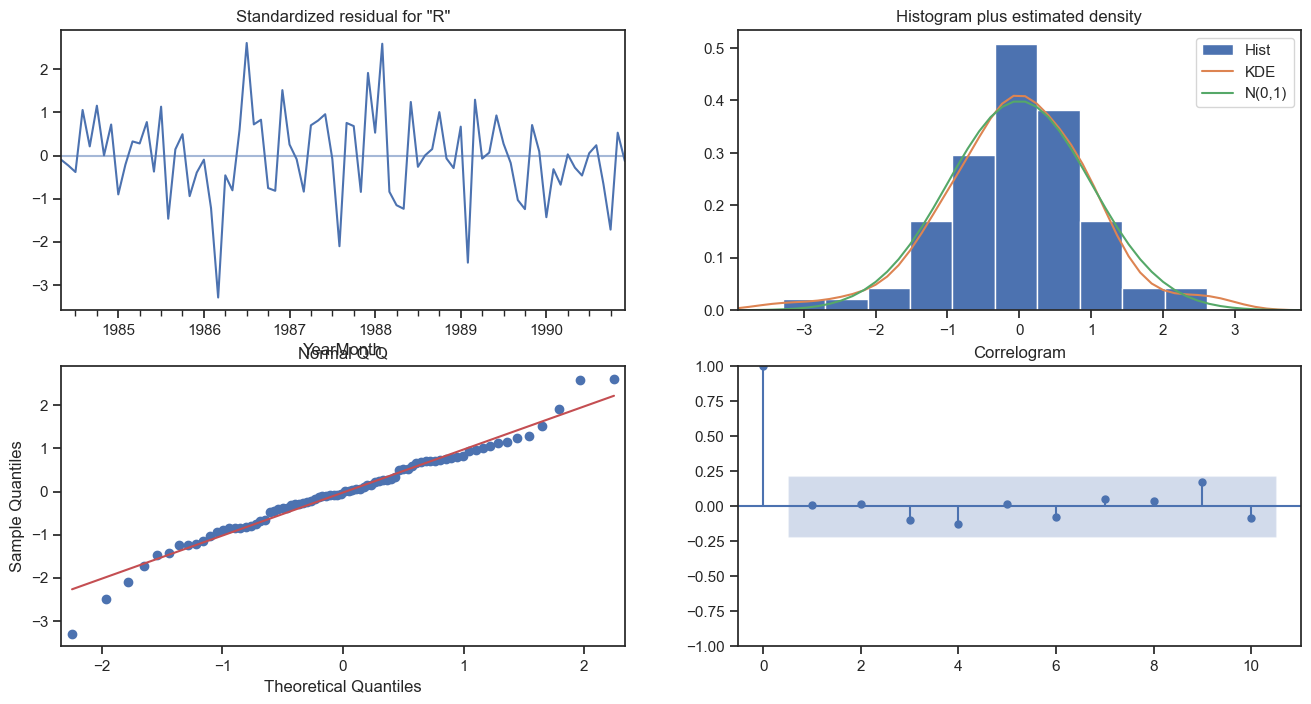

In [133]:
results_auto_SARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

In [134]:
predicted_auto_SARIMA_6 = results_auto_SARIMA.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  50.314012  17.870027      15.289404      85.338621
1991-02-28  79.003497  17.970444      43.782075     114.224920
1991-03-31  78.689729  17.968049      43.473001     113.906458
1991-04-30  77.266513  17.966148      42.053510     112.479517
1991-05-31  67.468825  17.966086      32.255943     102.681706

In [135]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

34.2675171795747


In [136]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['order=(0,1,2),seasonal_order=(2, 2, 2, 12),Auto_SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

Test RMSE
Linear Regression                                   17.080298
2pointTrailingMovingAverage                         12.298291
4pointTrailingMovingAverage                         15.845558
6pointTrailingMovingAverage                         15.986163
9pointTrailingMovingAverage                         16.500823
Alpha=0.995,SimpleExponentialSmoothing              36.711757
Naive Model                                         78.396083
Simple Average                                      52.318735
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  36.711757
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...  11.757610
Auto_ARIMA                                          35.964147
order=(0,1,2),seasonal_order=(2, 2, 2, 12),Auto...  34.267517

### Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE

Manual ARIMA

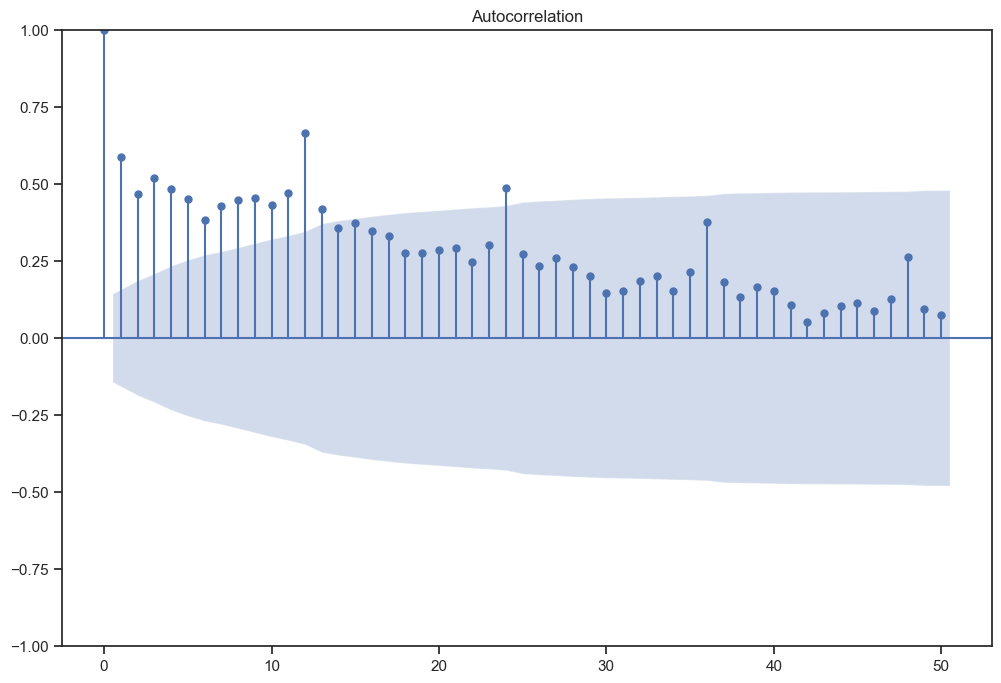

In [137]:
plt.figure(figsize=(12,8))
plot_acf(df['Rose'],lags=50,  ax=plt.gca())
plt.show()

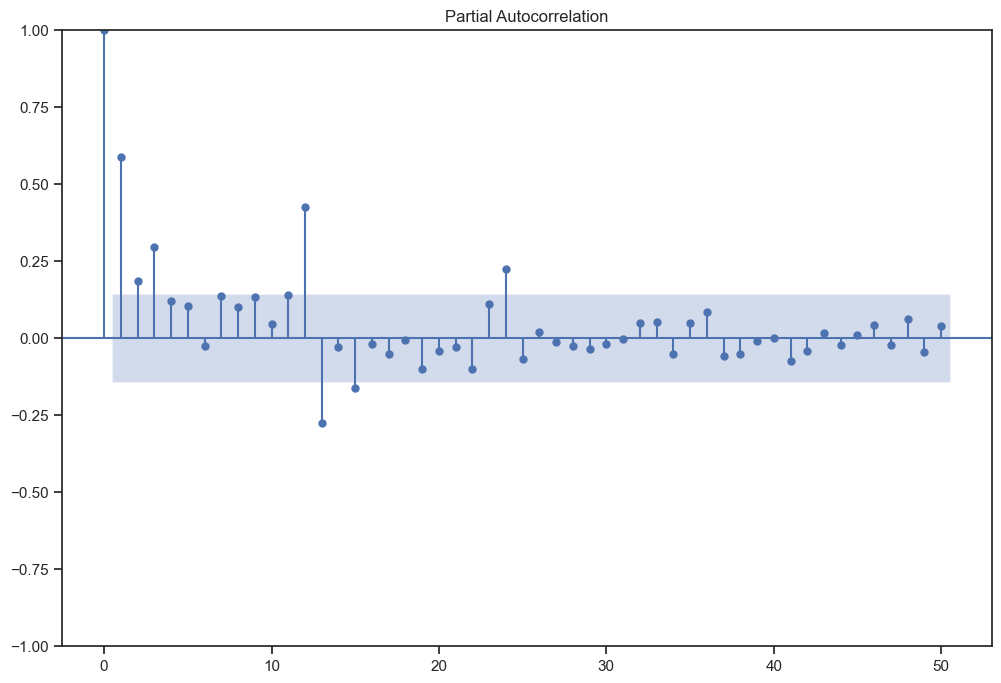

In [138]:
plt.figure(figsize=(12,8))
plot_pacf(df['Rose'], lags=50, ax=plt.gca())
plt.show()

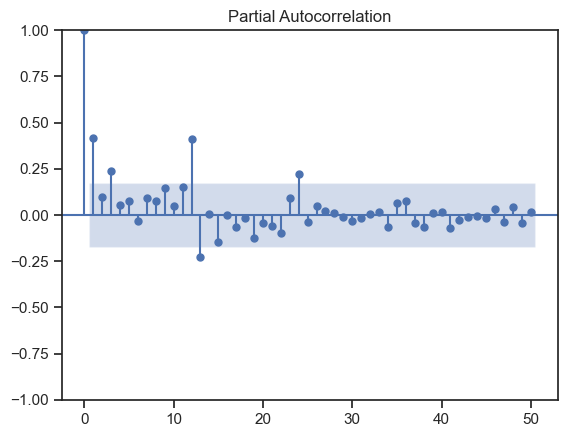

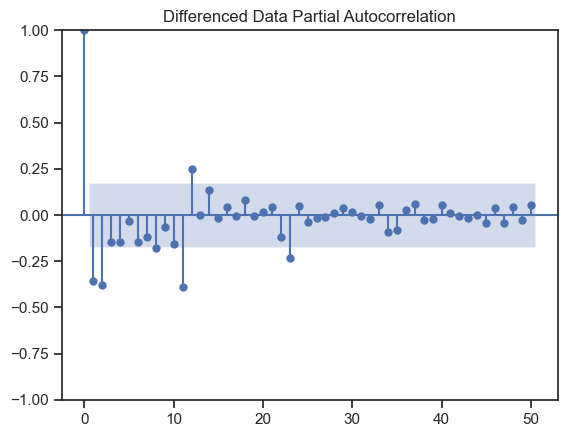

In [139]:
plot_pacf(train['Rose'],lags=50)
plot_pacf(train['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [140]:
manual_ARIMA = ARIMA(df['Rose'], order=(3,1,3))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  187
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -876.991
Date:                Fri, 24 May 2024   AIC                           1767.981
Time:                        19:33:23   BIC                           1790.562
Sample:                    01-31-1980   HQIC                          1777.132
                         - 07-31-1995                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5899      0.072    -22.134      0.000      -1.731      -1.449
ar.L2         -0.6667      0.116     -5.743      0.000      -0.894      -0.439
ar.L3          0.1161      0.070      1.651      0.0

### Manual SARIMA

In [141]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Define the parameters for the SARIMA model
param = (1, 1, 1)  # Example values for (p, d, q)
param_seasonal = (1, 1, 1, 12)  # Example values for (P, D, Q, s)

# Fit the SARIMA model with specified parameters
SARIMA_model_manual = SARIMAX(train['Rose'].values,
                              order=param,
                              seasonal_order=param_seasonal,
                              enforce_stationarity=False,
                              enforce_invertibility=False)

results_manual_SARIMA = SARIMA_model_manual.fit(maxiter=1000)

# Forecast using the fitted model
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))
forecast_manual_SARIMA = predicted_manual_SARIMA.predicted_mean




RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.61557D+00    |proj g|=  6.72325D-02

At iterate    5    f=  3.60489D+00    |proj g|=  1.58529D-02

At iterate   10    f=  3.48294D+00    |proj g|=  7.71312D-02

At iterate   15    f=  3.47459D+00    |proj g|=  3.80576D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     21      1     0     0   1.513D-05   3.475D+00
  F =   3.4745911508334930     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


In [142]:
# Calculate the RMSE
rmse_manual_SARIMA = np.sqrt(mean_squared_error(test['Rose'].values, forecast_manual_SARIMA))

print(f'RMSE for manual SARIMA model: {rmse_manual_SARIMA}')


RMSE for manual SARIMA model: 18.23298592199148


In [143]:
# Optionally, print the forecast summary frame
forecast_manual_SARIMA_df = predicted_manual_SARIMA.summary_frame(alpha=0.05)
print(forecast_manual_SARIMA_df.head())


y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  48.573382  19.009673      11.315107      85.831657
1  59.070598  19.766654      20.328669      97.812527
2  73.308522  19.925432      34.255392     112.361652
3  69.566998  20.014728      30.338852     108.795144
4  64.394885  20.091567      25.016139     103.773632


In [144]:
resultsDf_9_1 = pd.DataFrame({'Test RMSE': rmse_manual_SARIMA}
                           ,index=['order=(1, 1, 1),seasonal_order=(1, 1, 1, 12),Manual SARIMA'])

resultsDf = pd.concat([resultsDf, resultsDf_9_1])
resultsDf

Test RMSE
Linear Regression                                   17.080298
2pointTrailingMovingAverage                         12.298291
4pointTrailingMovingAverage                         15.845558
6pointTrailingMovingAverage                         15.986163
9pointTrailingMovingAverage                         16.500823
Alpha=0.995,SimpleExponentialSmoothing              36.711757
Naive Model                                         78.396083
Simple Average                                      52.318735
Alpha=0.08621,Beta=1.3722,Gamma=0.4763,TrippleE...  36.711757
Alpha=0.1,Beta=0.2,Gamma=0.1,TripleExponentialS...  11.757610
Auto_ARIMA                                          35.964147
order=(0,1,2),seasonal_order=(2, 2, 2, 12),Auto...  34.267517
order=(1, 1, 1),seasonal_order=(1, 1, 1, 12),Ma...  18.232986

### Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [168]:
date = pd.date_range(start='8/1/1995', end='7/1/1996', freq='MS')
date

DatetimeIndex(['1995-08-01', '1995-09-01', '1995-10-01', '1995-11-01',
               '1995-12-01', '1996-01-01', '1996-02-01', '1996-03-01',
               '1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [169]:
future_predictions=pd.DataFrame(columns=['Future_Rose'],index=date)

In [170]:
TES_train = df.copy()

In [171]:
model_TES_tm_sm = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative')
alpha=0.2
beta=0.8
gamma=0.2
model_TES = model_TES_tm_sm.fit(smoothing_level=alpha,smoothing_slope=beta,smoothing_seasonal=gamma,
                                optimized=False,use_brute=True)
prediction=model_TES.forecast(steps=12)

In [173]:
future_predictions['Future_Rose']=prediction
future_predictions

Future_Rose
1995-08-01          NaN
1995-09-01          NaN
1995-10-01          NaN
1995-11-01          NaN
1995-12-01          NaN
1996-01-01          NaN
1996-02-01          NaN
1996-03-01          NaN
1996-04-01          NaN
1996-05-01          NaN
1996-06-01          NaN
1996-07-01          NaN

             Forecast  Lower Bound  Upper Bound
1995-08-31  58.607416    23.995426    93.219406
1995-09-30  52.609129    17.997138    87.221119
1995-10-31  52.404658    17.792667    87.016648
1995-11-30  60.737040    26.125050    95.349031
1995-12-31  83.883256    49.271266   118.495247
1996-01-31  34.281140    -0.330850    68.893131
1996-02-29  40.862360     6.250370    75.474351
1996-03-31  45.851970    11.239980    80.463961
1996-04-30  44.043241     9.431250    78.655231
1996-05-31  42.522405     7.910414    77.134395
1996-06-30  46.305973    11.693983    80.917964
1996-07-31  58.274895    23.662905    92.886885


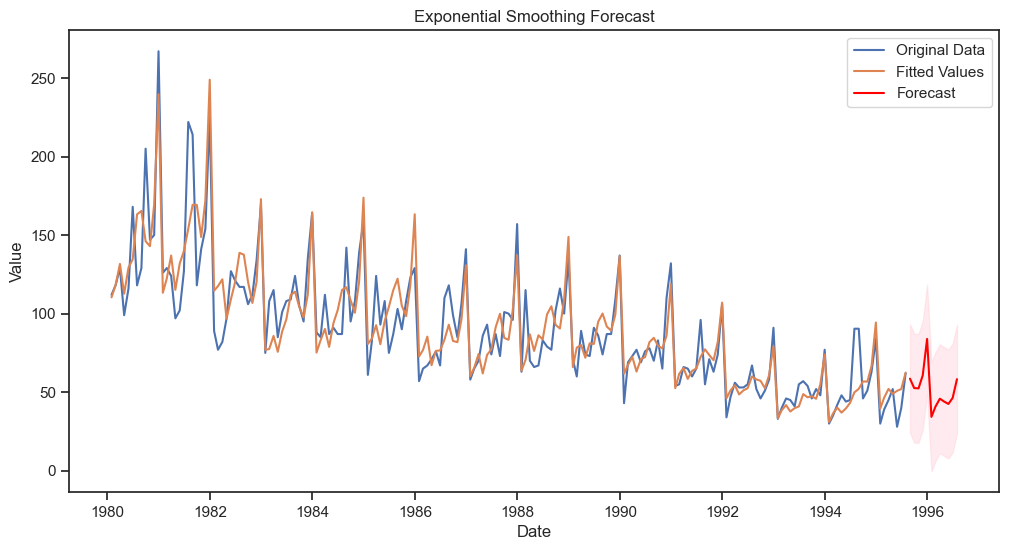

In [165]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt


# Fit the Exponential Smoothing model
model_TES_ta_sm = ExponentialSmoothing(TES_train['Rose'],
                                       trend='additive',
                                       seasonal='multiplicative',
                                       seasonal_periods=12)
fit_TES_ta_sm = model_TES_ta_sm.fit(smoothing_level=0.1, 
                                    smoothing_slope=0.2, 
                                    smoothing_seasonal=0.1, 
                                    optimized=False)

# Make predictions for the next 12 months
predictions_TES_ta_sm = fit_TES_ta_sm.forecast(steps=12)

# Calculate standard error of the residuals
residuals = fit_TES_ta_sm.resid
se = np.sqrt(np.sum(residuals**2) / len(TES_train))

# Calculate the confidence intervals
confidence_interval = 1.96 * se
lower_bounds = predictions_TES_ta_sm - confidence_interval
upper_bounds = predictions_TES_ta_sm + confidence_interval

# Combine forecasts and confidence intervals into a DataFrame
forecast_df = pd.DataFrame({'Forecast': predictions_TES_ta_sm, 
                            'Lower Bound': lower_bounds, 
                            'Upper Bound': upper_bounds})

# Print the forecasted values and confidence intervals
print(forecast_df)

# Plot the original data, fitted values, and forecasts
plt.figure(figsize=(12, 6))
plt.plot(TES_train['Rose'], label='Original Data')
plt.plot(fit_TES_ta_sm.fittedvalues, label='Fitted Values')
plt.plot(predictions_TES_ta_sm, label='Forecast', color='red')
plt.fill_between(forecast_df.index,
                 forecast_df['Lower Bound'],
                 forecast_df['Upper Bound'],
                 color='pink', alpha=0.3)
plt.legend(loc='best')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


In [167]:
forecast_df.head()

Forecast  Lower Bound  Upper Bound
1995-08-31  58.607416    23.995426    93.219406
1995-09-30  52.609129    17.997138    87.221119
1995-10-31  52.404658    17.792667    87.016648
1995-11-30  60.737040    26.125050    95.349031
1995-12-31  83.883256    49.271266   118.495247